Flight Price Prediction
Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here we ahve prices of flight tickets for various airlines between the months of March and April of 2022 and between cities Barcelona and Pars.

So, our goal is to create a model that predicts the flight price accurately.

In [1]:
# importing required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing and reading csv of data
df1 = pd.read_csv('FlightPricedf1.csv')
df2 = pd.read_csv('FlightPricedf2.csv')

In [3]:
df1 #checking the dataframe 1

Unnamed: 0                    Airline Time_dept Time_arrival   Direct  \
0              0           Vueling, Ryanair      7:00         8:50  directo   
1              1           Vueling, Ryanair      9:00        10:45  directo   
2              2                    Vueling     13:50        15:40  directo   
3              3                    Vueling      9:00        10:45  directo   
4              4                    Ryanair      7:00         8:50  directo   
...          ...                        ...       ...          ...      ...   
2749        2749                    Vueling     12:25        14:05  directo   
2750        2750  Transavia France, Vueling     13:50        15:40  directo   
2751        2751           Ryanair, Vueling      9:30        11:10  directo   
2752        2752                     Iberia      7:00         8:50  directo   
2753        2753           Vueling, easyJet      9:30        11:10  directo   

     Duration             CitiesDept           Cities_Arriv   Price  
0      1h 50m  BCN Barcelona-El Prat         ORY París-Orly    29 €  
1      1h 45m     BVA Beauvais-Tillé  BCN Barcelona-El Prat    34 €  
2      1h 50m  BCN Barcelona-El Prat         ORY París-Orly     NaN  
3      1h 45m     BVA Beauvais-Tillé  BCN Barcelona-El Prat     NaN  
4      1h 50m  BCN Barcelona-El Prat         ORY París-Orly     NaN  
...       ...                    ...                    ...     ...  
2749   1h 40m         ORY París-Orly  BCN Barcelona-El Prat   155 €  
2750   1h 50m  BCN Barcelona-El Prat         ORY París-Orly   156 €  
2751   1h 40m         ORY París-Orly  BCN Barcelona-El Prat   329 €  
2752   1h 50m  BCN Barcelona-El Prat         ORY París-Orly   345 €  
2753   1h 40m         ORY París-Orly  BCN Barcelona-El Prat  2333 €  

[2754 rows x 9 columns]

In [4]:
df1 = df1.loc[:, ~df1.columns.str.contains('^Unnamed')] #26/2-5/3 #dropping the unamed column (the first column, the indexed one)
df1 

Airline Time_dept Time_arrival   Direct Duration  \
0              Vueling, Ryanair      7:00         8:50  directo   1h 50m   
1              Vueling, Ryanair      9:00        10:45  directo   1h 45m   
2                       Vueling     13:50        15:40  directo   1h 50m   
3                       Vueling      9:00        10:45  directo   1h 45m   
4                       Ryanair      7:00         8:50  directo   1h 50m   
...                         ...       ...          ...      ...      ...   
2749                    Vueling     12:25        14:05  directo   1h 40m   
2750  Transavia France, Vueling     13:50        15:40  directo   1h 50m   
2751           Ryanair, Vueling      9:30        11:10  directo   1h 40m   
2752                     Iberia      7:00         8:50  directo   1h 50m   
2753           Vueling, easyJet      9:30        11:10  directo   1h 40m   

                 CitiesDept           Cities_Arriv   Price  
0     BCN Barcelona-El Prat         ORY París-Orly    29 €  
1        BVA Beauvais-Tillé  BCN Barcelona-El Prat    34 €  
2     BCN Barcelona-El Prat         ORY París-Orly     NaN  
3        BVA Beauvais-Tillé  BCN Barcelona-El Prat     NaN  
4     BCN Barcelona-El Prat         ORY París-Orly     NaN  
...                     ...                    ...     ...  
2749         ORY París-Orly  BCN Barcelona-El Prat   155 €  
2750  BCN Barcelona-El Prat         ORY París-Orly   156 €  
2751         ORY París-Orly  BCN Barcelona-El Prat   329 €  
2752  BCN Barcelona-El Prat         ORY París-Orly   345 €  
2753         ORY París-Orly  BCN Barcelona-El Prat  2333 €  

[2754 rows x 8 columns]

In [5]:
df1['dateDept'] = '26/02/2022' #adding new columns od departure date and arrival date
df1['dateArrv'] = '05/03/2022'

In [6]:
df1

Airline Time_dept Time_arrival   Direct Duration  \
0              Vueling, Ryanair      7:00         8:50  directo   1h 50m   
1              Vueling, Ryanair      9:00        10:45  directo   1h 45m   
2                       Vueling     13:50        15:40  directo   1h 50m   
3                       Vueling      9:00        10:45  directo   1h 45m   
4                       Ryanair      7:00         8:50  directo   1h 50m   
...                         ...       ...          ...      ...      ...   
2749                    Vueling     12:25        14:05  directo   1h 40m   
2750  Transavia France, Vueling     13:50        15:40  directo   1h 50m   
2751           Ryanair, Vueling      9:30        11:10  directo   1h 40m   
2752                     Iberia      7:00         8:50  directo   1h 50m   
2753           Vueling, easyJet      9:30        11:10  directo   1h 40m   

                 CitiesDept           Cities_Arriv   Price    dateDept  \
0     BCN Barcelona-El Prat         ORY París-Orly    29 €  26/02/2022   
1        BVA Beauvais-Tillé  BCN Barcelona-El Prat    34 €  26/02/2022   
2     BCN Barcelona-El Prat         ORY París-Orly     NaN  26/02/2022   
3        BVA Beauvais-Tillé  BCN Barcelona-El Prat     NaN  26/02/2022   
4     BCN Barcelona-El Prat         ORY París-Orly     NaN  26/02/2022   
...                     ...                    ...     ...         ...   
2749         ORY París-Orly  BCN Barcelona-El Prat   155 €  26/02/2022   
2750  BCN Barcelona-El Prat         ORY París-Orly   156 €  26/02/2022   
2751         ORY París-Orly  BCN Barcelona-El Prat   329 €  26/02/2022   
2752  BCN Barcelona-El Prat         ORY París-Orly   345 €  26/02/2022   
2753         ORY París-Orly  BCN Barcelona-El Prat  2333 €  26/02/2022   

        dateArrv  
0     05/03/2022  
1     05/03/2022  
2     05/03/2022  
3     05/03/2022  
4     05/03/2022  
...          ...  
2749  05/03/2022  
2750  05/03/2022  
2751  05/03/2022  
2752  05/03/2022  
2753  05/03/2022  

[2754 rows x 10 columns]

In [7]:
df2 #checking the second dataframe

Unnamed: 0              Airline Time_dept Time_arrival   Direct  \
0              0     Vueling, Ryanair      7:00         8:50  directo   
1              1              Vueling      9:00        10:45  directo   
2              2              Vueling      7:00         8:50  directo   
3              3              Vueling     12:25        14:05  directo   
4              4              Ryanair      7:00         8:50  directo   
...          ...                  ...       ...          ...      ...   
1942        1942  Air France, Vueling      7:55         9:55  directo   
1943        1943  Air France, easyJet      7:00         8:45  directo   
1944        1944      Vueling, Iberia      9:20        11:30  directo   
1945        1945  Air France, easyJet     12:25        14:05  directo   
1946        1946   Air France, Iberia     15:00        17:00  directo   

     Duration             CitiesDept           Cities_Arriv  Price  
0      1h 50m  BCN Barcelona-El Prat         ORY París-Orly   29 €  
1      1h 45m     BVA Beauvais-Tillé  BCN Barcelona-El Prat   34 €  
2      1h 50m  BCN Barcelona-El Prat         ORY París-Orly    NaN  
3      1h 40m         ORY París-Orly  BCN Barcelona-El Prat    NaN  
4      1h 50m  BCN Barcelona-El Prat         ORY París-Orly    NaN  
...       ...                    ...                    ...    ...  
1942   2h 00m  BCN Barcelona-El Prat  CDG Charles de Gaulle    NaN  
1943   1h 45m  CDG Charles de Gaulle  BCN Barcelona-El Prat    NaN  
1944   2h 10m  BCN Barcelona-El Prat  CDG Charles de Gaulle  164 €  
1945   1h 40m         ORY París-Orly  BCN Barcelona-El Prat  166 €  
1946   2h 00m  BCN Barcelona-El Prat  CDG Charles de Gaulle  165 €  

[1947 rows x 9 columns]

In [8]:
df2 = df2.loc[:, ~df2.columns.str.contains('^Unnamed')] #dropping the unamed column (the first column, the indexed one) in the second dataframe
df2

Airline Time_dept Time_arrival   Direct Duration  \
0        Vueling, Ryanair      7:00         8:50  directo   1h 50m   
1                 Vueling      9:00        10:45  directo   1h 45m   
2                 Vueling      7:00         8:50  directo   1h 50m   
3                 Vueling     12:25        14:05  directo   1h 40m   
4                 Ryanair      7:00         8:50  directo   1h 50m   
...                   ...       ...          ...      ...      ...   
1942  Air France, Vueling      7:55         9:55  directo   2h 00m   
1943  Air France, easyJet      7:00         8:45  directo   1h 45m   
1944      Vueling, Iberia      9:20        11:30  directo   2h 10m   
1945  Air France, easyJet     12:25        14:05  directo   1h 40m   
1946   Air France, Iberia     15:00        17:00  directo   2h 00m   

                 CitiesDept           Cities_Arriv  Price  
0     BCN Barcelona-El Prat         ORY París-Orly   29 €  
1        BVA Beauvais-Tillé  BCN Barcelona-El Prat   34 €  
2     BCN Barcelona-El Prat         ORY París-Orly    NaN  
3            ORY París-Orly  BCN Barcelona-El Prat    NaN  
4     BCN Barcelona-El Prat         ORY París-Orly    NaN  
...                     ...                    ...    ...  
1942  BCN Barcelona-El Prat  CDG Charles de Gaulle    NaN  
1943  CDG Charles de Gaulle  BCN Barcelona-El Prat    NaN  
1944  BCN Barcelona-El Prat  CDG Charles de Gaulle  164 €  
1945         ORY París-Orly  BCN Barcelona-El Prat  166 €  
1946  BCN Barcelona-El Prat  CDG Charles de Gaulle  165 €  

[1947 rows x 8 columns]

In [9]:
df2['dateDept'] = '26/03/2022' #adding new columns od departure date and arrival date in the second dataframe
df2['dateArrv'] = '02/04/2022'

In [10]:
frames=[df1,df2]  #concatenating both dataframes and converting into one dataset
df = pd.concat(frames)
df

Airline Time_dept Time_arrival   Direct Duration  \
0        Vueling, Ryanair      7:00         8:50  directo   1h 50m   
1        Vueling, Ryanair      9:00        10:45  directo   1h 45m   
2                 Vueling     13:50        15:40  directo   1h 50m   
3                 Vueling      9:00        10:45  directo   1h 45m   
4                 Ryanair      7:00         8:50  directo   1h 50m   
...                   ...       ...          ...      ...      ...   
1942  Air France, Vueling      7:55         9:55  directo   2h 00m   
1943  Air France, easyJet      7:00         8:45  directo   1h 45m   
1944      Vueling, Iberia      9:20        11:30  directo   2h 10m   
1945  Air France, easyJet     12:25        14:05  directo   1h 40m   
1946   Air France, Iberia     15:00        17:00  directo   2h 00m   

                 CitiesDept           Cities_Arriv  Price    dateDept  \
0     BCN Barcelona-El Prat         ORY París-Orly   29 €  26/02/2022   
1        BVA Beauvais-Tillé  BCN Barcelona-El Prat   34 €  26/02/2022   
2     BCN Barcelona-El Prat         ORY París-Orly    NaN  26/02/2022   
3        BVA Beauvais-Tillé  BCN Barcelona-El Prat    NaN  26/02/2022   
4     BCN Barcelona-El Prat         ORY París-Orly    NaN  26/02/2022   
...                     ...                    ...    ...         ...   
1942  BCN Barcelona-El Prat  CDG Charles de Gaulle    NaN  26/03/2022   
1943  CDG Charles de Gaulle  BCN Barcelona-El Prat    NaN  26/03/2022   
1944  BCN Barcelona-El Prat  CDG Charles de Gaulle  164 €  26/03/2022   
1945         ORY París-Orly  BCN Barcelona-El Prat  166 €  26/03/2022   
1946  BCN Barcelona-El Prat  CDG Charles de Gaulle  165 €  26/03/2022   

        dateArrv  
0     05/03/2022  
1     05/03/2022  
2     05/03/2022  
3     05/03/2022  
4     05/03/2022  
...          ...  
1942  02/04/2022  
1943  02/04/2022  
1944  02/04/2022  
1945  02/04/2022  
1946  02/04/2022  

[4701 rows x 10 columns]

In [11]:
#shape of dataset
df.shape

(4701, 10)

In [12]:
#chekcing the missing values for dataset
df.isnull().sum()

Airline            0
Time_dept          0
Time_arrival       0
Direct             0
Duration           0
CitiesDept         0
Cities_Arriv       0
Price           2644
dateDept           0
dateArrv           0
dtype: int64

We see the dataset has 10 columns including the target feature Price which has 2644 missing values.


In [13]:
#checking and study briefly the dataset sample before we do nothing:
df.head()

Airline Time_dept Time_arrival   Direct Duration  \
0  Vueling, Ryanair      7:00         8:50  directo   1h 50m   
1  Vueling, Ryanair      9:00        10:45  directo   1h 45m   
2           Vueling     13:50        15:40  directo   1h 50m   
3           Vueling      9:00        10:45  directo   1h 45m   
4           Ryanair      7:00         8:50  directo   1h 50m   

              CitiesDept           Cities_Arriv Price    dateDept    dateArrv  
0  BCN Barcelona-El Prat         ORY París-Orly  29 €  26/02/2022  05/03/2022  
1     BVA Beauvais-Tillé  BCN Barcelona-El Prat  34 €  26/02/2022  05/03/2022  
2  BCN Barcelona-El Prat         ORY París-Orly   NaN  26/02/2022  05/03/2022  
3     BVA Beauvais-Tillé  BCN Barcelona-El Prat   NaN  26/02/2022  05/03/2022  
4  BCN Barcelona-El Prat         ORY París-Orly   NaN  26/02/2022  05/03/2022

1. Airline features gives us the flight companies names, which we can use to separate the flight data by different airlines for comaprison.
2. The Date of Journey can be used in different ways. As an example, we can say we can separate and analytse the data we have through months or years or even day by day.
3. The CitiesDept and CitiesArrv helps us understand where the flight comes from and went to. :)
4. The Direct feature will inform if the flight is directly landed in the destination airport or not.
5. The Dep time and Aarrival Time shows the time of arrival and departure of each flight. So, we can use time to calculate the hours or minutes of Duration or even we can study the flights by time of arrival or departure.
6. The dateDept and dateArrv columns have dates attached along with, which we can separte and these are the cases when the flight takes off from the source on a date and reaches its destination on the same day normally in our case.
7. The Duration is more useful as it calcultes the time the flight takes to arrive to their destination.


In [14]:
#statistical description of the data of features
df.describe()

Airline Time_dept Time_arrival   Direct Duration  \
count      4701      4701         4701     4701     4701   
unique       41        34           37        2       17   
top     Vueling      7:00        15:40  directo   1h 50m   
freq        672       540          397     4543     1176   

                   CitiesDept           Cities_Arriv  Price    dateDept  \
count                    4701                   4701   2057        4701   
unique                      4                      4    215           2   
top     BCN Barcelona-El Prat  BCN Barcelona-El Prat  136 €  26/02/2022   
freq                     2351                   2350     60        2754   

          dateArrv  
count         4701  
unique           2  
top     05/03/2022  
freq          2754

As we said, the target Price is the only variable that should be integer format. But, since it has € in it, it is described as an object type. that's why all the features description including target Price mentions count, unique, top and freq and does not include info of mean, median,percentiles, etc.

In order to check the statistical description of the features, we need to convert them to a numerical data type if needed. so, first check the data types we have, which all of them must be of type object.

In [15]:
df.dtypes #checking data type of each feature:

Airline         object
Time_dept       object
Time_arrival    object
Direct          object
Duration        object
CitiesDept      object
Cities_Arriv    object
Price           object
dateDept        object
dateArrv        object
dtype: object

We see all features inclusinf our target Price is OBJECT data type.

In [16]:
df.isnull().sum() #checking nulls in our dataset columns

Airline            0
Time_dept          0
Time_arrival       0
Direct             0
Duration           0
CitiesDept         0
Cities_Arriv       0
Price           2644
dateDept           0
dateArrv           0
dtype: int64

In [17]:
df[df.isna().any(axis=1)] #checking rows with null values in Price as the Price is the only feature where we have null values as seen in the previous code

Airline Time_dept Time_arrival   Direct Duration  \
2                       Vueling     13:50        15:40  directo   1h 50m   
3                       Vueling      9:00        10:45  directo   1h 45m   
4                       Ryanair      7:00         8:50  directo   1h 50m   
5     Vueling, Transavia France     12:25        14:05  directo   1h 40m   
6                       Vueling      7:00         8:50  directo   1h 50m   
...                         ...       ...          ...      ...      ...   
1931            Vueling, Iberia     16:40        22:35  directo   5h 55m   
1932                     Iberia      7:00         8:50  directo   1h 50m   
1936            Iberia, Vueling     15:00        17:00  directo   2h 00m   
1942        Air France, Vueling      7:55         9:55  directo   2h 00m   
1943        Air France, easyJet      7:00         8:45  directo   1h 45m   

                 CitiesDept           Cities_Arriv Price    dateDept  \
2     BCN Barcelona-El Prat         ORY París-Orly   NaN  26/02/2022   
3        BVA Beauvais-Tillé  BCN Barcelona-El Prat   NaN  26/02/2022   
4     BCN Barcelona-El Prat         ORY París-Orly   NaN  26/02/2022   
5            ORY París-Orly  BCN Barcelona-El Prat   NaN  26/02/2022   
6     BCN Barcelona-El Prat         ORY París-Orly   NaN  26/02/2022   
...                     ...                    ...   ...         ...   
1931     BVA Beauvais-Tillé  BCN Barcelona-El Prat   NaN  26/03/2022   
1932  BCN Barcelona-El Prat         ORY París-Orly   NaN  26/03/2022   
1936  BCN Barcelona-El Prat  CDG Charles de Gaulle   NaN  26/03/2022   
1942  BCN Barcelona-El Prat  CDG Charles de Gaulle   NaN  26/03/2022   
1943  CDG Charles de Gaulle  BCN Barcelona-El Prat   NaN  26/03/2022   

        dateArrv  
2     05/03/2022  
3     05/03/2022  
4     05/03/2022  
5     05/03/2022  
6     05/03/2022  
...          ...  
1931  02/04/2022  
1932  02/04/2022  
1936  02/04/2022  
1942  02/04/2022  
1943  02/04/2022  

[2644 rows x 10 columns]

As we said, we have 2644 missing values in Price column Let's fix these missing values!

In [18]:
df['Price'] = df['Price'].fillna(df['Price'].mode()[0]) #filling na of target feature Price with mode of the same
df[df.isna().any(axis=1)]

Empty DataFrame
Columns: [Airline, Time_dept, Time_arrival, Direct, Duration, CitiesDept, Cities_Arriv, Price, dateDept, dateArrv]
Index: []

In [19]:
df['Price'] = (df['Price'].str.strip(' €').astype(int)) #dropping € and converting the target Price feature into a numerical integer type data column.

In [20]:
df.dtypes #checking to make sure we have Price as integer column.

Airline         object
Time_dept       object
Time_arrival    object
Direct          object
Duration        object
CitiesDept      object
Cities_Arriv    object
Price            int64
dateDept        object
dateArrv        object
dtype: object

We now check the count of NaN (null) values in our dataset:

In [21]:
df.isnull().sum() #checking all null values in Price column are imputed correctly:

Airline         0
Time_dept       0
Time_arrival    0
Direct          0
Duration        0
CitiesDept      0
Cities_Arriv    0
Price           0
dateDept        0
dateArrv        0
dtype: int64

In [22]:
#Now checking the data.info() so that we can confirm the missing values are imputed correctly alongside other type of info that can 
#be useful to check as like data type of each column and total number of columns and instances:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4701 entries, 0 to 1946
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Airline       4701 non-null   object
 1   Time_dept     4701 non-null   object
 2   Time_arrival  4701 non-null   object
 3   Direct        4701 non-null   object
 4   Duration      4701 non-null   object
 5   CitiesDept    4701 non-null   object
 6   Cities_Arriv  4701 non-null   object
 7   Price         4701 non-null   int64 
 8   dateDept      4701 non-null   object
 9   dateArrv      4701 non-null   object
dtypes: int64(1), object(9)
memory usage: 404.0+ KB


As we can check we have the total number of rows for each feature we have, which means no missing values are left. Which in the other words means that we have imputed the initial missing values correctly.

Here we can check information of data type and information about number of values present in each column, and data types of each column. We observe that we have all the columns as ‘object’ data types, and only ‘Price’ column (the output) is of integer type. 

And we also can check the total of columns and total of rows we have in our dataset. In this we have a total of 4701 entries and total of 11 features including the target variable.


We now start exploring the columns available in our dataset. The first thing we do is to check the unique values present in these columns and their correspondents counts:

In [23]:
#checking different unique values in each column and its total counts for each unique category:
for col in df.columns:    
    print(df[col].value_counts())
    print('---------------------------------------')

Vueling                         672
Vueling, Air France             473
Iberia                          320
Ryanair, Vueling                275
Air France                      274
easyJet                         219
Vueling, easyJet                213
Vueling, Ryanair                201
Vueling, Iberia                 187
Vueling, Transavia France       166
Iberia, Vueling                 159
Transavia France, Vueling       133
Iberia, easyJet                 108
Ryanair                         107
Air France, Vueling              95
easyJet, Vueling                 82
Ryanair, easyJet                 80
Transavia France, Iberia         80
Ryanair, Iberia                  80
easyJet, Air France              70
easyJet, Ryanair                 66
Transavia France, easyJet        66
easyJet, Iberia                  56
Iberia, Ryanair                  54
Air France, easyJet              53
Varias aerolíneas                40
easyJet, Transavia France        40
Vueling, Air Europa         


Let's highlight the most visible characteristics of this data:

- Airlines Vueling, combo of Vueling and Air France, Iberia are taking 30% of the market of flightss going between Bcn-Paris.
 
 - Secondly, regarding the dates, there are no specific dates when the flights travel; the distribution is almost similar for all dates. But we have Date_of_Journey which isnot that much important.
 - Flights in Feb have a higher count, seems like people travel during Valentine month. And People tend to travel less in April.

 - Regarding the Source and Destination, we can say Barcelona the 3 cities with highest number of flights when we are studying the source of the flight. And BVA Beauvais-Tille has the minimum count of flight take-offs. And when checking the Destination, we again have Barcelona as the most traveled city as a destino which means maximum flights land in Bcn and BVA Beauvais-Tillé again has the lowest count of receiving the flights.

 - When comapring the stops , we have a total of 158 cases if we check all the cases with only 1 stop. And we have 4543 cases of cases where we have non stop. 

 - Finally we can analize the target variale which is the price of the flight ticket: we see the highest number of flights are around price between 0 and 250 euros which means in our datasets we may have mostly single traveler cases.


We will see that
 - Dep_Time_Hour:
Majority of the flights tend to fly in the early morning time
Count of flights taking off during 16:00 - 23:00 is also high, Afternoon flights are less in number.
 - Dep_Time_Min:
Most flights take off at whole hours (Mins as 00)
 - Arrival date:
In majority of the cases, flights take off and land on the same day
 - Arrival time hour:
Majority of the flights reach its destination in the evening time around 18:00-19:00
This seems to be because majority of the flights have take-off times in the morning and hence land after in the evening
 - Arrival time min:
This distribution is similar and does not give out any dedicated information
 - Travel hours:
Majority of the flights have travel time for around 2-3 hours, which seems ok since these are domestic flights
Some flights have time around 30 hours too, this could be because of the number of stops in between

Text(0.5, 1.0, 'Price by CitiesDept')

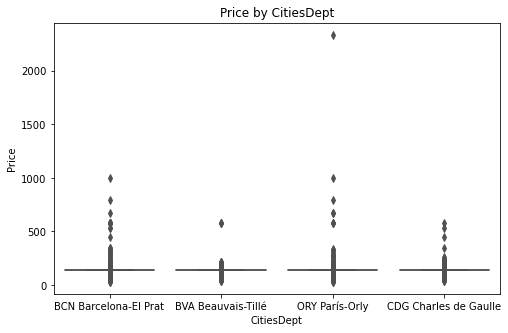

In [24]:
#boxplotting the price by departure city:
plt.figure(figsize=(8,5))
sns.boxplot(x='CitiesDept',y='Price',data=df, palette='rainbow')
plt.title("Price by CitiesDept")

We see that flights departing from Barcelona and Orly airport sometimes have a bit higher price than the other 2 airport. We also see some outliers in caseof departing from Orly Paris Airport as we can see a data dot which is located for price more than 200 euros and that is way far from the median prices of the airport PRLY Paris and it's the only outlier we have in Price when comparing the prices by the departure cities. 

<AxesSubplot:xlabel='Airline', ylabel='Price'>

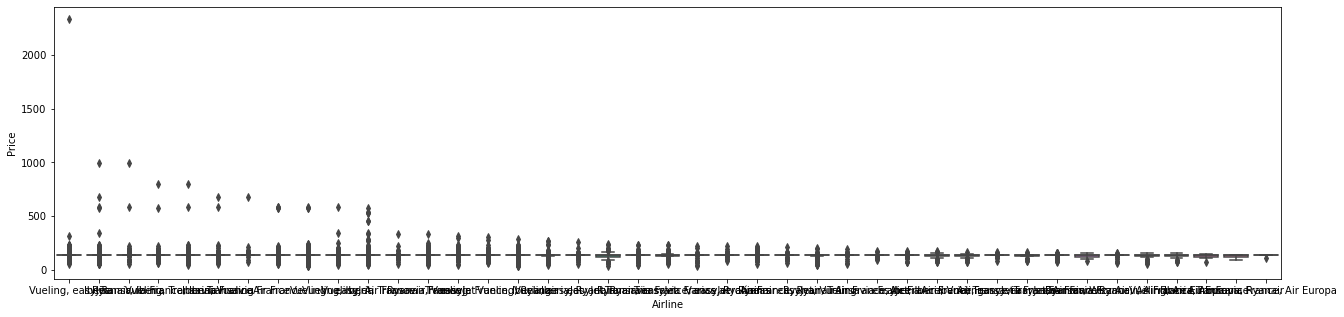

In [25]:
#boxplotting the Prices by Airlines:
plt.figure(figsize=(22,5))
sns.boxplot(x='Airline', y='Price', data=df.sort_values('Price',ascending=False)) 

We can see all airines have similar price median but some airlines have few cases of higher flight prices compared to others.

We can come up with a conclusion all airlines had almost similar median with minimal fluctuations.

<AxesSubplot:xlabel='Cities_Arriv', ylabel='Price'>

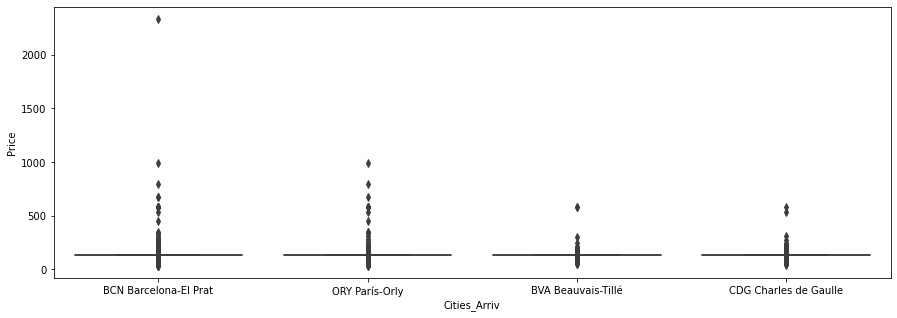

In [27]:
#boxplotting the flight price by Arrival city:
plt.figure(figsize=(15,5))
sns.boxplot(x='Cities_Arriv',y='Price',data=df.sort_values('Price',ascending=False))

We see that flights arriving to Barcelona and Orly airport sometimes have a bit higher price than the other 2 airport. We also see some outliers in caseof arriving to Barcelona Airport as we can see a data dot which is located for price more than 200 euros and that is way far from the median prices of the airport Barcelona and it's the only outlier we have in Price when comparing the prices by the arrival cities. 

It must be that same case of flight that departs from ORLY and get landed in Barcelona as there is just one outlier instance.

Text(0.5, 1.0, 'Price by Duration')

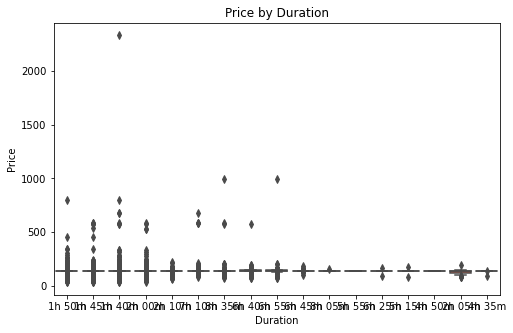

In [28]:
#boxplotting the flight price by Duration:
plt.figure(figsize=(8,5))
sns.boxplot(x='Duration',y='Price',data=df, palette='rainbow')
plt.title("Price by Duration")

This graph is not that much useful to analize. Let's try another way to visualze the same data.

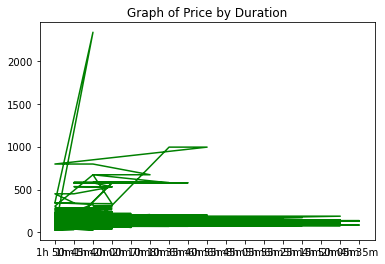

In [29]:
#plotting the flight price by Duration:
fig = plt.figure()
ax = plt.axes()

x = df['Duration']
y=df['Price']
plt.title('Graph of Price by Duration')
ax.plot(x, y, 'g', label='Price')

No difference in showing better the prices by duration. But let's see the previous 2 visualizations and try to describe what's happening here: Here we can see the price gets mostly betwenn 0 and 400. The median is similar in all cases independently of the Duration.

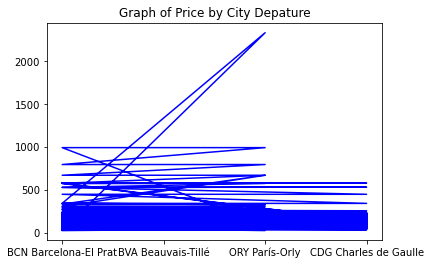

In [30]:
#Now let's plot the Price variation by Departure City :
fig = plt.figure()
ax = plt.axes()

x = df['CitiesDept']
y=df['Price']
plt.title('Graph of Price by City Depature')
ax.plot(x, y, 'b', label='Price')

Here we do not see this big much difference in price by departure city as long as we consider our previous comments.

In [31]:
df.columns #checking columns

Index(['Airline', 'Time_dept', 'Time_arrival', 'Direct', 'Duration',
       'CitiesDept', 'Cities_Arriv', 'Price', 'dateDept', 'dateArrv'],
      dtype='object')

In [32]:
df.dtypes #checking data types

Airline         object
Time_dept       object
Time_arrival    object
Direct          object
Duration        object
CitiesDept      object
Cities_Arriv    object
Price            int64
dateDept        object
dateArrv        object
dtype: object

As expected, the Price is the only feature that is set as integer data type. The others features can be kept as object for visalization and EDA purposes and then we will encode all the feature for our Machine Learning input.

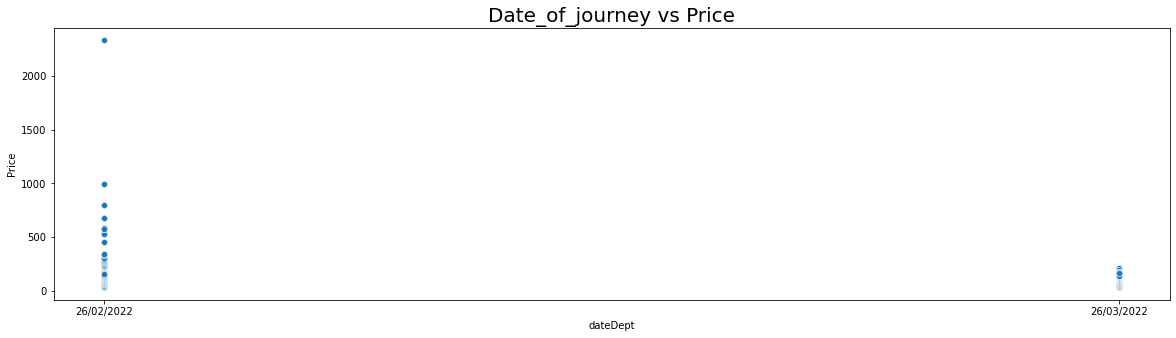

In [33]:
#scatterplotting price by Departure date:
#df['dateDept']=pd.to_datetime[df['dateDept']] #,errors='coerce'
plt.figure(figsize=(20,5))
ax=sns.scatterplot(x='dateDept',y="Price",data=df)
plt.title("Date_of_journey vs Price",fontsize=20)
plt.show()

As you may hae known from the dataset, the only 2 dates of departure we are studying in this case are 26/02 and 26/03 which are both Saturdays. As you see, we have more cases of flights going on 26/06 than 26/03, maybe due to Covid situation as airlines can't study and predict what are going to happen with national lockdown in future. So maybe this is the case with flights that are far in future.

<AxesSubplot:xlabel='Airline', ylabel='Price'>

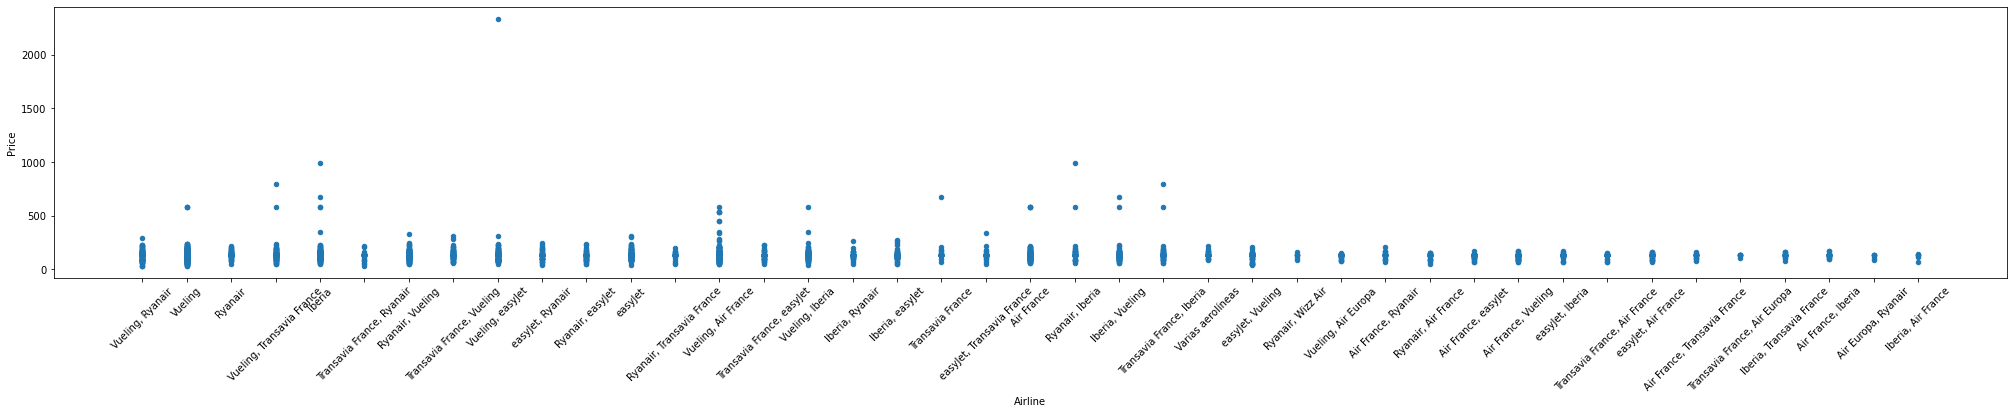

In [34]:
#scatterplotting Price by Airlines:
#sns.scatterplot(data=df, x=col, y="Price")
df.plot(kind ="scatter", x= "Airline", y = "Price", rot=45, figsize=(35,5))


We see almost all airlines have similar median flights prices except few ones which sometimes have higher prices. These exceptions occurr with airlines like flights that are combined such like Vueling, Transavia France Iberia and also with Vueling and Ryanair or even when taking flights with Ryanair and Transvia France. We also have few higher prices when combining airlines like Easyjet, Transavia France and Air France. Also few higher flights price when taking flights with Ryanair and Iberia or even Iberia and Vueling.

<AxesSubplot:xlabel='Time_dept', ylabel='Price'>

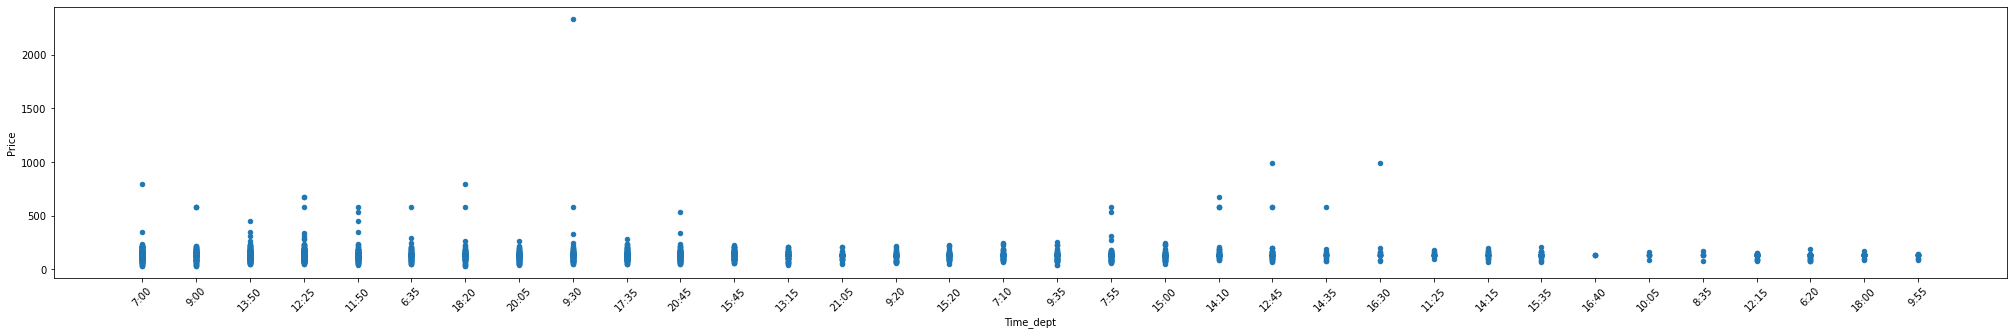

In [35]:
#scatterplotting Price by Departue Time:
#sns.scatterplot(data=df, x=col, y="Price")
df.plot(kind ="scatter", x= "Time_dept", y = "Price", rot=45, figsize=(35,5))


Regarding the departure time, we have few timings that may have higher prices than the mean and which are flights departing at 7am, 9am, 13:50pm, 12:25 pm, 11:50am, 18:20, 9:30am, 20:45, 7:55am, 14:10, 12:45pm, 14:35 and 16:30h. 

<AxesSubplot:xlabel='Time_arrival', ylabel='Price'>

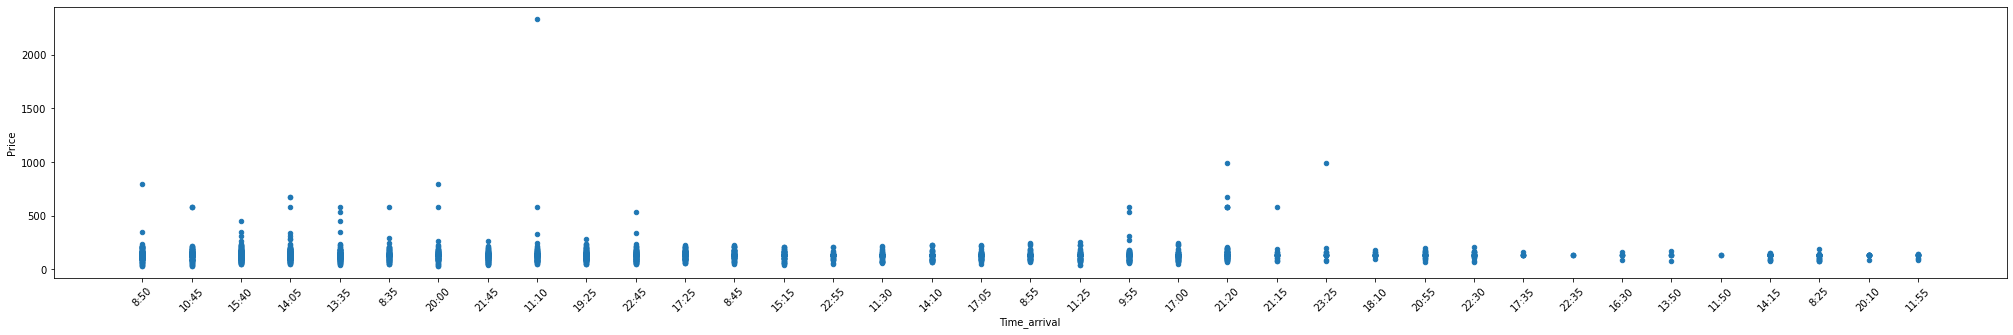

In [36]:
#scatterplotting Price by Arrival Time:
#sns.scatterplot(data=df, x=col, y="Price")
df.plot(kind ="scatter", x= "Time_arrival", y = "Price", rot=45, figsize=(35,5))


Similar situation happens with Arrival Time, we have Price around the mean and the median but we have also Arrival Time where we have a bit higher prices such as in timings like  8:50, 10:45 (one case), 15:40, 14:05, 13:35,8:35 (one case), 20h (2 cases), 21:45, 11:10, 22:45 (2 cases), 9:55, 21:20, 21:15 (one ase) and 23:25 (one case).

<AxesSubplot:xlabel='Duration', ylabel='Price'>

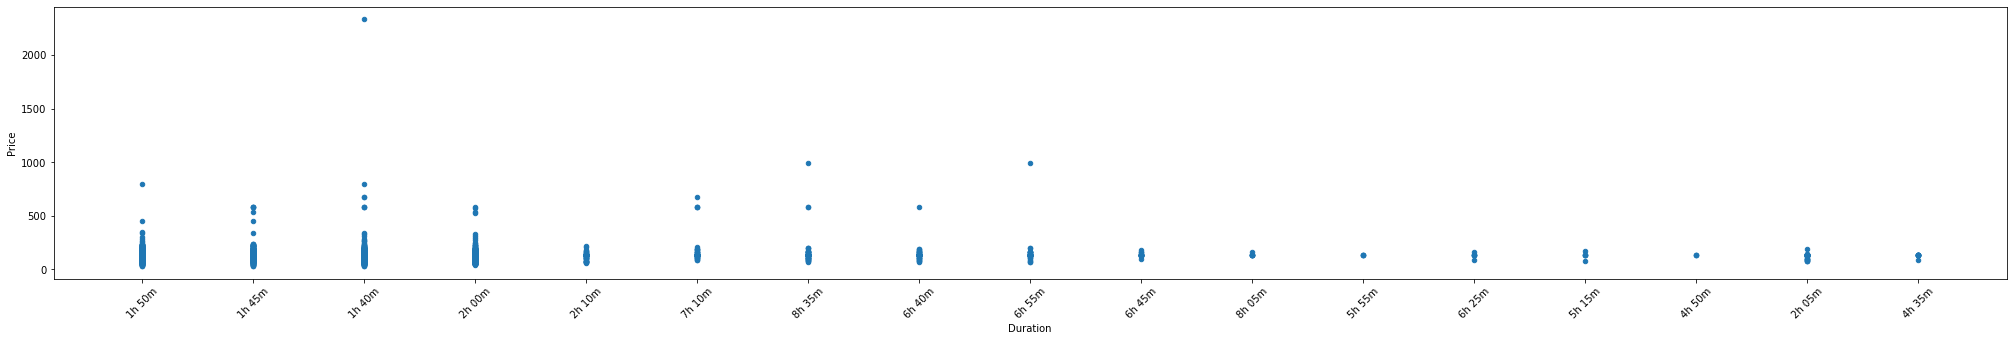

In [37]:
#scatterplotting Price by Duration:
#sns.scatterplot(data=df, x=col, y="Price")
df.plot(kind ="scatter", x= "Duration", y = "Price", rot=45, figsize=(35,5))


When comparing Duration, it can be studied and analyzed the same as tge departure and arrival time. Almost al the prices are between 0 and 500 euros except some cases where we have a bit higher prices such as duration of 1h 50min, 1h 45m, 1h 40m (we have 1 outlier here), 2h, 7h 10m,, 8h 35m, 6h 40m and 6h 55m.

<AxesSubplot:xlabel='dateDept', ylabel='Price'>

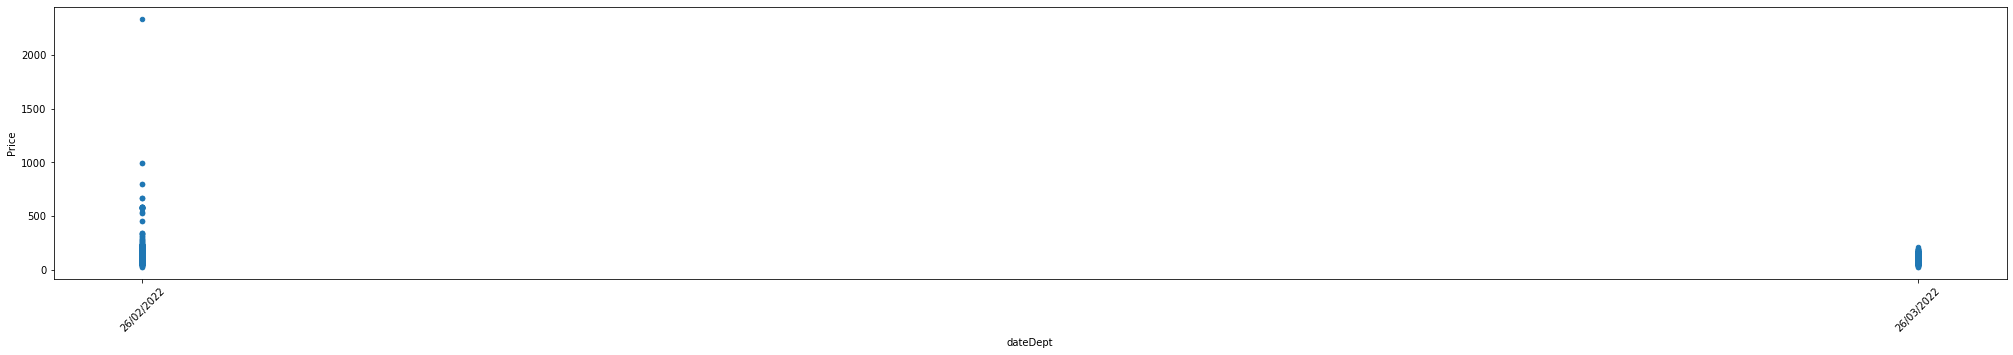

In [38]:
#scatterplotting Price by Departure Date:
#sns.scatterplot(data=df, x=col, y="Price")
df.plot(kind ="scatter", x= "dateDept", y = "Price", rot=45, figsize=(35,5))


As we said, we have dataset including flights of Saturdays 26th Feb and 26th March.

In [39]:
colslist=['Time_dept', 'Time_arrival', 'Duration','dateDept','dateArrv'] #creating list of several columns which will be converted in list type soon.

In [40]:
df.columns

Index(['Airline', 'Time_dept', 'Time_arrival', 'Direct', 'Duration',
       'CitiesDept', 'Cities_Arriv', 'Price', 'dateDept', 'dateArrv'],
      dtype='object')

In [28]:
colsexceptPrice=['Airline', 'Time_dept', 'Time_arrival', 'Direct', 'Duration',
       'CitiesDept', 'Cities_Arriv', 'dateDept', 'dateArrv']  #creating list including all columns except target feature price

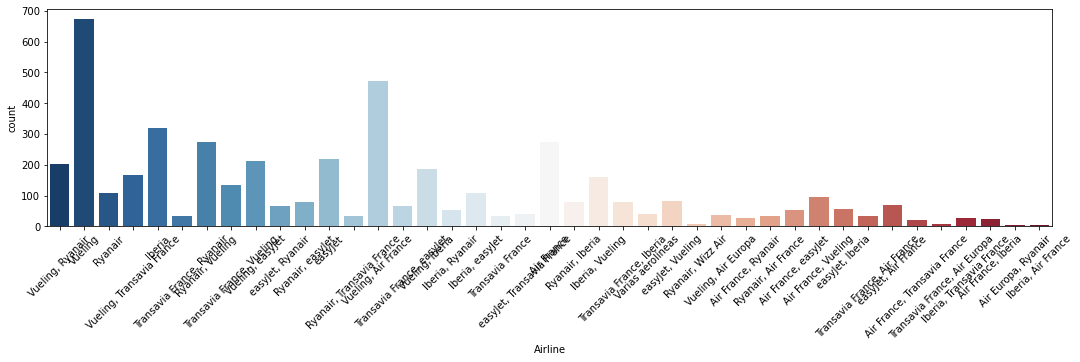

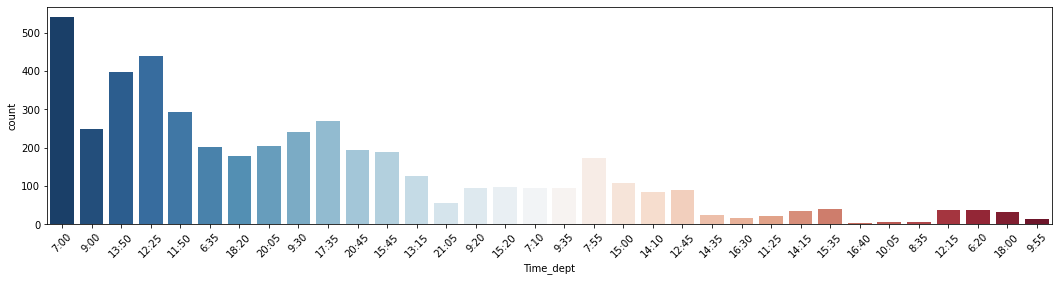

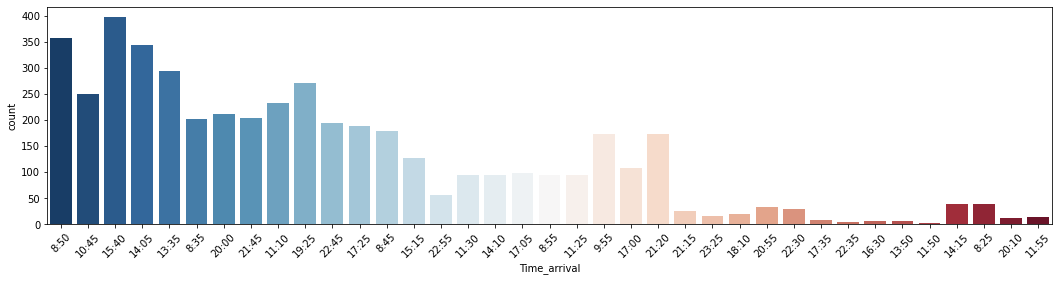

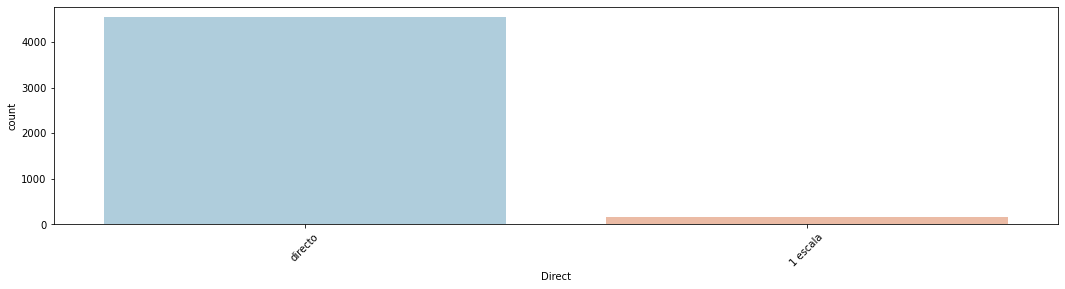

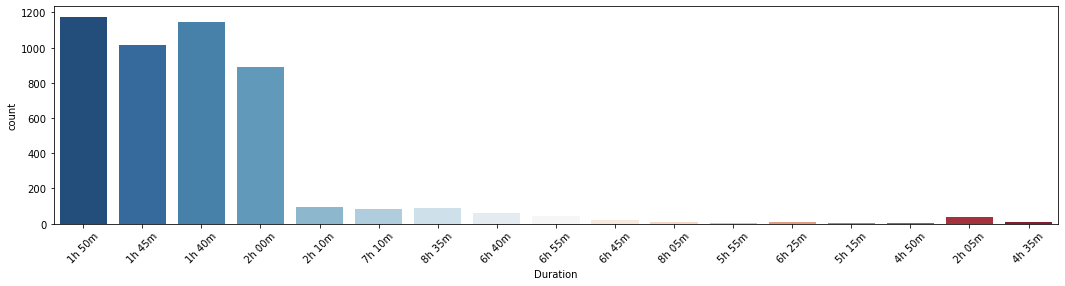

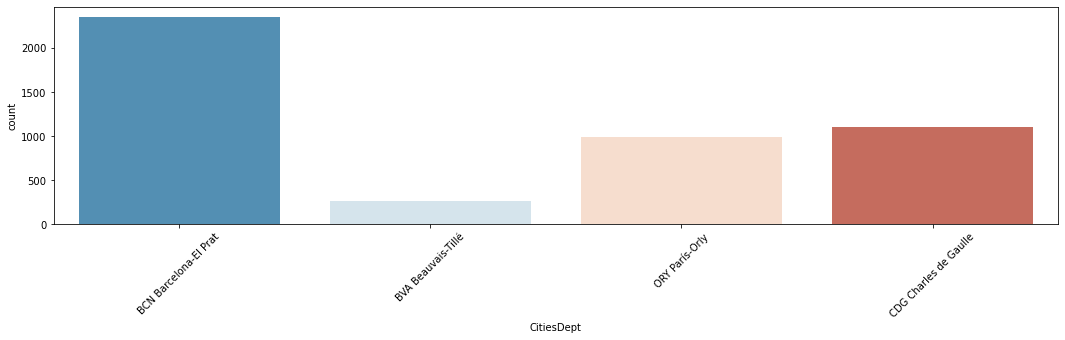

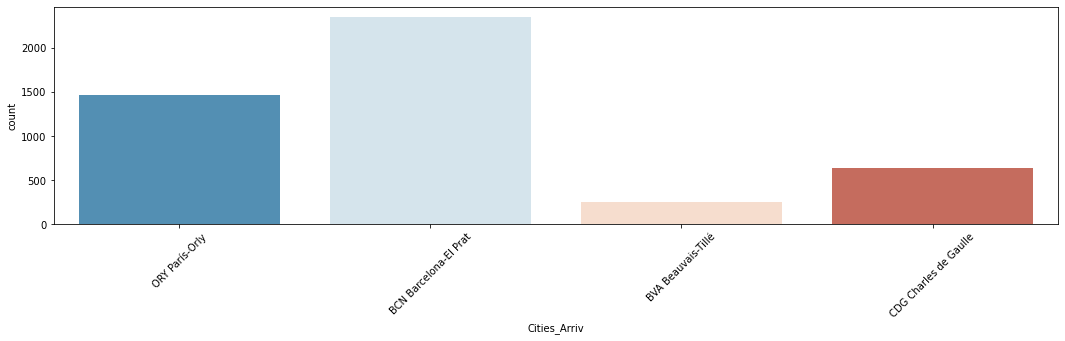

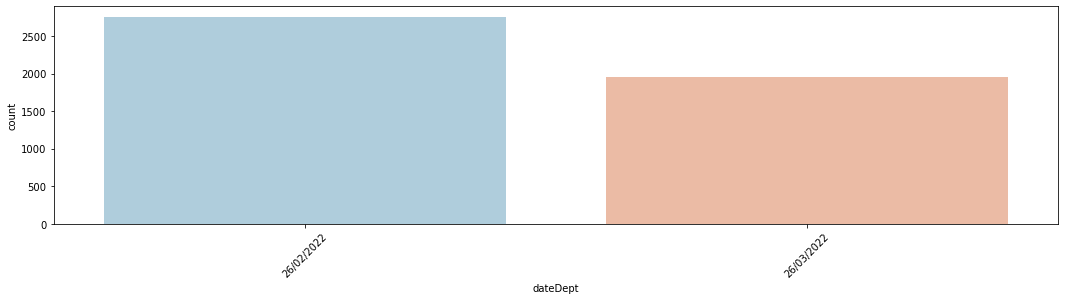

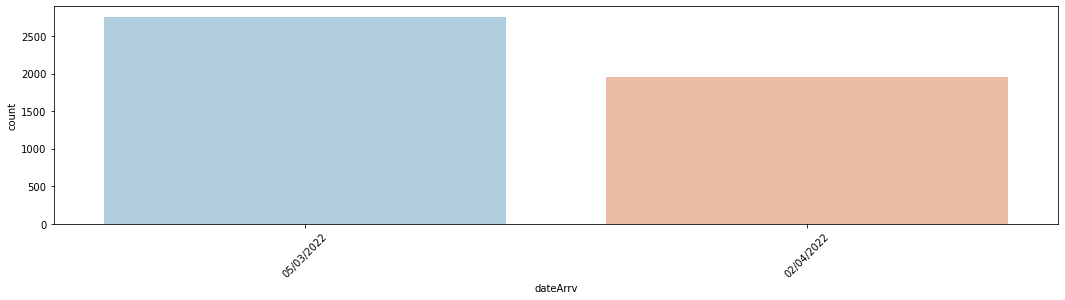

In [36]:
#Let's plot the counting of each unique category in each column:
for col in colsexceptPrice:
    plt.figure(figsize=(18,4))
    plt.xticks(rotation=45)
    sns.countplot(x=col, data=df,palette='RdBu_r')

Here we can see easily, Vueling alone has the highest number of flights. Then in second position we have combo of Ryanair and Transavia France which comes in 2nd place and get the most flights after Vueling.
Then, in third place, we have combo of Vueling and Transavia France which gets most flights in third place.

When checking the flights counts by Time of departure, we see 7am has the highest number of seats available. Then, after that, in second place comes flight that departs at 12:25h. And in 3rd place, comes the flight that departs at 13:50.

When comparing the lowest number of seats available, we see that we have 16:40,10:05,8:35h.

When checking the flights counts by Arrival Time, we see 15:40h has the highest number of seats available. Then, after that, in second place comes flight that arrives at 08:50h. And in 3rd place, comes the flight that departs at 14:05.

When comparing the lowest number of seats available, we see that we have 22:35,16:30,13:50 and 11:50.

As these flights are between Barcelona and Paris, it is obvious that most of the flights would be direct flights. There is just one exception which has 1 stay in between.

When checking flights by duration, we can see flights with duration etween 1:45h and 2h are the most used and available in the website.

When checking flights by Departure Cities, we see Barcelona gets the 1st position as the city from which the flights gets mostly departed as Barcelona is the main Airport in Spain. And in sencond place, from France we have 3 options as Departure Airports but the french airport which gets the position when comparing the flight departure is Charles de Gaulle which is the main airport of Paris.

When checking flights by Arrival Cities, again we see Barcelona gets the 1st position as the city to which flights mostly arrives as Barcelona is the main Airport in Spain. And in sencond place, from France we have 3 options as Departure Airports but the french airport which gets the position when comparing the flight departure is Paris-Orly which is the second main airport of Paris.

Regarding the dates of depart and arrival, as we said, we have only two dates of departure and two dates for arrival so that we could compare flights that are close to be flown and also flights far to be taken.

For flights price comparison, we took February depature date 26/02 and back on March, 05th

For flights a bit in far in future, we took 26/03 and bak on April, 2nd.

Both departure days are Saturdays so that we can compare the same day of week how the price varies.

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


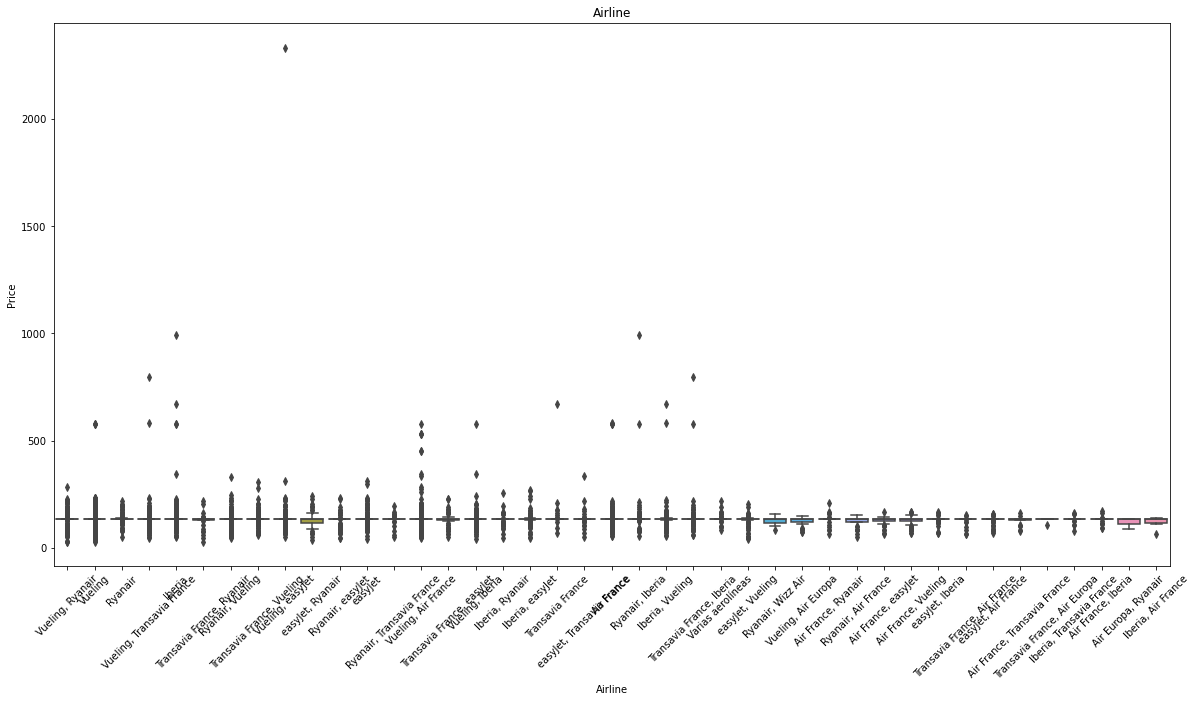

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


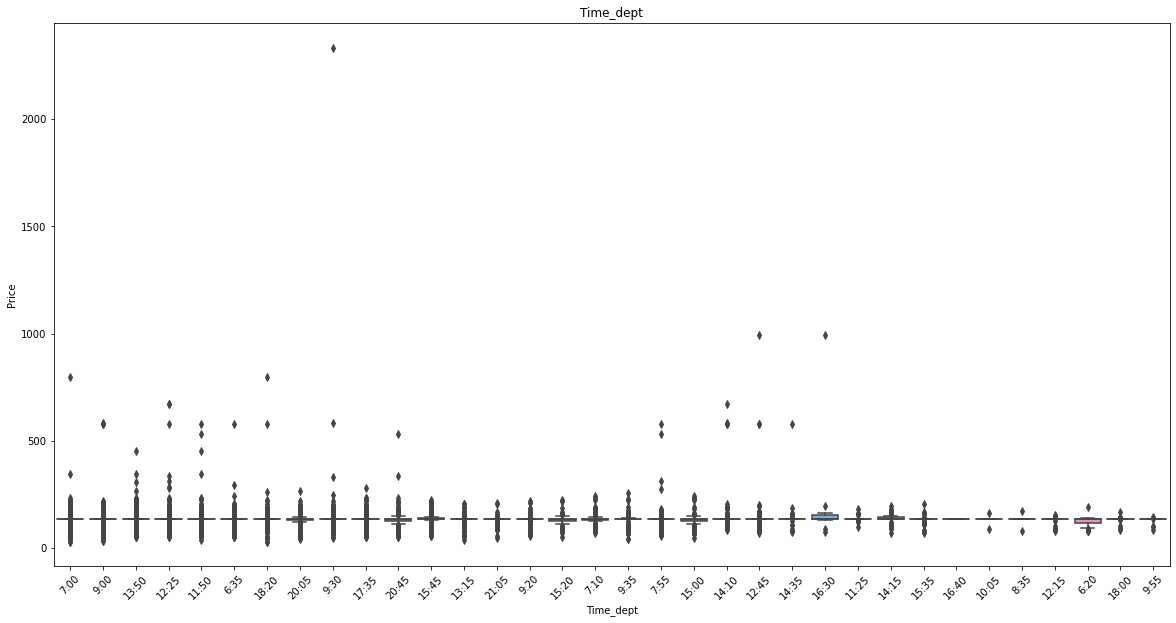

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


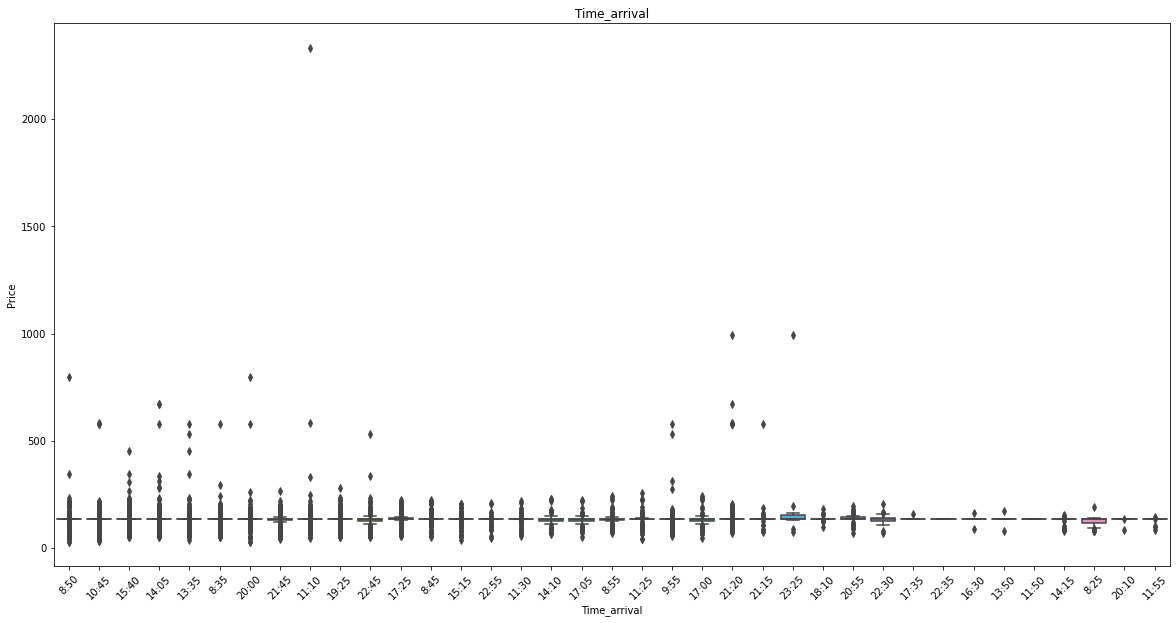

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


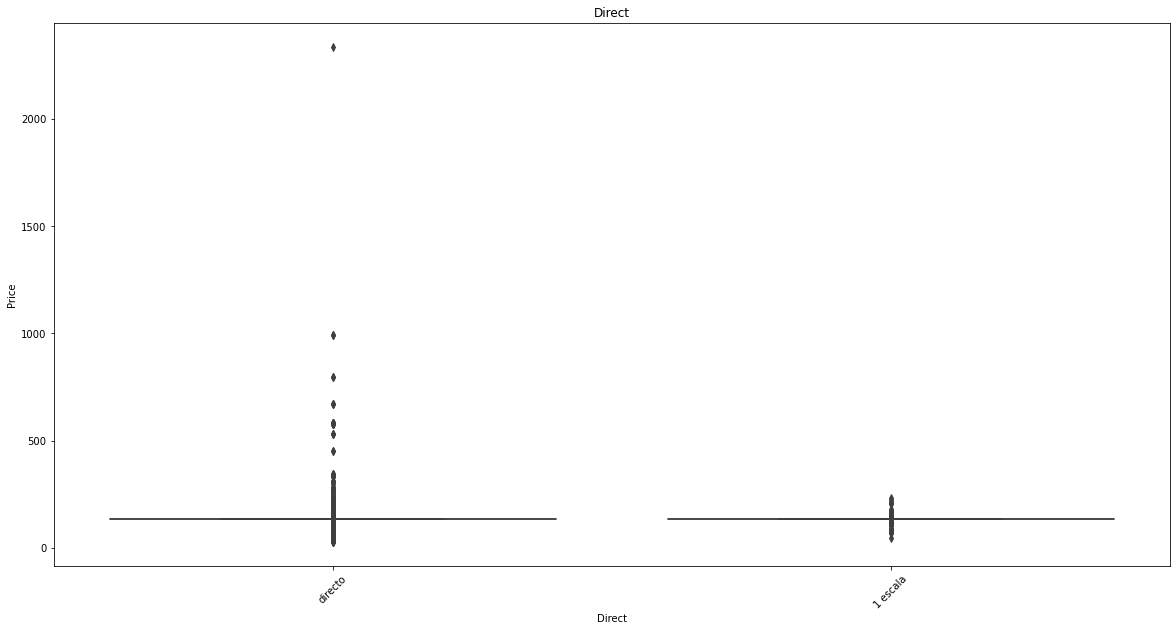

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


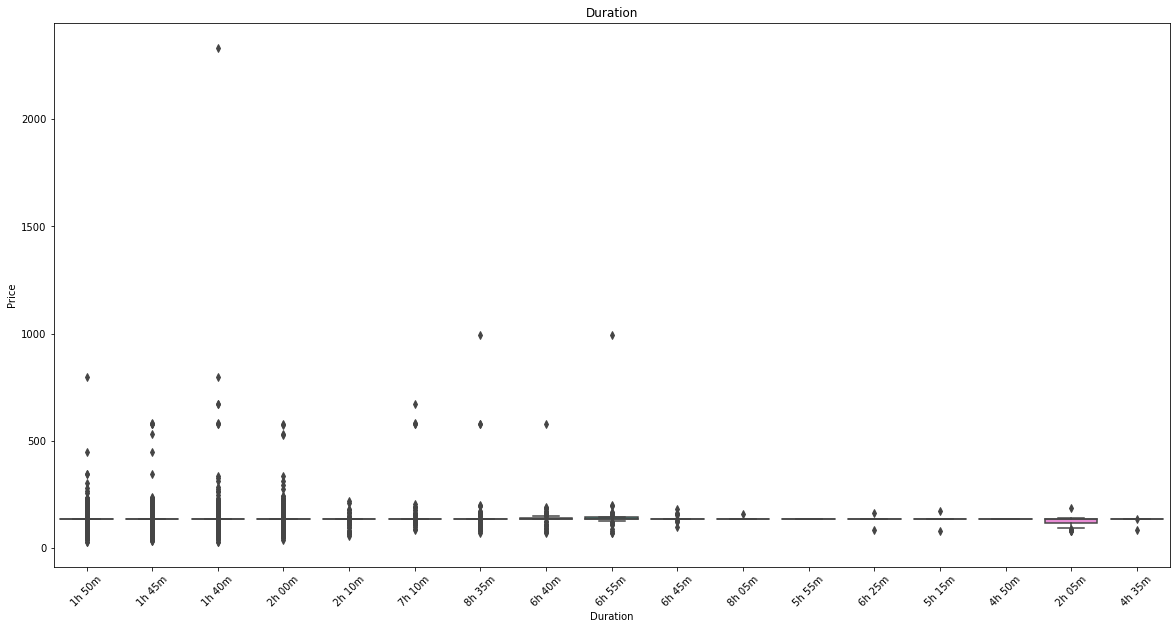

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


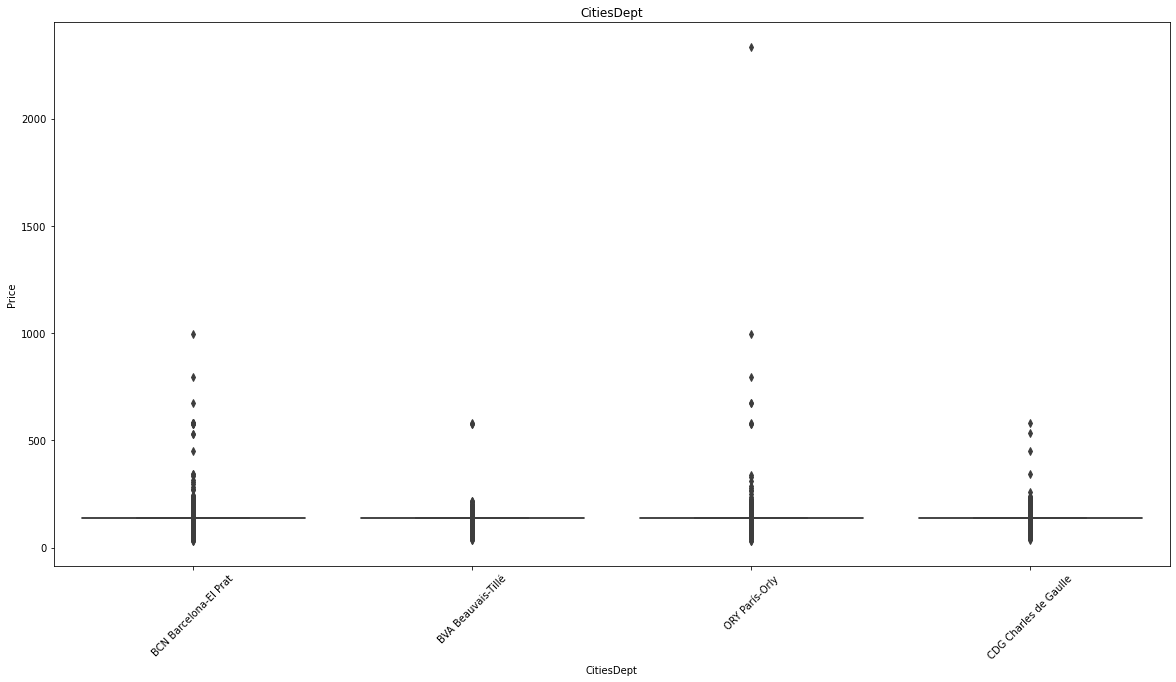

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


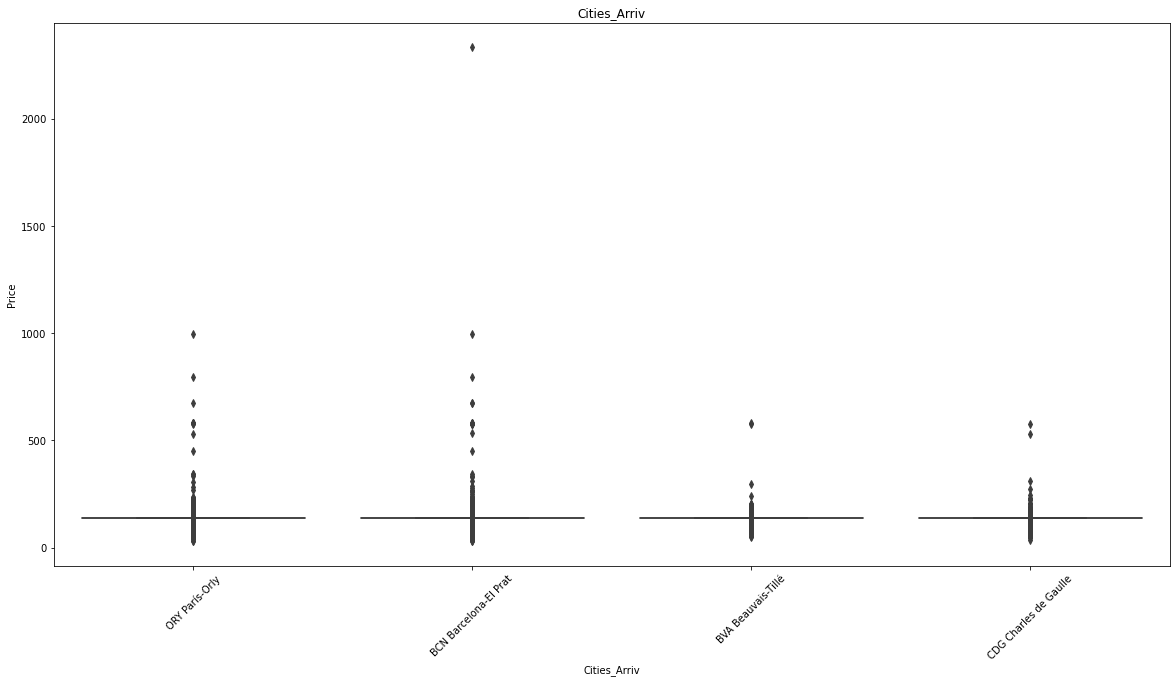

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


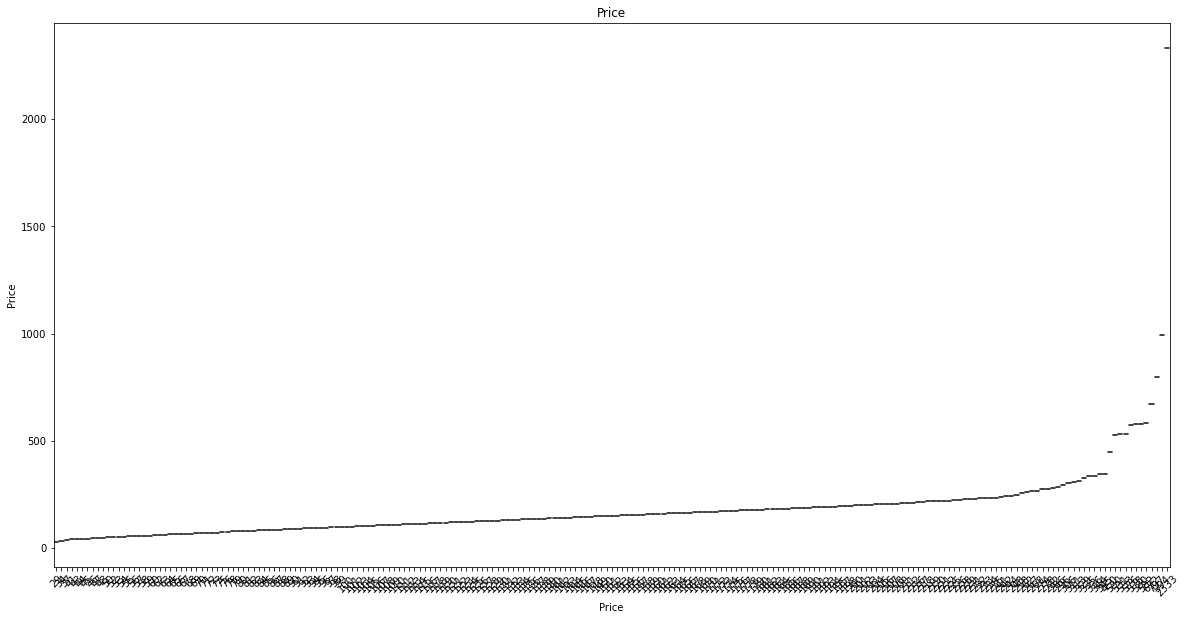

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


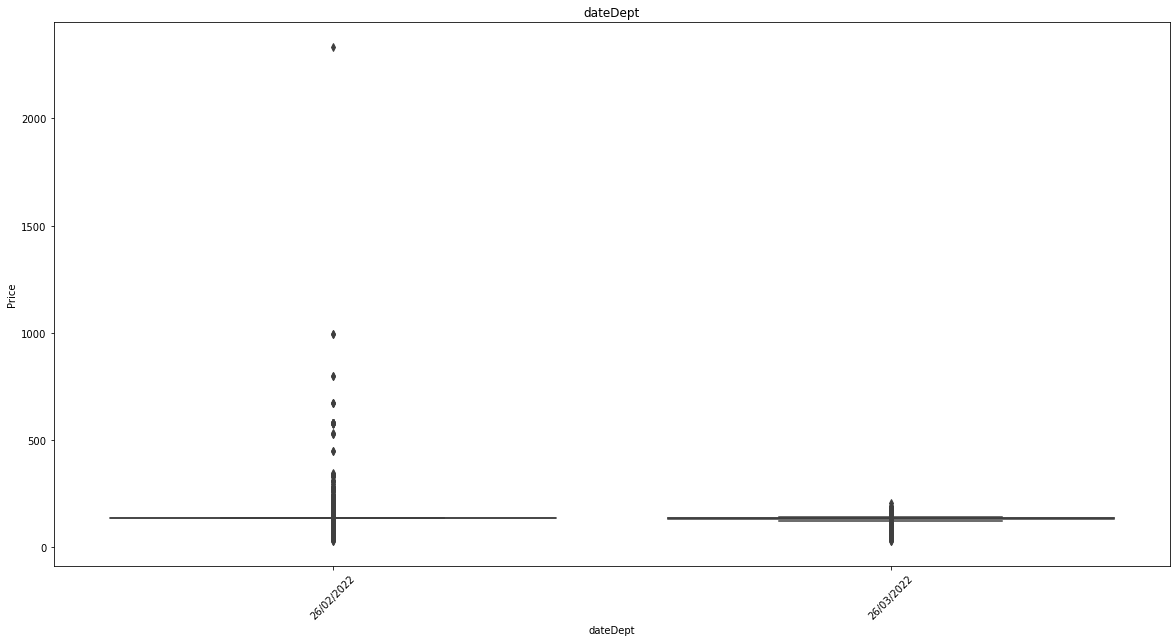

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


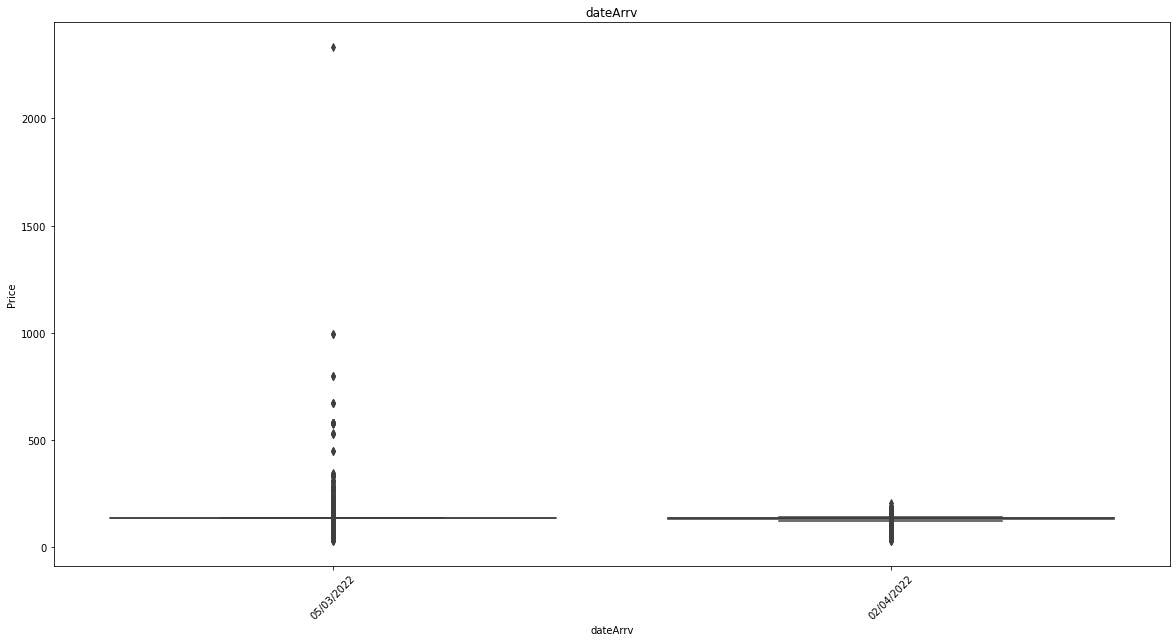

In [43]:
#trying to boxplot all columns:
for col in df.columns:
    plt.figure(figsize=(20,10))
    sns.boxplot(df[col],df['Price'])
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()

Here we can see the same conclusions as previously mentioned.

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


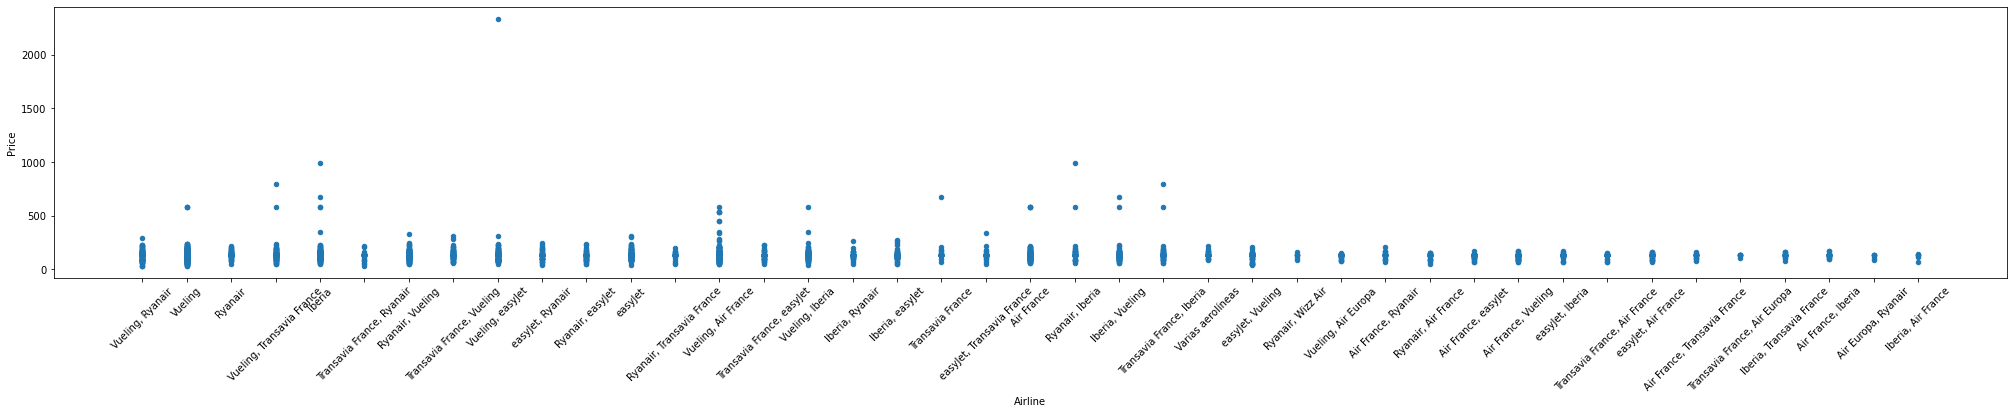

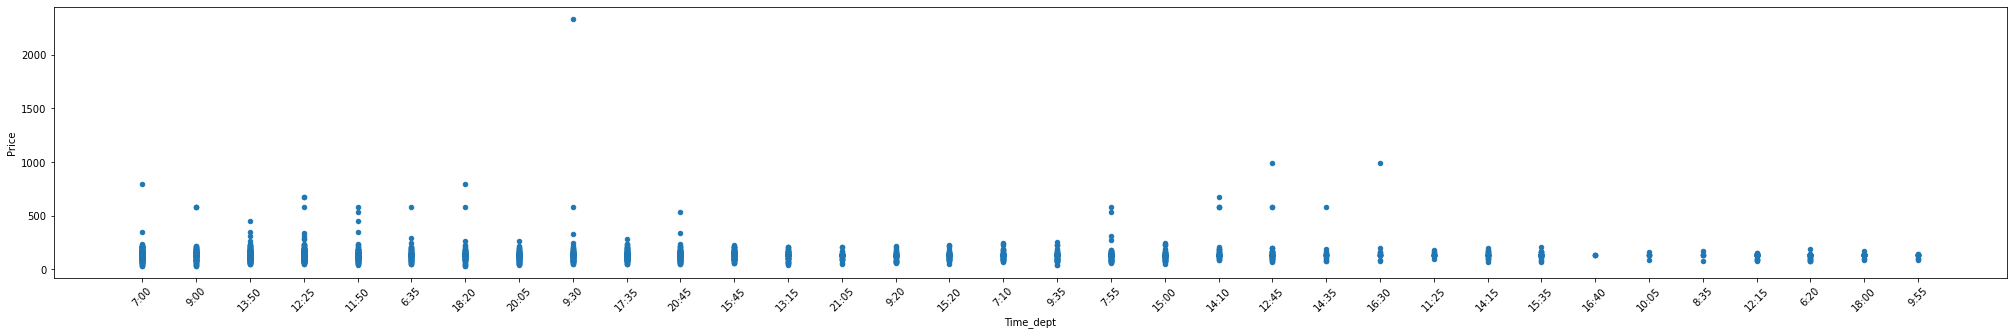

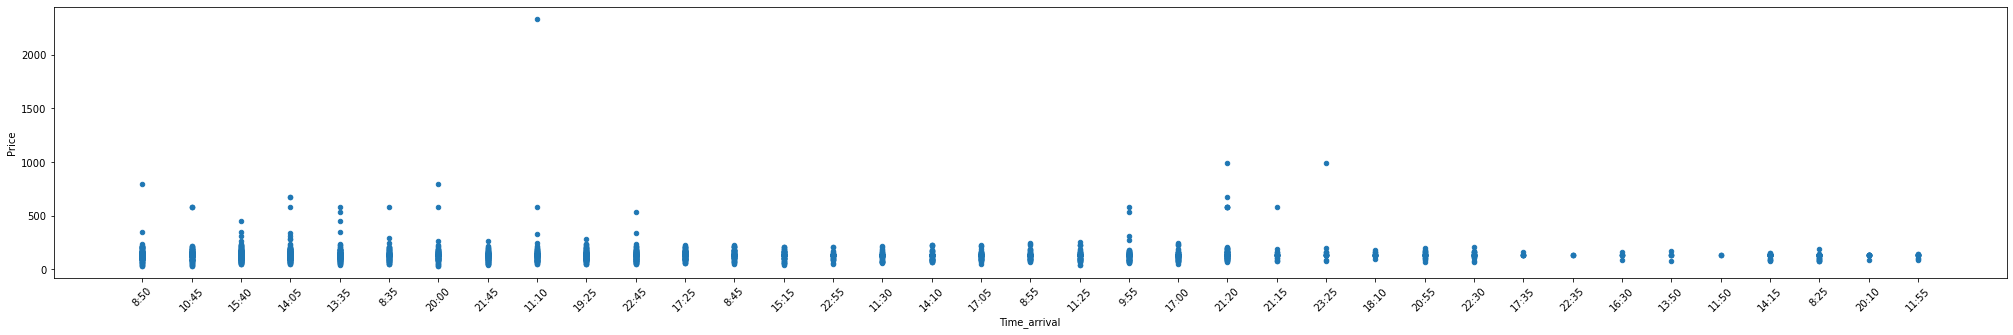

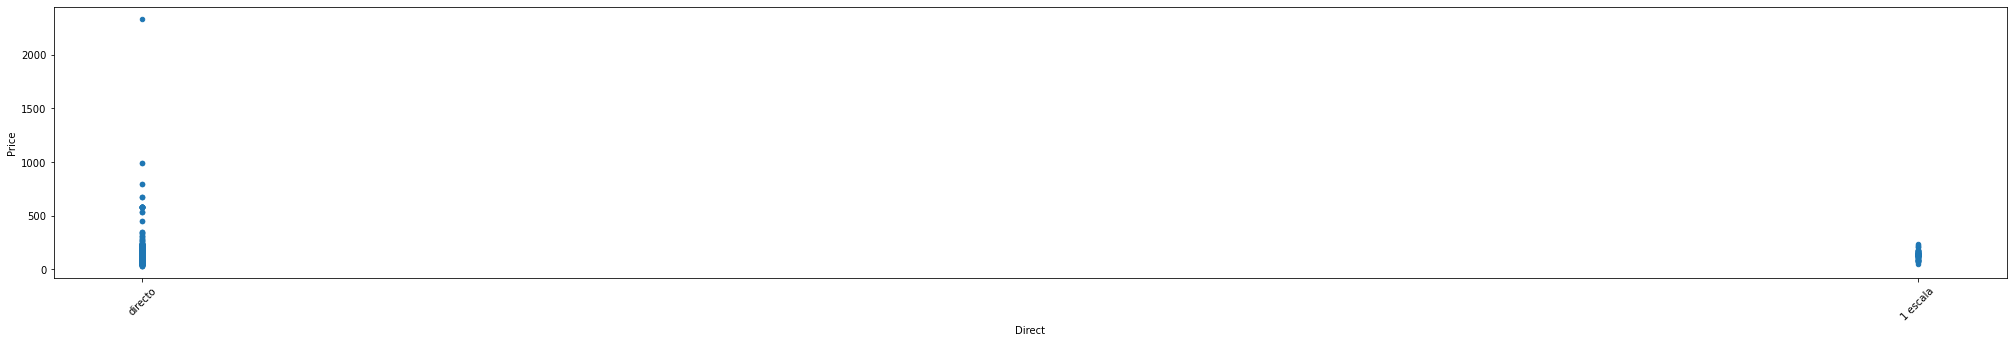

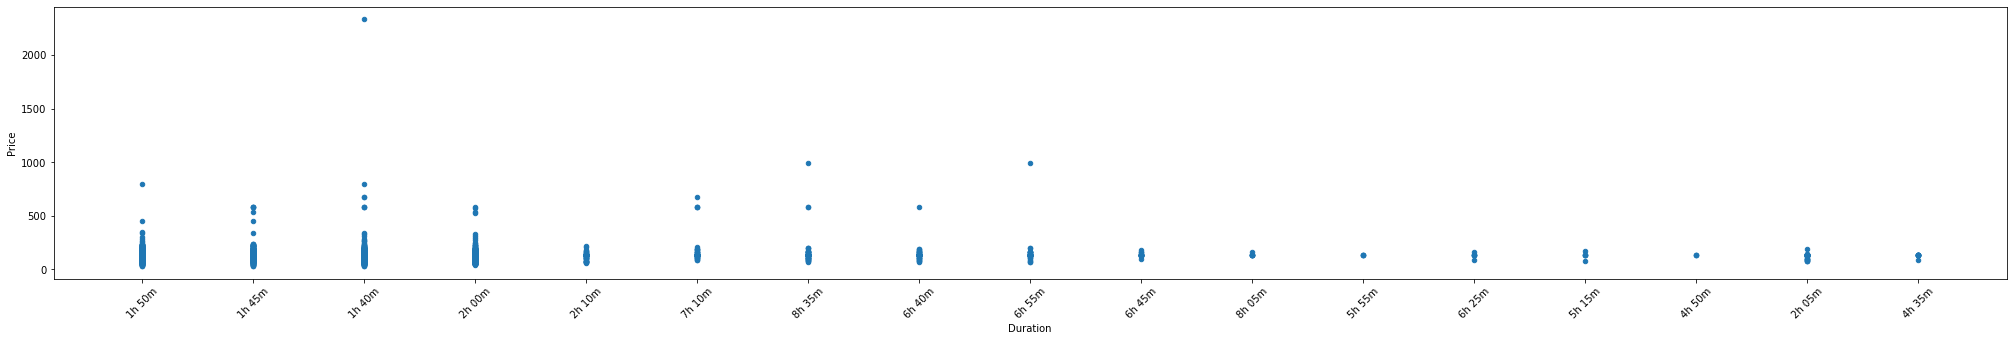

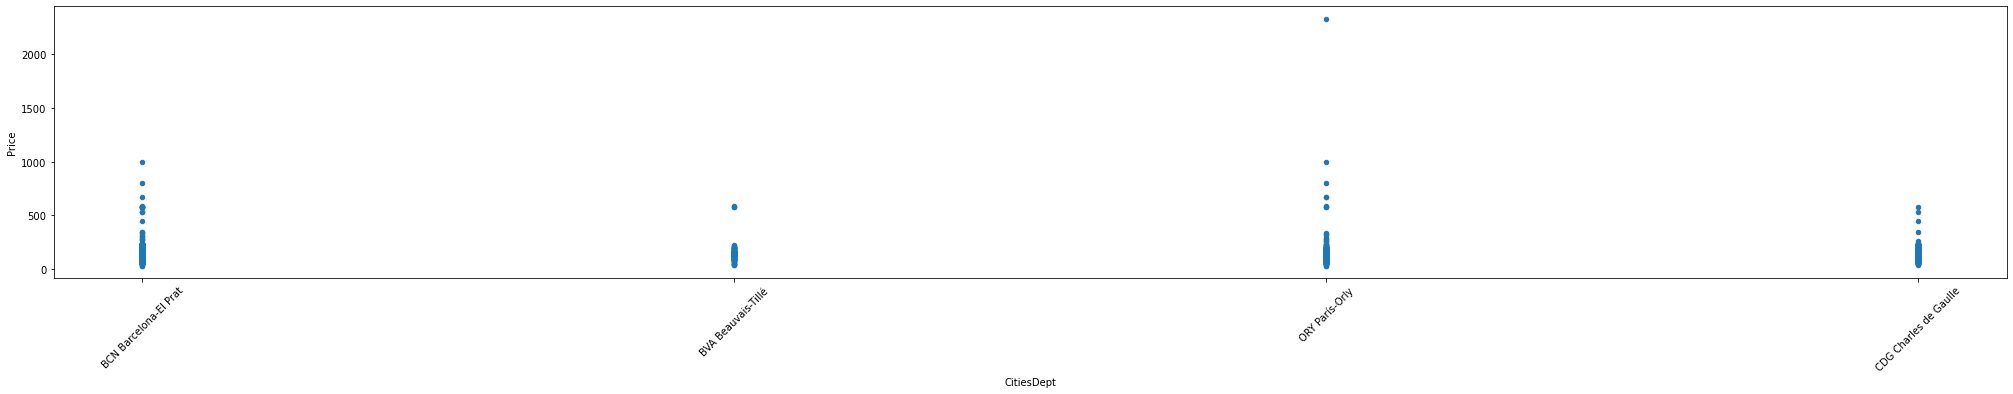

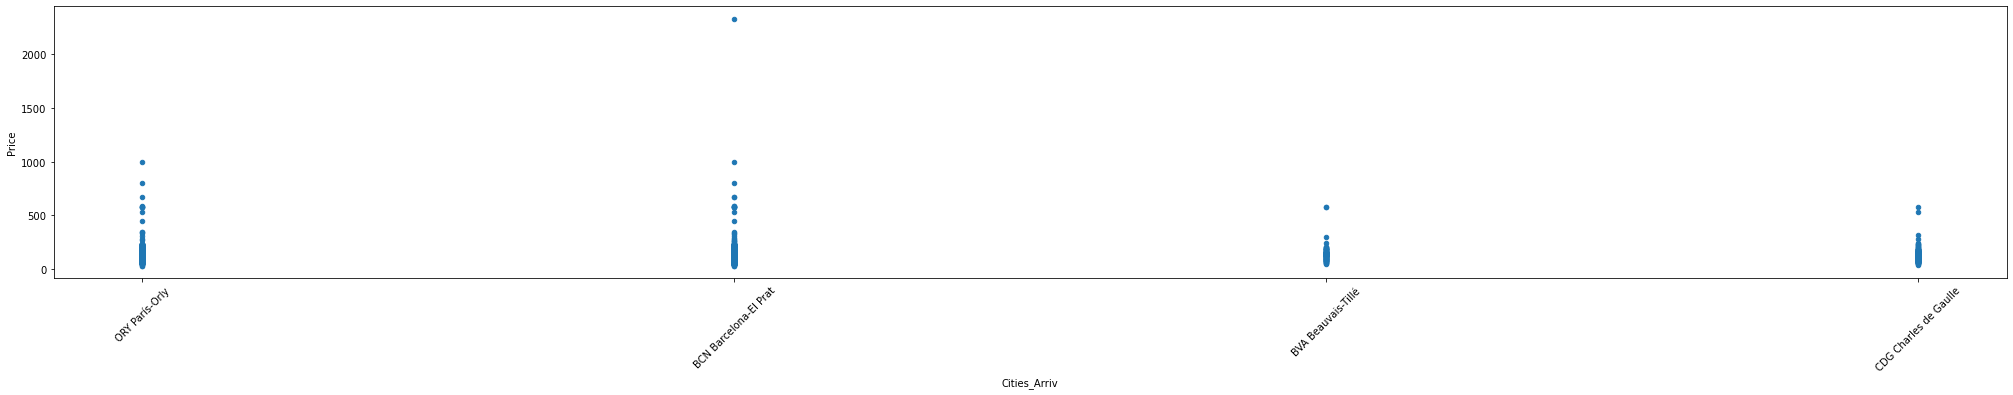

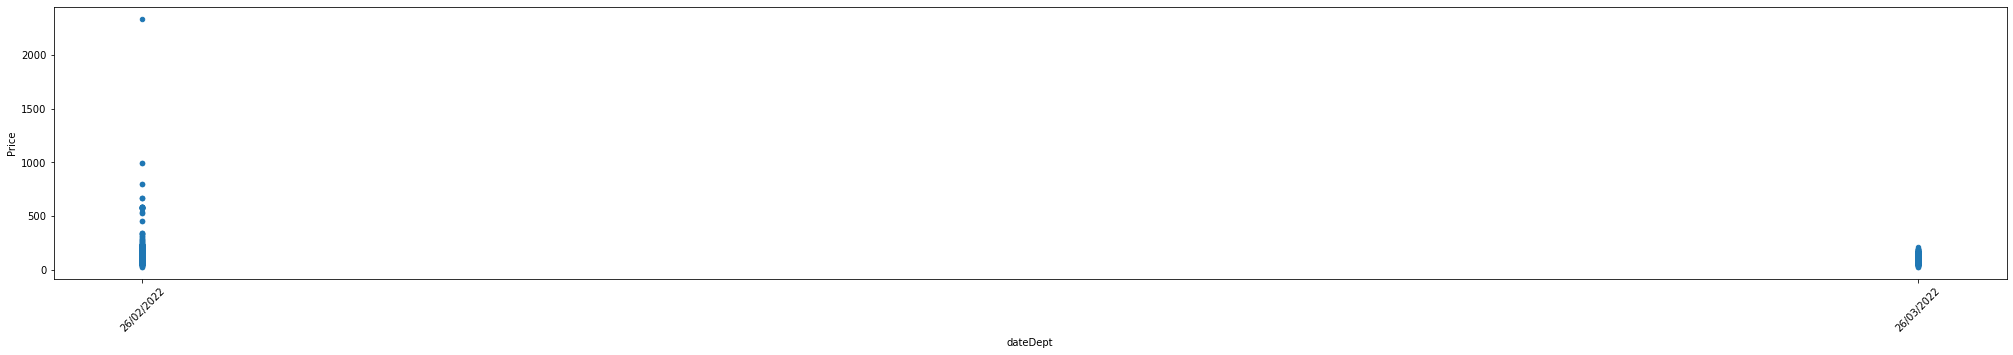

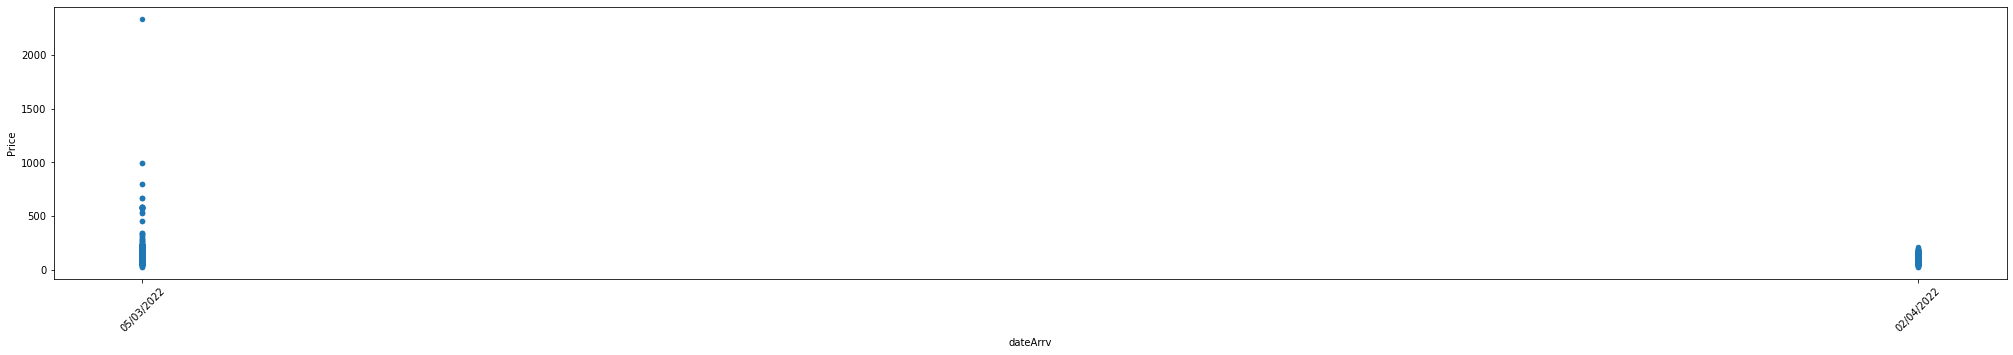

In [44]:
#plotting scatter plots for each column with regards target feature Price:
#sns.scatterplot(data=df, x=col, y="Price") 
for col in colsexceptPrice:
    print(df.plot(kind ="scatter", x= col, y = "Price", rot=45, figsize=(35,5)))

The same conclusion can be extrated from here, from the above scatter plots.

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


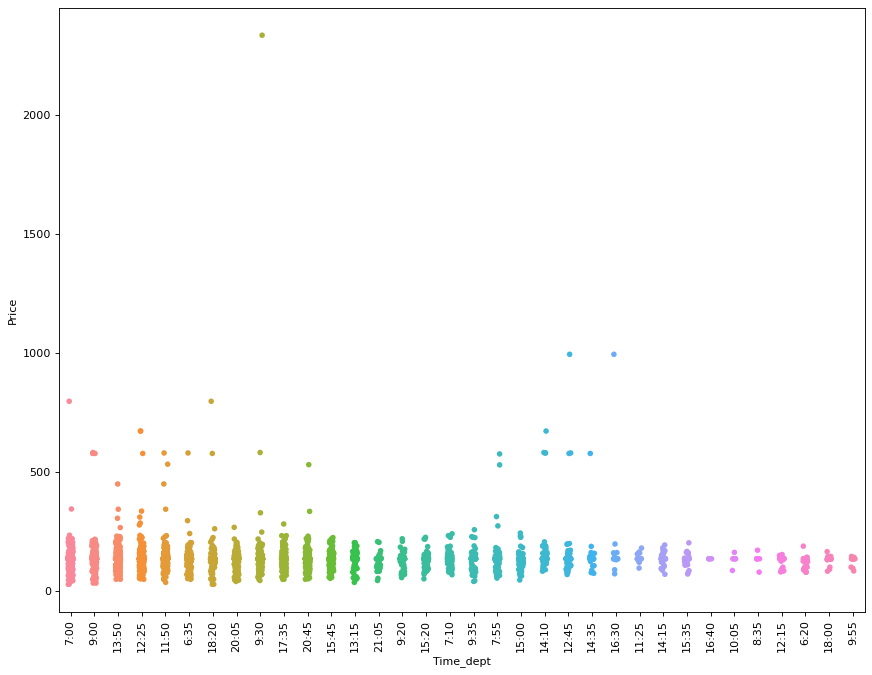

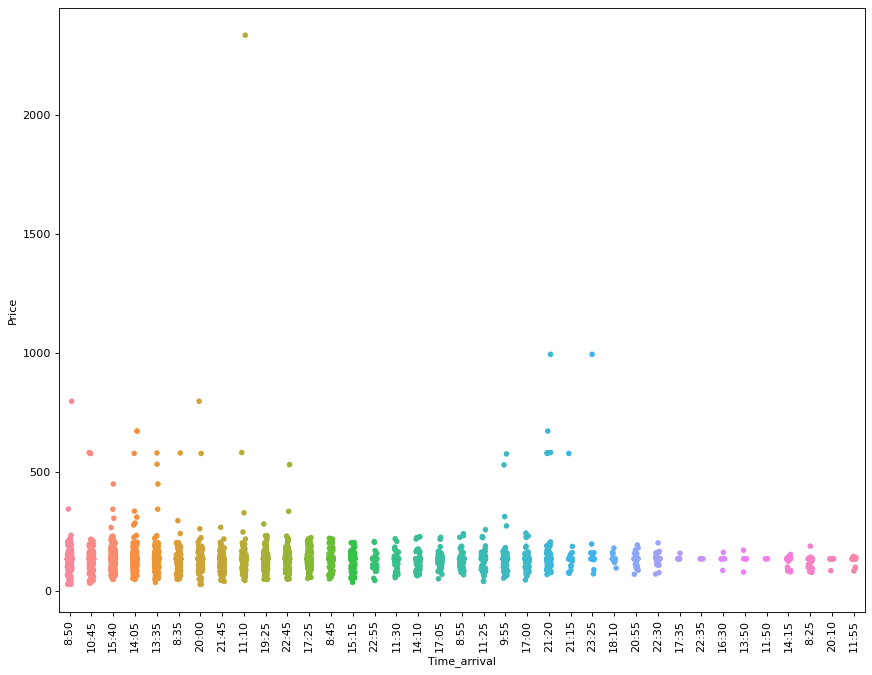

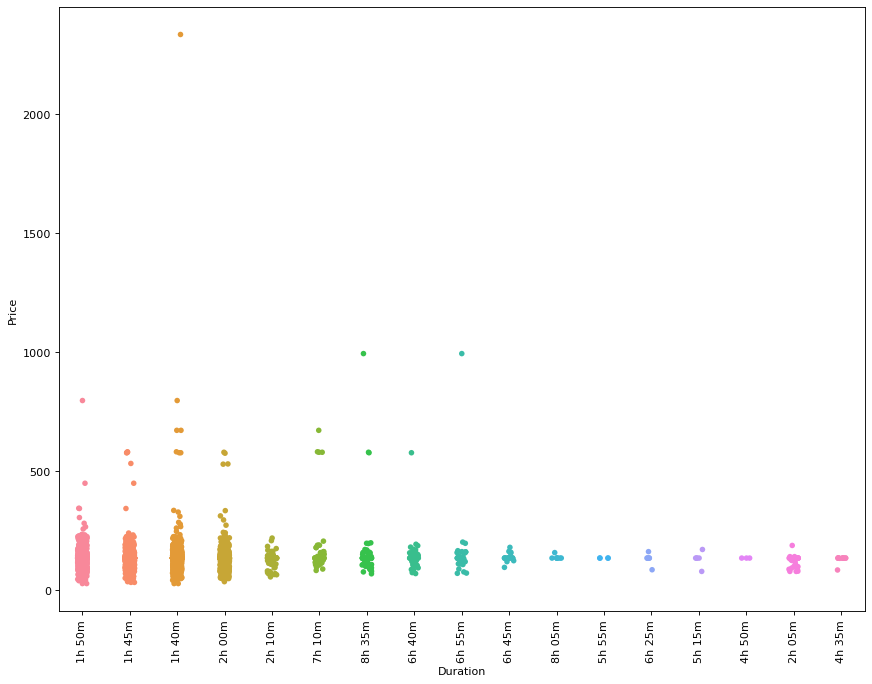

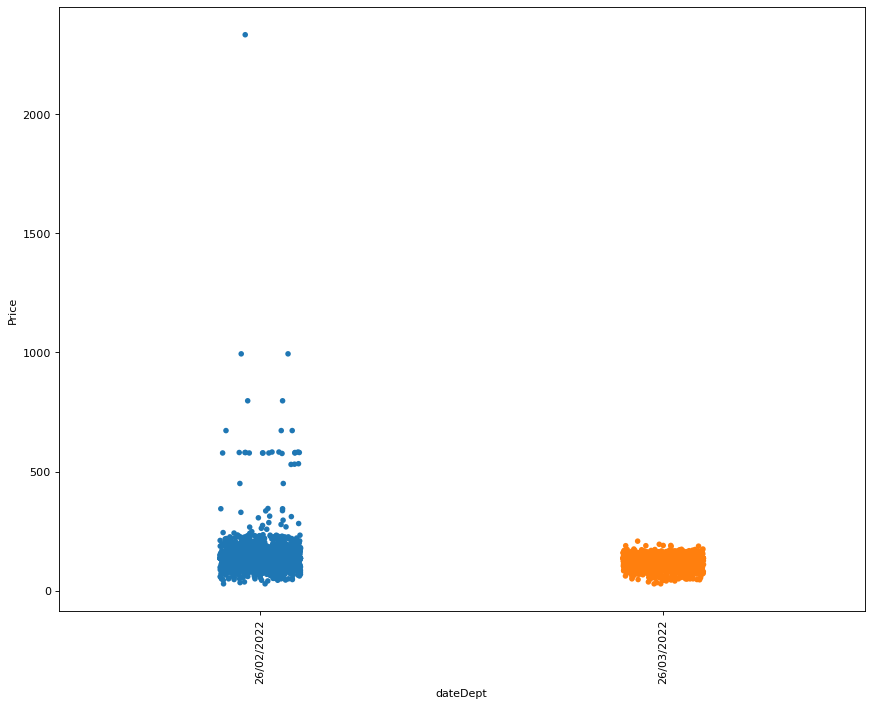

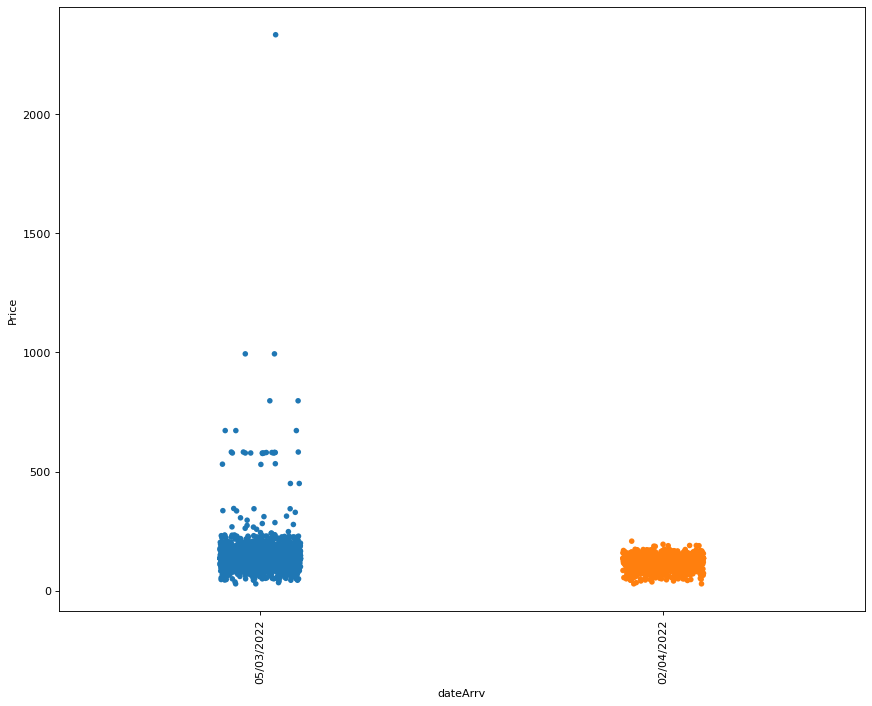

In [46]:
##plotting strip plots for several column with regards target feature Price:
for col in colslist:
    plt.figure(figsize=(13,10), dpi= 80)
    print(sns.stripplot(x=col, y="Price", data=df, jitter=True))
    plt.xticks(rotation=90)

As we mentioned previously:

Regarding the departure time, we have few timings that may have higher prices than the mean and which are flights departing at 7am, 9am, 13:50pm, 12:25 pm, 11:50am, 18:20, 9:30am, 20:45, 7:55am, 14:10, 12:45pm, 14:35 and 16:30h. 

Similar situation happens with Arrival Time, we have Price around the mean and the median but we have also Arrival Time where we have a bit higher prices such as in timings like  8:50, 10:45 (one case), 15:40, 14:05, 13:35,8:35 (one case), 20h (2 cases), 21:45, 11:10, 22:45 (2 cases), 9:55, 21:20, 21:15 (one ase) and 23:25 (one case).

When comparing Duration, it can be studied and analyzed the same as tge departure and arrival time. Almost al the prices are between 0 and 500 euros except some cases where we have a bit higher prices such as duration of 1h 50min, 1h 45m, 1h 40m (we have 1 outlier here), 2h, 7h 10m,, 8h 35m, 6h 40m and 6h 55m.

regarding the dates, there is no big change in the Price when checking the flights for between dates 26 march and 2 April as it is just prior to Holy Wweek and the prices are down and close to the mean price while the prices between dates 26 february and 5 March tend to vary more than the other case.

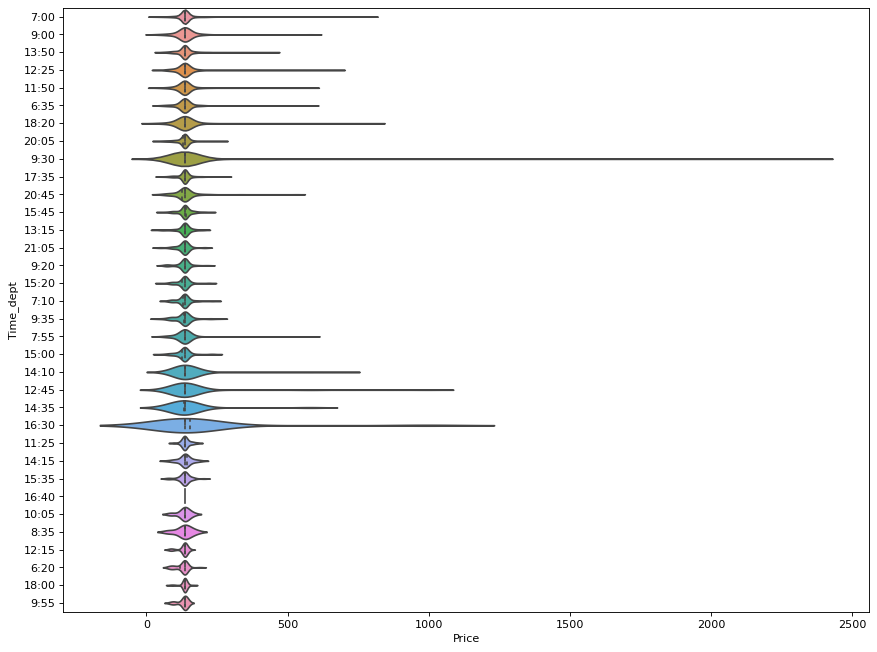

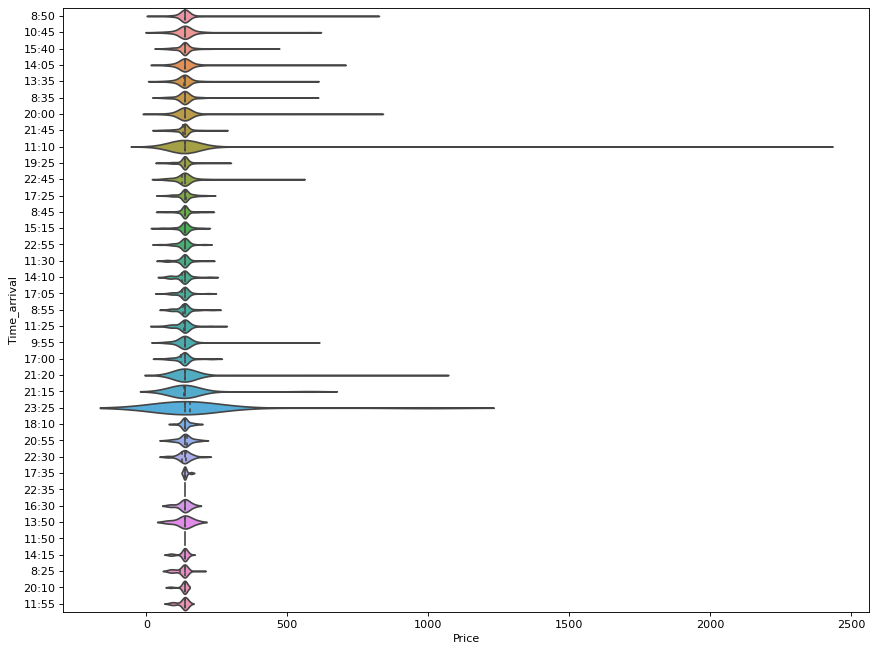

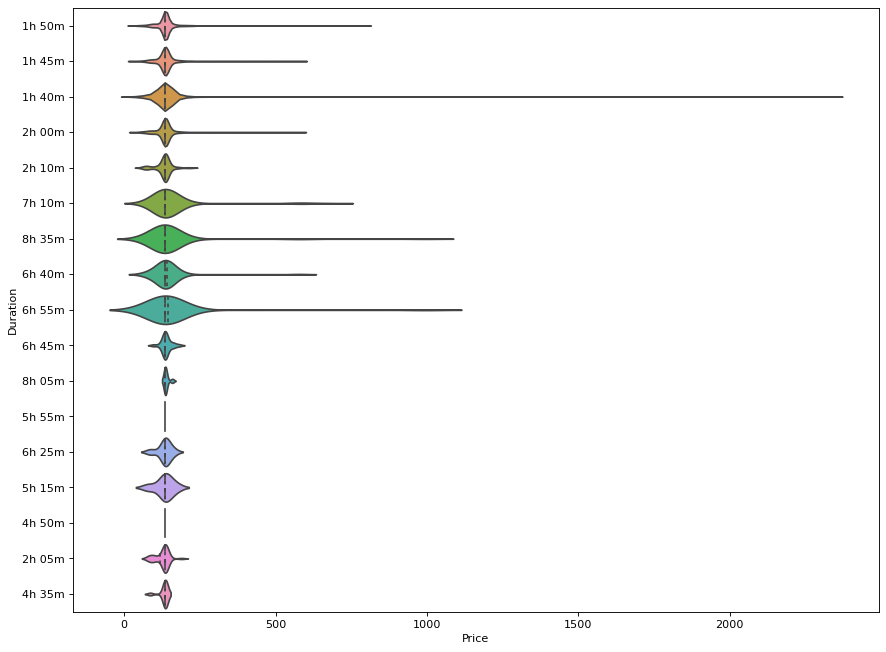

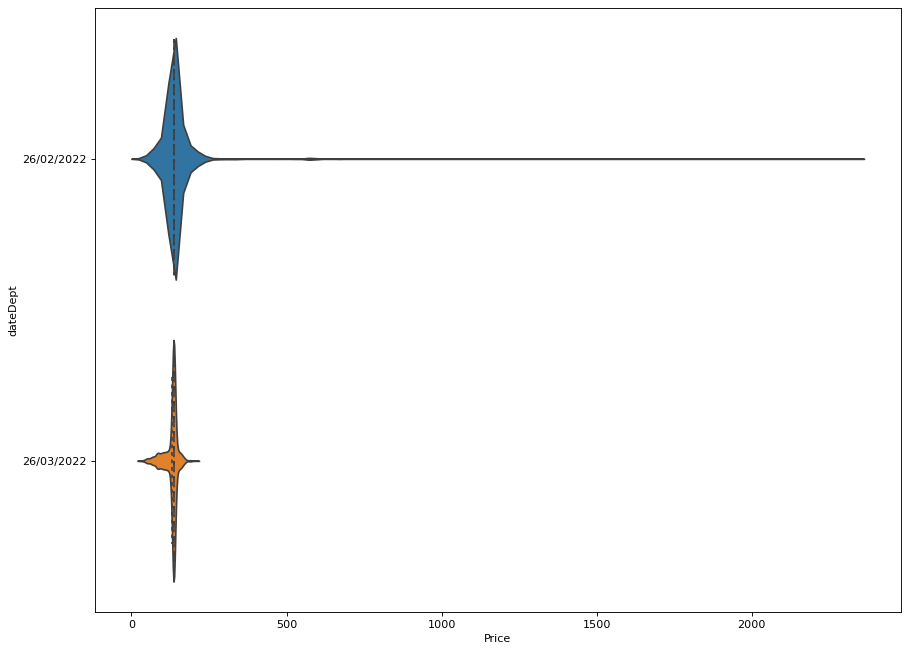

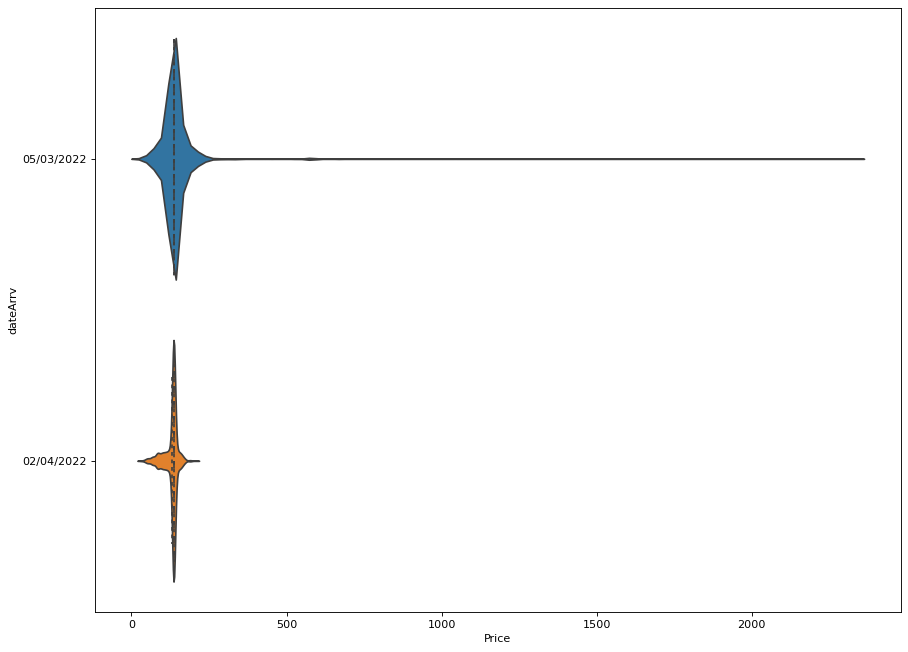

In [45]:
#plotting violin plots for each column with regards target feature Price:
for col in colslist:    
    plt.figure(figsize=(13,10), dpi= 80)    
    sns.violinplot(x='Price', y=col, data=df, scale='width', inner='quartile', rot=45)

Here we can notice and conclude the same as previously commented.

<AxesSubplot:xlabel='dateArrv', ylabel='Price'>

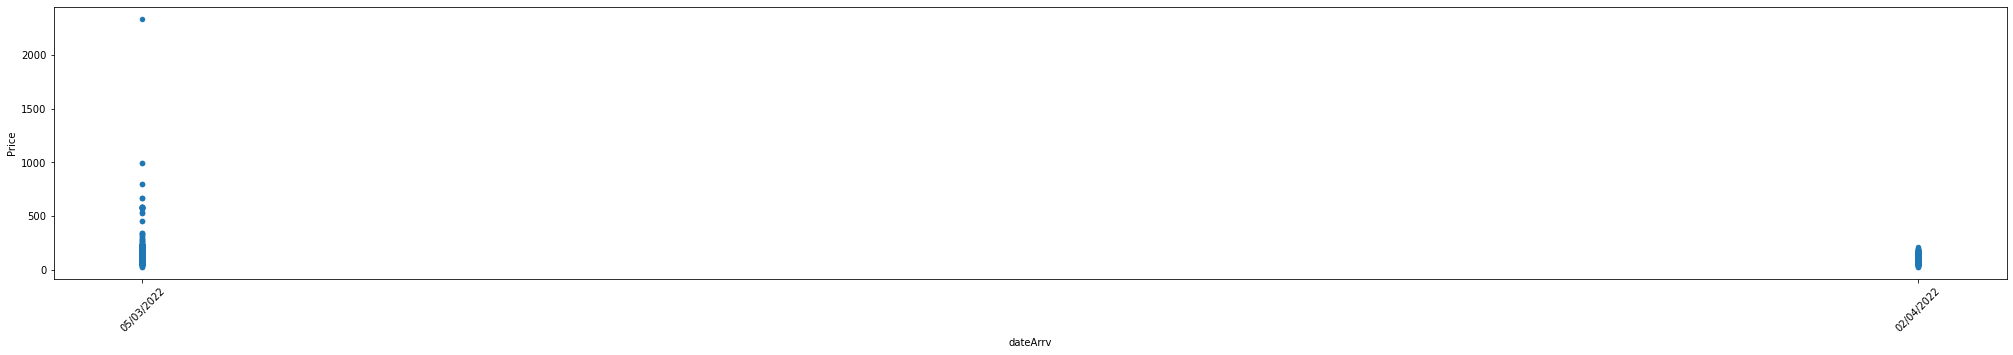

In [47]:
##plotting scatter plot for column Arrival date with regards target feature Price:
#sns.scatterplot(data=df, x=col, y="Price")
df.plot(kind ="scatter", x= "dateArrv", y = "Price", rot=45, figsize=(35,5))

As we said, the March Arrival date and departure date varies more on Price than the April dates prior to Holy week.

We now split the departure and arrivl dates to extract the ‘Date’, ‘Month’ and ‘Year’ values, and store them in new columns in our dataframe.

In [23]:
df.dateDept=df.dateDept.str.split('/')
df.dateArrv=df.dateArrv.str.split('/')

In [24]:
df.dateDept

0       [26, 02, 2022]
1       [26, 02, 2022]
2       [26, 02, 2022]
3       [26, 02, 2022]
4       [26, 02, 2022]
             ...      
1942    [26, 03, 2022]
1943    [26, 03, 2022]
1944    [26, 03, 2022]
1945    [26, 03, 2022]
1946    [26, 03, 2022]
Name: dateDept, Length: 4701, dtype: object

In [25]:
df.dateArrv

0       [05, 03, 2022]
1       [05, 03, 2022]
2       [05, 03, 2022]
3       [05, 03, 2022]
4       [05, 03, 2022]
             ...      
1942    [02, 04, 2022]
1943    [02, 04, 2022]
1944    [02, 04, 2022]
1945    [02, 04, 2022]
1946    [02, 04, 2022]
Name: dateArrv, Length: 4701, dtype: object

In [26]:
df['DeptDate']=df.dateDept.str[0]
df['DeptMonth']=df.dateDept.str[1]
df['DeptYear']=df.dateDept.str[2]

In [27]:
df['ArrDate']=df.dateArrv.str[0]
df['ArrMonth']=df.dateArrv.str[1]
df['ArrYear']=df.dateArrv.str[2]

In [28]:
#we will do the similar separation for Departure time, Arrial Time and Duration: separate hours and minutes.
df['Time_dept'] 

0        7:00
1        9:00
2       13:50
3        9:00
4        7:00
        ...  
1942     7:55
1943     7:00
1944     9:20
1945    12:25
1946    15:00
Name: Time_dept, Length: 4701, dtype: object

In [29]:
df

Airline Time_dept Time_arrival   Direct Duration  \
0        Vueling, Ryanair      7:00         8:50  directo   1h 50m   
1        Vueling, Ryanair      9:00        10:45  directo   1h 45m   
2                 Vueling     13:50        15:40  directo   1h 50m   
3                 Vueling      9:00        10:45  directo   1h 45m   
4                 Ryanair      7:00         8:50  directo   1h 50m   
...                   ...       ...          ...      ...      ...   
1942  Air France, Vueling      7:55         9:55  directo   2h 00m   
1943  Air France, easyJet      7:00         8:45  directo   1h 45m   
1944      Vueling, Iberia      9:20        11:30  directo   2h 10m   
1945  Air France, easyJet     12:25        14:05  directo   1h 40m   
1946   Air France, Iberia     15:00        17:00  directo   2h 00m   

                 CitiesDept           Cities_Arriv  Price        dateDept  \
0     BCN Barcelona-El Prat         ORY París-Orly     29  [26, 02, 2022]   
1        BVA Beauvais-Tillé  BCN Barcelona-El Prat     34  [26, 02, 2022]   
2     BCN Barcelona-El Prat         ORY París-Orly    136  [26, 02, 2022]   
3        BVA Beauvais-Tillé  BCN Barcelona-El Prat    136  [26, 02, 2022]   
4     BCN Barcelona-El Prat         ORY París-Orly    136  [26, 02, 2022]   
...                     ...                    ...    ...             ...   
1942  BCN Barcelona-El Prat  CDG Charles de Gaulle    136  [26, 03, 2022]   
1943  CDG Charles de Gaulle  BCN Barcelona-El Prat    136  [26, 03, 2022]   
1944  BCN Barcelona-El Prat  CDG Charles de Gaulle    164  [26, 03, 2022]   
1945         ORY París-Orly  BCN Barcelona-El Prat    166  [26, 03, 2022]   
1946  BCN Barcelona-El Prat  CDG Charles de Gaulle    165  [26, 03, 2022]   

            dateArrv DeptDate DeptMonth DeptYear ArrDate ArrMonth ArrYear  
0     [05, 03, 2022]       26        02     2022      05       03    2022  
1     [05, 03, 2022]       26        02     2022      05       03    2022  
2     [05, 03, 2022]       26        02     2022      05       03    2022  
3     [05, 03, 2022]       26        02     2022      05       03    2022  
4     [05, 03, 2022]       26        02     2022      05       03    2022  
...              ...      ...       ...      ...     ...      ...     ...  
1942  [02, 04, 2022]       26        03     2022      02       04    2022  
1943  [02, 04, 2022]       26        03     2022      02       04    2022  
1944  [02, 04, 2022]       26        03     2022      02       04    2022  
1945  [02, 04, 2022]       26        03     2022      02       04    2022  
1946  [02, 04, 2022]       26        03     2022      02       04    2022  

[4701 rows x 16 columns]

In [30]:
df['Time_dept'] =df.Time_dept.str.split(':') 

In [31]:
df['Dep_Time_Hour']=df.Time_dept.str[0]
df['Dep_Time_Mint']=df.Time_dept.str[1]
#df[['Dep_Time_Hour','Dep_Time_Mint']]

In [32]:
df

Airline Time_dept Time_arrival   Direct Duration  \
0        Vueling, Ryanair   [7, 00]         8:50  directo   1h 50m   
1        Vueling, Ryanair   [9, 00]        10:45  directo   1h 45m   
2                 Vueling  [13, 50]        15:40  directo   1h 50m   
3                 Vueling   [9, 00]        10:45  directo   1h 45m   
4                 Ryanair   [7, 00]         8:50  directo   1h 50m   
...                   ...       ...          ...      ...      ...   
1942  Air France, Vueling   [7, 55]         9:55  directo   2h 00m   
1943  Air France, easyJet   [7, 00]         8:45  directo   1h 45m   
1944      Vueling, Iberia   [9, 20]        11:30  directo   2h 10m   
1945  Air France, easyJet  [12, 25]        14:05  directo   1h 40m   
1946   Air France, Iberia  [15, 00]        17:00  directo   2h 00m   

                 CitiesDept           Cities_Arriv  Price        dateDept  \
0     BCN Barcelona-El Prat         ORY París-Orly     29  [26, 02, 2022]   
1        BVA Beauvais-Tillé  BCN Barcelona-El Prat     34  [26, 02, 2022]   
2     BCN Barcelona-El Prat         ORY París-Orly    136  [26, 02, 2022]   
3        BVA Beauvais-Tillé  BCN Barcelona-El Prat    136  [26, 02, 2022]   
4     BCN Barcelona-El Prat         ORY París-Orly    136  [26, 02, 2022]   
...                     ...                    ...    ...             ...   
1942  BCN Barcelona-El Prat  CDG Charles de Gaulle    136  [26, 03, 2022]   
1943  CDG Charles de Gaulle  BCN Barcelona-El Prat    136  [26, 03, 2022]   
1944  BCN Barcelona-El Prat  CDG Charles de Gaulle    164  [26, 03, 2022]   
1945         ORY París-Orly  BCN Barcelona-El Prat    166  [26, 03, 2022]   
1946  BCN Barcelona-El Prat  CDG Charles de Gaulle    165  [26, 03, 2022]   

            dateArrv DeptDate DeptMonth DeptYear ArrDate ArrMonth ArrYear  \
0     [05, 03, 2022]       26        02     2022      05       03    2022   
1     [05, 03, 2022]       26        02     2022      05       03    2022   
2     [05, 03, 2022]       26        02     2022      05       03    2022   
3     [05, 03, 2022]       26        02     2022      05       03    2022   
4     [05, 03, 2022]       26        02     2022      05       03    2022   
...              ...      ...       ...      ...     ...      ...     ...   
1942  [02, 04, 2022]       26        03     2022      02       04    2022   
1943  [02, 04, 2022]       26        03     2022      02       04    2022   
1944  [02, 04, 2022]       26        03     2022      02       04    2022   
1945  [02, 04, 2022]       26        03     2022      02       04    2022   
1946  [02, 04, 2022]       26        03     2022      02       04    2022   

     Dep_Time_Hour Dep_Time_Mint  
0                7            00  
1                9            00  
2               13            50  
3                9            00  
4                7            00  
...            ...           ...  
1942             7            55  
1943             7            00  
1944             9            20  
1945            12            25  
1946            15            00  

[4701 rows x 18 columns]

In [33]:
df['Time_arrival'] =df.Time_arrival.str.split(':')

In [34]:
df['Arrv_Time_Hour']=df.Time_arrival.str[0]
df['Arrv_Time_Mint']=df.Time_arrival.str[1]
#df[['Dep_Time_Hour','Dep_Time_Mint']]

In [35]:
df

Airline Time_dept Time_arrival   Direct Duration  \
0        Vueling, Ryanair   [7, 00]      [8, 50]  directo   1h 50m   
1        Vueling, Ryanair   [9, 00]     [10, 45]  directo   1h 45m   
2                 Vueling  [13, 50]     [15, 40]  directo   1h 50m   
3                 Vueling   [9, 00]     [10, 45]  directo   1h 45m   
4                 Ryanair   [7, 00]      [8, 50]  directo   1h 50m   
...                   ...       ...          ...      ...      ...   
1942  Air France, Vueling   [7, 55]      [9, 55]  directo   2h 00m   
1943  Air France, easyJet   [7, 00]      [8, 45]  directo   1h 45m   
1944      Vueling, Iberia   [9, 20]     [11, 30]  directo   2h 10m   
1945  Air France, easyJet  [12, 25]     [14, 05]  directo   1h 40m   
1946   Air France, Iberia  [15, 00]     [17, 00]  directo   2h 00m   

                 CitiesDept           Cities_Arriv  Price        dateDept  \
0     BCN Barcelona-El Prat         ORY París-Orly     29  [26, 02, 2022]   
1        BVA Beauvais-Tillé  BCN Barcelona-El Prat     34  [26, 02, 2022]   
2     BCN Barcelona-El Prat         ORY París-Orly    136  [26, 02, 2022]   
3        BVA Beauvais-Tillé  BCN Barcelona-El Prat    136  [26, 02, 2022]   
4     BCN Barcelona-El Prat         ORY París-Orly    136  [26, 02, 2022]   
...                     ...                    ...    ...             ...   
1942  BCN Barcelona-El Prat  CDG Charles de Gaulle    136  [26, 03, 2022]   
1943  CDG Charles de Gaulle  BCN Barcelona-El Prat    136  [26, 03, 2022]   
1944  BCN Barcelona-El Prat  CDG Charles de Gaulle    164  [26, 03, 2022]   
1945         ORY París-Orly  BCN Barcelona-El Prat    166  [26, 03, 2022]   
1946  BCN Barcelona-El Prat  CDG Charles de Gaulle    165  [26, 03, 2022]   

            dateArrv DeptDate DeptMonth DeptYear ArrDate ArrMonth ArrYear  \
0     [05, 03, 2022]       26        02     2022      05       03    2022   
1     [05, 03, 2022]       26        02     2022      05       03    2022   
2     [05, 03, 2022]       26        02     2022      05       03    2022   
3     [05, 03, 2022]       26        02     2022      05       03    2022   
4     [05, 03, 2022]       26        02     2022      05       03    2022   
...              ...      ...       ...      ...     ...      ...     ...   
1942  [02, 04, 2022]       26        03     2022      02       04    2022   
1943  [02, 04, 2022]       26        03     2022      02       04    2022   
1944  [02, 04, 2022]       26        03     2022      02       04    2022   
1945  [02, 04, 2022]       26        03     2022      02       04    2022   
1946  [02, 04, 2022]       26        03     2022      02       04    2022   

     Dep_Time_Hour Dep_Time_Mint Arrv_Time_Hour Arrv_Time_Mint  
0                7            00              8             50  
1                9            00             10             45  
2               13            50             15             40  
3                9            00             10             45  
4                7            00              8             50  
...            ...           ...            ...            ...  
1942             7            55              9             55  
1943             7            00              8             45  
1944             9            20             11             30  
1945            12            25             14             05  
1946            15            00             17             00  

[4701 rows x 20 columns]

In [36]:
df.Duration=df.Duration.str.split(' ')

In [37]:
df['Travel_hours']=df.Duration.str[0]
df['Travel_mints']=df.Duration.str[1]

In [38]:
df['Travel_hours']


0       1h
1       1h
2       1h
3       1h
4       1h
        ..
1942    2h
1943    1h
1944    2h
1945    1h
1946    2h
Name: Travel_hours, Length: 4701, dtype: object

In [39]:
df['Travel_hours']=df['Travel_hours'].str.split('h')
df['Travel_hours']=df['Travel_hours'].str[0]

In [40]:
df.Travel_hours=df.Travel_hours

In [41]:
df['Travel_hours']

0       1
1       1
2       1
3       1
4       1
       ..
1942    2
1943    1
1944    2
1945    1
1946    2
Name: Travel_hours, Length: 4701, dtype: object

In [42]:
df['Travel_mints']=df.Duration.str[1]
df['Travel_mints']

0       50m
1       45m
2       50m
3       45m
4       50m
       ... 
1942    00m
1943    45m
1944    10m
1945    40m
1946    00m
Name: Travel_mints, Length: 4701, dtype: object

In [43]:
df['Travel_mints']=df['Travel_mints'].str.split('m')
df['Travel_mints']=df['Travel_mints'].str[0]

In [44]:
df['Travel_mints']

0       50
1       45
2       50
3       45
4       50
        ..
1942    00
1943    45
1944    10
1945    40
1946    00
Name: Travel_mints, Length: 4701, dtype: object

In [45]:
#we will now convert travel hours which is duration hours into travel (duration) minuts:
df['Travel_hours']=pd.to_numeric(df['Travel_hours'])
df['Travel_mints']=pd.to_numeric(df['Travel_mints'])
df['Travel_mints']=df['Travel_mints'].replace(np.NaN,0)
df['Travel_mints']=df['Travel_mints'].astype('int64')
df['Duration_in_minutes']=df['Travel_hours']*60+df['Travel_mints']

In [49]:
df

Airline Time_dept Time_arrival   Direct   Duration  \
0        Vueling, Ryanair   [7, 00]      [8, 50]  directo  [1h, 50m]   
1        Vueling, Ryanair   [9, 00]     [10, 45]  directo  [1h, 45m]   
2                 Vueling  [13, 50]     [15, 40]  directo  [1h, 50m]   
3                 Vueling   [9, 00]     [10, 45]  directo  [1h, 45m]   
4                 Ryanair   [7, 00]      [8, 50]  directo  [1h, 50m]   
...                   ...       ...          ...      ...        ...   
1942  Air France, Vueling   [7, 55]      [9, 55]  directo  [2h, 00m]   
1943  Air France, easyJet   [7, 00]      [8, 45]  directo  [1h, 45m]   
1944      Vueling, Iberia   [9, 20]     [11, 30]  directo  [2h, 10m]   
1945  Air France, easyJet  [12, 25]     [14, 05]  directo  [1h, 40m]   
1946   Air France, Iberia  [15, 00]     [17, 00]  directo  [2h, 00m]   

                 CitiesDept           Cities_Arriv  Price        dateDept  \
0     BCN Barcelona-El Prat         ORY París-Orly     29  [26, 02, 2022]   
1        BVA Beauvais-Tillé  BCN Barcelona-El Prat     34  [26, 02, 2022]   
2     BCN Barcelona-El Prat         ORY París-Orly    136  [26, 02, 2022]   
3        BVA Beauvais-Tillé  BCN Barcelona-El Prat    136  [26, 02, 2022]   
4     BCN Barcelona-El Prat         ORY París-Orly    136  [26, 02, 2022]   
...                     ...                    ...    ...             ...   
1942  BCN Barcelona-El Prat  CDG Charles de Gaulle    136  [26, 03, 2022]   
1943  CDG Charles de Gaulle  BCN Barcelona-El Prat    136  [26, 03, 2022]   
1944  BCN Barcelona-El Prat  CDG Charles de Gaulle    164  [26, 03, 2022]   
1945         ORY París-Orly  BCN Barcelona-El Prat    166  [26, 03, 2022]   
1946  BCN Barcelona-El Prat  CDG Charles de Gaulle    165  [26, 03, 2022]   

            dateArrv  ... ArrDate ArrMonth ArrYear Dep_Time_Hour  \
0     [05, 03, 2022]  ...      05       03    2022             7   
1     [05, 03, 2022]  ...      05       03    2022             9   
2     [05, 03, 2022]  ...      05       03    2022            13   
3     [05, 03, 2022]  ...      05       03    2022             9   
4     [05, 03, 2022]  ...      05       03    2022             7   
...              ...  ...     ...      ...     ...           ...   
1942  [02, 04, 2022]  ...      02       04    2022             7   
1943  [02, 04, 2022]  ...      02       04    2022             7   
1944  [02, 04, 2022]  ...      02       04    2022             9   
1945  [02, 04, 2022]  ...      02       04    2022            12   
1946  [02, 04, 2022]  ...      02       04    2022            15   

     Dep_Time_Mint Arrv_Time_Hour Arrv_Time_Mint Travel_hours Travel_mints  \
0               00              8             50            1           50   
1               00             10             45            1           45   
2               50             15             40            1           50   
3               00             10             45            1           45   
4               00              8             50            1           50   
...            ...            ...            ...          ...          ...   
1942            55              9             55            2            0   
1943            00              8             45            1           45   
1944            20             11             30            2           10   
1945            25             14             05            1           40   
1946            00             17             00            2            0   

     Duration_in_minutes  
0                    110  
1                    105  
2                    110  
3                    105  
4                    110  
...                  ...  
1942                 120  
1943                 105  
1944                 130  
1945                 100  
1946                 120  

[4701 rows x 23 columns]

In [49]:
colsnotlist=['Airline', 'Direct', 
       'CitiesDept', 'Cities_Arriv', 'Price', 
       'DeptDate', 'DeptMonth', 'DeptYear', 'ArrDate', 'ArrMonth', 'ArrYear',
       'Dep_Time_Hour', 'Dep_Time_Mint', 'Arrv_Time_Hour', 'Arrv_Time_Mint',
       'Travel_hours', 'Travel_mints'] #creating list including columns which are not list by itself

Vueling                         672
Vueling, Air France             473
Iberia                          320
Ryanair, Vueling                275
Air France                      274
easyJet                         219
Vueling, easyJet                213
Vueling, Ryanair                201
Vueling, Iberia                 187
Vueling, Transavia France       166
Iberia, Vueling                 159
Transavia France, Vueling       133
Iberia, easyJet                 108
Ryanair                         107
Air France, Vueling              95
easyJet, Vueling                 82
Ryanair, easyJet                 80
Transavia France, Iberia         80
Ryanair, Iberia                  80
easyJet, Air France              70
easyJet, Ryanair                 66
Transavia France, easyJet        66
easyJet, Iberia                  56
Iberia, Ryanair                  54
Air France, easyJet              53
Varias aerolíneas                40
easyJet, Transavia France        40
Vueling, Air Europa         

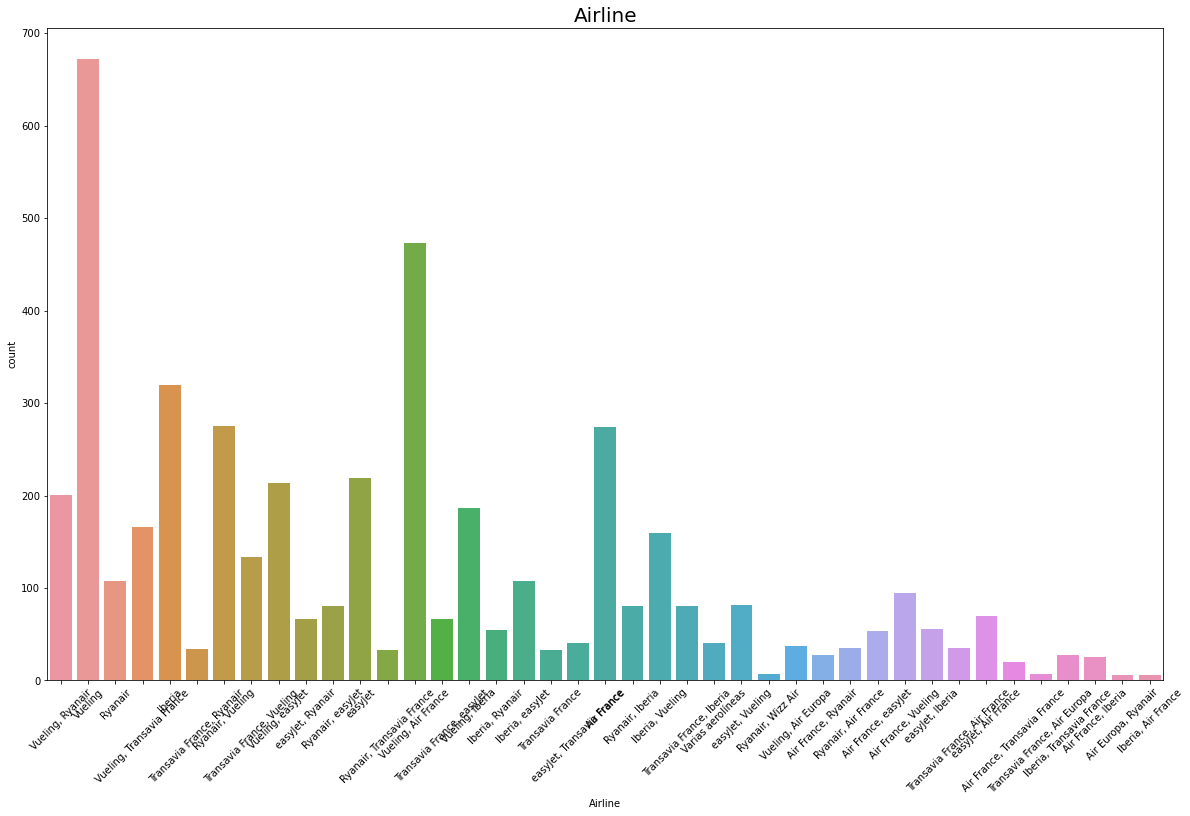

directo     4543
1 escala     158
Name: Direct, dtype: int64


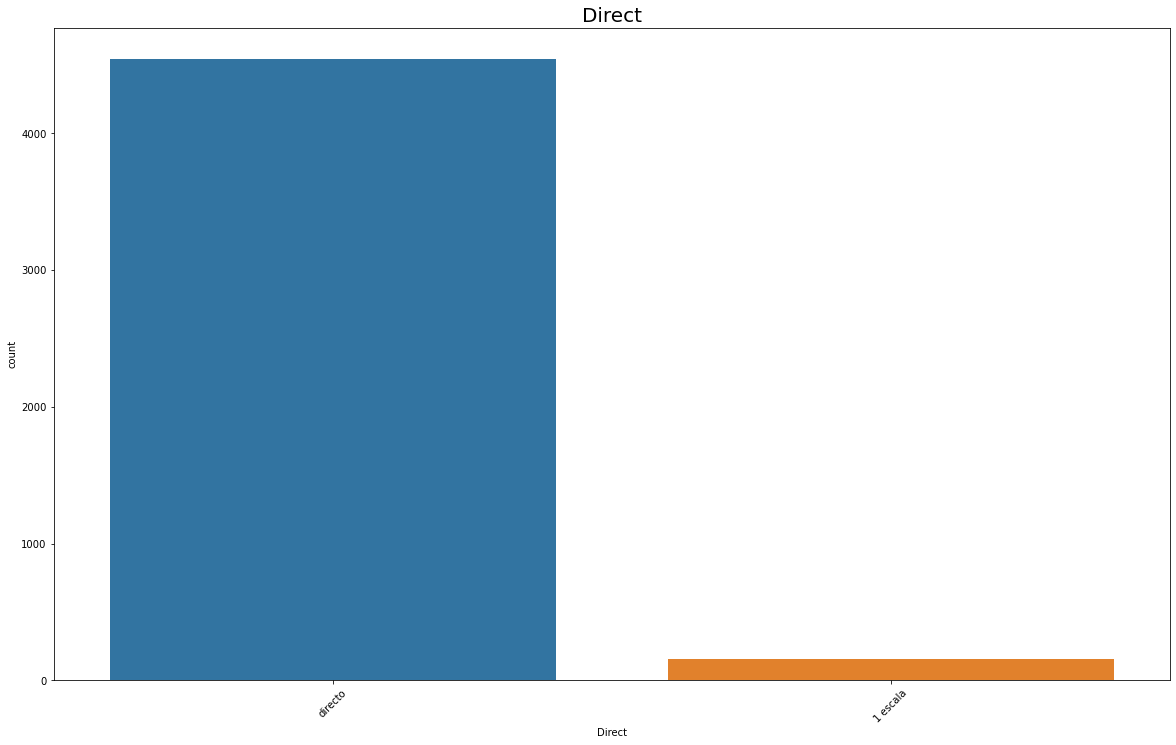

BCN Barcelona-El Prat    2351
CDG Charles de Gaulle    1101
ORY París-Orly            987
BVA Beauvais-Tillé        262
Name: CitiesDept, dtype: int64


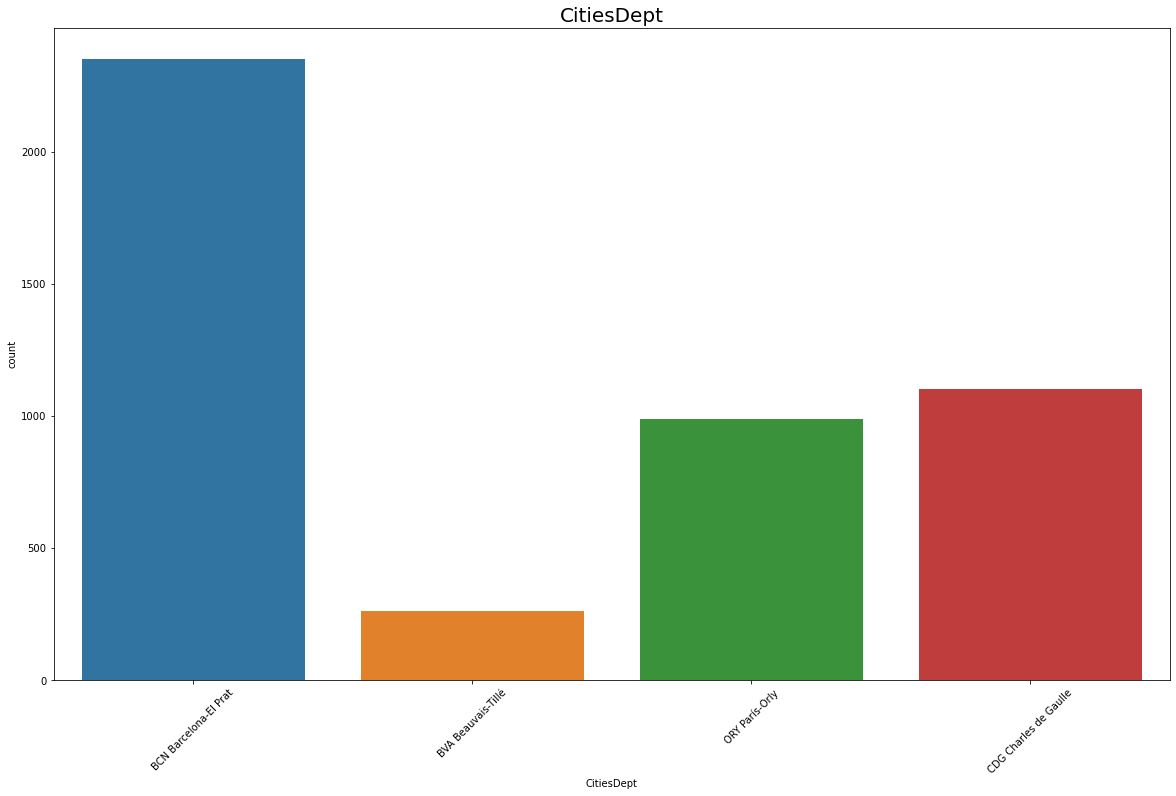

BCN Barcelona-El Prat    2350
ORY París-Orly           1462
CDG Charles de Gaulle     641
BVA Beauvais-Tillé        248
Name: Cities_Arriv, dtype: int64


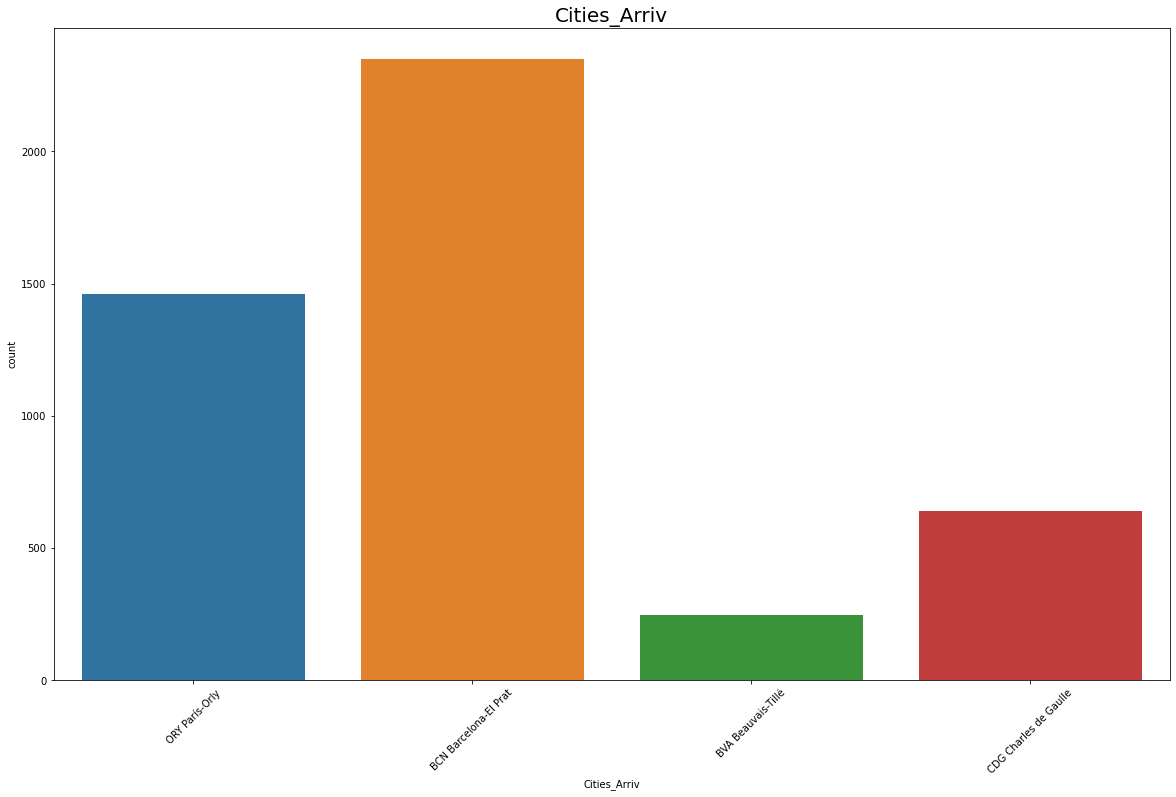

136    2704
146      56
101      45
125      45
107      34
       ... 
274       1
278       1
282       1
286       1
296       1
Name: Price, Length: 215, dtype: int64


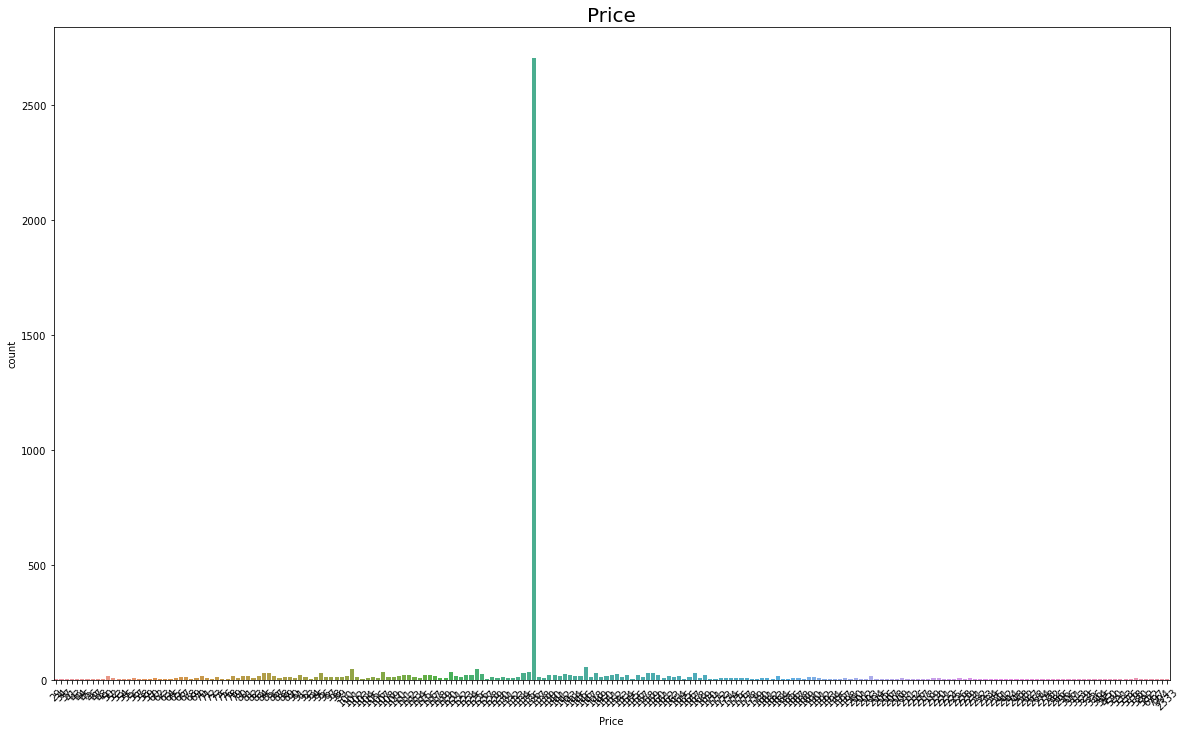

26    4701
Name: DeptDate, dtype: int64


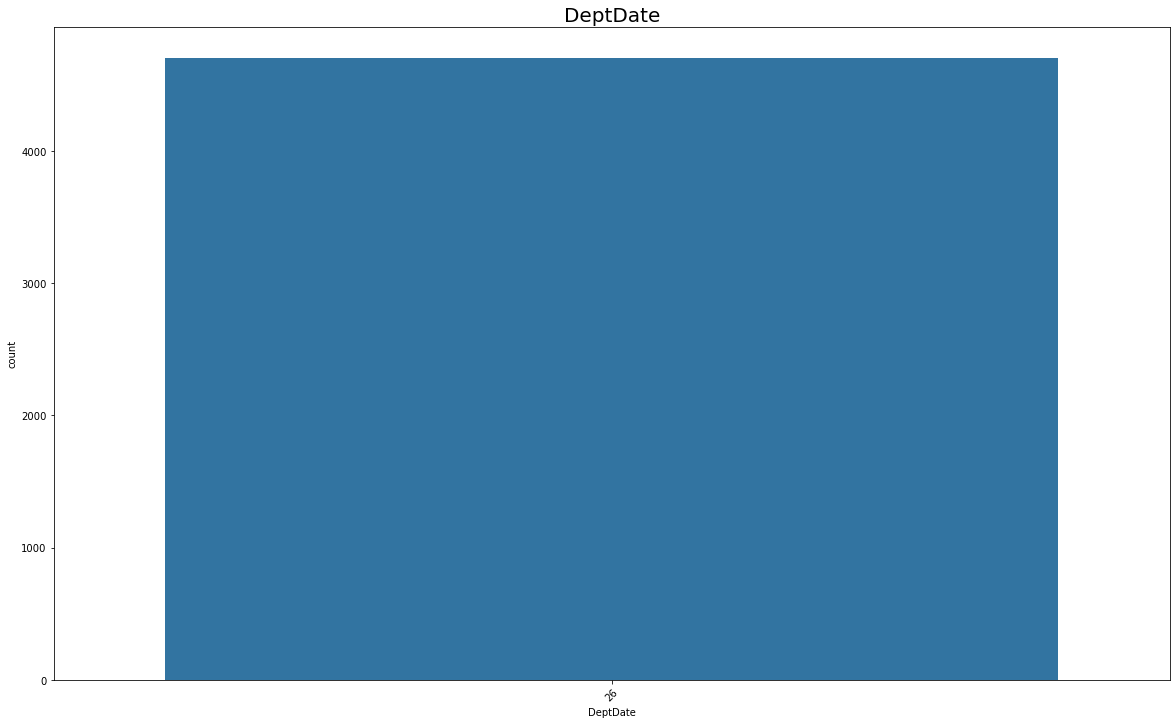

02    2754
03    1947
Name: DeptMonth, dtype: int64


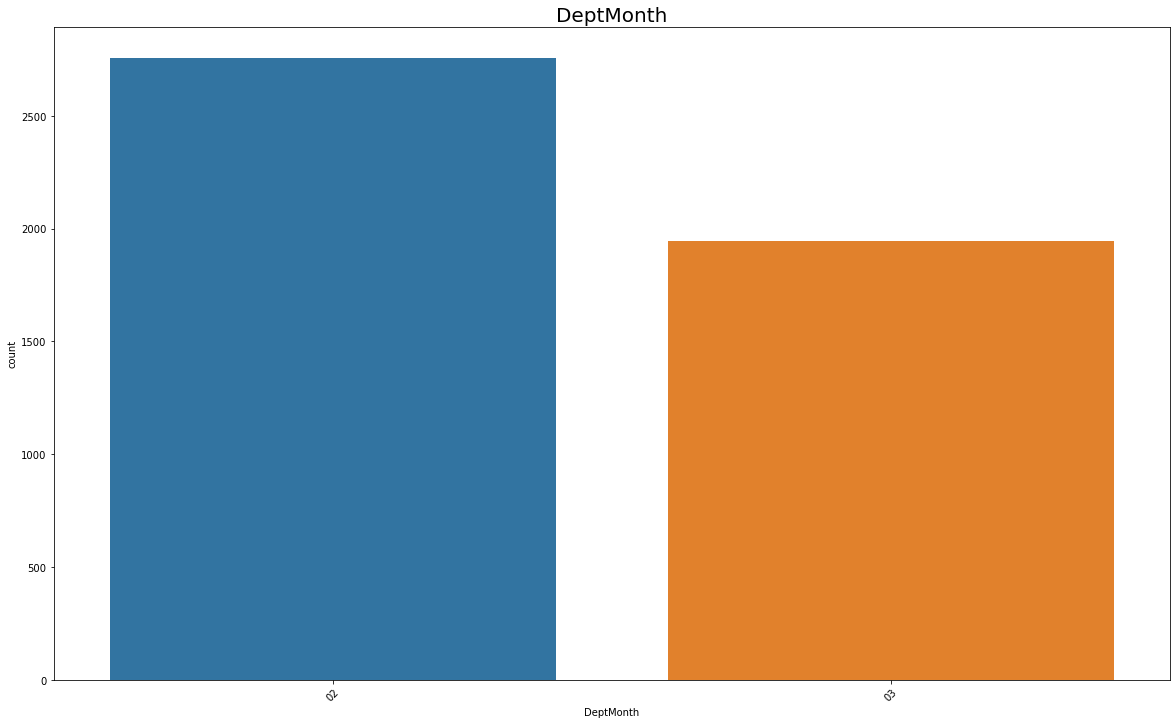

2022    4701
Name: DeptYear, dtype: int64


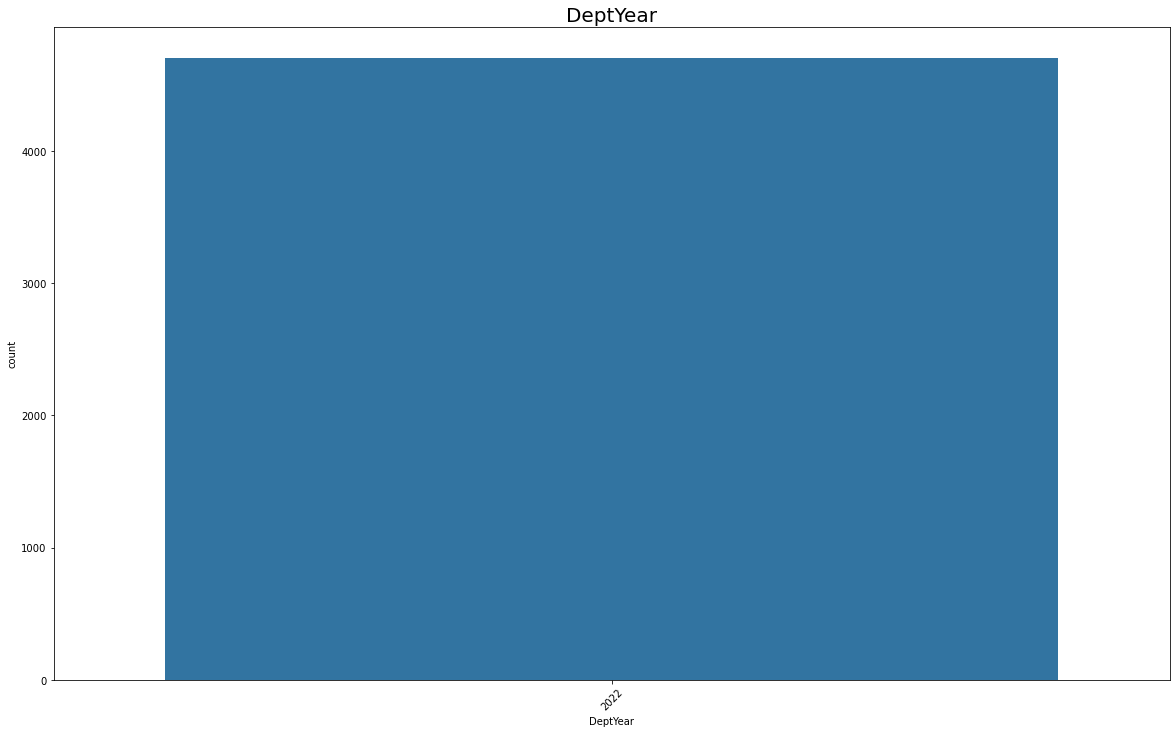

05    2754
02    1947
Name: ArrDate, dtype: int64


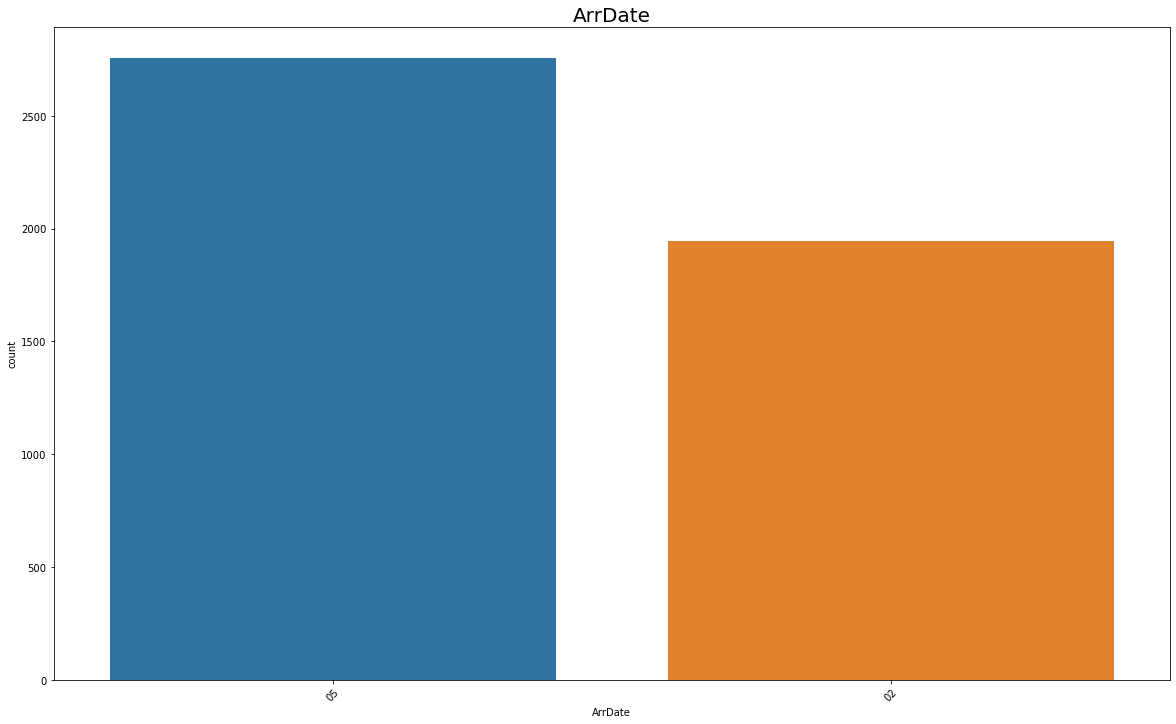

03    2754
04    1947
Name: ArrMonth, dtype: int64


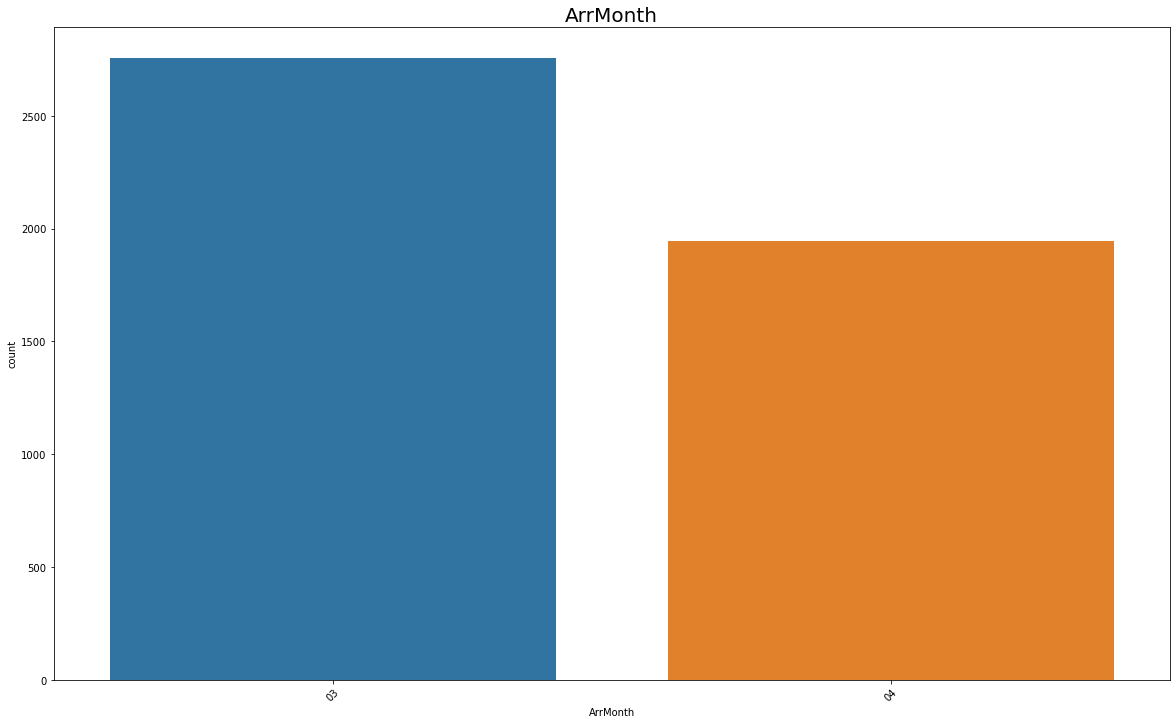

2022    4701
Name: ArrYear, dtype: int64


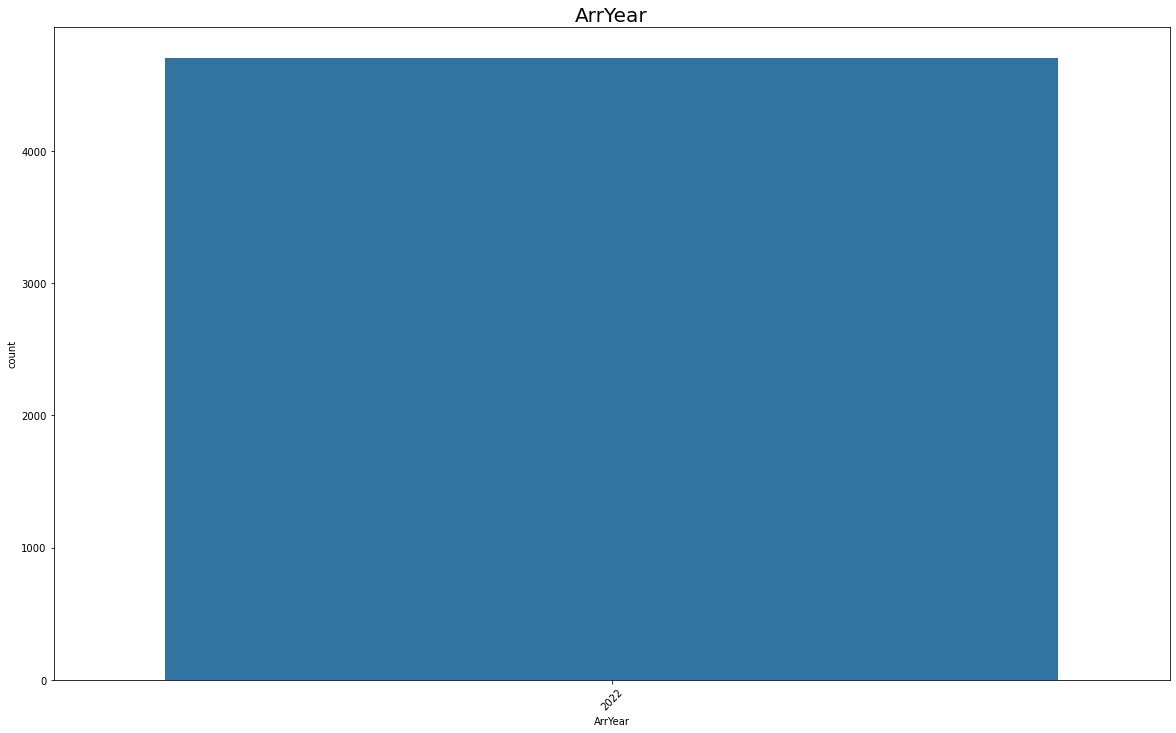

7     809
9     695
12    568
13    524
15    435
20    398
11    315
17    271
6     241
18    211
14    144
21     56
16     21
10      7
8       6
Name: Dep_Time_Hour, dtype: int64


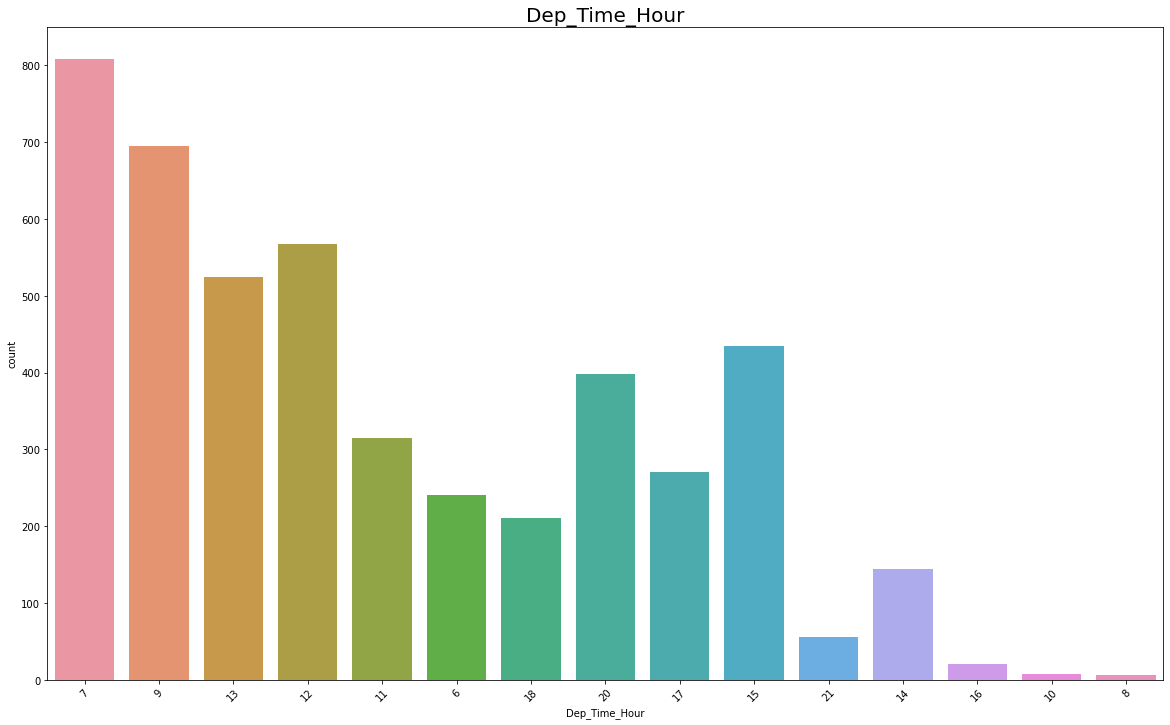

00    931
50    691
35    640
45    471
25    461
20    409
05    267
30    258
15    200
55    189
10    180
40      4
Name: Dep_Time_Mint, dtype: int64


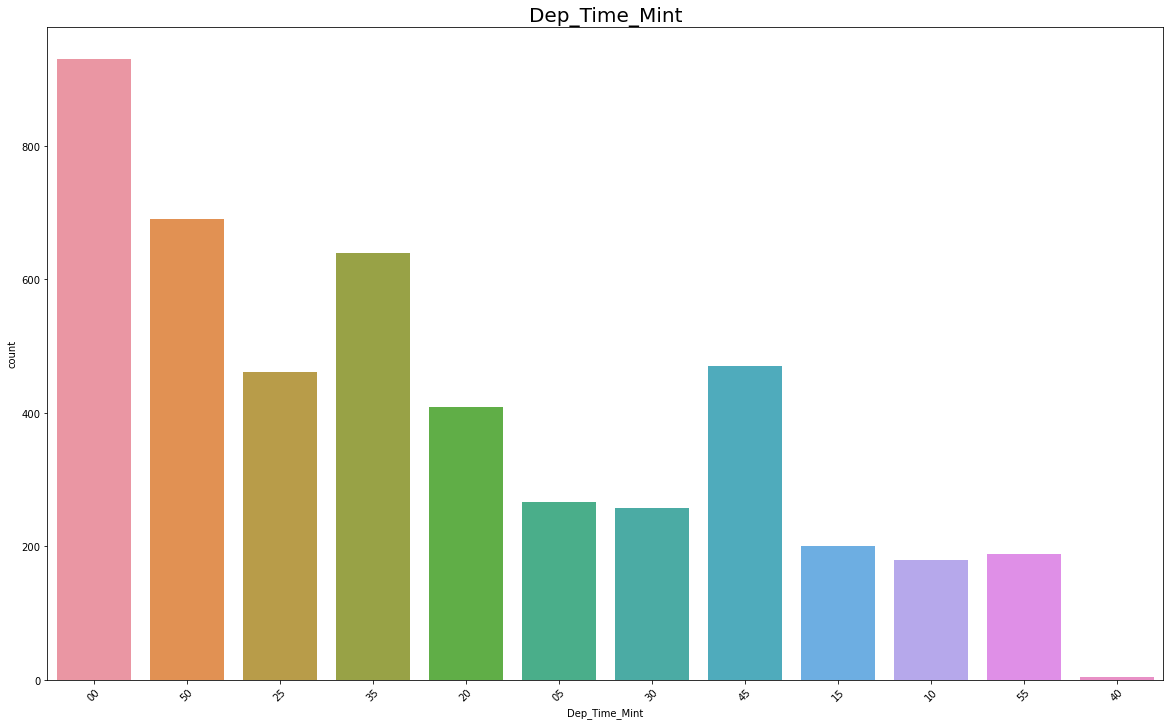

8     873
15    524
14    479
11    440
21    403
17    402
13    300
22    283
19    271
20    257
10    250
9     174
18     21
23     17
16      7
Name: Arrv_Time_Hour, dtype: int64


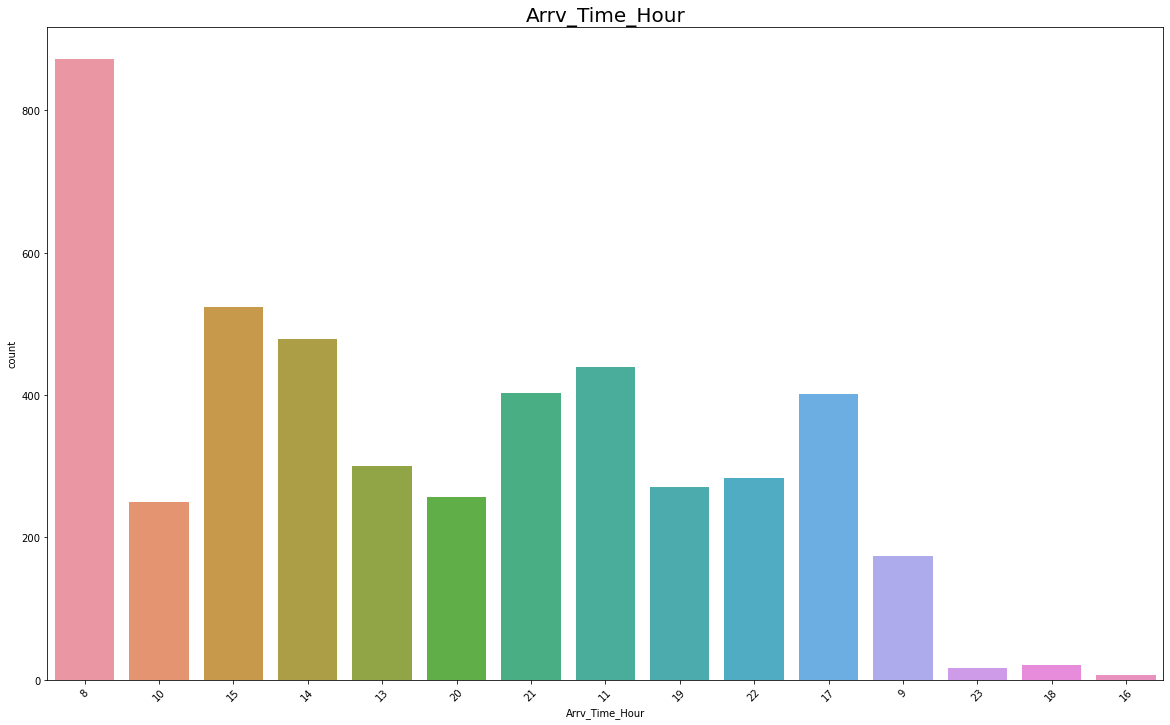

45    828
25    610
35    508
05    443
40    397
55    374
50    366
10    361
00    319
15    191
20    174
30    130
Name: Arrv_Time_Mint, dtype: int64


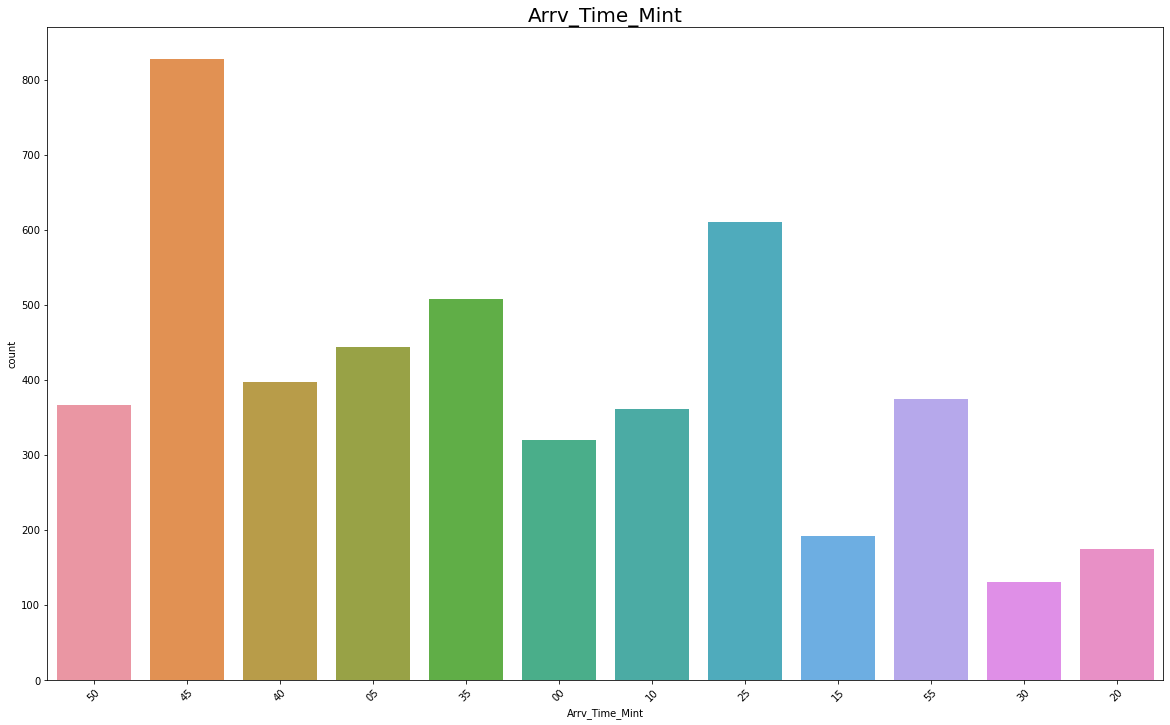

1    3336
2    1025
6     133
8      97
7      85
4      15
5      10
Name: Travel_hours, dtype: int64


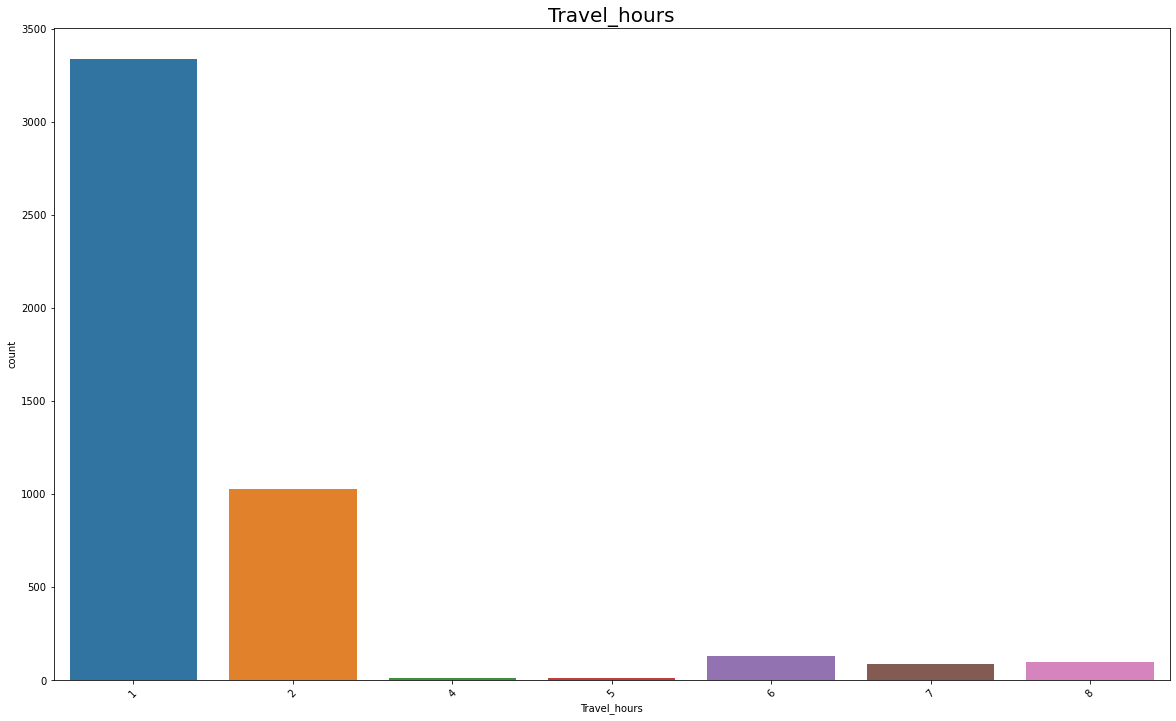

40    1207
50    1179
45    1033
0      892
10     179
35     101
55      50
5       47
25       7
15       6
Name: Travel_mints, dtype: int64


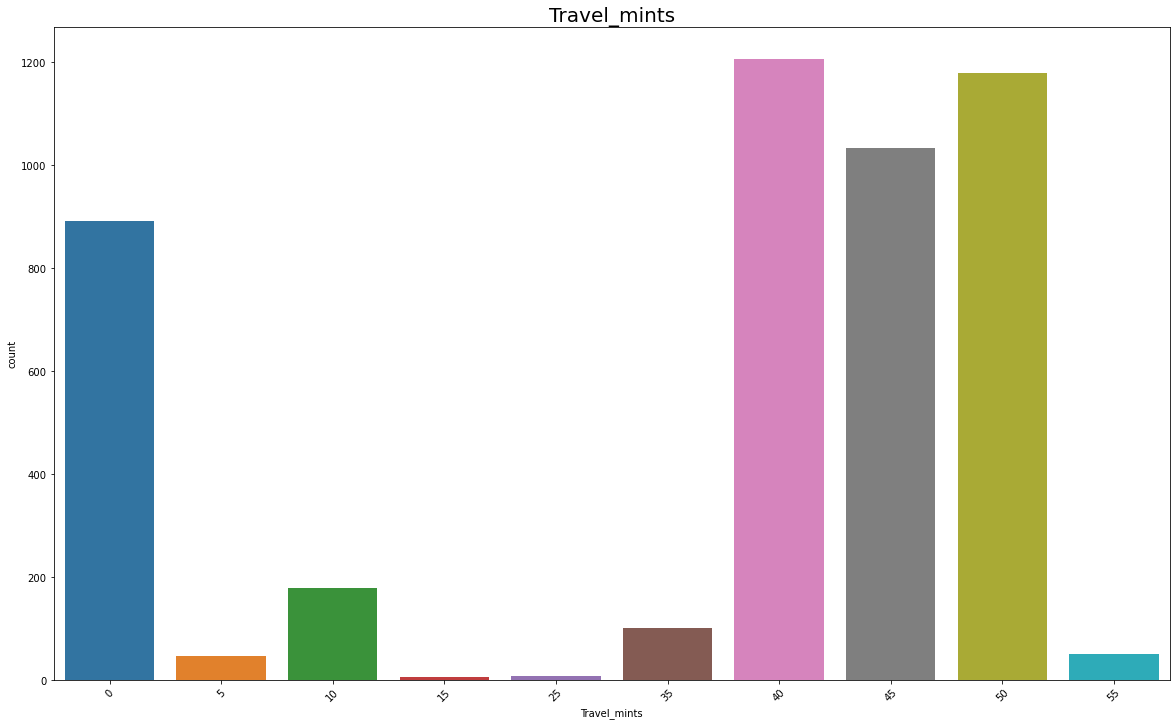

In [50]:
#checking value counts for columns which are not list by itself:
for col in colsnotlist:
    print(df[col].value_counts())
    plt.figure(figsize=(20,12))
    sns.countplot(x=col,data=df)
    plt.title(label=col, fontsize=20)
    plt.xticks(rotation=45)
    plt.show()  

In the above barplots, we can see the following highlights:
    
    - The airline with most flights offers is Vueling which top the list with 672 flights. Then, in second place, we have combo Vueling and Air France which offers 473 flights. Then, in third place, we have Iberia with 320 flights. And the flights combo Iberia and Air France or even Air Europa with combination Ryanair or even Transavia and Air Europa are the  combos which have the lowest number of flights to offer.
    - Regarding the direct flights, we have around 96,63% (4543) of the flights are direct flights and only 158 flights are fflights which have 1 stay in between flights.
    - Barcelona airport is the airport where most airlines departs. And BVA Beauvais-Tille is the airport where less flights departs.
    - Same happens with arrivals. Barcelona gets the most of the arrivals and BVA Beauvais-Tille gets the lowest numbers of arrivals.
    - Regarding Price, we have range from 1 to 2704 euros.
    - Departure day, we only have 1 day, which is 26th.
    - Arrival day, we have 2 days, 5th and 2nd.
    - Departure and Arrival month, we have 2 months, March and April.
    - Departure and Arrival Year, only one, 2022.
    - regarding Departure Time Hours, we have range from 7am which has around 809 flights offer to 8h which has only 6 offers. We also have nights flights like 21h which has 56 flights.
    - regarding Departure Time Minutes, 00 minutes has the highest number of flights and 40minutes has the lowest number of flights.
    - regarding Arrival Time Hours, we have range from 8am which has around 873 flights offer to 16h which has only 7 offers. We also have nights flights arrivals like 23h which has 17 flights.
    - regarding Arrival Time Minutes, 45 minutes has the highest number of flights and 30 minutes has the lowest number of flights.  
    - mostly travel hours are between 1 to 2 hours and travel minutes are from 40 to 50 minutes.
    
    

In [51]:
#checking the nulls values:
df.isnull().sum()

Airline                0
Time_dept              0
Time_arrival           0
Direct                 0
Duration               0
CitiesDept             0
Cities_Arriv           0
Price                  0
dateDept               0
dateArrv               0
DeptDate               0
DeptMonth              0
DeptYear               0
ArrDate                0
ArrMonth               0
ArrYear                0
Dep_Time_Hour          0
Dep_Time_Mint          0
Arrv_Time_Hour         0
Arrv_Time_Mint         0
Travel_hours           0
Travel_mints           0
Duration_in_minutes    0
dtype: int64

No more nulls values! good!

In [52]:
df.dtypes #remembering the datatypes:

Airline                object
Time_dept              object
Time_arrival           object
Direct                 object
Duration               object
CitiesDept             object
Cities_Arriv           object
Price                   int64
dateDept               object
dateArrv               object
DeptDate               object
DeptMonth              object
DeptYear               object
ArrDate                object
ArrMonth               object
ArrYear                object
Dep_Time_Hour          object
Dep_Time_Mint          object
Arrv_Time_Hour         object
Arrv_Time_Mint         object
Travel_hours            int64
Travel_mints            int64
Duration_in_minutes     int64
dtype: object

In [53]:
#checking literally all columns:
pd.set_option('display.max_columns', None)
df.head()

Airline Time_dept Time_arrival   Direct   Duration  \
0  Vueling, Ryanair   [7, 00]      [8, 50]  directo  [1h, 50m]   
1  Vueling, Ryanair   [9, 00]     [10, 45]  directo  [1h, 45m]   
2           Vueling  [13, 50]     [15, 40]  directo  [1h, 50m]   
3           Vueling   [9, 00]     [10, 45]  directo  [1h, 45m]   
4           Ryanair   [7, 00]      [8, 50]  directo  [1h, 50m]   

              CitiesDept           Cities_Arriv  Price        dateDept  \
0  BCN Barcelona-El Prat         ORY París-Orly     29  [26, 02, 2022]   
1     BVA Beauvais-Tillé  BCN Barcelona-El Prat     34  [26, 02, 2022]   
2  BCN Barcelona-El Prat         ORY París-Orly    136  [26, 02, 2022]   
3     BVA Beauvais-Tillé  BCN Barcelona-El Prat    136  [26, 02, 2022]   
4  BCN Barcelona-El Prat         ORY París-Orly    136  [26, 02, 2022]   

         dateArrv DeptDate DeptMonth DeptYear ArrDate ArrMonth ArrYear  \
0  [05, 03, 2022]       26        02     2022      05       03    2022   
1  [05, 03, 2022]       26        02     2022      05       03    2022   
2  [05, 03, 2022]       26        02     2022      05       03    2022   
3  [05, 03, 2022]       26        02     2022      05       03    2022   
4  [05, 03, 2022]       26        02     2022      05       03    2022   

  Dep_Time_Hour Dep_Time_Mint Arrv_Time_Hour Arrv_Time_Mint  Travel_hours  \
0             7            00              8             50             1   
1             9            00             10             45             1   
2            13            50             15             40             1   
3             9            00             10             45             1   
4             7            00              8             50             1   

   Travel_mints  Duration_in_minutes  
0            50                  110  
1            45                  105  
2            50                  110  
3            45                  105  
4            50                  110

In [77]:
#separating the columns by categorical or numerical features:
categorical_data=['Airline','Direct','Time_dept','Time_arrival','CitiesDept', 'Cities_Arriv','dateDept','dateArrv','DeptDate', 'DeptMonth', 'DeptYear','Dep_Time_Hour','Dep_Time_Mint','ArrDate','ArrMonth','ArrYear','Arrv_Time_Hour','Arrv_Time_Mint']  
    
numerical=['Duration','Price', 'Travel_hours', 'Travel_mints']

<Figure size 1440x1296 with 0 Axes>

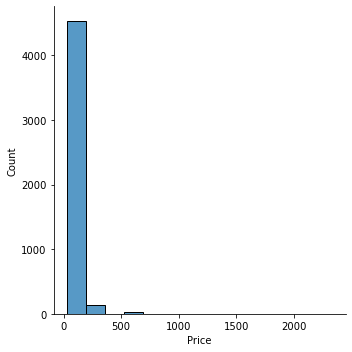

In [78]:
#ploting the Price
plt.figure(figsize=(20,18))
sns.displot(df.Price)

We see a right skewed distribution. Mostly between 0 and 600.

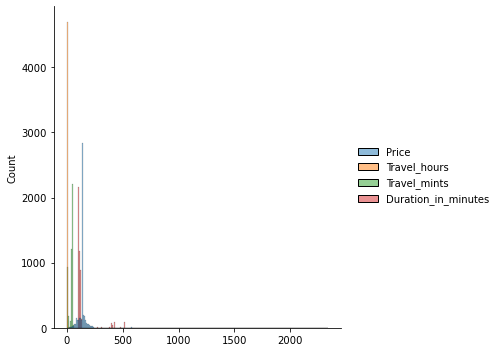

In [79]:
sns.displot(df)#trying to displot all columns numerical columns at once:

So, yes, we have right skewed price data. 

In [80]:
#checking the cases where the price is more than 600 euros:
df[df.Price>=600]

Airline Time_dept Time_arrival   Direct   Duration  \
2681           Transavia France  [12, 25]     [14, 05]  directo  [1h, 40m]   
2707                     Iberia  [12, 25]     [14, 05]  directo  [1h, 40m]   
2708            Iberia, Vueling  [14, 10]     [21, 20]  directo  [7h, 10m]   
2709   Transavia France, Iberia  [18, 20]     [20, 00]  directo  [1h, 40m]   
2710  Vueling, Transavia France   [7, 00]      [8, 50]  directo  [1h, 50m]   
2711            Ryanair, Iberia  [16, 30]     [23, 25]  directo  [6h, 55m]   
2712                     Iberia  [12, 45]     [21, 20]  directo  [8h, 35m]   
2753           Vueling, easyJet   [9, 30]     [11, 10]  directo  [1h, 40m]   

                 CitiesDept           Cities_Arriv  Price        dateDept  \
2681         ORY París-Orly  BCN Barcelona-El Prat    672  [26, 02, 2022]   
2707         ORY París-Orly  BCN Barcelona-El Prat    672  [26, 02, 2022]   
2708  BCN Barcelona-El Prat         ORY París-Orly    672  [26, 02, 2022]   
2709         ORY París-Orly  BCN Barcelona-El Prat    797  [26, 02, 2022]   
2710  BCN Barcelona-El Prat         ORY París-Orly    797  [26, 02, 2022]   
2711         ORY París-Orly  BCN Barcelona-El Prat    994  [26, 02, 2022]   
2712  BCN Barcelona-El Prat         ORY París-Orly    994  [26, 02, 2022]   
2753         ORY París-Orly  BCN Barcelona-El Prat   2333  [26, 02, 2022]   

            dateArrv DeptDate DeptMonth DeptYear ArrDate ArrMonth ArrYear  \
2681  [05, 03, 2022]       26        02     2022      05       03    2022   
2707  [05, 03, 2022]       26        02     2022      05       03    2022   
2708  [05, 03, 2022]       26        02     2022      05       03    2022   
2709  [05, 03, 2022]       26        02     2022      05       03    2022   
2710  [05, 03, 2022]       26        02     2022      05       03    2022   
2711  [05, 03, 2022]       26        02     2022      05       03    2022   
2712  [05, 03, 2022]       26        02     2022      05       03    2022   
2753  [05, 03, 2022]       26        02     2022      05       03    2022   

     Dep_Time_Hour Dep_Time_Mint Arrv_Time_Hour Arrv_Time_Mint  Travel_hours  \
2681            12            25             14             05             1   
2707            12            25             14             05             1   
2708            14            10             21             20             7   
2709            18            20             20             00             1   
2710             7            00              8             50             1   
2711            16            30             23             25             6   
2712            12            45             21             20             8   
2753             9            30             11             10             1   

      Travel_mints  Duration_in_minutes  
2681            40                  100  
2707            40                  100  
2708            10                  430  
2709            40                  100  
2710            50                  110  
2711            55                  415  
2712            35                  515  
2753            40                  100

We can check above and conclude that:
- we have 8 cases of flights being more than 600 euros.
- For majority of the cases we have the same airpots -BCN to ORLY or ORLY to BCN.
- As expected, we have all kind of airline companies.
- All of these flights take flight in February, interesting!! very interesting!

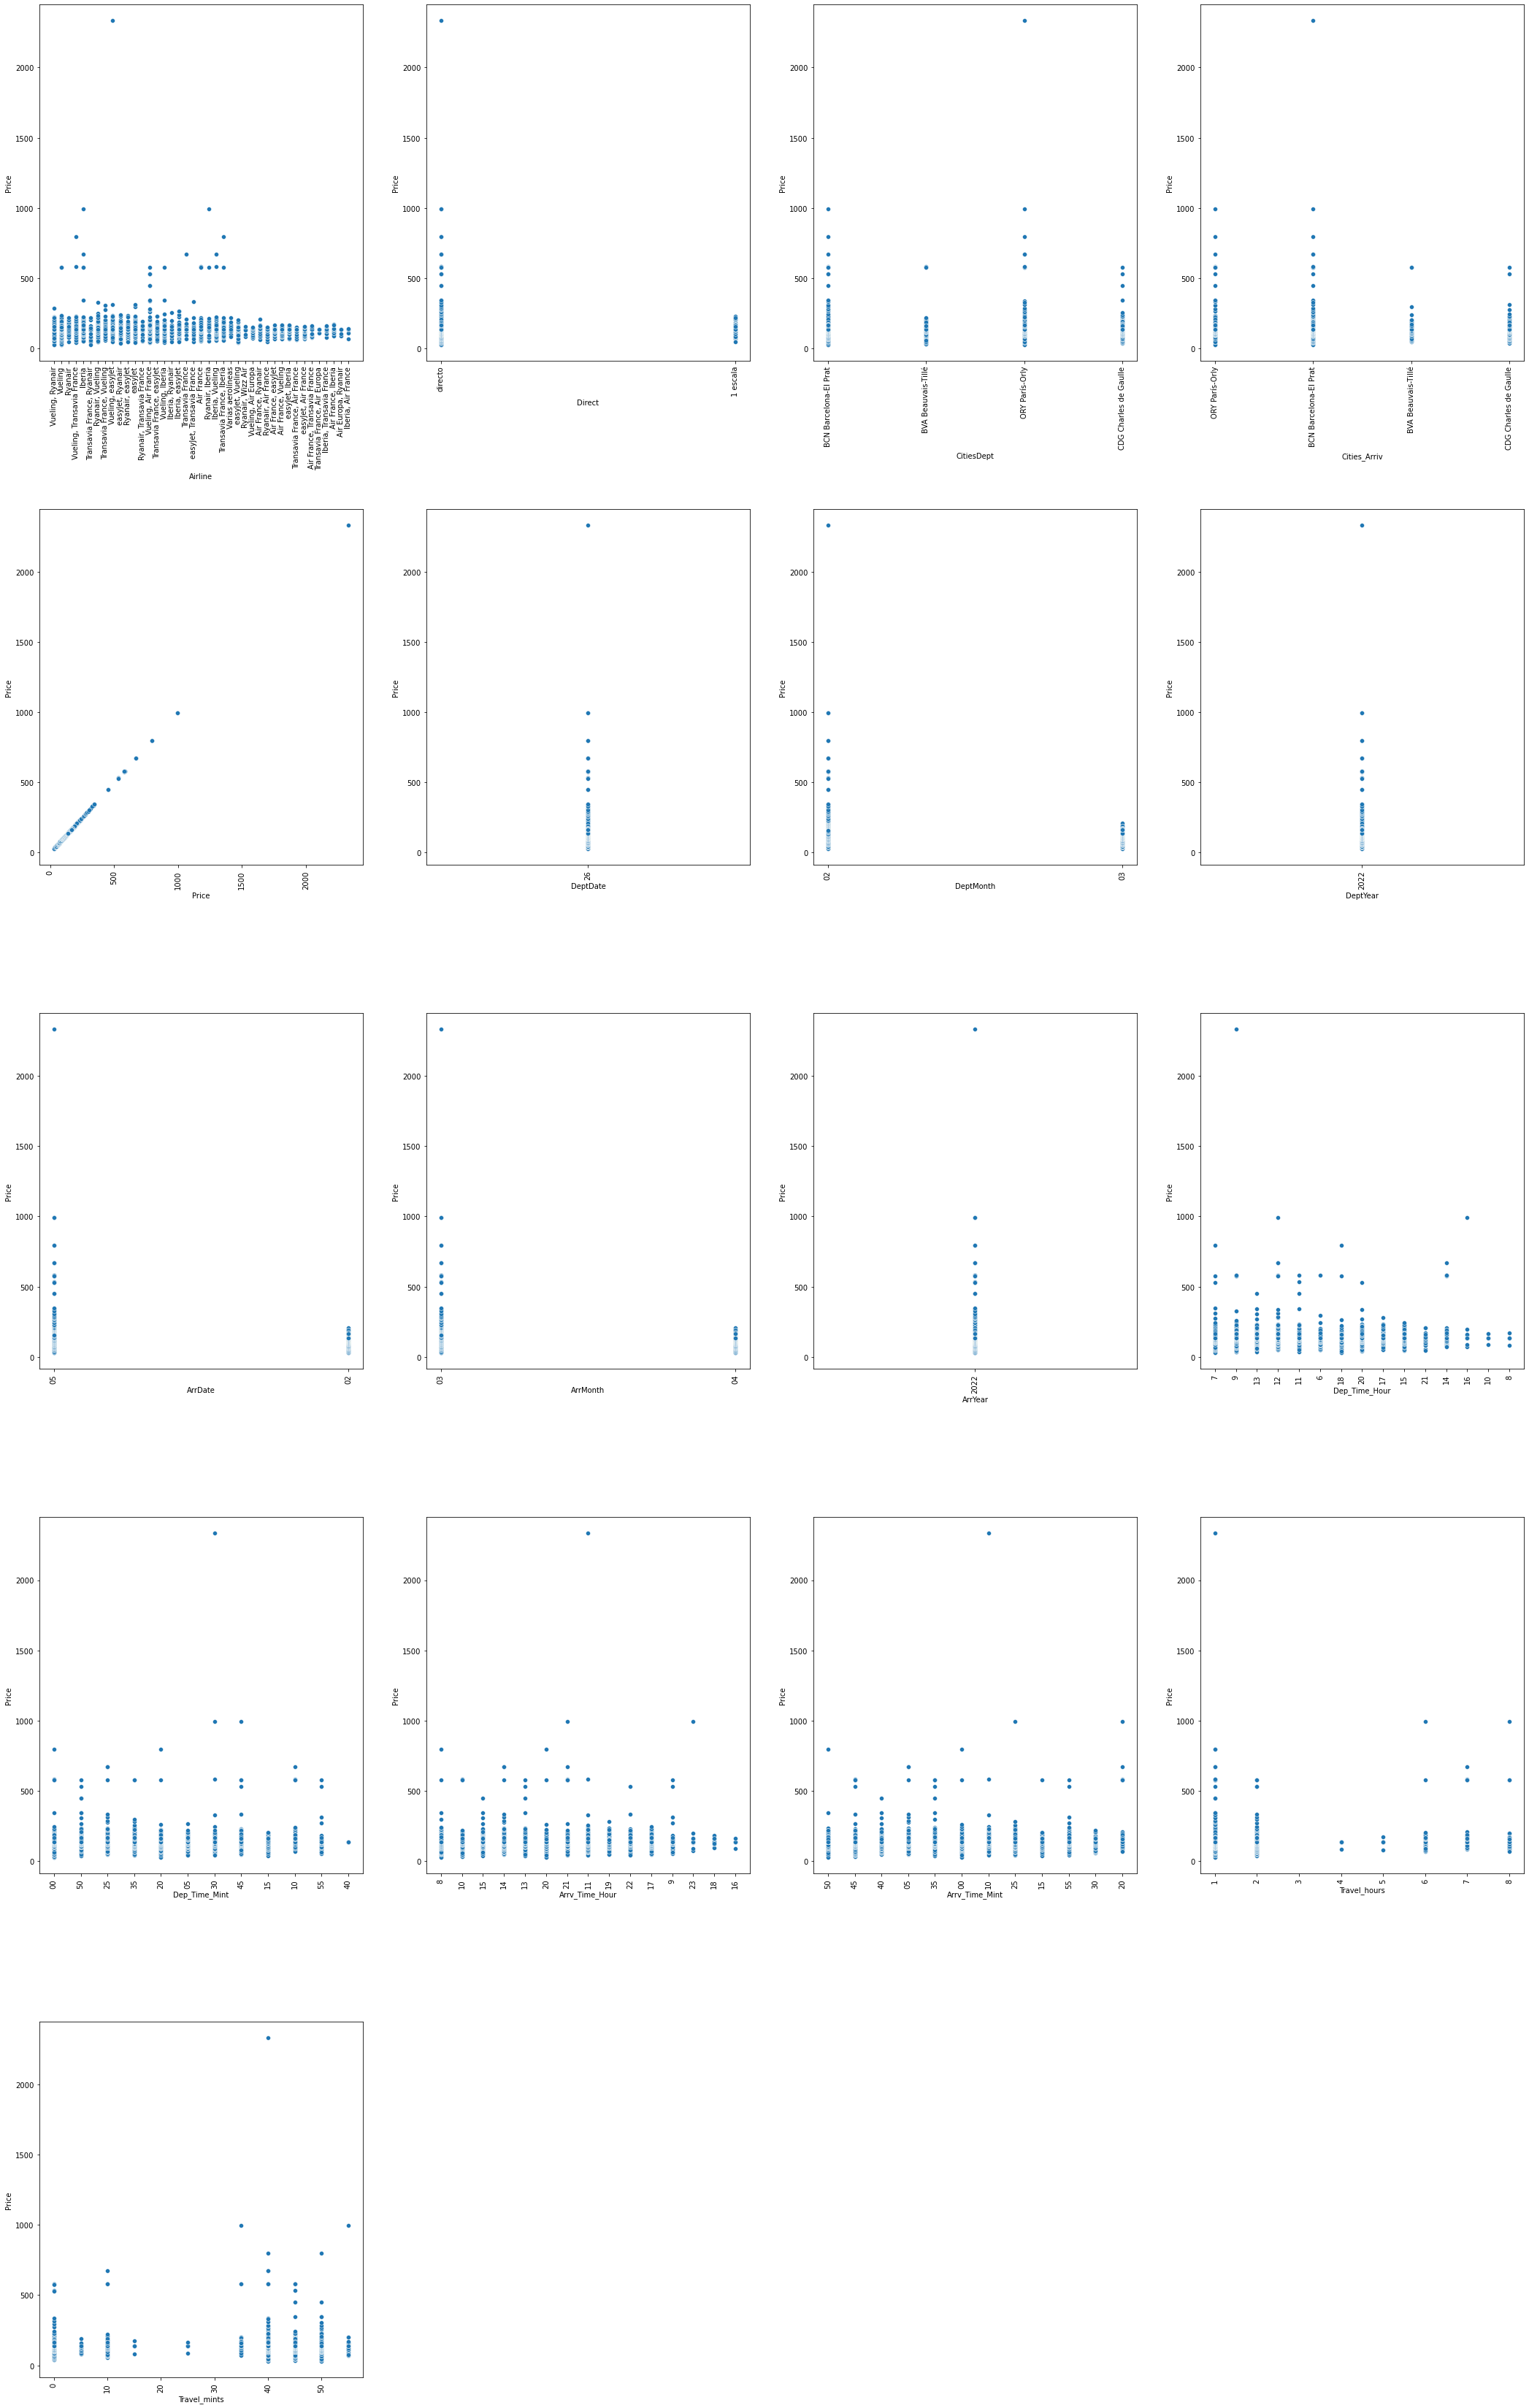

In [81]:
#checking the realtion of prices with all columns except the ones that are list by itself as we have already columns having the same info:
c=1
plt.figure(figsize=(30,75))
for i in colsnotlist:
        plt.subplot(8,4,c)
        sns.scatterplot(x =df[i], y=df.Price)
        plt.xticks(rotation=90)
        plt.tight_layout(pad=4)
        c=c+1
plt.show()

All these features work as categorical data as there is no linear relation between Price and othe features.

In [82]:
df.columns #reminder

Index(['Airline', 'Time_dept', 'Time_arrival', 'Direct', 'Duration',
       'CitiesDept', 'Cities_Arriv', 'Price', 'dateDept', 'dateArrv',
       'DeptDate', 'DeptMonth', 'DeptYear', 'ArrDate', 'ArrMonth', 'ArrYear',
       'Dep_Time_Hour', 'Dep_Time_Mint', 'Arrv_Time_Hour', 'Arrv_Time_Mint',
       'Travel_hours', 'Travel_mints', 'Duration_in_minutes'],
      dtype='object')

In [83]:
df #checking 

Airline Time_dept Time_arrival   Direct   Duration  \
0        Vueling, Ryanair   [7, 00]      [8, 50]  directo  [1h, 50m]   
1        Vueling, Ryanair   [9, 00]     [10, 45]  directo  [1h, 45m]   
2                 Vueling  [13, 50]     [15, 40]  directo  [1h, 50m]   
3                 Vueling   [9, 00]     [10, 45]  directo  [1h, 45m]   
4                 Ryanair   [7, 00]      [8, 50]  directo  [1h, 50m]   
...                   ...       ...          ...      ...        ...   
1942  Air France, Vueling   [7, 55]      [9, 55]  directo  [2h, 00m]   
1943  Air France, easyJet   [7, 00]      [8, 45]  directo  [1h, 45m]   
1944      Vueling, Iberia   [9, 20]     [11, 30]  directo  [2h, 10m]   
1945  Air France, easyJet  [12, 25]     [14, 05]  directo  [1h, 40m]   
1946   Air France, Iberia  [15, 00]     [17, 00]  directo  [2h, 00m]   

                 CitiesDept           Cities_Arriv  Price        dateDept  \
0     BCN Barcelona-El Prat         ORY París-Orly     29  [26, 02, 2022]   
1        BVA Beauvais-Tillé  BCN Barcelona-El Prat     34  [26, 02, 2022]   
2     BCN Barcelona-El Prat         ORY París-Orly    136  [26, 02, 2022]   
3        BVA Beauvais-Tillé  BCN Barcelona-El Prat    136  [26, 02, 2022]   
4     BCN Barcelona-El Prat         ORY París-Orly    136  [26, 02, 2022]   
...                     ...                    ...    ...             ...   
1942  BCN Barcelona-El Prat  CDG Charles de Gaulle    136  [26, 03, 2022]   
1943  CDG Charles de Gaulle  BCN Barcelona-El Prat    136  [26, 03, 2022]   
1944  BCN Barcelona-El Prat  CDG Charles de Gaulle    164  [26, 03, 2022]   
1945         ORY París-Orly  BCN Barcelona-El Prat    166  [26, 03, 2022]   
1946  BCN Barcelona-El Prat  CDG Charles de Gaulle    165  [26, 03, 2022]   

            dateArrv DeptDate DeptMonth DeptYear ArrDate ArrMonth ArrYear  \
0     [05, 03, 2022]       26        02     2022      05       03    2022   
1     [05, 03, 2022]       26        02     2022      05       03    2022   
2     [05, 03, 2022]       26        02     2022      05       03    2022   
3     [05, 03, 2022]       26        02     2022      05       03    2022   
4     [05, 03, 2022]       26        02     2022      05       03    2022   
...              ...      ...       ...      ...     ...      ...     ...   
1942  [02, 04, 2022]       26        03     2022      02       04    2022   
1943  [02, 04, 2022]       26        03     2022      02       04    2022   
1944  [02, 04, 2022]       26        03     2022      02       04    2022   
1945  [02, 04, 2022]       26        03     2022      02       04    2022   
1946  [02, 04, 2022]       26        03     2022      02       04    2022   

     Dep_Time_Hour Dep_Time_Mint Arrv_Time_Hour Arrv_Time_Mint  Travel_hours  \
0                7            00              8             50             1   
1                9            00             10             45             1   
2               13            50             15             40             1   
3                9            00             10             45             1   
4                7            00              8             50             1   
...            ...           ...            ...            ...           ...   
1942             7            55              9             55             2   
1943             7            00              8             45             1   
1944             9            20             11             30             2   
1945            12            25             14             05             1   
1946            15            00             17             00             2   

      Travel_mints  Duration_in_minutes  
0               50                  110  
1               45                  105  
2               50                  110  
3               45                  105  
4               50                  110  
...            ...                  ...  
1942             0                  120  
1943  

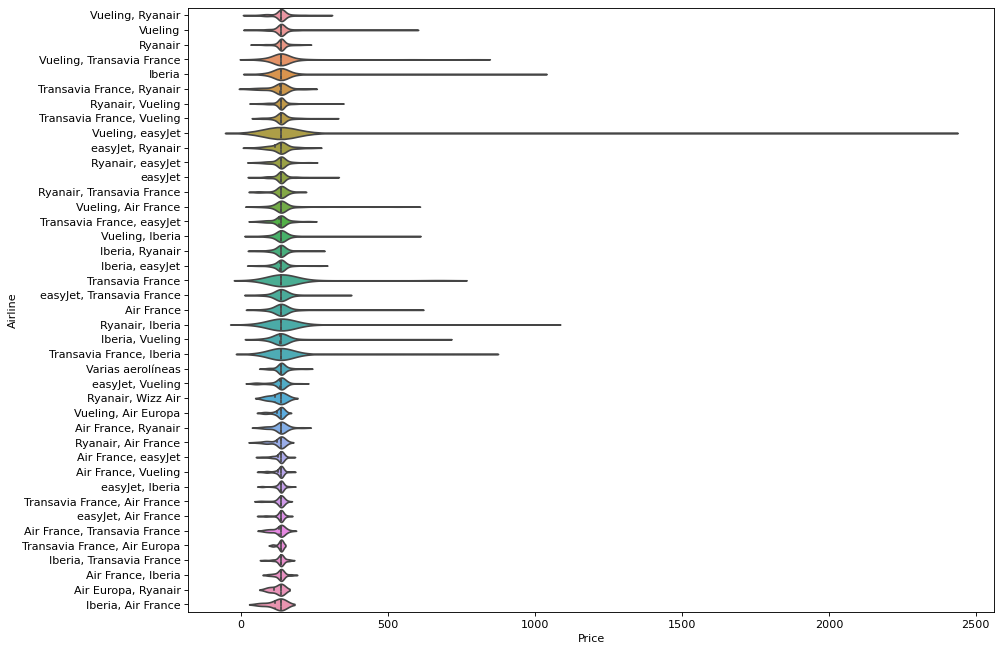

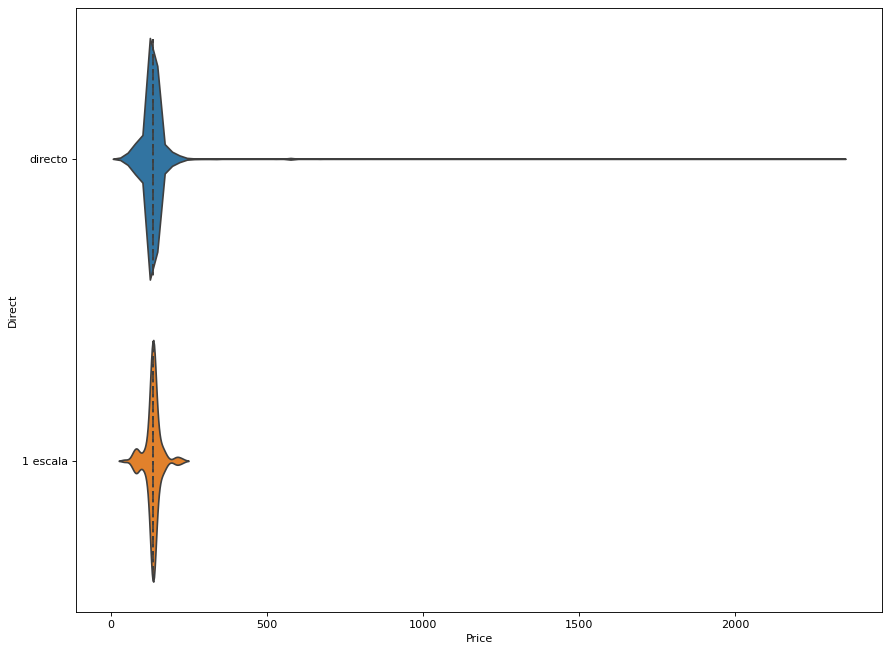

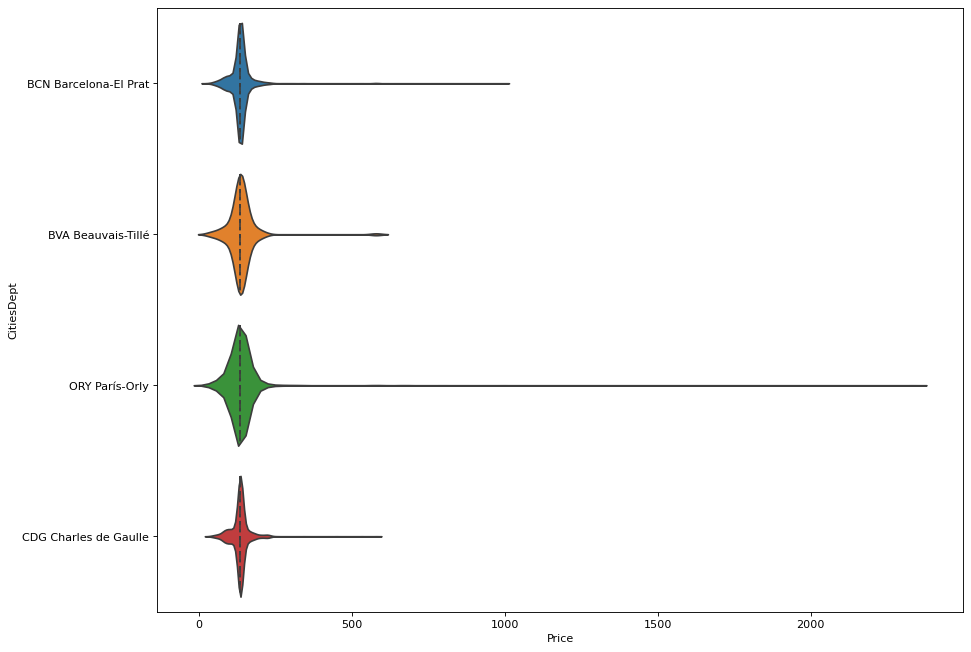

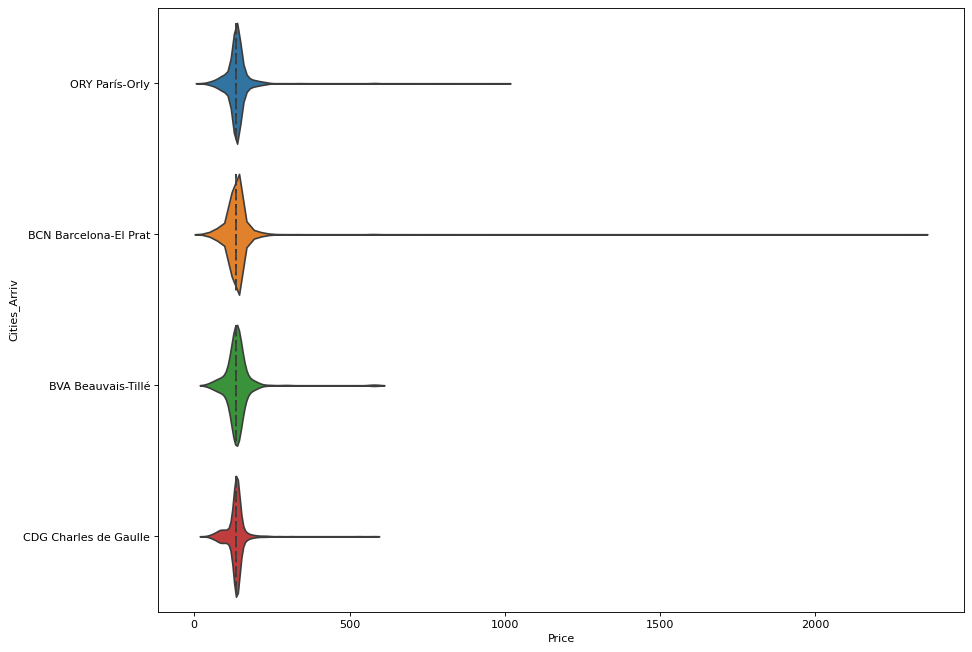

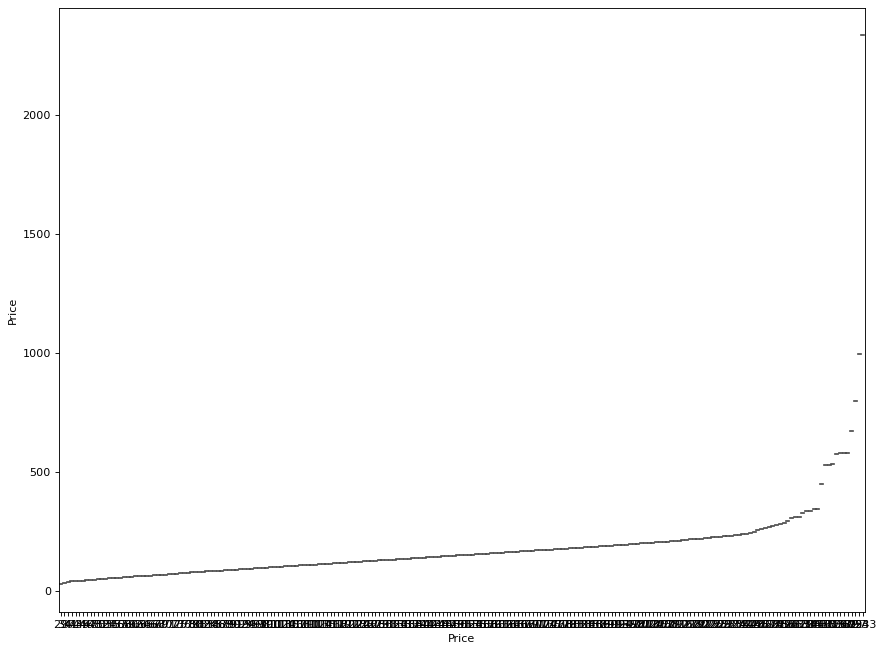

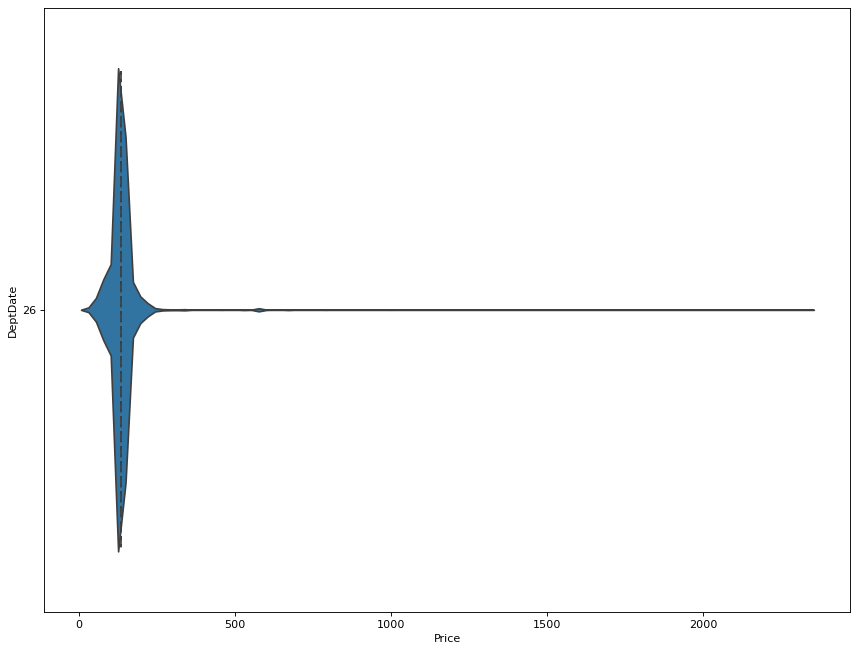

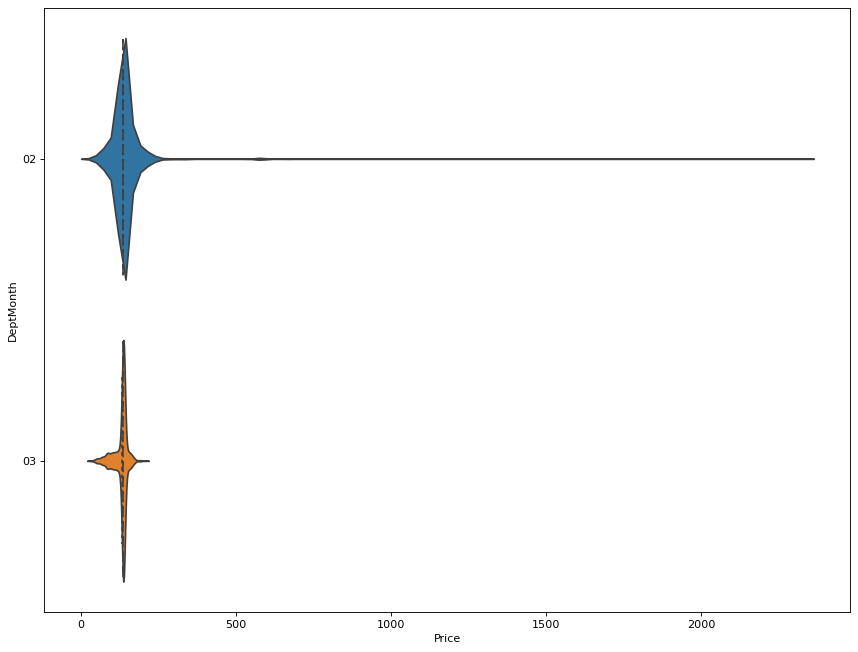

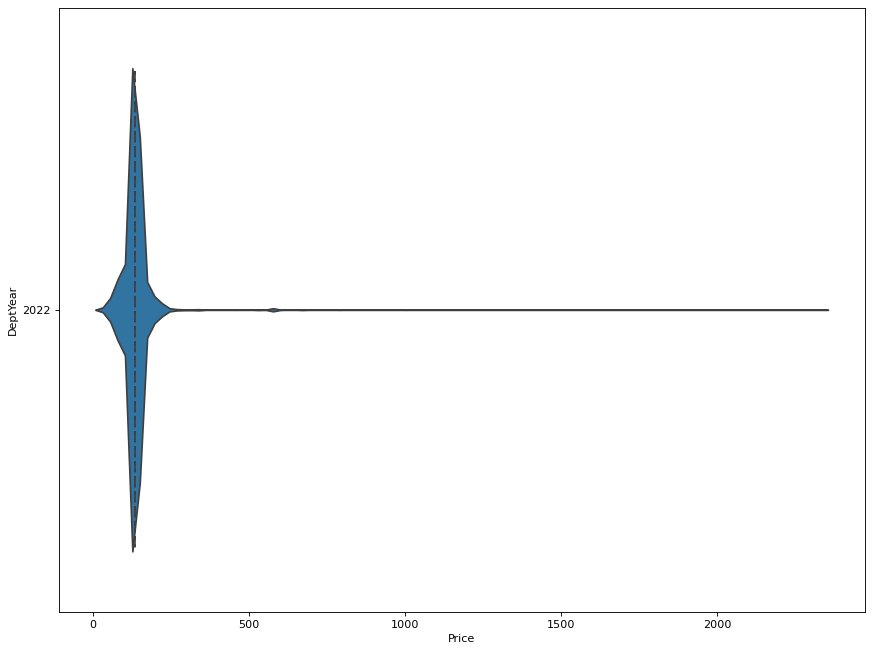

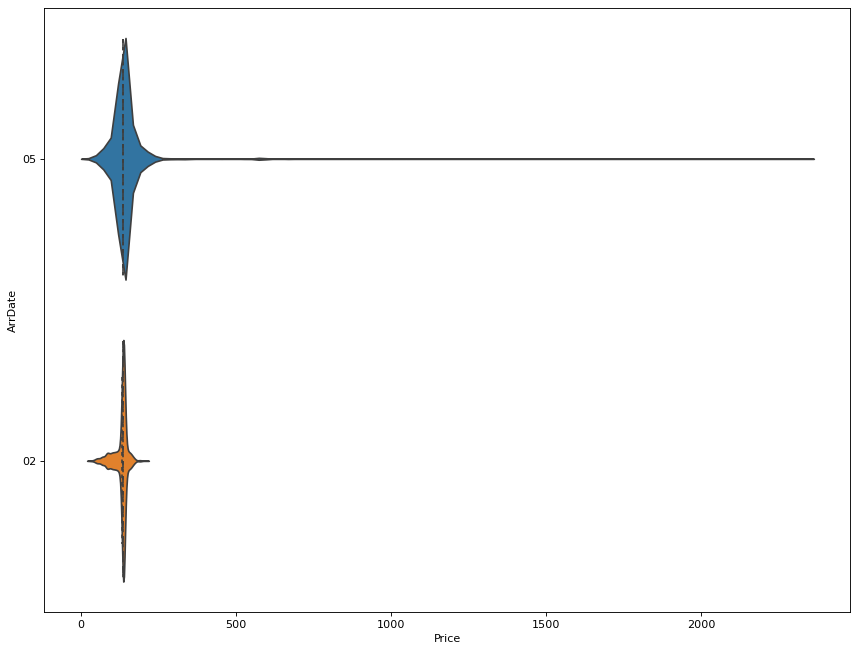

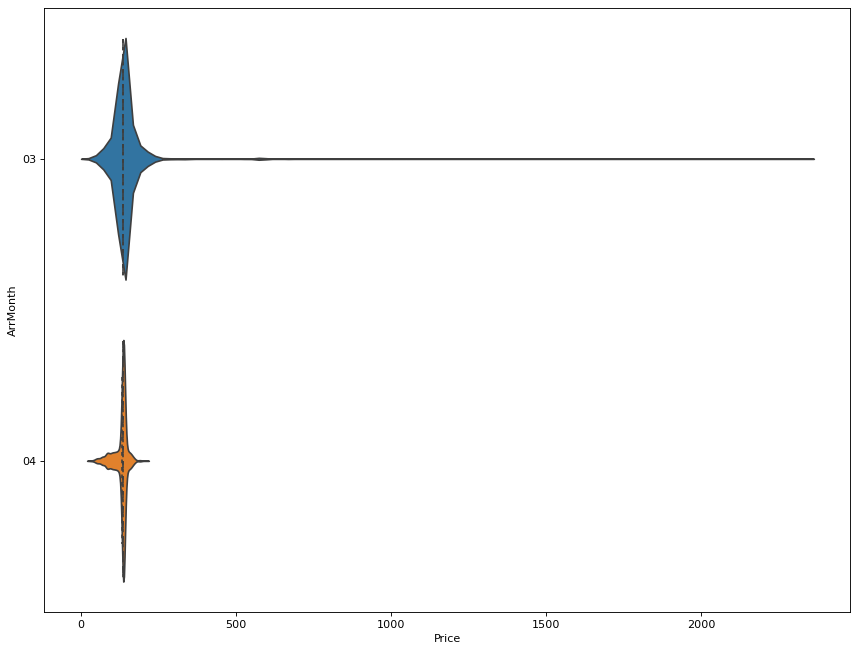

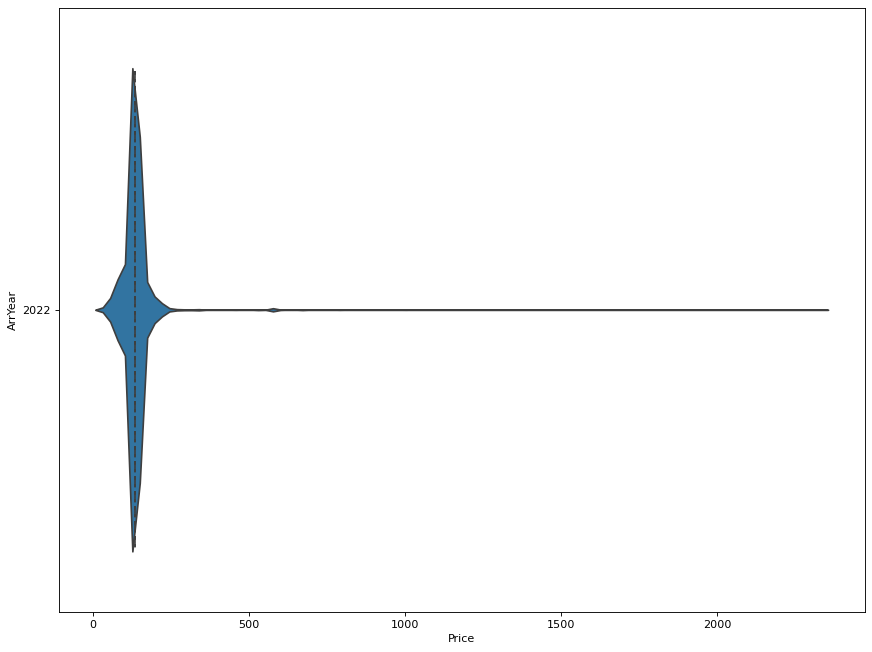

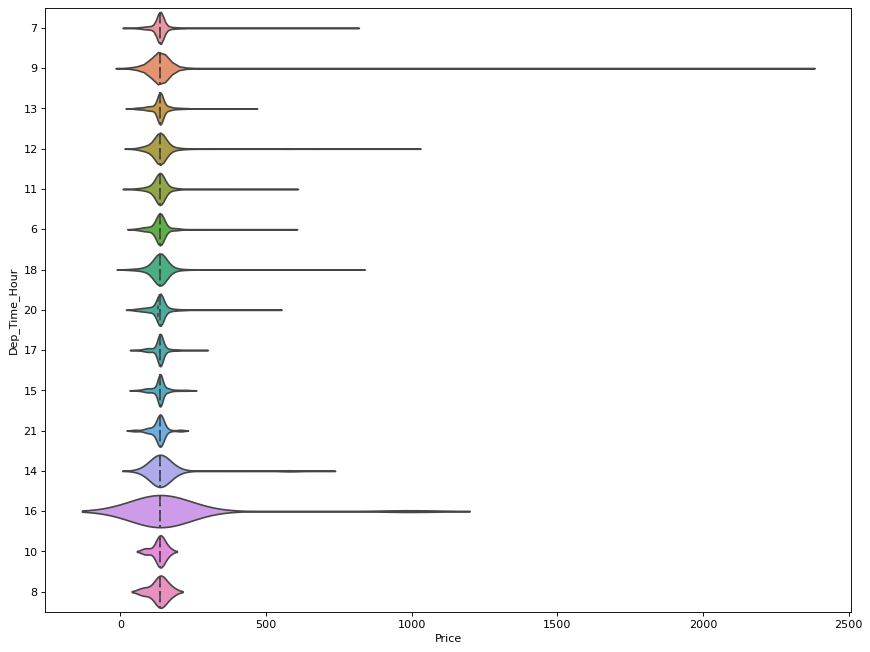

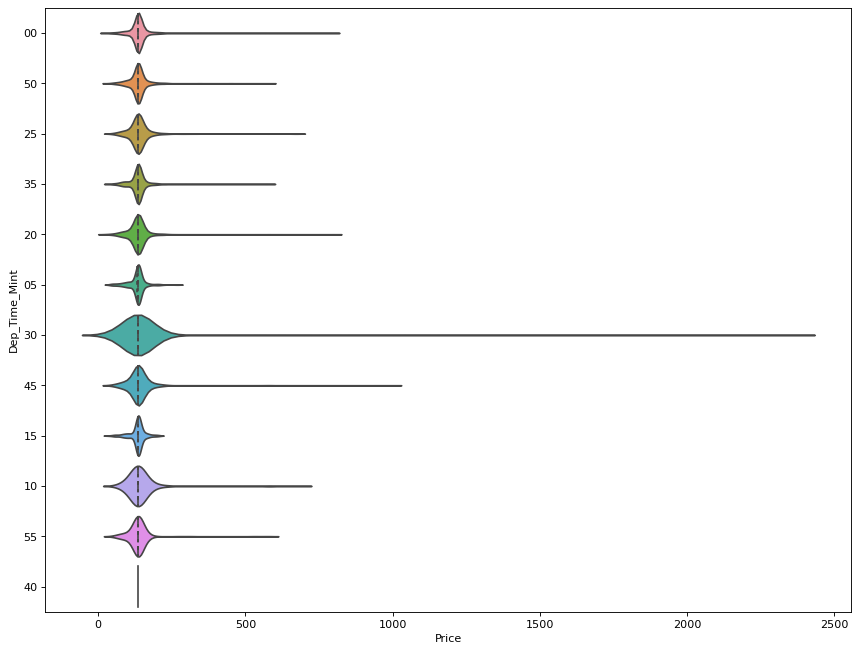

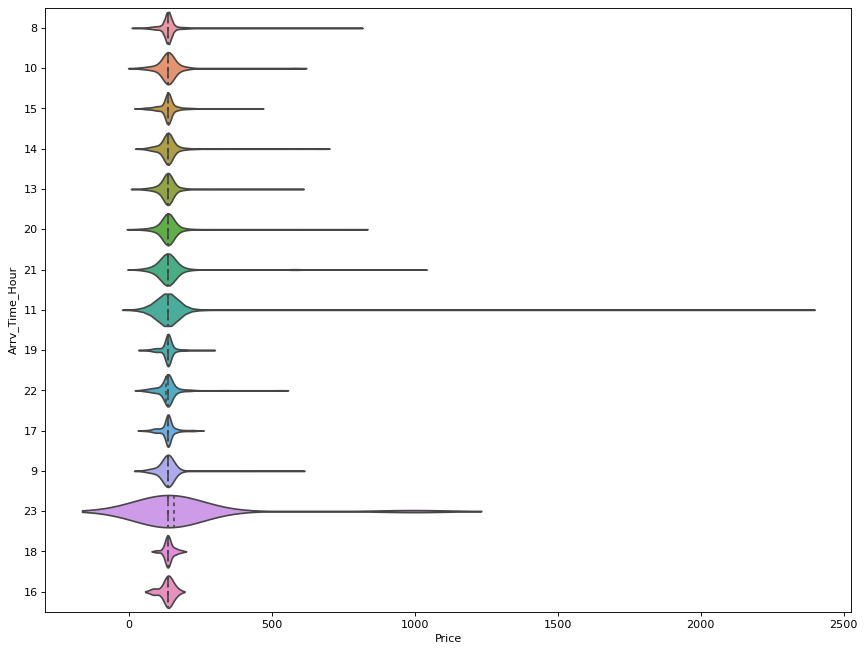

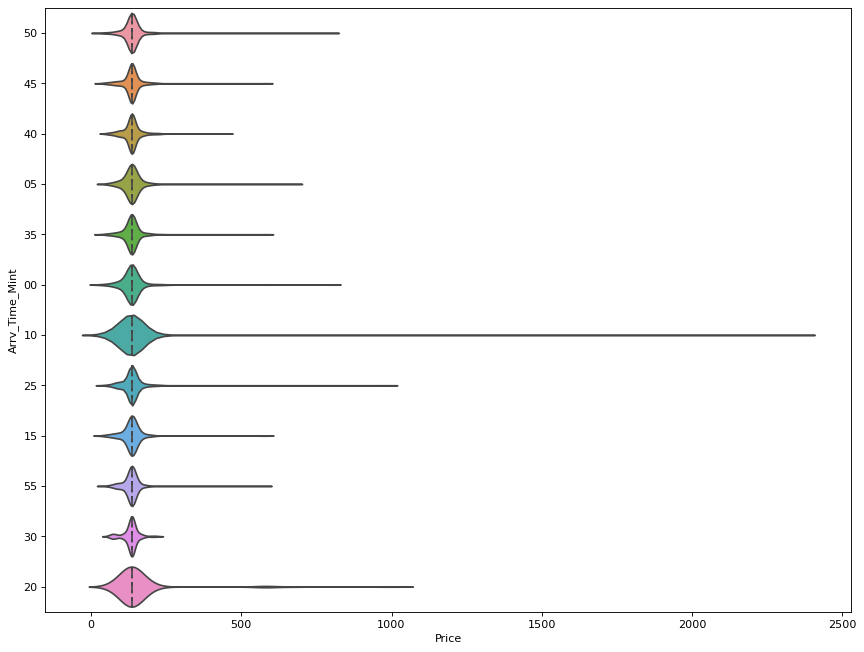

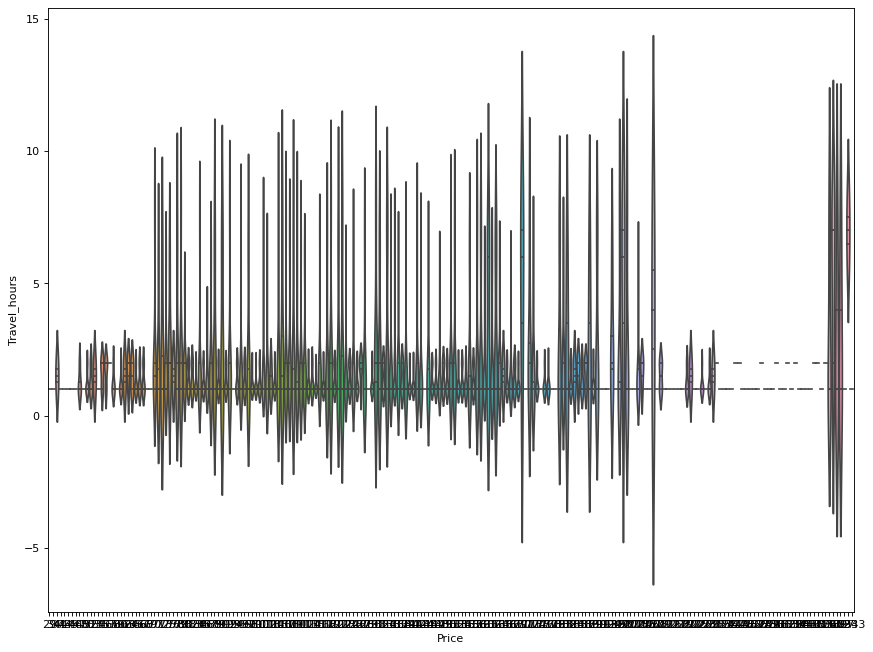

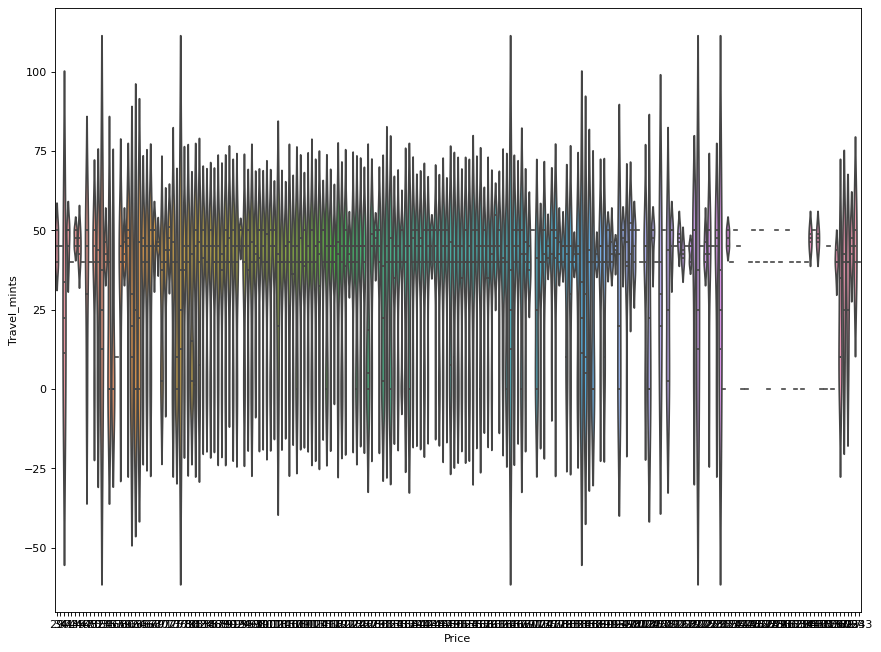

In [84]:
#plotting violinplots regarding the realtion of prices with all columns except the ones that are list by itself as we have already columns having the same info:

for col in colsnotlist:
    plt.figure(figsize=(13,10), dpi= 80)
    sns.violinplot(x='Price', y=col, data=df, scale='width', inner='quartile', rot=45)

From the previous violinplots, we can highlight the following findings:
    
    - Regarding the airlines, we have average flights prices between 0 and 250 euros.
    - Even if we check the remaining features, we can conclude the same, the prices remain between 0 and 250 euros.
    - If we check direct flights, we have more cases than the flights with one Stop/Stay.
    - Regarding the cities of departure and arrival in relation with price variation, we do not see big change in price variation over the cities of departure and arrival. We have similar violins,almost same, over the different options of cities of departure and arrival.
    - Dept date day is the same for all cases 26th (Feb and March). And same happens with Year!
    - Depart and Arival month are March and April. More flights in February than March as the flights that are leaving soon have more probability to be offered more than flights are away far.
    - Okay, if we check Depature Time Hour, we can say 16h has more variation than other in the Price standard deviation. Also 9am and 14h has some kind of variation on the Price deviation.
    - Regarding Arrival Time in Hours, we see we have huge deviation in Price when arrival time hour is 23h.
  

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


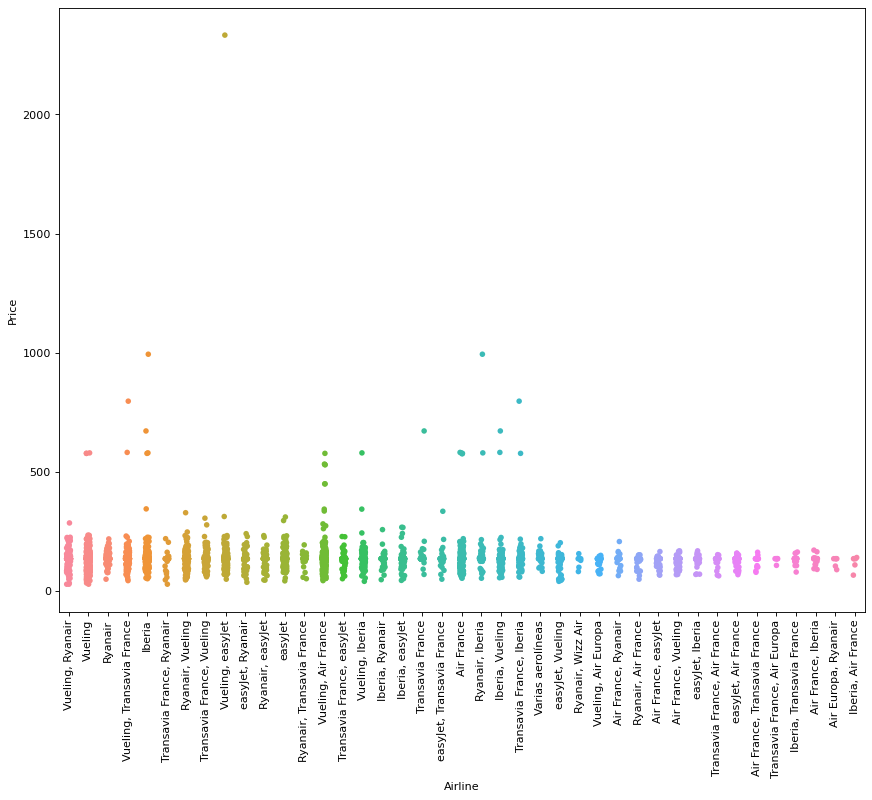

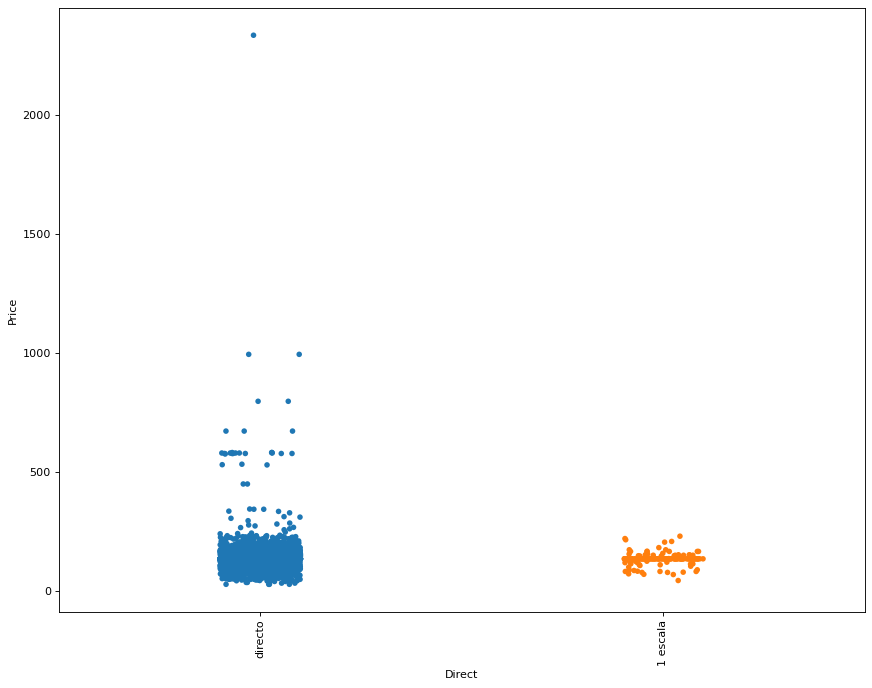

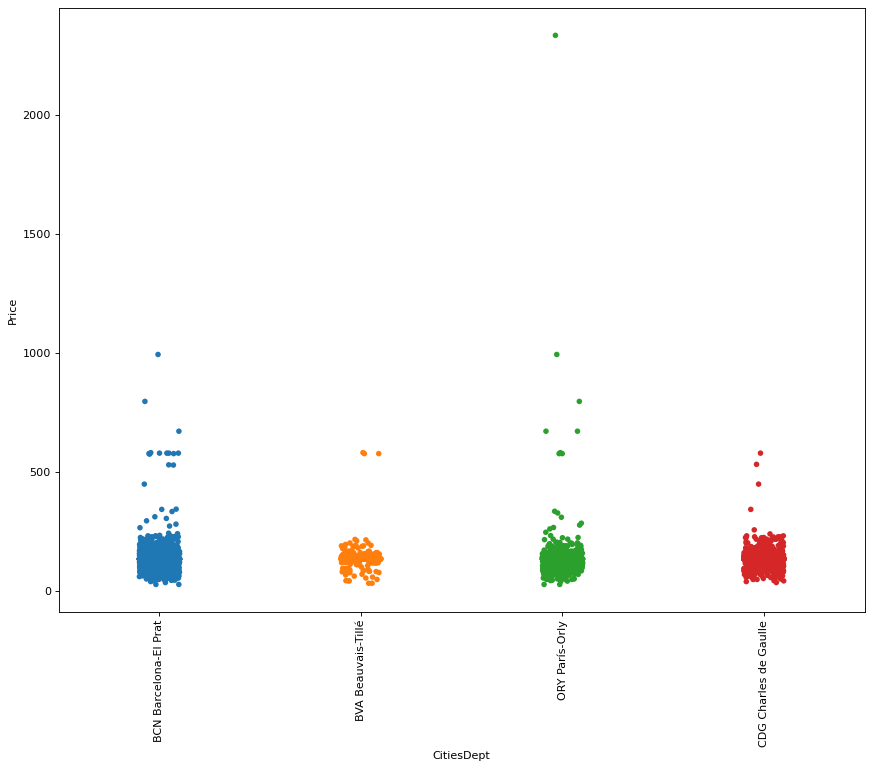

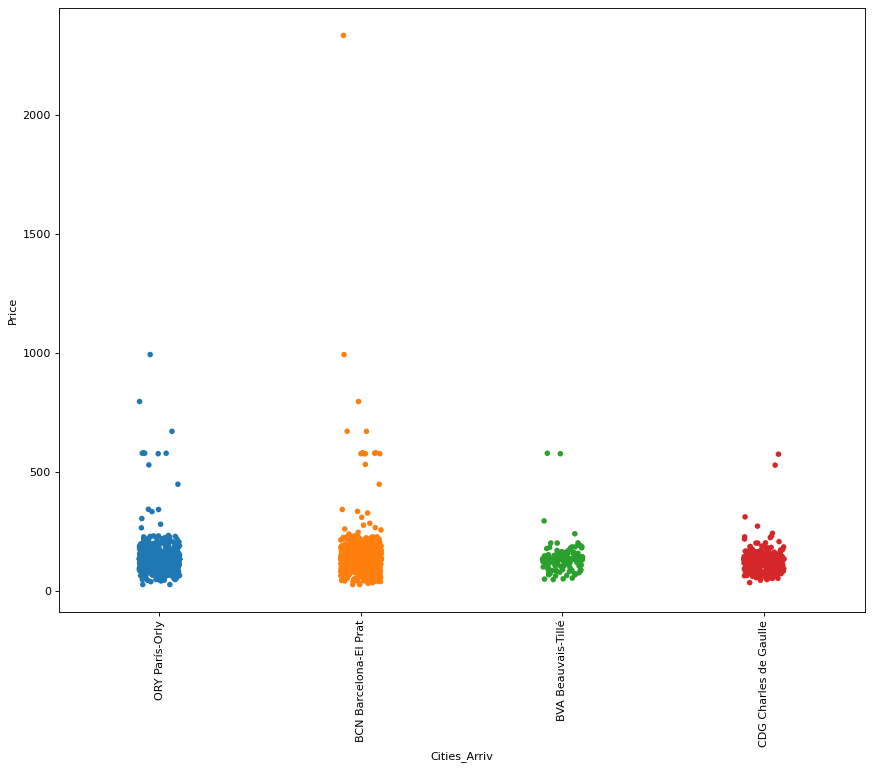

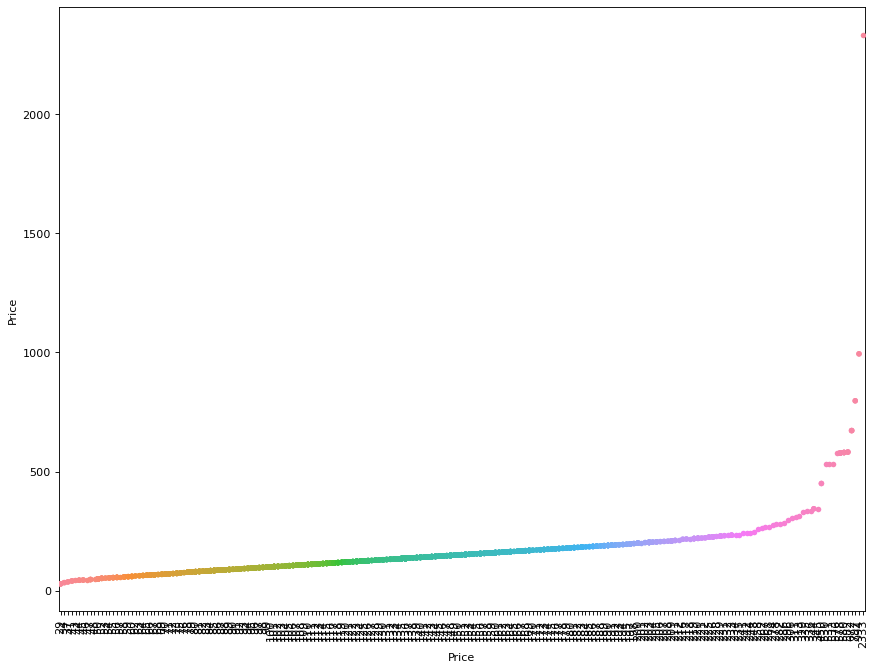

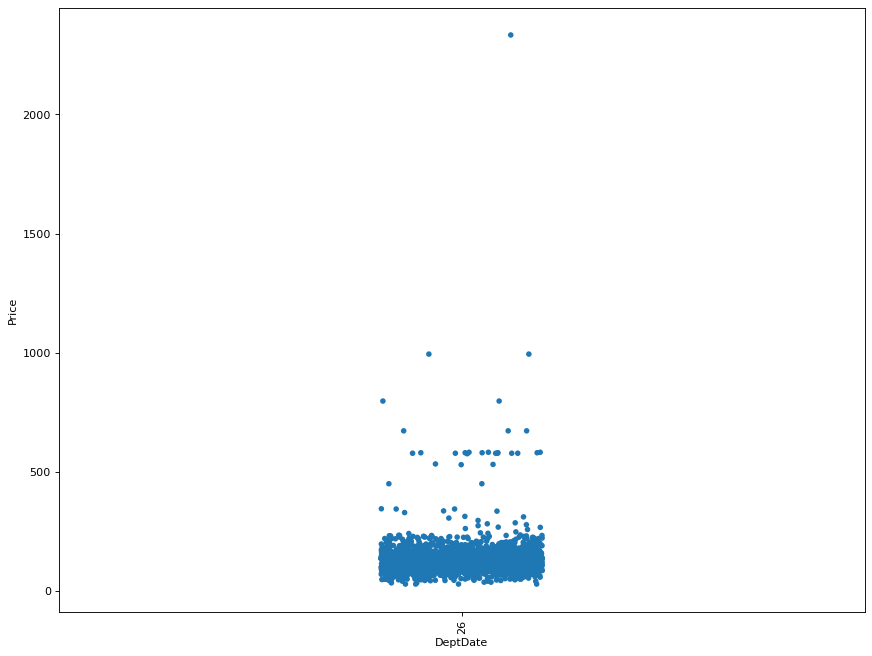

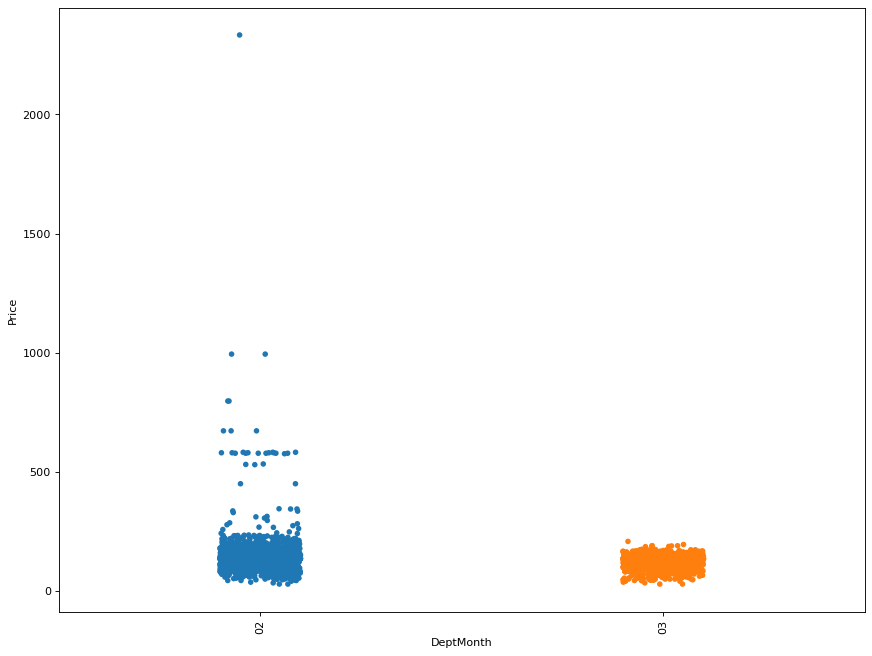

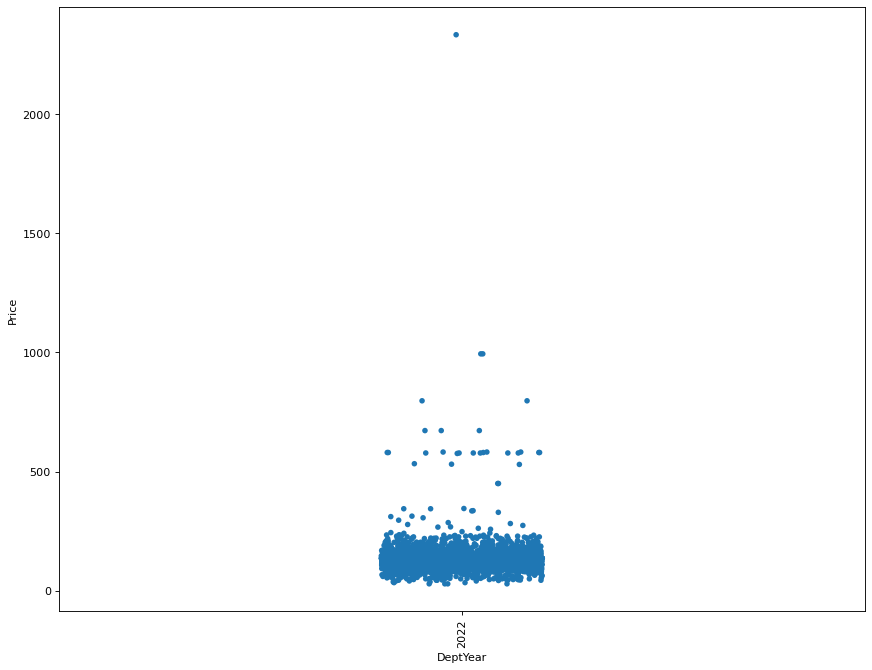

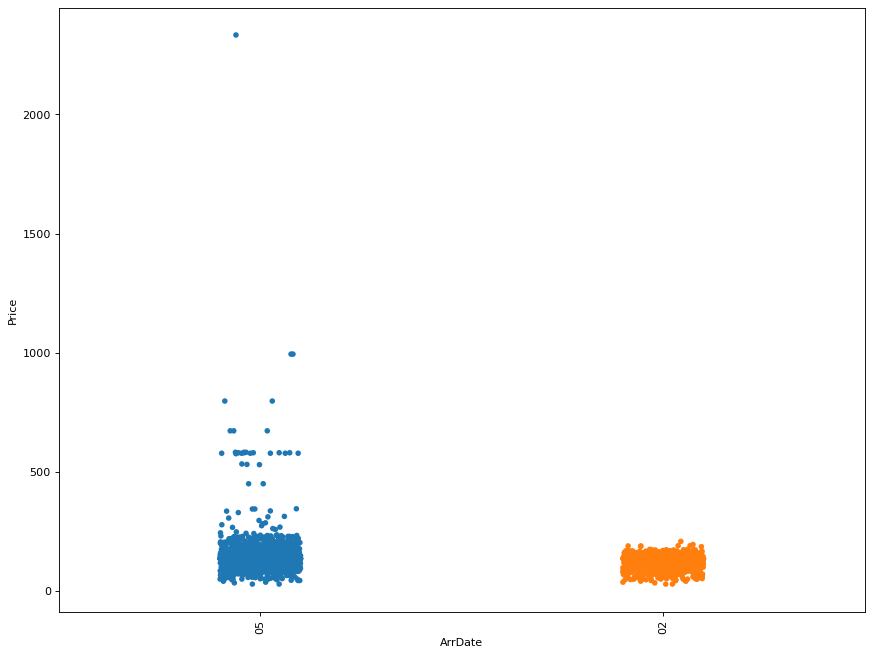

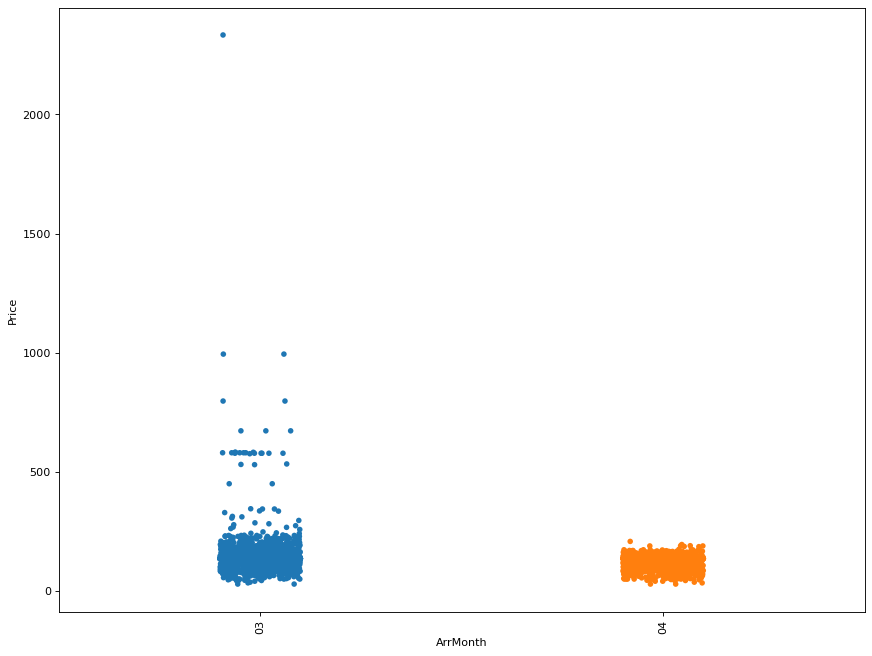

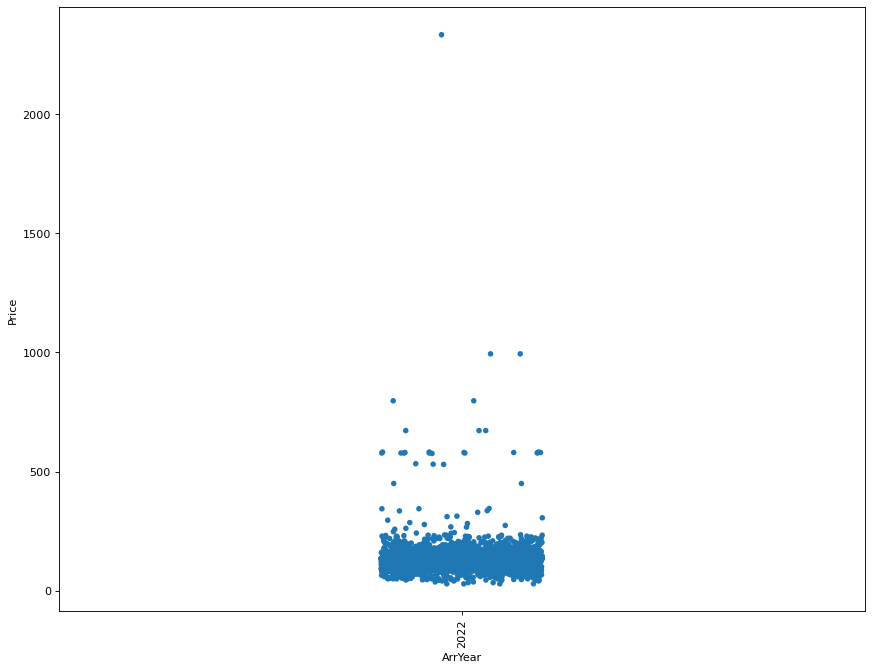

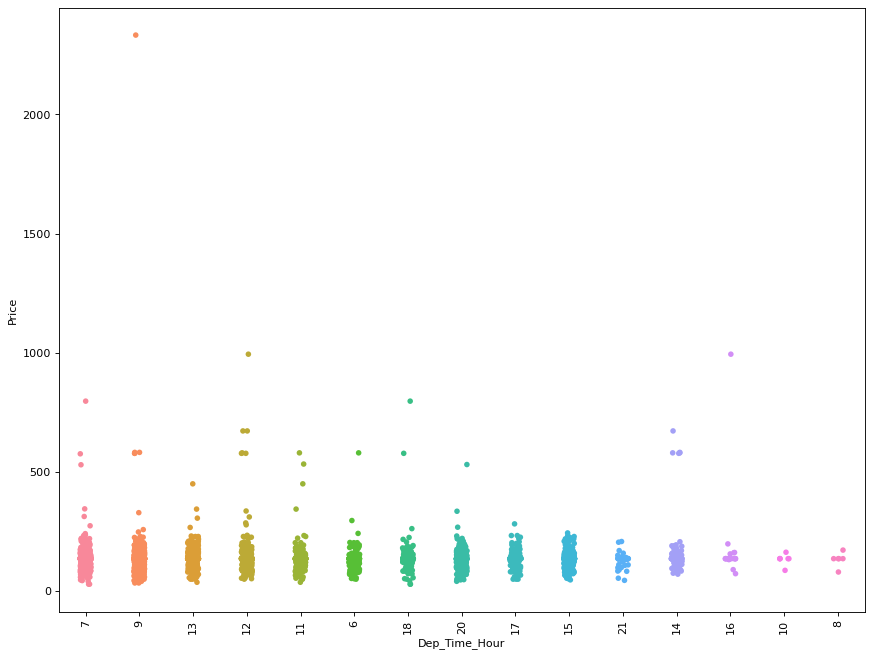

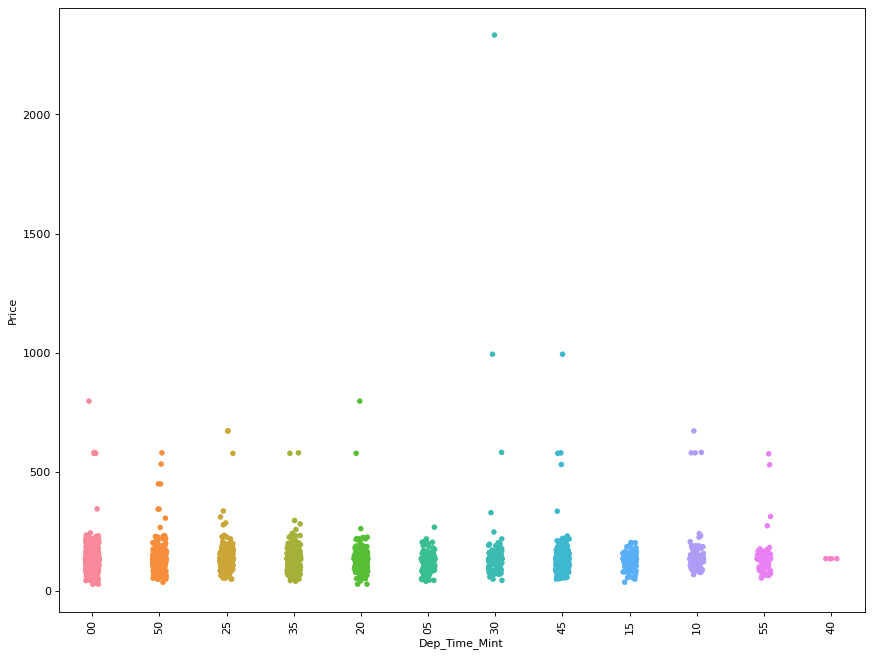

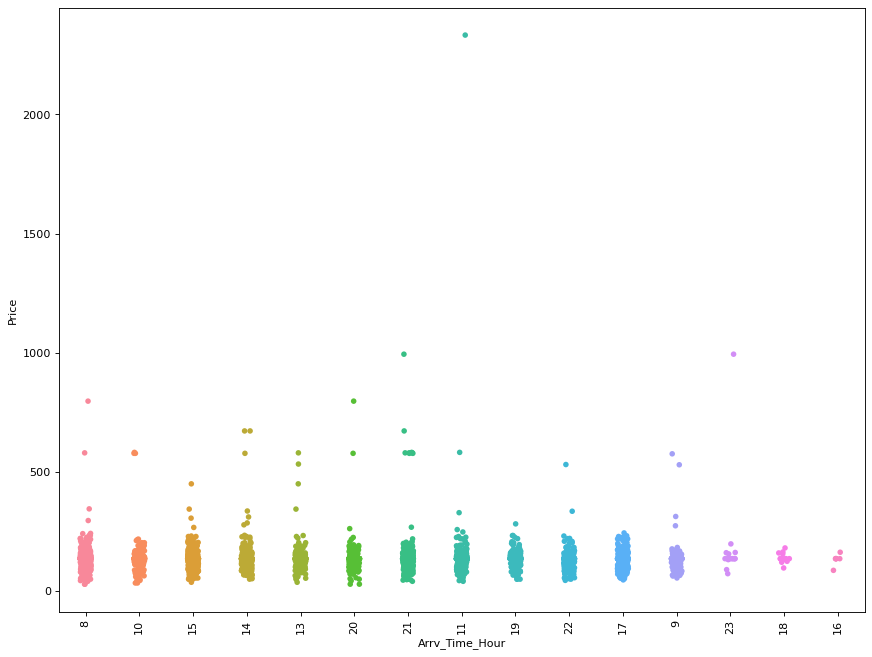

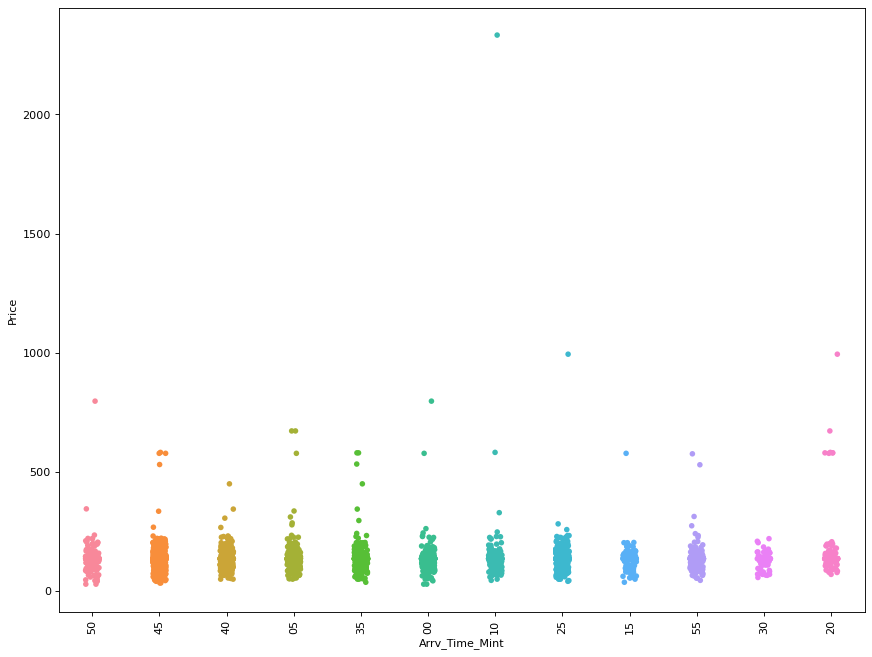

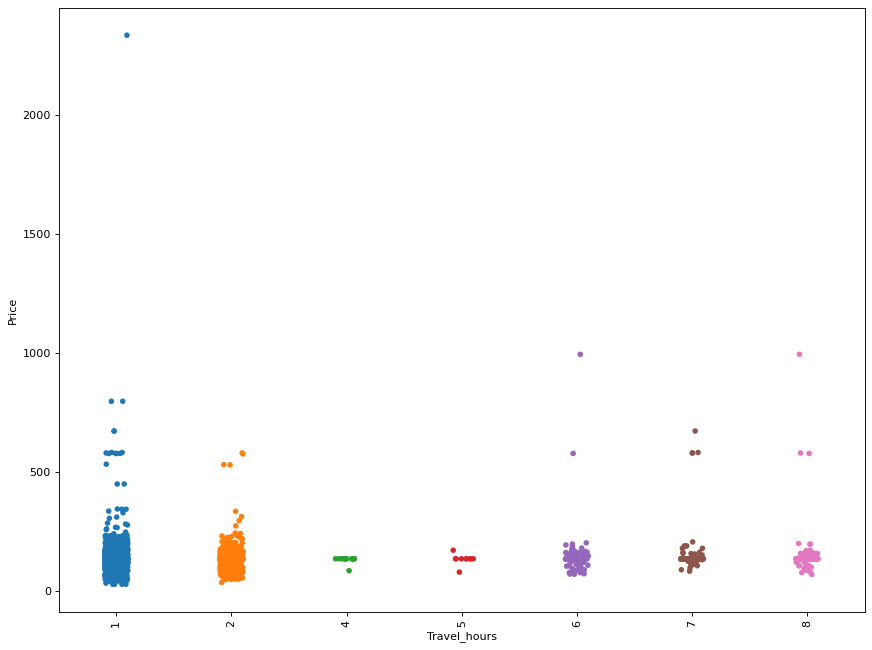

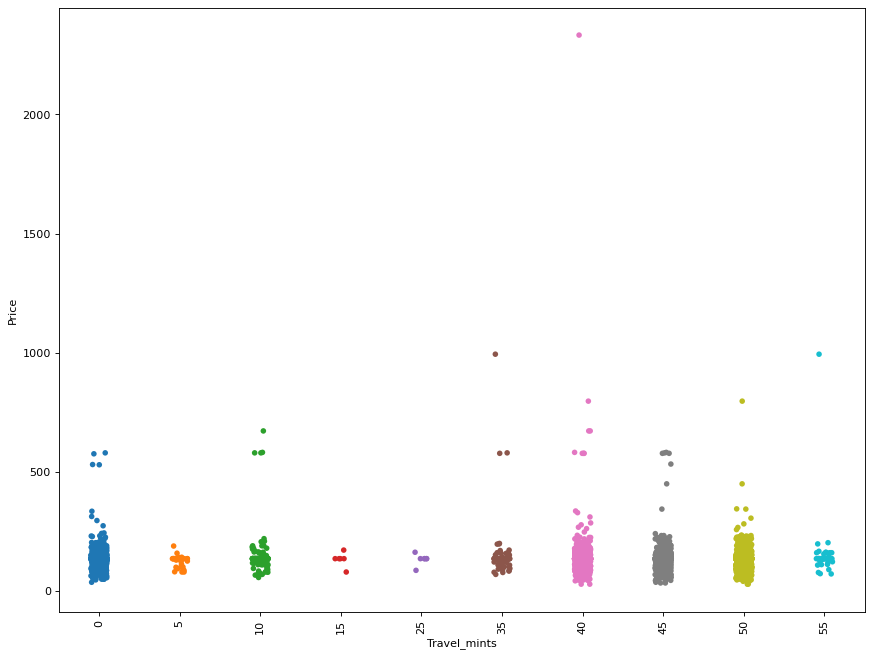

In [85]:
#plotting stripplots regarding the realtion of prices with all columns except the ones that are list by itself as we have already columns having the same info:

for col in colsnotlist:
    plt.figure(figsize=(13,10), dpi= 80)
    print(sns.stripplot(x=col, y="Price", data=df, jitter=True))
    plt.xticks(rotation=90)

Here above we have the same findings and conclusion we mentioned in the earlier comments.

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  after removing the cwd from sys.path.


[Text(0, 0, '29'), Text(1, 0, '34')]

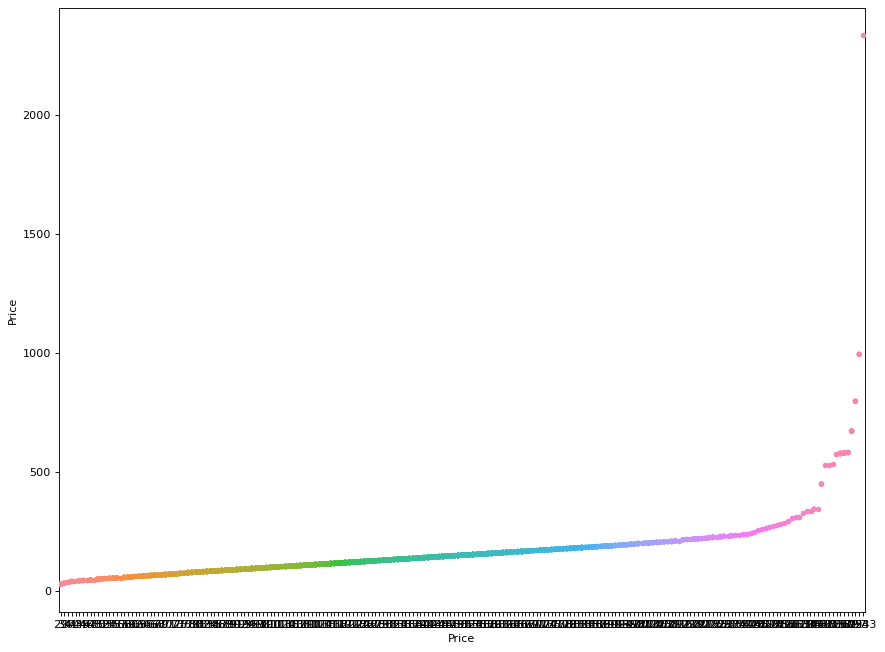

In [86]:
#plotting stripplot regarding the realtion of prices with regard Price itself:
plt.figure(figsize=(13,10), dpi= 80)
sns.stripplot(x='Price', y="Price", data=df, jitter=True)
ax.set_xticklabels(df.Price,rotation='vertical')

We have Prie increase as the Price increases.

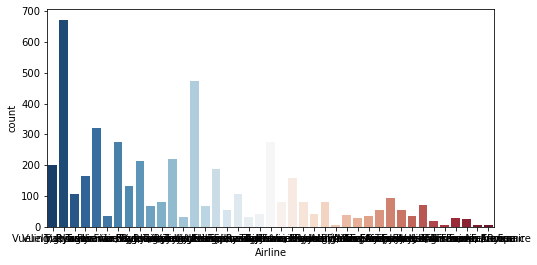

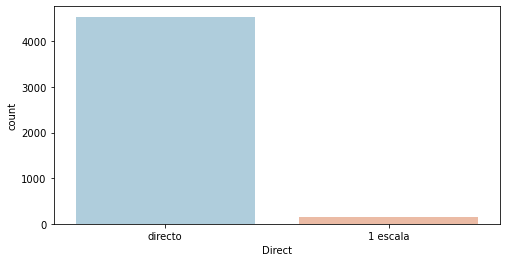

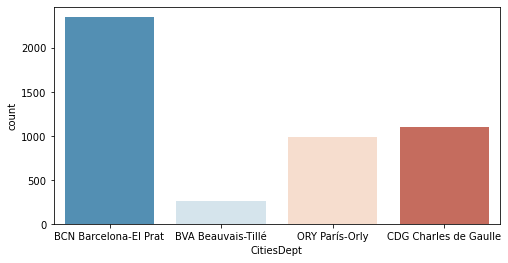

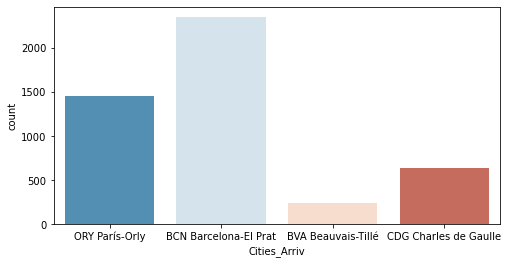

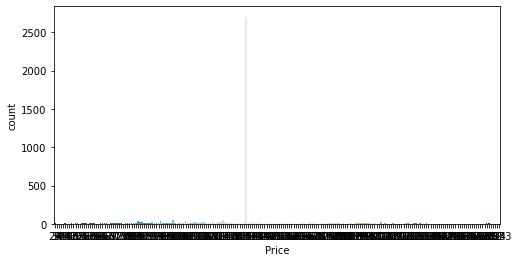

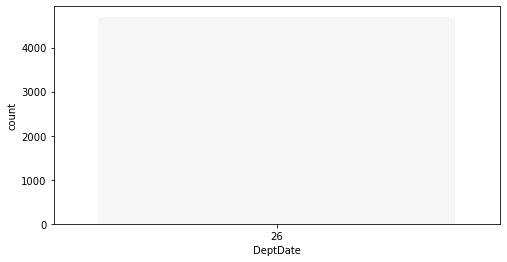

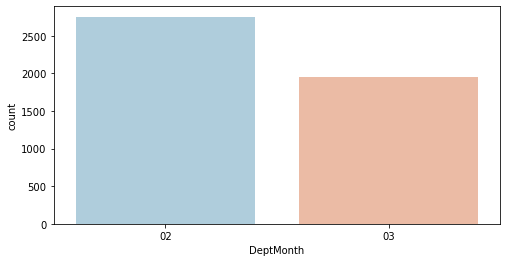

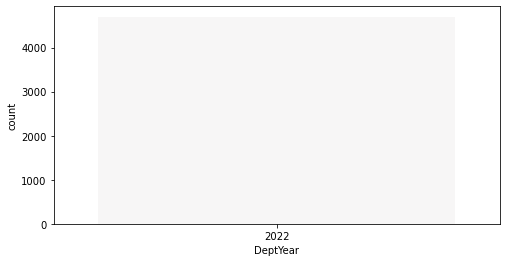

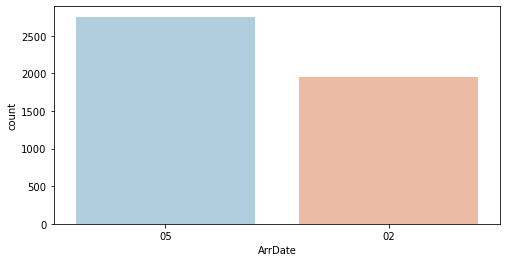

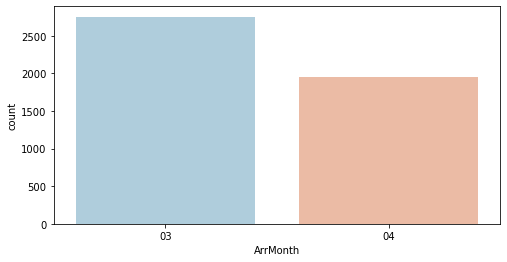

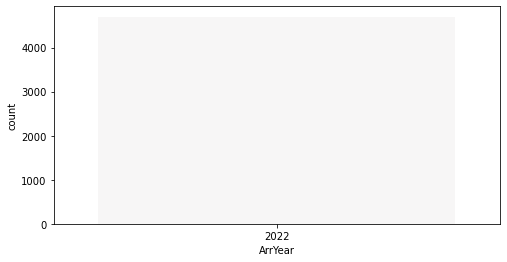

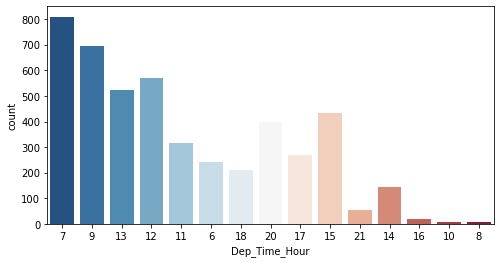

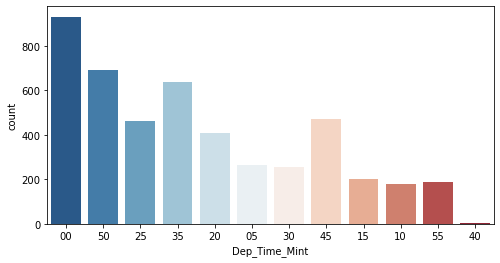

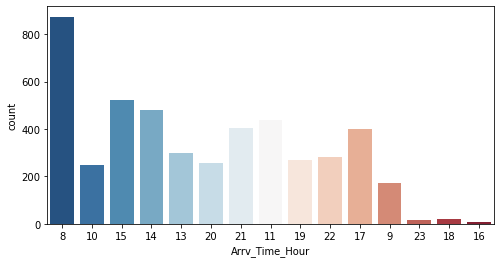

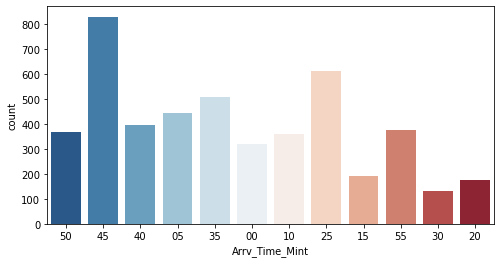

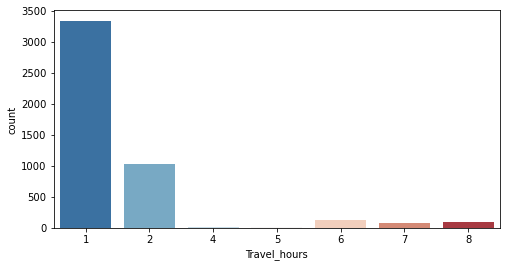

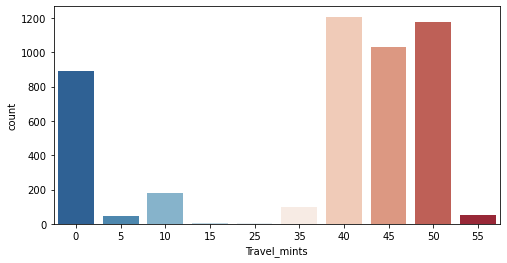

In [87]:
#countplotting regarding the realtion of prices with all columns except the ones that are list by itself as we have already columns having the same info:

for col in colsnotlist:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col,data=df,palette='RdBu_r')

PLEASE BEAR IN MIND THESE CONCLUSION AND FINDINS ARE DEPENDENT ON THE DATA WE GOT, WHICH MEANS IT DEPENDSON ON THE SOURCE AND DESTINATION OF FLIGHT. AND ALSO ON DEPARTURE AND ARRIVAL DATE SELECTED FOR THE DATAFRAME. HENCE, ALL OUR CONCLUSIONS ARE DEPENDENT ON THESE 4 SELECTIONS AND CAN ONLY BE APPLICALE ON FLIGHTS GOING BETWEEN BCN AND PARIS.

Here we have and notice the same findings as previously mentioned. 

In addition, we have the following highlights:

    - Vueling and combo of Ryanair and TransaviaFrance has the highest number of flights offer.
    - Most of the flights are direct flights.
    - The city that depart the most is Barcelona. 
    - The city that has most of the arrivals is also Barcleona
    - We have one unique Departure Date which is 26th. The same happens with Year, unique value of 2022.
    - The month we have are February and March. February has more flights than March.
    - As we said, when comparing ArrDate and ArrMonth, we see a tendency to have more flights near to current date than far away.
    - When comparing Dep Time Hour and Mint, we see hours like 7am,9am,13h and 12h have more probability to have flights available than the remainign departures timing. And regarding the Dep Time Mint, we have that most of the flights departs at minutes 00, 50, 35, and 25. And the timing where less flights are offered tend to be at 16, 10, and 8am for Paris-Barcelona.
    - And regarding the arrival timings, most of the flight offers tend to be most probable at 8am and less probable to be at 23, 18, or even 16h. And when comparing the minutes, we have most of the flights to be at 45min 25min, 35min and 05minutes.
    - When comparing Travel_hours, we see it is most probably to be between 1h and 2h. There is way less flights which travel duration is more than 2h.
    - When comparing Travel_minutes, we see it is most probably to be between 40min and 50min. There is way less flights which travel duration minutes ends in 15minutes or 25 minutes.
    
    

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


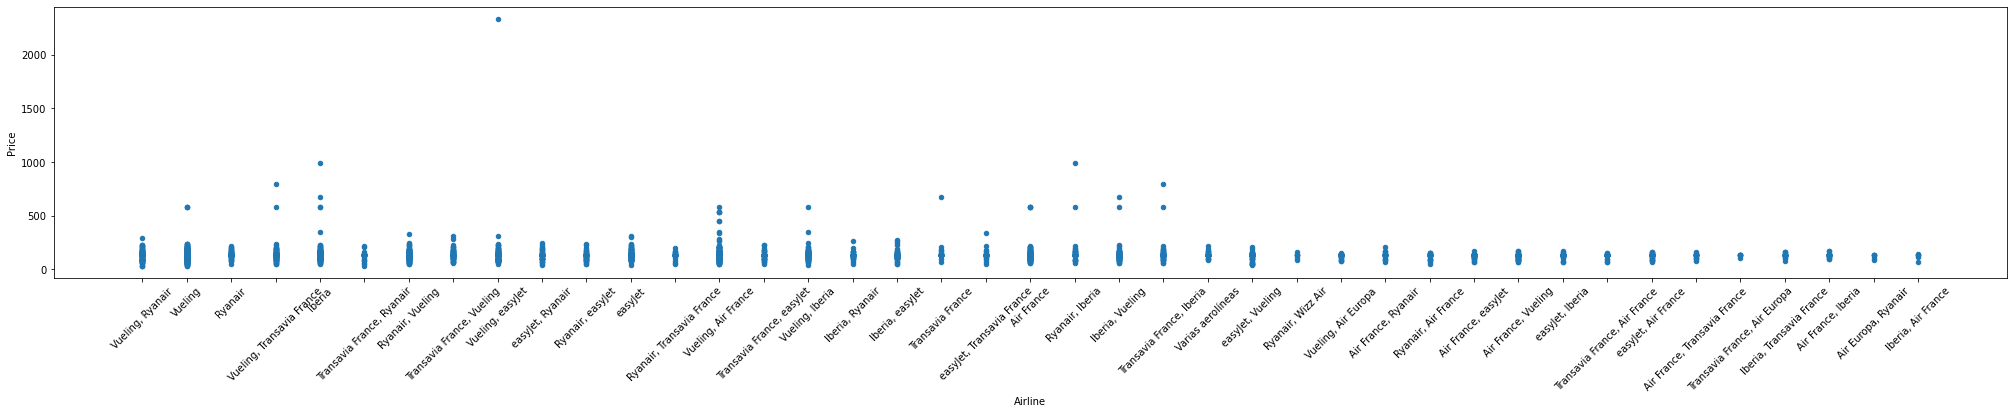

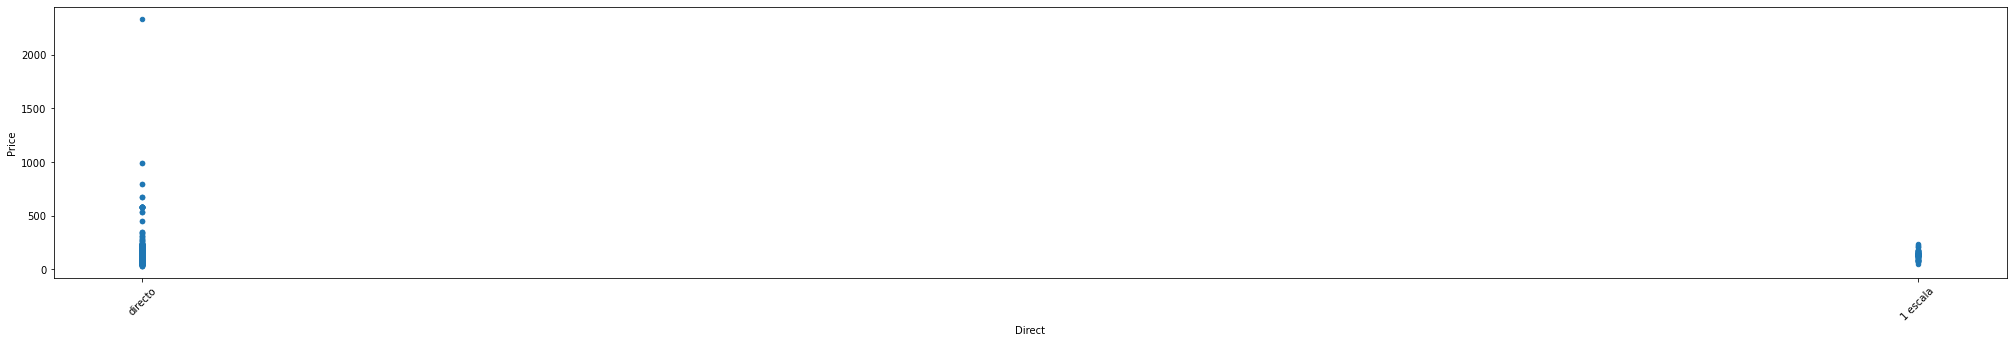

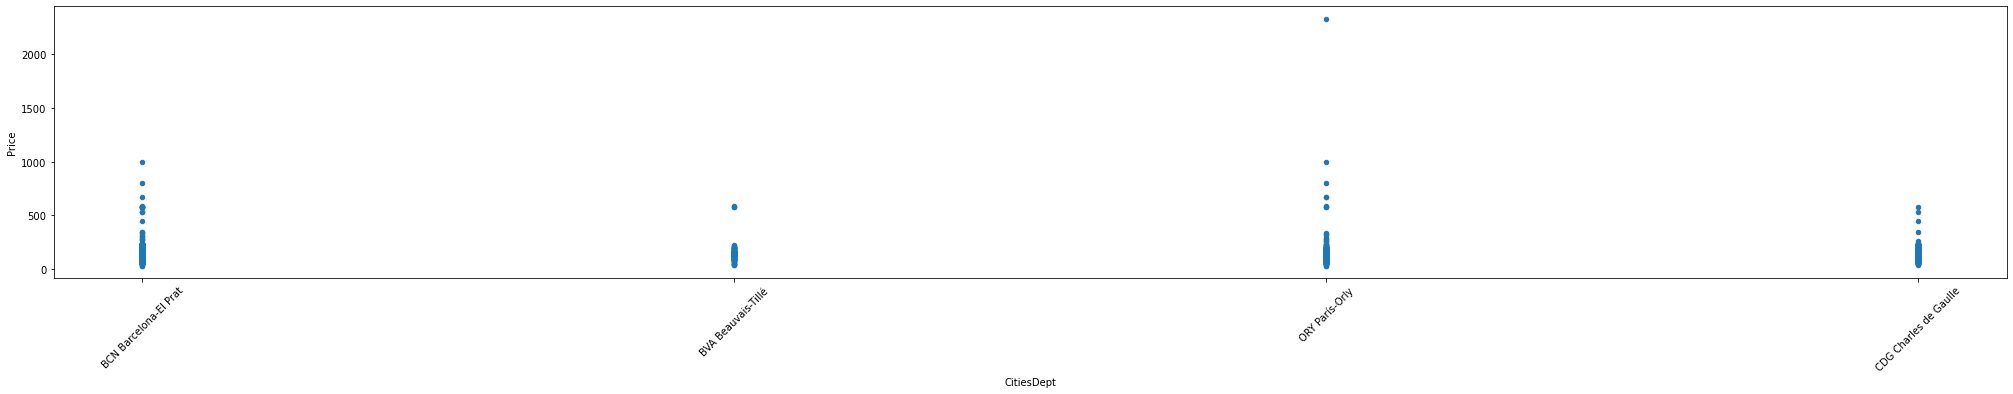

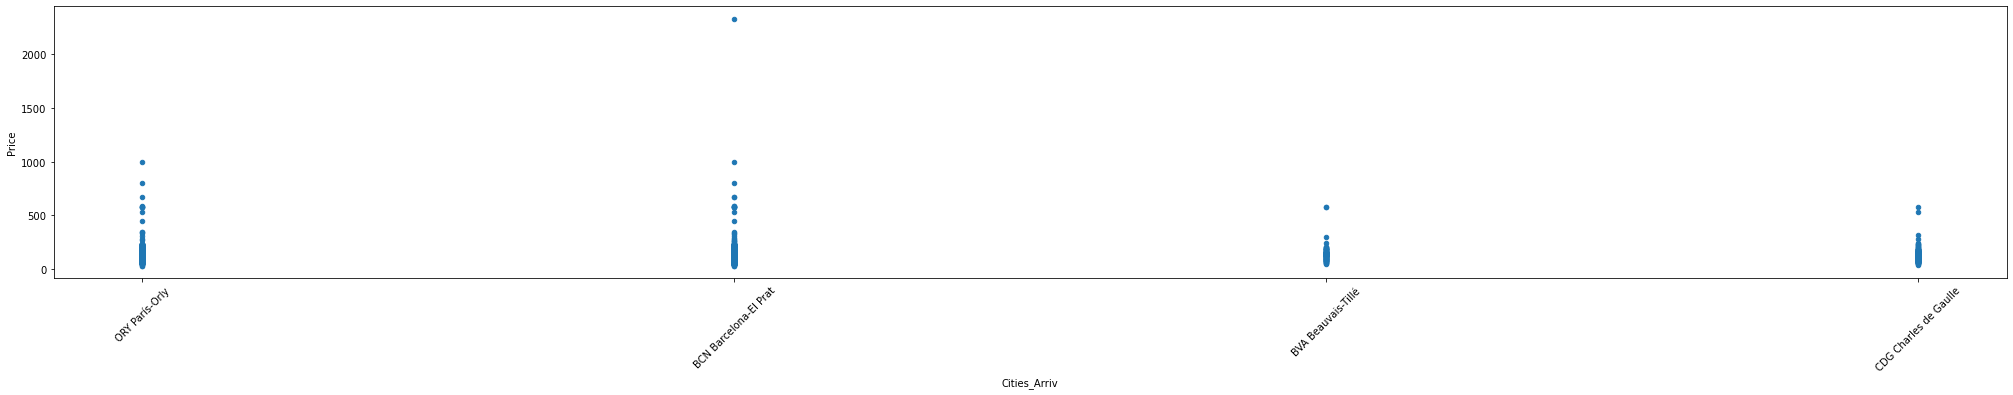

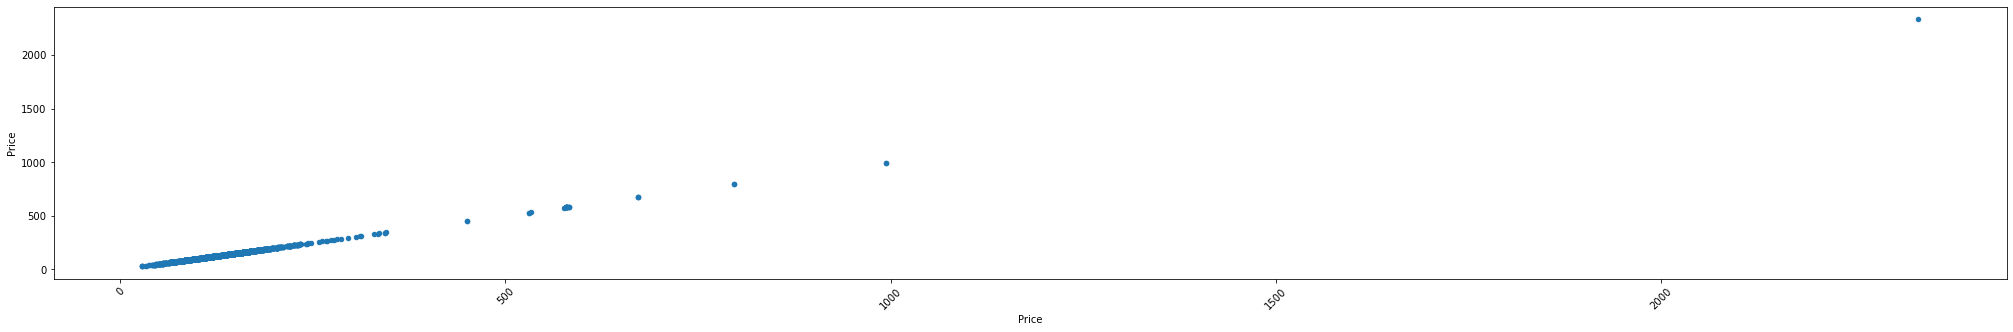

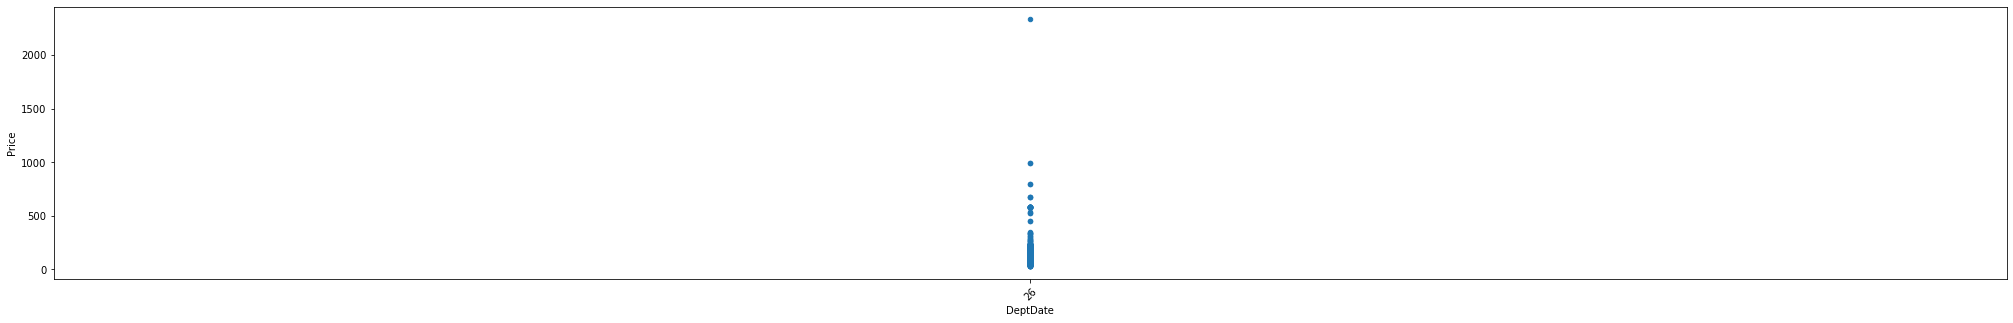

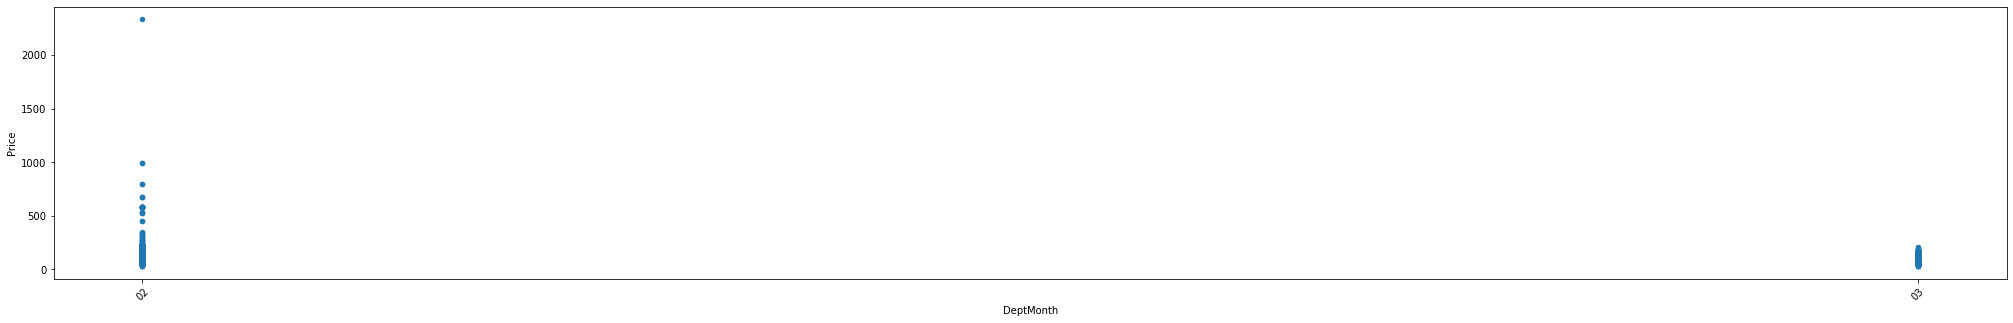

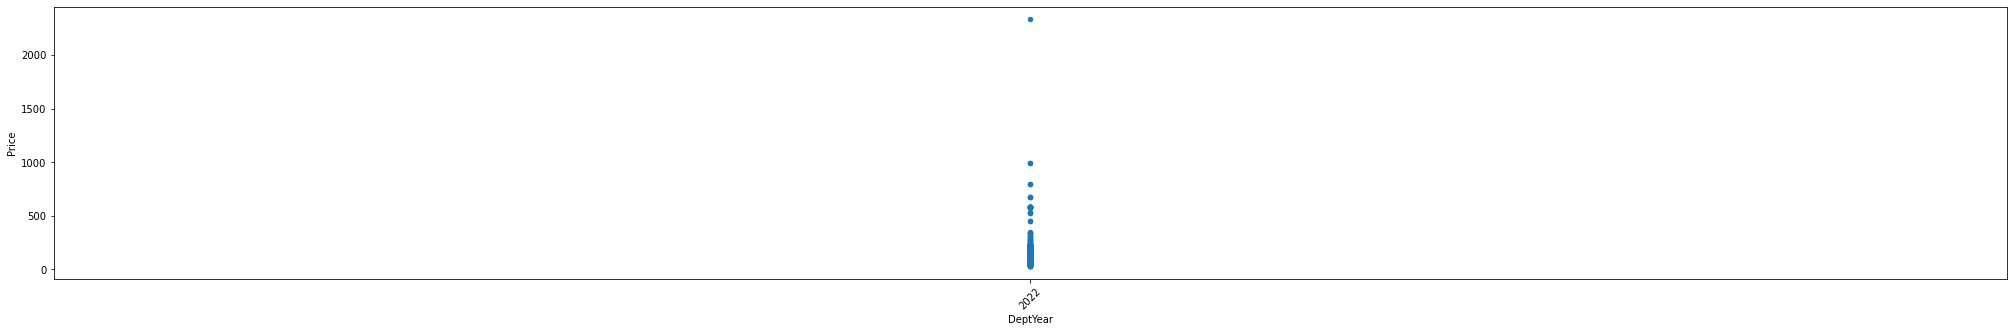

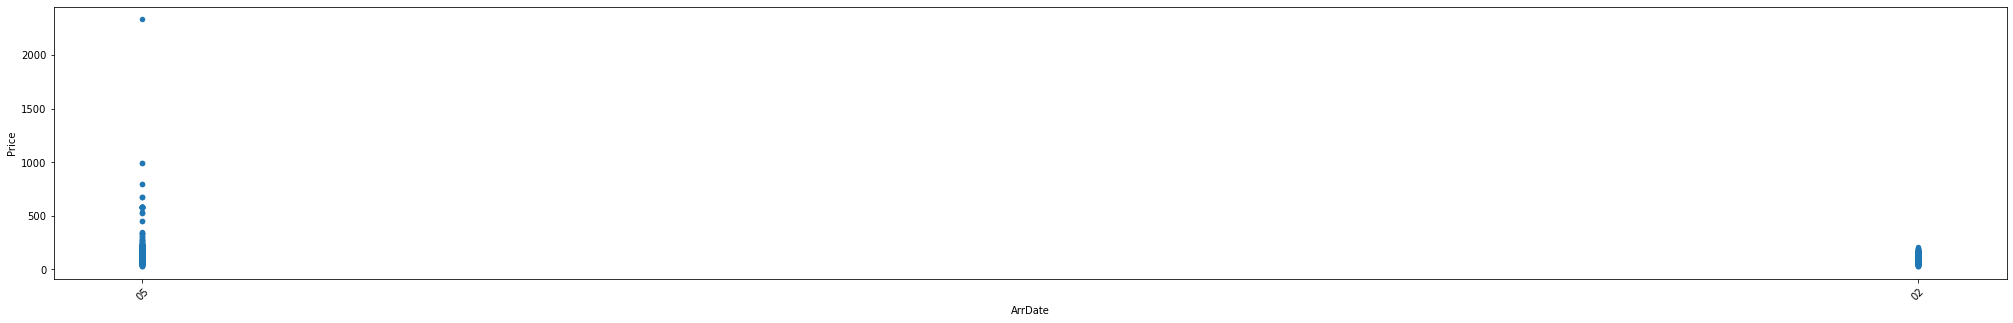

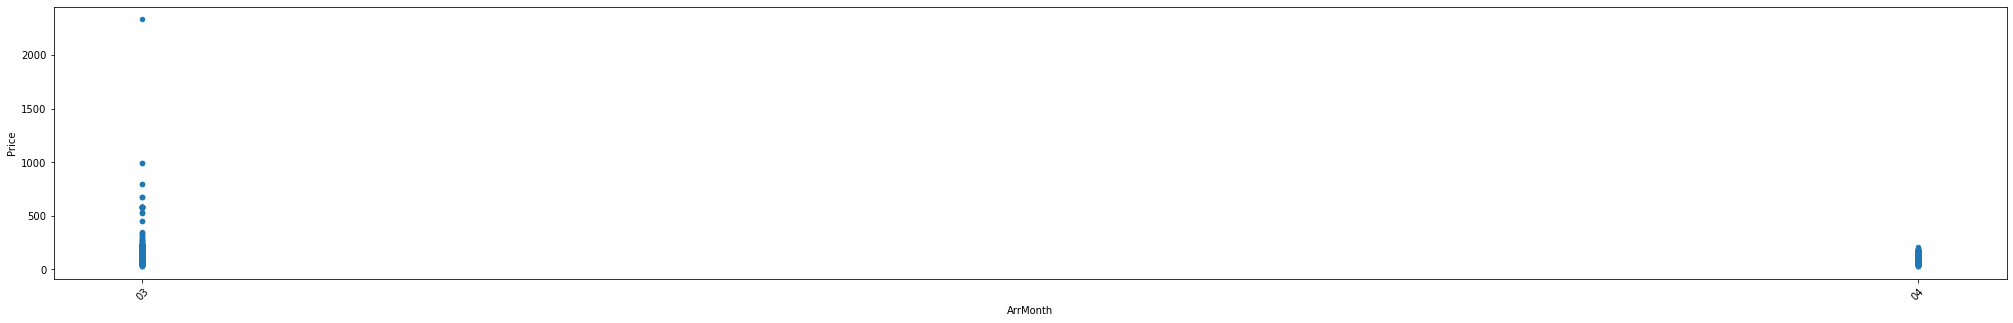

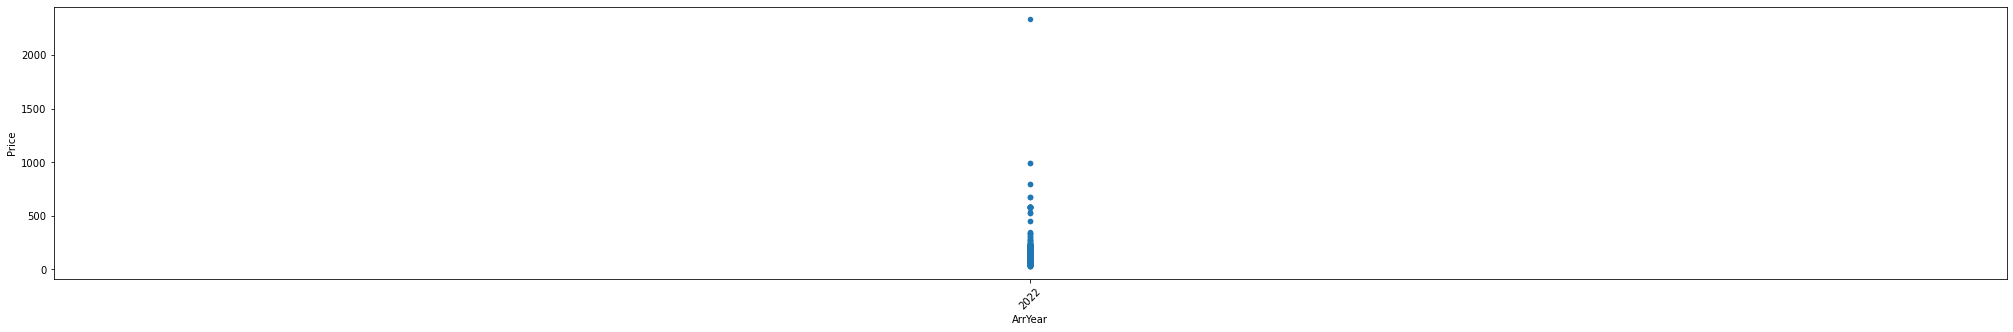

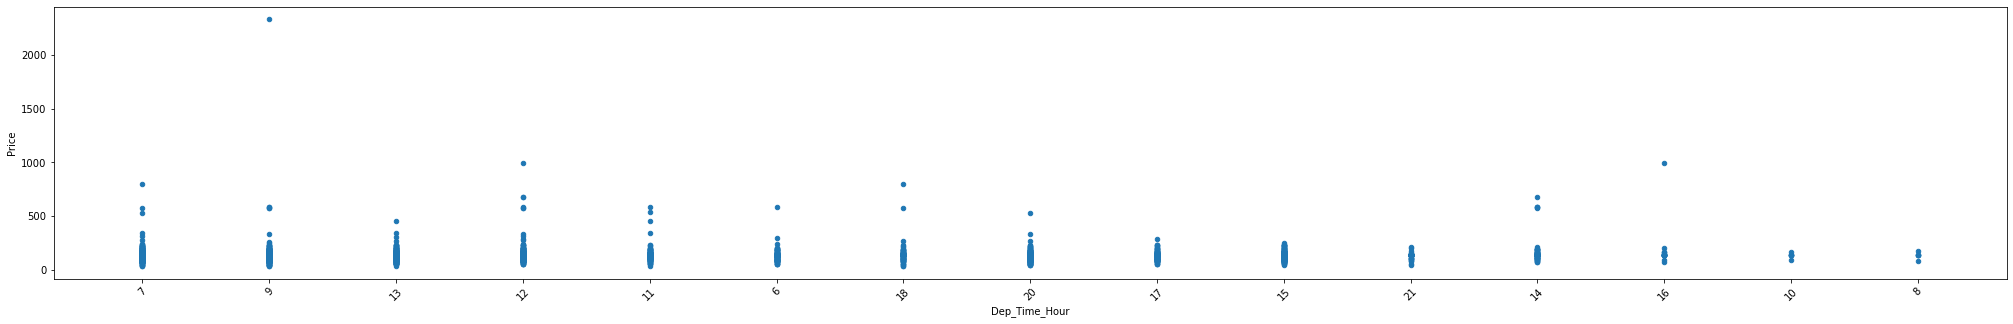

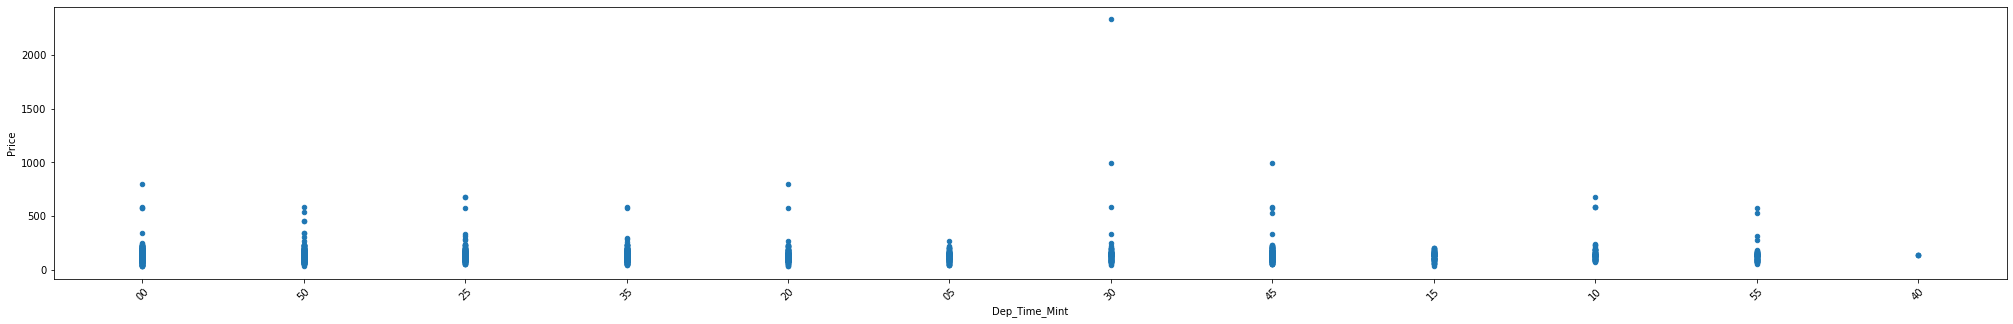

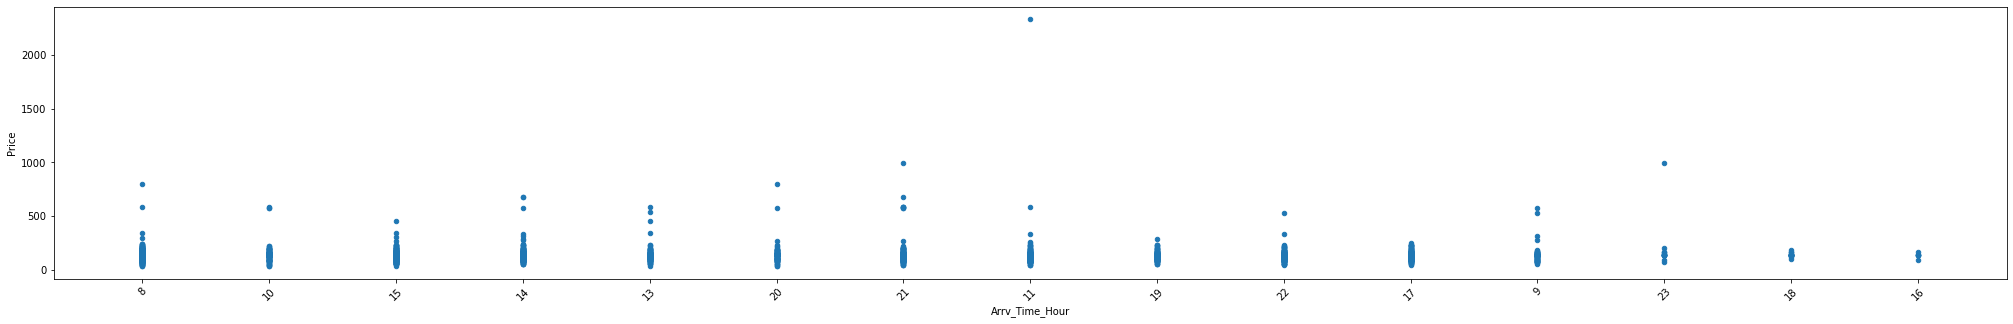

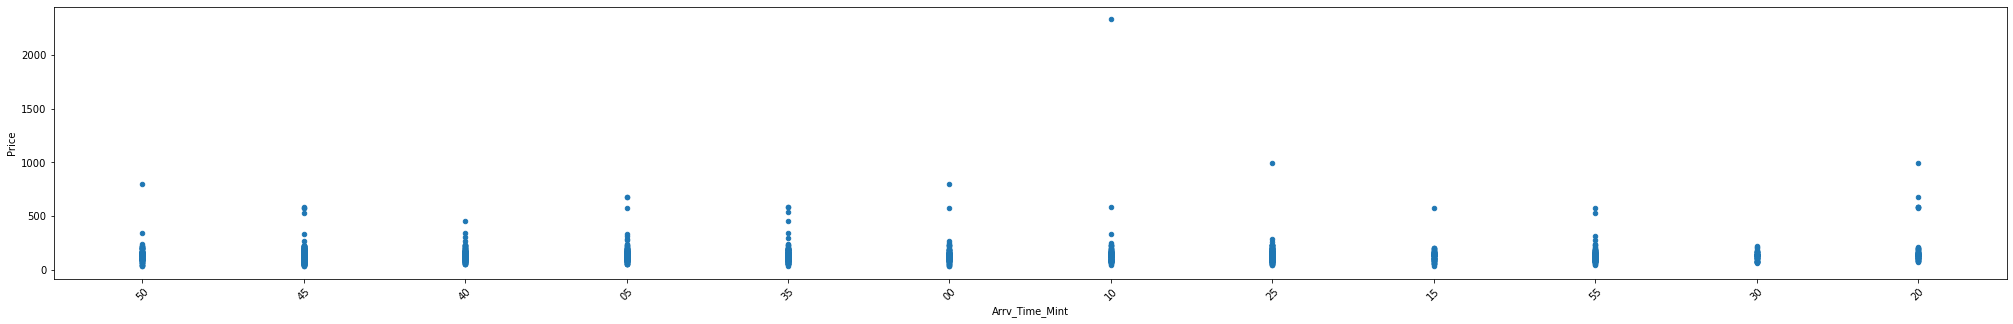

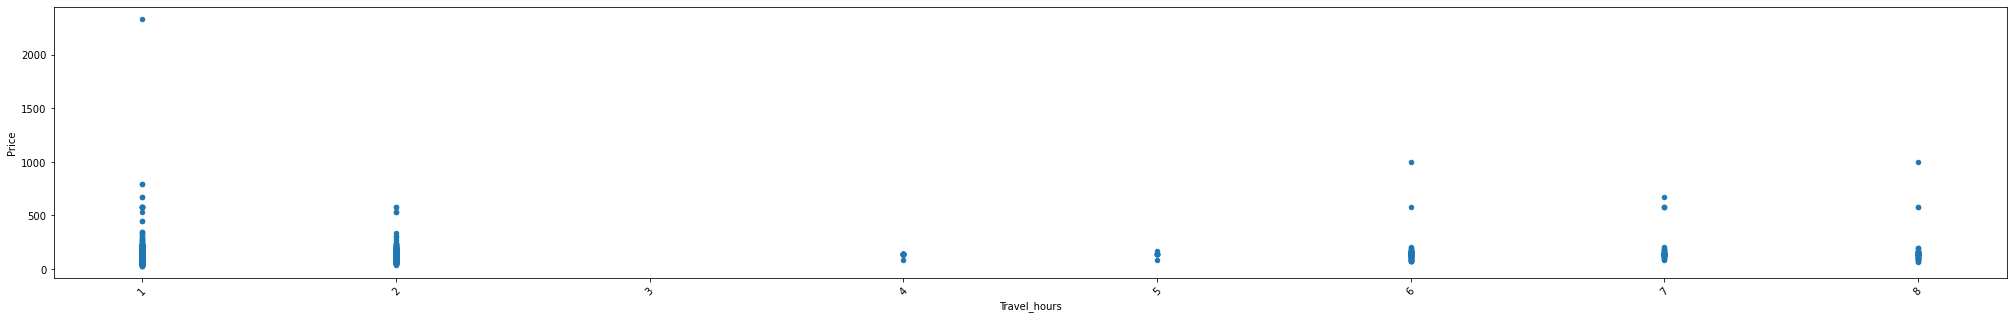

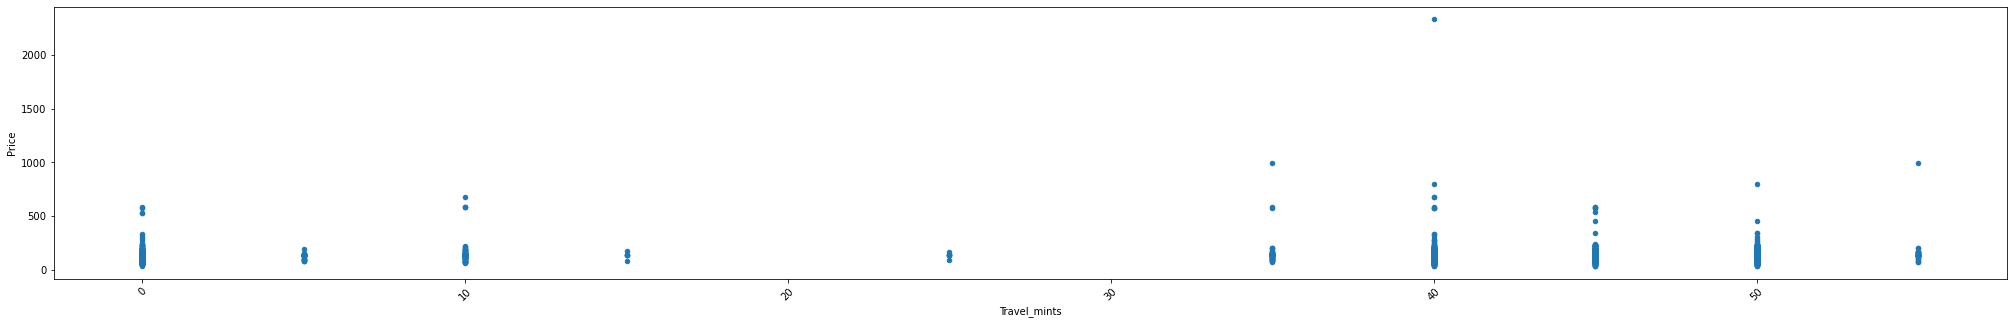

In [90]:
#plotting scatterplots regarding the realtion of prices with all columns except the ones that are list by itself as we have already columns having the same info:
#sns.scatterplot(data=df, x=col, y="Price")
for col in colsnotlist:
    print(df.plot(kind ="scatter", x= col, y = "Price", rot=45, figsize=(35,5)))

In the above plot we have see the same conclusions as previously mentioned.

<AxesSubplot:>

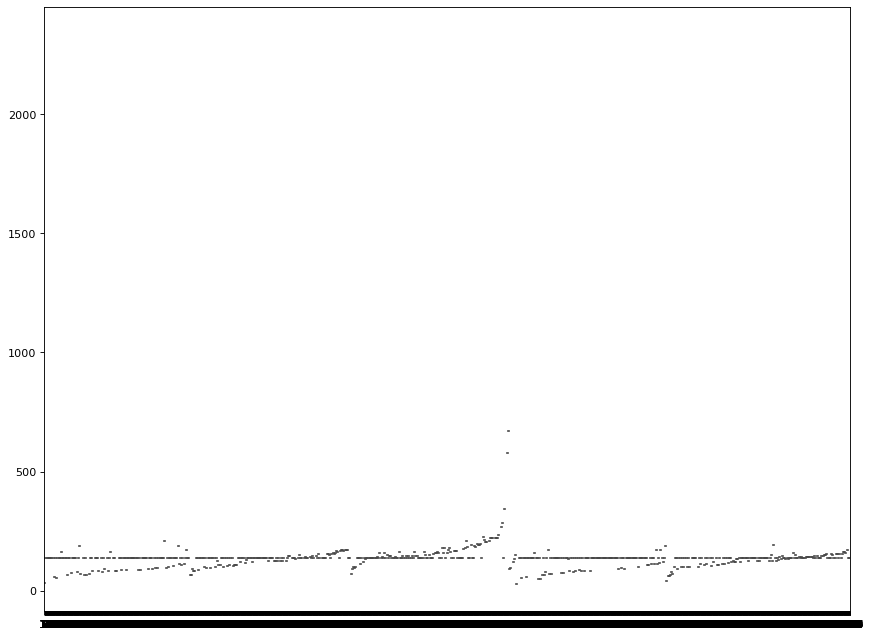

In [91]:
#plotting violin plot showing relation of Price itself 
plt.figure(figsize=(13,10), dpi= 80)
sns.violinplot(x=None, y=None, hue=None, data=df['Price'], scale='width', inner='quartile')

In [50]:
#label encoding the columns with object type data, which mean all columns except Price which is already an integer type:

from sklearn.preprocessing import LabelEncoder

for col in df.columns:
        if df[col].dtype == object:
            #df[col] = LabelEncoder().fit_transform(df[col])
            df[col] = LabelEncoder().fit_transform(df[col].astype(str))

In [51]:
#rechecking the datatype to make sure we have all features as integer including our target feature:
df.dtypes

Airline                int64
Time_dept              int64
Time_arrival           int64
Direct                 int64
Duration               int64
CitiesDept             int64
Cities_Arriv           int64
Price                  int64
dateDept               int64
dateArrv               int64
DeptDate               int64
DeptMonth              int64
DeptYear               int64
ArrDate                int64
ArrMonth               int64
ArrYear                int64
Dep_Time_Hour          int64
Dep_Time_Mint          int64
Arrv_Time_Hour         int64
Arrv_Time_Mint         int64
Travel_hours           int64
Travel_mints           int64
Duration_in_minutes    int64
dtype: object

<AxesSubplot:>

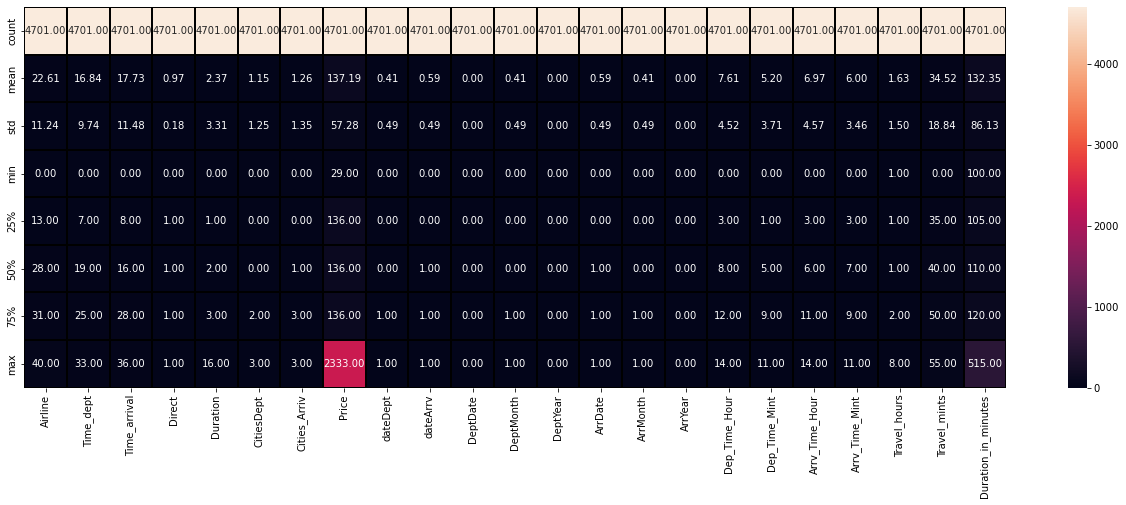

In [94]:
#statistical description of all numerical columns:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidth=0.1,linecolor="black",fmt="0.2f")

Here we can see and highlight the following considerations:
    
    - we have no missing values at this stage as the first row mentions total rows of dataframe we have in all our columns.
    - we have columns like Time_arrival, Duration, CitiesDept, Cities_Arrv,Price, dateDept, DeptMonth, ArrMonth, Dept_Time_Mint, Arrv_Time_Hour, Travel_hours and Duration_in_minutes which have higher mean than the median which hence means that we have right side skewed distribution in these features.
    - And DeptDate and DeptYear are non skewed data as there is only 1 unique value. The same happens with Arrival Year.
    - The remaining features have left side skewed distribution, which means mean is smaller than the median.
    - We have that all columns except Direct, Cities_Ariv, dateDept, dateArriv, Depttdate, DepatMonth, DeptYear, ArrDate, ArrMonth and ArrYear have outliers in them as the max is higher than the 75% percentile.

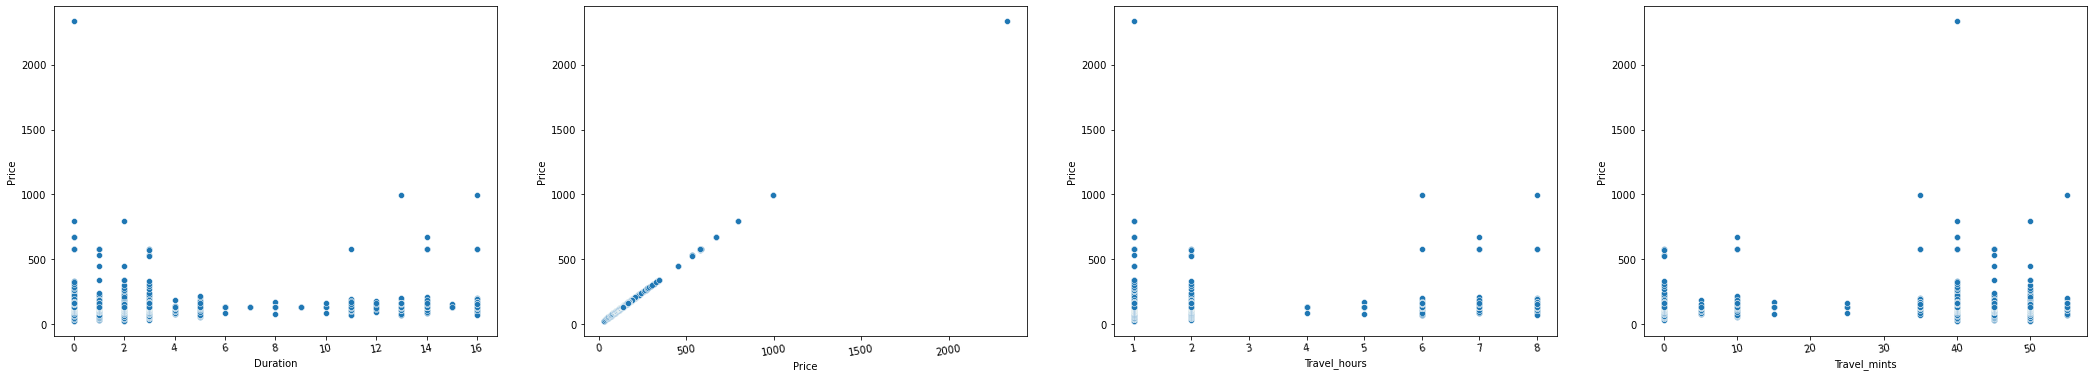

In [95]:
#Price scatterplot in relation to numerical data:
c=1
plt.figure(figsize=(30,45))
for i in numerical:
    plt.subplot(8,4,c)
    sns.scatterplot(x =df[i], y=df.Price)
    plt.xticks(rotation=10)
    plt.tight_layout(pad=4)
    c=c+1
plt.show()

Here above we can find that the only linear relationship we find is the one betwen price and Price dues to its 1x1 relation.

Regarding the remaining numerical features, we see no linear relation between price the the corresponding features.

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

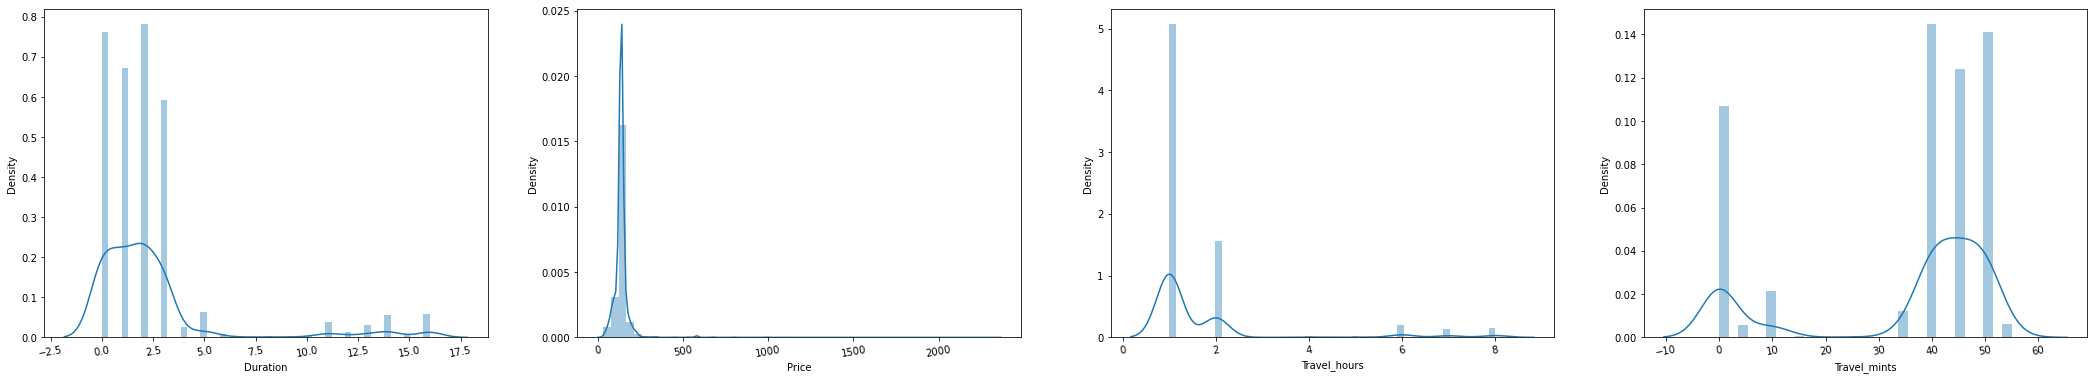

In [96]:
#Price displot in relation to numerical data:
plt.figure(figsize=(30,45))
c=1
for i in numerical:
    plt.subplot(8,4,c)
    sns.distplot(df[i])                                 #sns.scatterplot(x =df[i], y=df.Price)
    plt.xticks(rotation=10)
    plt.tight_layout(pad=4)
    c=c+1
plt.show()

We see that Duration seems to be between 0 to 2:30h.
Price seems to be between 0 and 250 euros per person.
Travel hours are mostly on the whole hour and happens to be mostly betwween 0 to 2 hours.
Travel minutes:The only thing that stands out is the travel minutes between 40 and 50 minutes are the most frequent ones. And in third place, we have flights whose travel minuts is 00.


/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

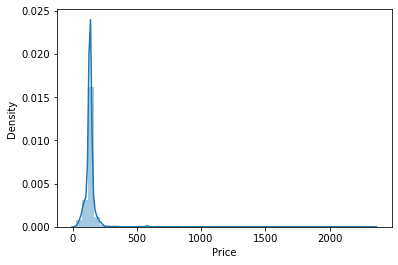

In [97]:
#Distibution of ‘Price’ column:
sns.distplot(df.Price)

Regarding the price target, the majority of the flights have price range between around 0-250 euros and then the flights decreses substantially after the price range over 250. Flights having prices greater than 20k are quite less. Price range is skewed towards right. As we said earlier in the analisis, we have right skewness in the target price.
We will now compare several independent features with ‘Price’ column to check their impact:

In [98]:
#defining the plot function including displot and boxplot:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


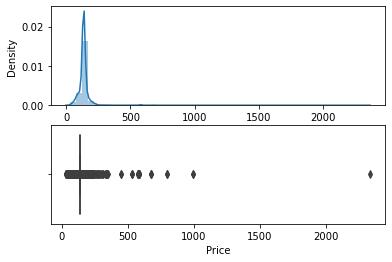

In [99]:
#let's plot 'Price':
plot(df,'Price')

If we check density, as we said, we have range of 0 and 260 euros. And exepceptionally we have price of 2k. So, the distribution has right skewness.
And then, if we check boxplot, we see a median on around 9k which means outliers taking place between 100 euros and 120 euros are impacting way more than the other cases.

In [100]:
#columns
df.columns

Index(['Airline', 'Time_dept', 'Time_arrival', 'Direct', 'Duration',
       'CitiesDept', 'Cities_Arriv', 'Price', 'dateDept', 'dateArrv',
       'DeptDate', 'DeptMonth', 'DeptYear', 'ArrDate', 'ArrMonth', 'ArrYear',
       'Dep_Time_Hour', 'Dep_Time_Mint', 'Arrv_Time_Hour', 'Arrv_Time_Mint',
       'Travel_hours', 'Travel_mints', 'Duration_in_minutes'],
      dtype='object')

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


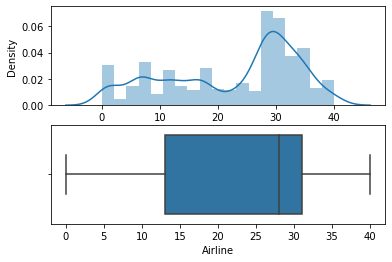

In [101]:
#plotting displot and boxplot of column Airline:
plot(df,'Airline')

Here we can see few airlines like Vueling and Ryanair have more number of flights offered than others. Also few combos like Vueling and Air France.

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

None
None


/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

None
None


/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misint

None
None


/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

None
None


/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misint

None
None


/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

None


/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

None
None


/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

None
None


/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorato

None
None


/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misint

None
None


/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misint

None
None


/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

None
None


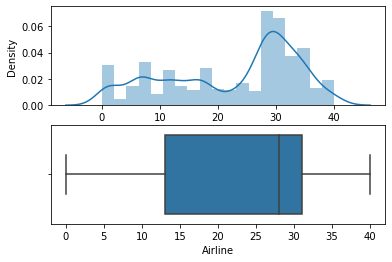

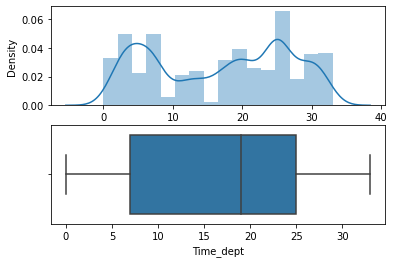

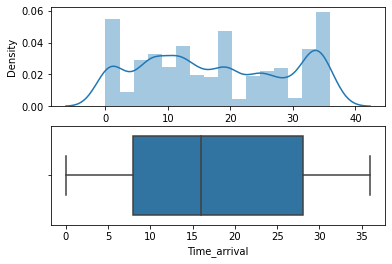

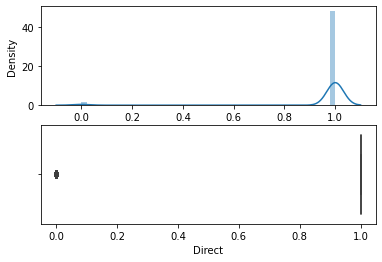

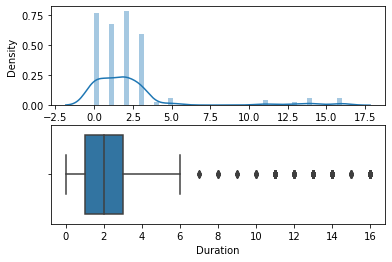

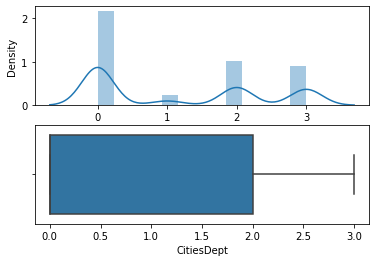

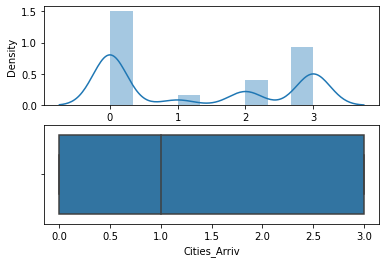

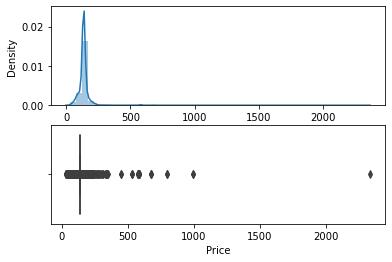

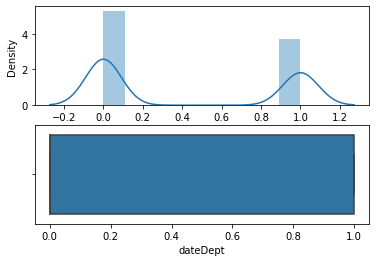

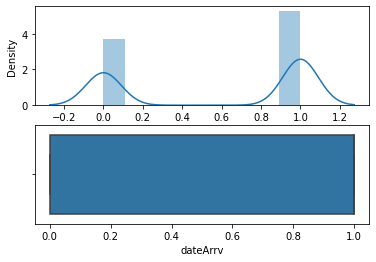

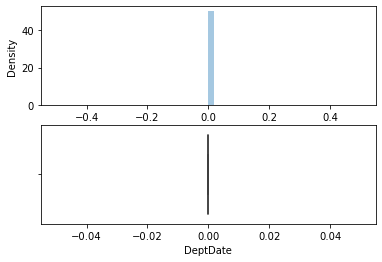

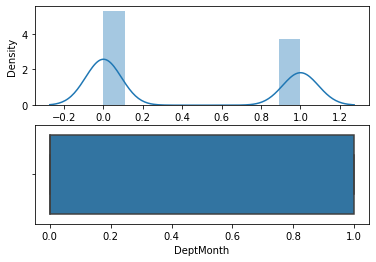

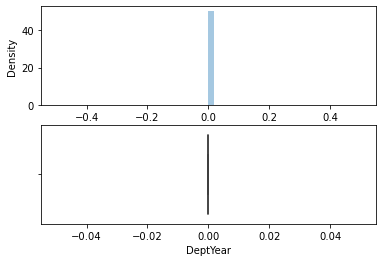

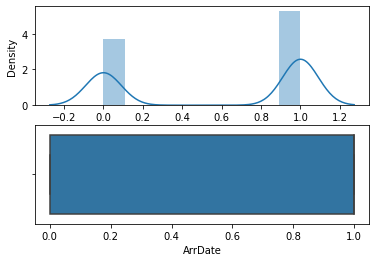

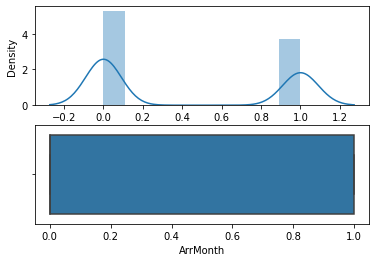

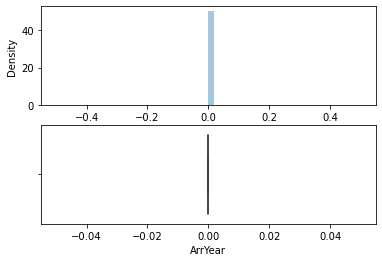

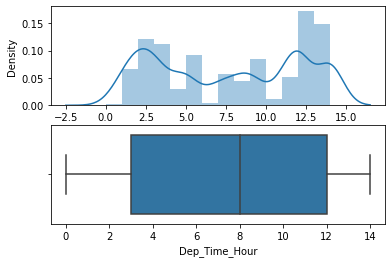

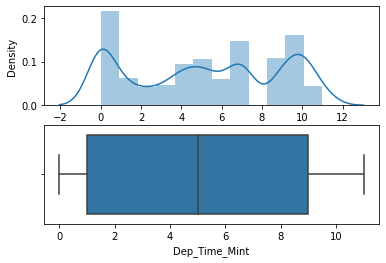

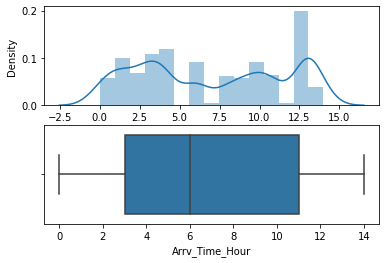

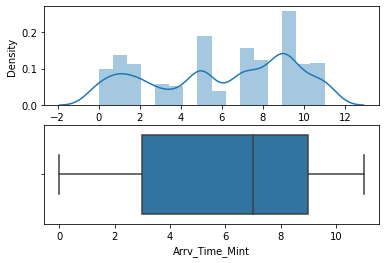

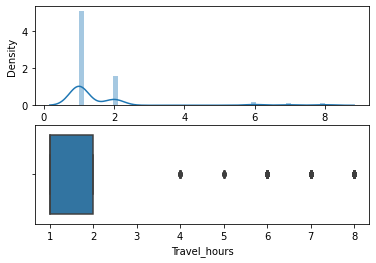

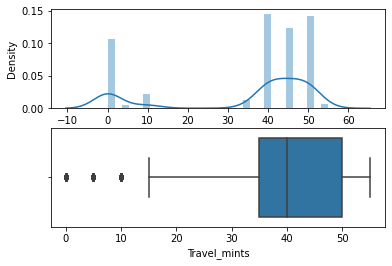

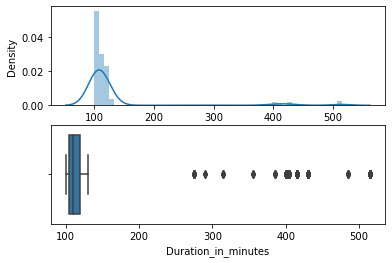

In [102]:
#plotting displot and boxplot of all column:
for col in df.columns:
    print(plot(df,col))

As we previously said, here we can easily notice that some columns have right side skewed data distributions and other left sided:
We have columns like Time_arrival, Duration, CitiesDept, Cities_Arrv,Price, dateDept, DeptMonth, ArrMonth, Dept_Time_Mint, Arrv_Time_Hour, Travel_hours and Duration_in_minutes which have right side skewed distribution in these features.
    - And DeptDate and DeptYear are non skewed data as there is only 1 unique value. The same happens with Arrival Year.
    - The remaining features have left side skewed distribution,as we easily can see in the above distribution plots.
 
Here in the boxplot, we can see we have that all columns except Direct, Cities_Ariv, dateDept, dateArriv, Depttdate, DepatMonth, DeptYear, ArrDate, ArrMonth and ArrYear have outliers in them as the max is higher than the 75% percentile.

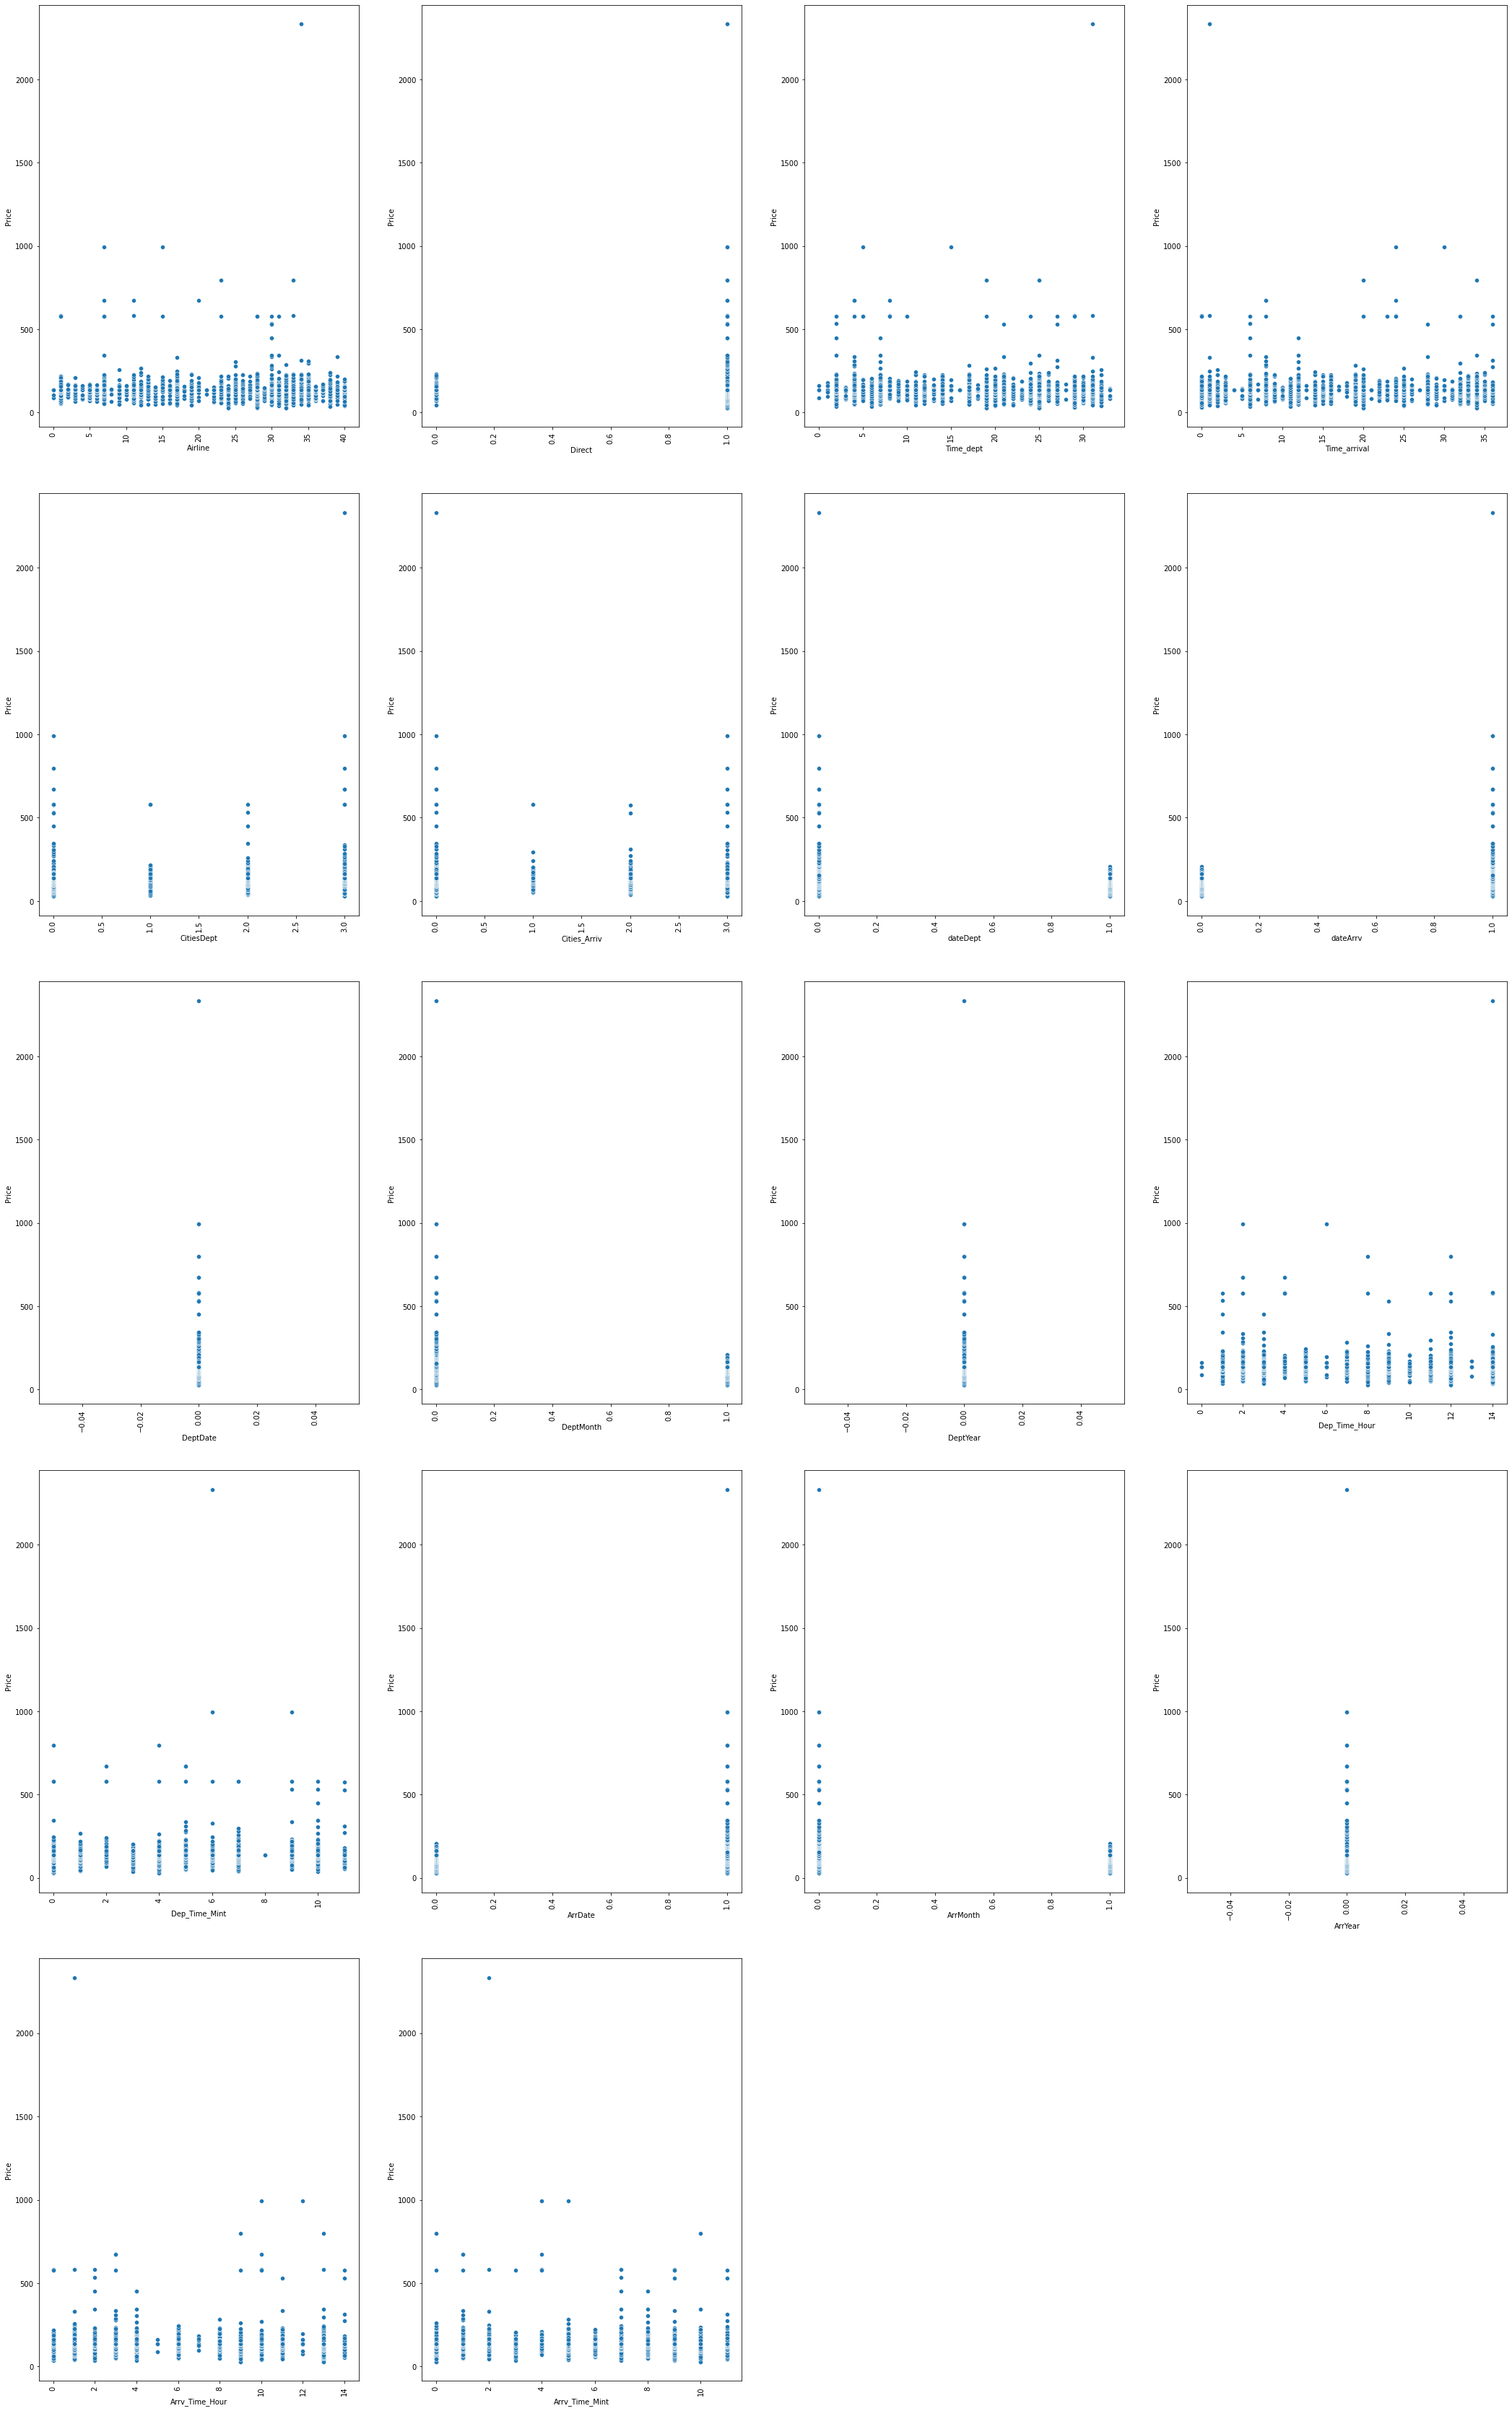

In [103]:
#checking the realtion of prices with categorical data:


c=1
plt.figure(figsize=(30,75))
for i in categorical_data:
    plt.subplot(8,4,c)
    sns.scatterplot(x =df[i], y=df.Price)
    plt.xticks(rotation=90)
    plt.tight_layout(pad=4)
    c=c+1
plt.show()

IMPORTANT CONCLUSIONS: So, let's comments the categorical data we have with regards our target data:
- we have different type of occurance of flights of differents airlines, hence the prices varies depending if the choosed flight is a combo or not.
- Departure flighted date is stable 
- we have more direct flights than flights with a stop. Here we can see the direct flight has more variance in the flight price than the flight with a stop. Maybe the case that we have unbalance data if we check as per direct or not direct flights.
- When checking the price by departure time and by arrival time, we see we have a huge variance in the price depending on the departure and arrival time.
- When checking flight prices by the Cities of departure or Arrival cities, we see the cities airport which gets most of the flights has a greater variance of prices compared with other airports.
- As we said, when checking the departure date and arrival date, we may have found that nearest flights has more offer than flights that are planned to be taken later. Which also means at the same time, that the prices will have greater variance for flights that will be flown earlier than flights that will depart or arrive  few days or months later.
- The airline flight price gets lower or higher price depending on the time, hour and minute it is taken from the airport. :)

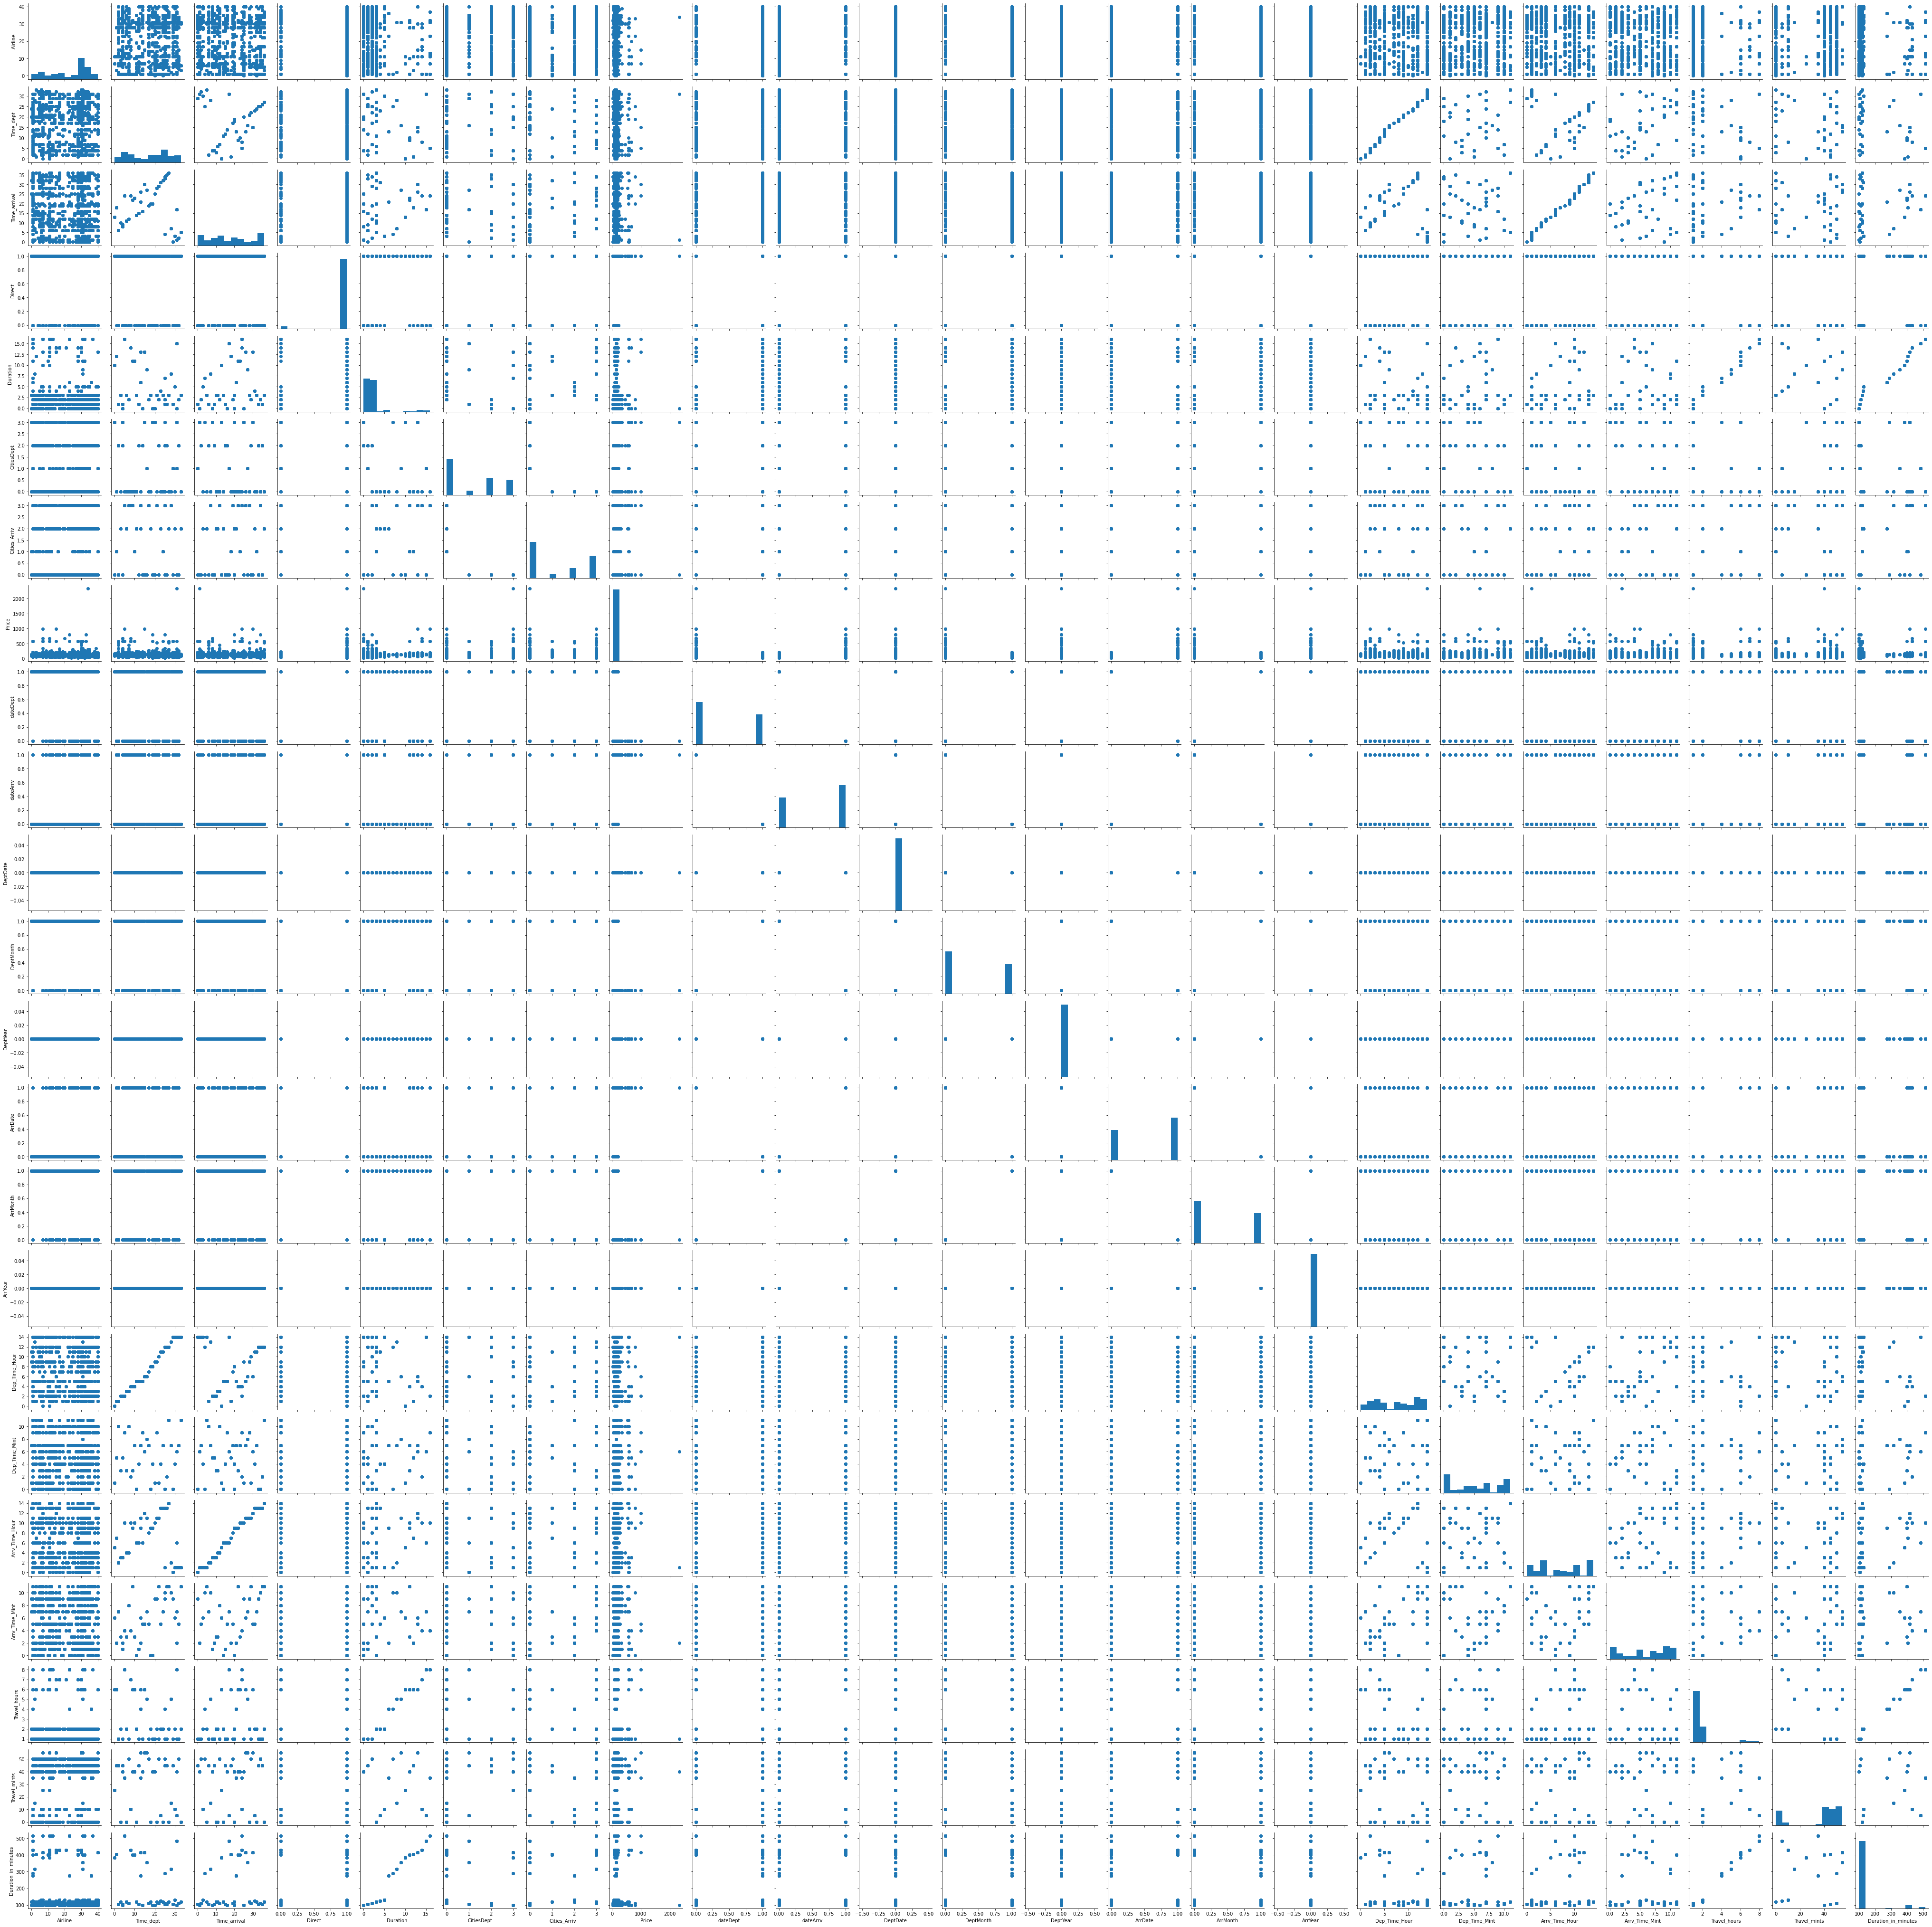

In [104]:
#plotting all columns against all columns
g = sns.PairGrid(df)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

Here in the above scatter plots, we can easily notice that alongside the feature itself, the features that are related (like dept time or dept hour) will have a considerable linear relationship meanwhile others not related with themselves have non linear relationship.

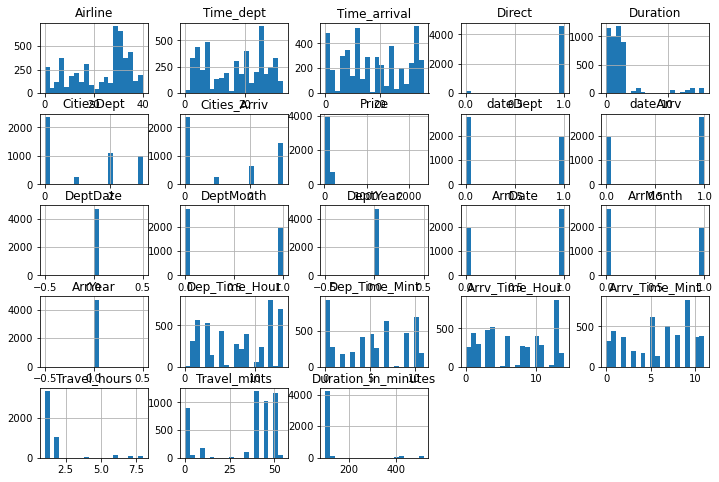

In [105]:
#Distributions of the variables/features.
df.hist(figsize=(12,8),bins=20)
plt.show()

In the above barplots, we can easily see we have skewed data in almost all our features including Price.

<AxesSubplot:>

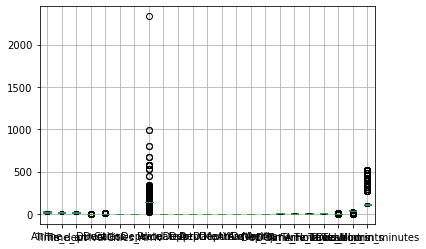

In [106]:
#We now plot boxplots to check the presence of outliers in our data
df.boxplot()


<AxesSubplot:>

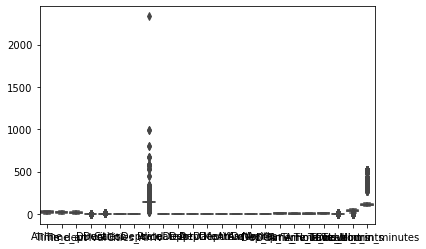

In [107]:
sns.boxplot(data=df)

The previous 2 boxplots of all dataframe is not useful for our visualation purposes. So, let's try again boxplotting all the columns one by one:

Airline                   AxesSubplot(0.125,0.749828;0.0824468x0.130172)
Time_dept              AxesSubplot(0.223936,0.749828;0.0824468x0.130172)
Time_arrival           AxesSubplot(0.322872,0.749828;0.0824468x0.130172)
Direct                 AxesSubplot(0.421809,0.749828;0.0824468x0.130172)
Duration               AxesSubplot(0.520745,0.749828;0.0824468x0.130172)
CitiesDept             AxesSubplot(0.619681,0.749828;0.0824468x0.130172)
Cities_Arriv           AxesSubplot(0.718617,0.749828;0.0824468x0.130172)
Price                  AxesSubplot(0.817553,0.749828;0.0824468x0.130172)
dateDept                  AxesSubplot(0.125,0.593621;0.0824468x0.130172)
dateArrv               AxesSubplot(0.223936,0.593621;0.0824468x0.130172)
DeptDate               AxesSubplot(0.322872,0.593621;0.0824468x0.130172)
DeptMonth              AxesSubplot(0.421809,0.593621;0.0824468x0.130172)
DeptYear               AxesSubplot(0.520745,0.593621;0.0824468x0.130172)
ArrDate                AxesSubplot(0.619681,0.59362

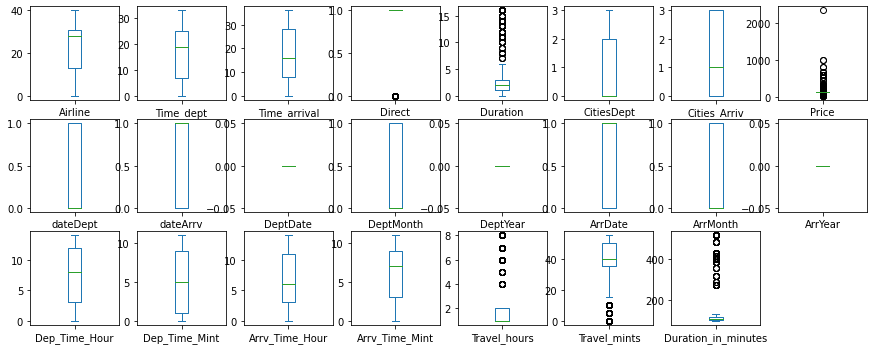

In [108]:
#plotting the boxplot for each column in order to check the outliers 
df.plot(kind='box',subplots = True,layout=(5,8),figsize = (15,10))

As we have already seen several times in our previous boxplots, we have many outliers in several features columns such as:

- Direct, Duration, Price, Travel_hours, Travel_minutes and Duration in minutes.

But from here we can conclude the following as we have the whole picture of all the outliers: Depends on the proportion of the outliers with regards the whole data, we can or can not remove. And also we need to mention is the following:

- We will not remove outliers like from total stops since price is impacted by number of stops.
- Happens the same high hours of travel, it impacts more as long as the hours get increased.

This column Year has only 2022 as a value and can be dropped it.

In [52]:
#we see presence of outliers and skewness in the above grafs. so, let's go and select numerical columns and check their corresponding skewness:
nf = df.select_dtypes(include=[np.number]).columns
nf

Index(['Airline', 'Time_dept', 'Time_arrival', 'Direct', 'Duration',
       'CitiesDept', 'Cities_Arriv', 'Price', 'dateDept', 'dateArrv',
       'DeptDate', 'DeptMonth', 'DeptYear', 'ArrDate', 'ArrMonth', 'ArrYear',
       'Dep_Time_Hour', 'Dep_Time_Mint', 'Arrv_Time_Hour', 'Arrv_Time_Mint',
       'Travel_hours', 'Travel_mints', 'Duration_in_minutes'],
      dtype='object')

In [53]:
#let's check skewness
from scipy.stats import skew
df=df
skew_list = skew(df[nf],nan_policy='omit') #sending all numericalfeatures and omitting nan values
skew_list_df = pd.concat([pd.DataFrame(nf,columns=['Features']),pd.DataFrame(skew_list,columns=['Skewness'])],axis = 1)

In [54]:
skew_list_df.sort_values(by='Skewness', ascending = False)

Features   Skewness
7                 Price  16.364377
22  Duration_in_minutes   3.443258
20         Travel_hours   3.090602
4              Duration   2.803687
5            CitiesDept   0.359362
14             ArrMonth   0.348505
8              dateDept   0.348505
11            DeptMonth   0.348505
6          Cities_Arriv   0.287093
2          Time_arrival   0.095988
18       Arrv_Time_Hour   0.058136
16        Dep_Time_Hour   0.000982
10             DeptDate   0.000000
12             DeptYear   0.000000
15              ArrYear   0.000000
17        Dep_Time_Mint  -0.069982
1             Time_dept  -0.118734
19       Arrv_Time_Mint  -0.303816
9              dateArrv  -0.348505
13              ArrDate  -0.348505
0               Airline  -0.521070
21         Travel_mints  -1.095607
3                Direct  -5.175707

We have some skewness in our data!

In [55]:
#there shouldnt be any, but checking in case for categorical data of object type:
cf = df.select_dtypes(include=[np.object]).columns

cf

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Index([], dtype='object')

In [56]:
#let's check again dtypes of all columns as all of them should be integer type:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4701 entries, 0 to 1946
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Airline              4701 non-null   int64
 1   Time_dept            4701 non-null   int64
 2   Time_arrival         4701 non-null   int64
 3   Direct               4701 non-null   int64
 4   Duration             4701 non-null   int64
 5   CitiesDept           4701 non-null   int64
 6   Cities_Arriv         4701 non-null   int64
 7   Price                4701 non-null   int64
 8   dateDept             4701 non-null   int64
 9   dateArrv             4701 non-null   int64
 10  DeptDate             4701 non-null   int64
 11  DeptMonth            4701 non-null   int64
 12  DeptYear             4701 non-null   int64
 13  ArrDate              4701 non-null   int64
 14  ArrMonth             4701 non-null   int64
 15  ArrYear              4701 non-null   int64
 16  Dep_Time_Hour        470

We can see that, all 23 columns are of numeric data types. Out of 23 variables, 22 are predictor variables and the one 'Price' is the target variable. The dataset is fine since there are no null values and all data is in type numerical integer type. So, let's move forward!



In [57]:
#no null values:
df.isnull().sum()

Airline                0
Time_dept              0
Time_arrival           0
Direct                 0
Duration               0
CitiesDept             0
Cities_Arriv           0
Price                  0
dateDept               0
dateArrv               0
DeptDate               0
DeptMonth              0
DeptYear               0
ArrDate                0
ArrMonth               0
ArrYear                0
Dep_Time_Hour          0
Dep_Time_Mint          0
Arrv_Time_Hour         0
Arrv_Time_Mint         0
Travel_hours           0
Travel_mints           0
Duration_in_minutes    0
dtype: int64

<AxesSubplot:>

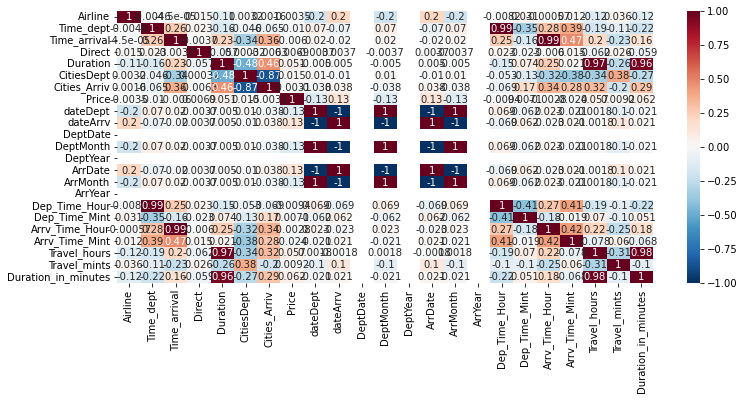

In [58]:
#Corelation between features/variables:
correlation = df.corr()
plt.figure(figsize=(12, 5))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

<AxesSubplot:>

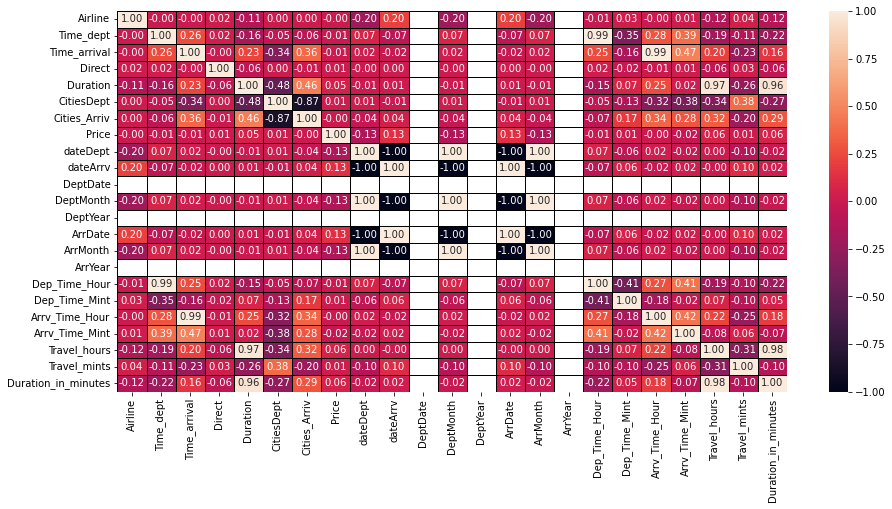

In [59]:
#Correlation using heatmap:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="black",fmt='.2f')

<AxesSubplot:>

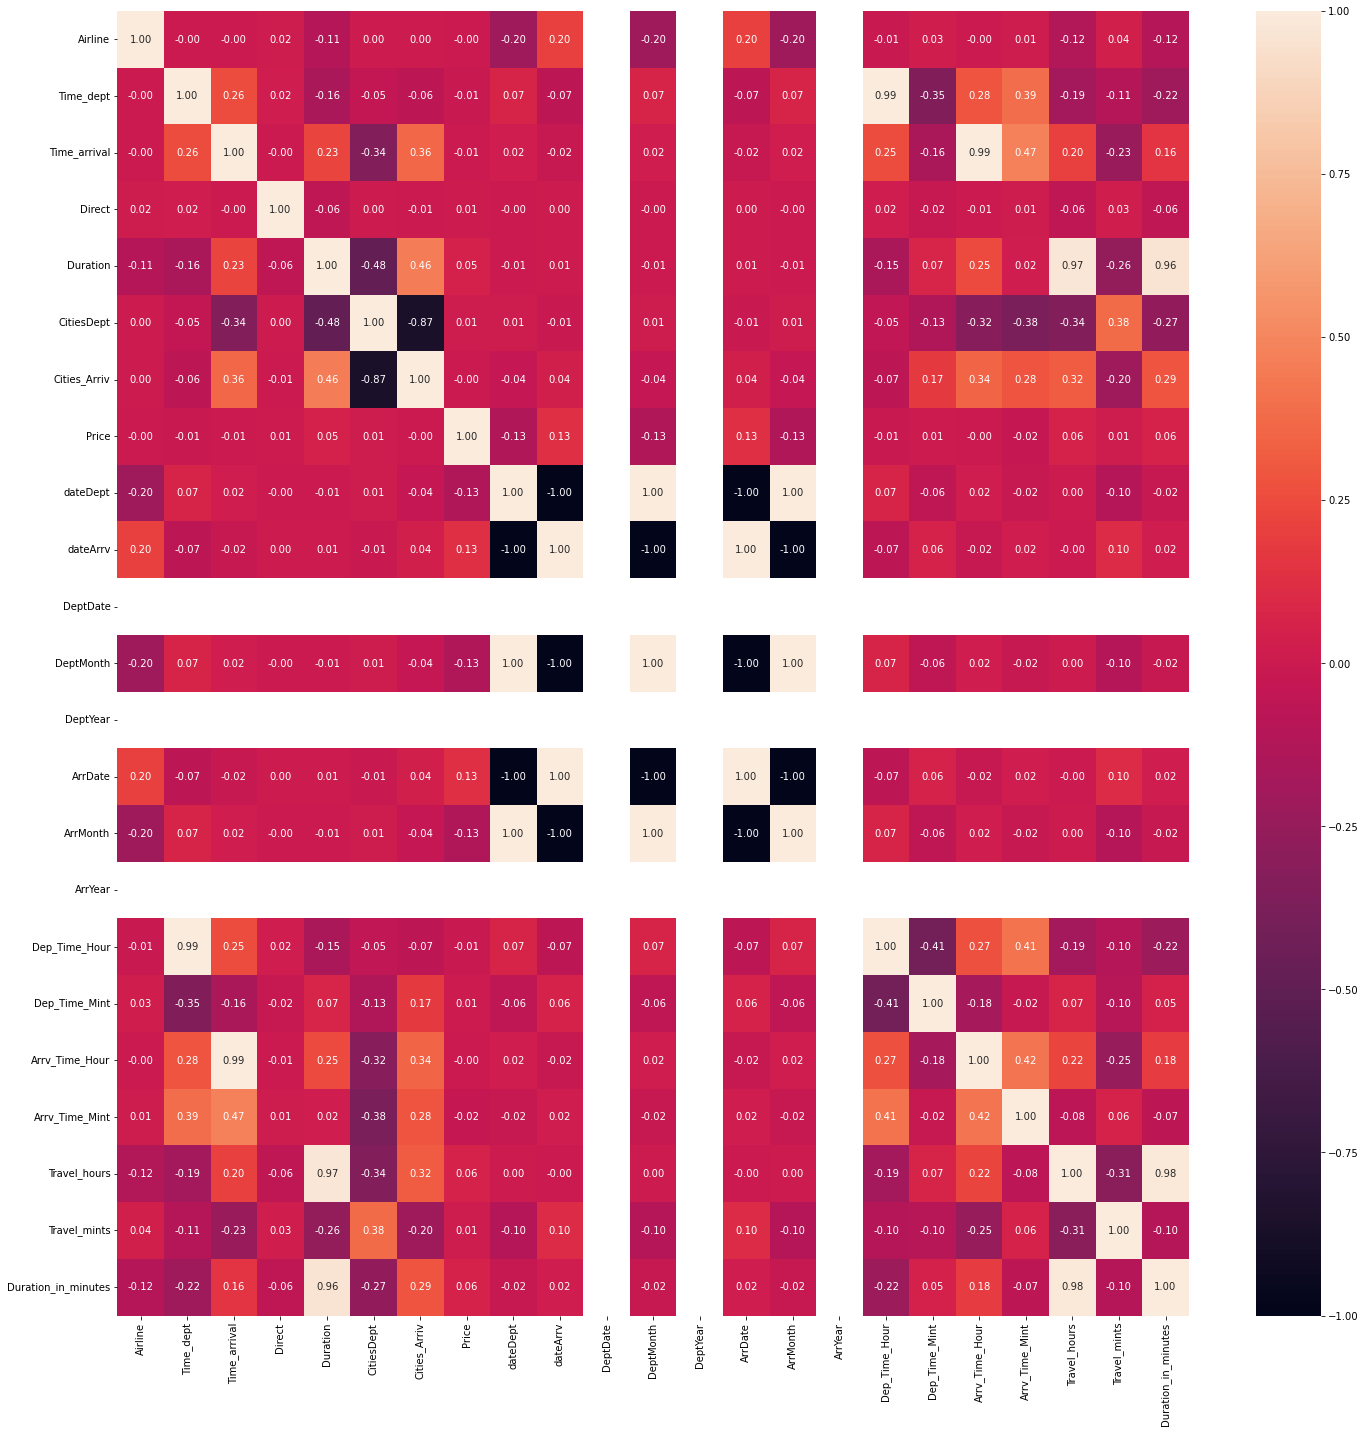

In [60]:
#Get the correlation of the columns
df.corr()
#Visualize the correlation
plt.figure(figsize=(24,24))  
sns.heatmap(df.corr(), annot=True, fmt='.2f')

Regarding the target Price, we see the features that are highly correlated with it are the Departure and Arrival Date. 

We also see that:

- Departue city and Ariival city are highly correlated with Duration and Arriva Time.

- We also see the departure City and arrival city are also very highly correllated.

- We see departure time  is almost fully correlated with departure time hour. And same happens with Arrival case, we see arrival time  is almost fully correlated with Arrival time hour.

- And as it is expected, travel hours is almost fully correlated with duration in minutes and the same time these are almost fully correlated with duration.


Let's now check plot of the correlation of the features with regards the target feature in the following code:

<AxesSubplot:>

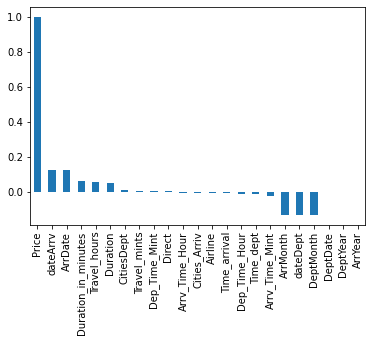

In [61]:
#correlation of independent features with regards the target "Price"
correlations =df.corr()['Price'].sort_values(ascending=False)
correlations.plot(kind='bar')

As we can see,  departure date and Arrival date have the most impact on our Price target feature. And in third place, we have Duration in minutes, Travel hours and Duration which has considerable impact on our target Price.

After the above analysis, we drop the non-required columns, which we feel have no impact on prices of flights. These columns include all the splits from the date and time of the flights.


Now let's check the features that has most impact on price:

In [62]:
correlations[abs(correlations) > 0.1]

Price        1.000000
dateArrv     0.128731
ArrDate      0.128731
ArrMonth    -0.128731
dateDept    -0.128731
DeptMonth   -0.128731
Name: Price, dtype: float64

As we said, we have departure date, Arrival date as the main 2 independent features that impacts the most on the Price of the flights.

In [63]:
df.columns

Index(['Airline', 'Time_dept', 'Time_arrival', 'Direct', 'Duration',
       'CitiesDept', 'Cities_Arriv', 'Price', 'dateDept', 'dateArrv',
       'DeptDate', 'DeptMonth', 'DeptYear', 'ArrDate', 'ArrMonth', 'ArrYear',
       'Dep_Time_Hour', 'Dep_Time_Mint', 'Arrv_Time_Hour', 'Arrv_Time_Mint',
       'Travel_hours', 'Travel_mints', 'Duration_in_minutes'],
      dtype='object')

In [64]:
#Checking the outliers and removing them:
from scipy.stats import zscore
import numpy as np
df=df
z=np.abs(zscore(df))
z.shape

(4701, 23)

In [65]:
threhold=3
print(np.where(z>3))

(array([ 176,  176,  176,  177,  178,  178,  178,  180,  182,  182,  182,
        182,  184,  184,  184,  186,  186,  186,  186,  188,  188,  188,
        188,  191,  191,  192,  192,  192,  192,  194,  194,  194,  194,
        196,  196,  196,  196,  198,  200,  202,  204,  204,  204,  208,
        208,  378,  383,  386,  386,  386,  387,  388,  388,  388,  389,
        390,  392,  392,  392,  393,  394,  394,  394,  395,  396,  396,
        396,  397,  398,  398,  398,  401,  401,  402,  402,  402,  404,
        404,  404,  406,  406,  406,  408,  410,  412,  414,  414,  414,
        418,  418,  579,  584,  588,  590,  594,  596,  596,  596,  596,
        598,  598,  598,  598,  600,  602,  602,  602,  604,  604,  604,
        606,  606,  606,  608,  608,  608,  611,  611,  612,  612,  612,
        614,  614,  614,  616,  616,  616,  618,  620,  622,  624,  624,
        624,  628,  628,  780,  785,  789,  791,  795,  797,  799,  806,
        806,  806,  808,  808,  808,  810,  812,  

In [66]:
#checking the dataset shape (with outliers and without outliers)
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(4701, 23)
(0, 23)


In [77]:
#Percentage of data loss:
loss_perc=1*100
loss_perc #since the loss is 100%, so we cant proceed with removing the outliers.

100

In [78]:
df_new.columns

Index(['Airline', 'Time_dept', 'Time_arrival', 'Direct', 'Duration',
       'CitiesDept', 'Cities_Arriv', 'Price', 'dateDept', 'dateArrv',
       'DeptDate', 'DeptMonth', 'DeptYear', 'ArrDate', 'ArrMonth', 'ArrYear',
       'Dep_Time_Hour', 'Dep_Time_Mint', 'Arrv_Time_Hour', 'Arrv_Time_Mint',
       'Travel_hours', 'Travel_mints', 'Duration_in_minutes'],
      dtype='object')

In [79]:
df_new

Airline  Time_dept  Time_arrival  Direct  Duration  CitiesDept  \
0          32         25            34       1         2           0   
1          32         29             0       1         1           1   
2          28          7            12       1         2           0   
3          28         29             0       1         1           1   
4          13         25            34       1         2           0   
...       ...        ...           ...     ...       ...         ...   
1942        5         27            36       1         3           0   
1943        6         25            33       1         1           2   
1944       31         30             3       1         5           0   
1945        6          4             8       1         0           3   
1946        2         11            14       1         3           0   

      Cities_Arriv  Price  dateDept  dateArrv  ...  ArrDate  ArrMonth  \
0                3     29         0         1  ...        1         0   
1                0     34         0         1  ...        1         0   
2                3    136         0         1  ...        1         0   
3                0    136         0         1  ...        1         0   
4                3    136         0         1  ...        1         0   
...            ...    ...       ...       ...  ...      ...       ...   
1942             2    136         1         0  ...        0         1   
1943             0    136         1         0  ...        0         1   
1944             2    164         1         0  ...        0         1   
1945             0    166         1         0  ...        0         1   
1946             2    165         1         0  ...        0         1   

      ArrYear  Dep_Time_Hour  Dep_Time_Mint  Arrv_Time_Hour  Arrv_Time_Mint  \
0           0             12              0              13              10   
1           0             14              0               0               9   
2           0              3             10               4               8   
3           0             14              0               0               9   
4           0             12              0              13              10   
...       ...            ...            ...             ...             ...   
1942        0             12             11              14              11   
1943        0             12              0              13               9   
1944        0             14              4               1               6   
1945        0              2              5               3               1   
1946        0              5              0               6               0   

      Travel_hours  Travel_mints  Duration_in_minutes  
0                1            50                  110  
1                1            45                  105  
2                1            50                  110  
3                1            45                  105  
4                1            50                  110  
...            ...           ...                  ...  
1942             2             0                  120  
1943             1            45                  105  
1944             2            10                  130  
1945             1            40                  100  
1946             2             0                  120  

[4701 rows x 23 columns]

In [80]:
#we will define our dataframe including outliers as we can not remove outliers as it represents 100% of data loss.
#Now let's split the data by features (X, all except Price Column) and target outcome (Y, Price)
df_new=df
X=df_new.drop(['Price'],axis=1)
Y=df_new['Price']

In [81]:
#Transforming the data to remove the skewness of our features excluding target feature: 
from sklearn.preprocessing import power_transform
x=power_transform(X,method='yeo-johnson')

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [82]:
#now we will standardrize the data of our features excluding target feature: 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.84222585,  0.84112982,  1.29227054, ..., -0.63516859,
         0.82831775,  0.        ],
       [ 0.84222585,  1.18847106, -1.86350994, ..., -0.63516859,
         0.55575159,  0.        ],
       [ 0.46595008, -0.9765643 , -0.36349919, ..., -0.63516859,
         0.82831775,  0.        ],
       ...,
       [ 0.74765968,  1.27331763, -1.35052462, ...,  1.42585865,
        -1.3178893 ,  0.        ],
       [-1.46998136, -1.36276824, -0.75478395, ..., -0.63516859,
         0.2840813 ,  0.        ],
       [-1.77689601, -0.51806931, -0.18436528, ...,  1.42585865,
        -1.82736271,  0.        ]])

In [83]:
# Import library for VIF to check the multicolinearity:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def CalculateVIF(Data):
 # Calculating VIF
     vif = dict()
     vif["FeatureColumns"] = Data.columns
     vif["VIF"] = [variance_inflation_factor(Data.values, i) for i in range(Data.shape[1])]
     return(pd.DataFrame(vif))


CalculateVIF(df_new).sort_values(by='VIF',ascending=False)

/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


FeatureColumns         VIF
11            DeptMonth         inf
8              dateDept         inf
21         Travel_mints         inf
20         Travel_hours         inf
14             ArrMonth         inf
13              ArrDate         inf
9              dateArrv         inf
22  Duration_in_minutes         inf
2          Time_arrival  261.705358
18       Arrv_Time_Hour  254.602451
16        Dep_Time_Hour  196.241696
1             Time_dept  182.511723
4              Duration   62.094145
5            CitiesDept    8.407304
6          Cities_Arriv    5.238843
19       Arrv_Time_Mint    4.151129
17        Dep_Time_Mint    2.742405
0               Airline    1.068097
7                 Price    1.023727
3                Direct    1.005758
10             DeptDate         NaN
12             DeptYear         NaN
15              ArrYear         NaN

In [84]:
#let's start dropping the column Arrivl Date as it has the infinite VIF value:
df_new=df_new.drop(['dateArrv'],axis=1)
CalculateVIF(df_new).sort_values(by='VIF',ascending=False)

/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


FeatureColumns         VIF
10            DeptMonth         inf
8              dateDept         inf
20         Travel_mints         inf
19         Travel_hours         inf
13             ArrMonth         inf
21  Duration_in_minutes         inf
2          Time_arrival  261.705358
17       Arrv_Time_Hour  254.602451
15        Dep_Time_Hour  196.241696
1             Time_dept  182.511723
4              Duration   62.094145
12              ArrDate   56.659317
5            CitiesDept    8.407304
6          Cities_Arriv    5.238843
18       Arrv_Time_Mint    4.151129
16        Dep_Time_Mint    2.742405
0               Airline    1.068097
7                 Price    1.023727
3                Direct    1.005758
9              DeptDate         NaN
11             DeptYear         NaN
14              ArrYear         NaN

In [85]:
#let's start dropping the column Departure Date as it has the infinite VIF value:
df_new=df_new.drop(['dateDept'],axis=1)
CalculateVIF(df_new).sort_values(by='VIF',ascending=False)

/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


FeatureColumns         VIF
20  Duration_in_minutes         inf
12             ArrMonth         inf
19         Travel_mints         inf
18         Travel_hours         inf
9             DeptMonth         inf
2          Time_arrival  261.705358
16       Arrv_Time_Hour  254.602451
14        Dep_Time_Hour  196.241696
1             Time_dept  182.511723
4              Duration   62.094145
11              ArrDate   56.659317
5            CitiesDept    8.407304
6          Cities_Arriv    5.238843
17       Arrv_Time_Mint    4.151129
15        Dep_Time_Mint    2.742405
0               Airline    1.068097
7                 Price    1.023727
3                Direct    1.005758
8              DeptDate         NaN
10             DeptYear         NaN
13              ArrYear         NaN

In [86]:
#let's start dropping the column Arrival Month as it has the infinite VIF value:
df_new=df_new.drop(['ArrMonth'],axis=1)
CalculateVIF(df_new).sort_values(by='VIF',ascending=False)

/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


FeatureColumns         VIF
19  Duration_in_minutes         inf
18         Travel_mints         inf
17         Travel_hours         inf
2          Time_arrival  261.705358
15       Arrv_Time_Hour  254.602451
13        Dep_Time_Hour  196.241696
1             Time_dept  182.511723
4              Duration   62.094145
11              ArrDate   56.659317
9             DeptMonth   38.199062
5            CitiesDept    8.407304
6          Cities_Arriv    5.238843
16       Arrv_Time_Mint    4.151129
14        Dep_Time_Mint    2.742405
0               Airline    1.068097
7                 Price    1.023727
3                Direct    1.005758
8              DeptDate         NaN
10             DeptYear         NaN
12              ArrYear         NaN

In [87]:
#let's start dropping the column Travel_mints  as it has the infinite VIF value:

df_new=df_new.drop(['Travel_mints'],axis=1)
CalculateVIF(df_new).sort_values(by='VIF',ascending=False)

/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


FeatureColumns         VIF
2          Time_arrival  261.705358
15       Arrv_Time_Hour  254.602451
13        Dep_Time_Hour  196.241696
1             Time_dept  182.511723
4              Duration   62.094145
11              ArrDate   56.659317
18  Duration_in_minutes   54.622882
17         Travel_hours   48.640817
9             DeptMonth   38.199062
5            CitiesDept    8.407304
6          Cities_Arriv    5.238843
16       Arrv_Time_Mint    4.151129
14        Dep_Time_Mint    2.742405
0               Airline    1.068097
7                 Price    1.023727
3                Direct    1.005758
8              DeptDate         NaN
10             DeptYear         NaN
12              ArrYear         NaN

In [88]:
#let's start dropping the column Time_arrival  as it has the highest VIF value:
df_new=df_new.drop(['Time_arrival'],axis=1)
CalculateVIF(df_new).sort_values(by='VIF',ascending=False)

/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


FeatureColumns         VIF
12        Dep_Time_Hour  193.228864
1             Time_dept  175.203675
3              Duration   60.781402
10              ArrDate   55.679131
17  Duration_in_minutes   53.133638
16         Travel_hours   48.531490
8             DeptMonth   37.430340
4            CitiesDept    8.348475
5          Cities_Arriv    5.232225
13        Dep_Time_Mint    2.742132
15       Arrv_Time_Mint    2.423674
14       Arrv_Time_Hour    1.952022
0               Airline    1.065482
6                 Price    1.023707
2                Direct    1.005610
7              DeptDate         NaN
9              DeptYear         NaN
11              ArrYear         NaN

In [89]:
#let's now drop the column Dep_Time_Hour as now it has the highest VIF value:

df_new=df_new.drop(['Dep_Time_Hour'],axis=1)
CalculateVIF(df_new).sort_values(by='VIF',ascending=False)

/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


FeatureColumns        VIF
3              Duration  58.419091
16  Duration_in_minutes  49.180016
10              ArrDate  49.091617
15         Travel_hours  48.130084
8             DeptMonth  33.066477
4            CitiesDept   8.347813
5          Cities_Arriv   5.174985
14       Arrv_Time_Mint   1.909799
13       Arrv_Time_Hour   1.689753
1             Time_dept   1.567754
12        Dep_Time_Mint   1.284518
0               Airline   1.065202
6                 Price   1.023030
2                Direct   1.005533
7              DeptDate        NaN
9              DeptYear        NaN
11              ArrYear        NaN

In [90]:
#let's now drop the column Duration as now it has the highest VIF value:

df_new=df_new.drop(['Duration'],axis=1)
CalculateVIF(df_new).sort_values(by='VIF',ascending=False)

/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


FeatureColumns        VIF
9               ArrDate  45.089152
14         Travel_hours  37.568123
15  Duration_in_minutes  34.903613
7             DeptMonth  30.399053
3            CitiesDept   6.111641
4          Cities_Arriv   5.156070
13       Arrv_Time_Mint   1.906253
12       Arrv_Time_Hour   1.668745
1             Time_dept   1.538432
11        Dep_Time_Mint   1.283202
0               Airline   1.064025
5                 Price   1.023028
2                Direct   1.005332
6              DeptDate        NaN
8              DeptYear        NaN
10              ArrYear        NaN

In [91]:
#let's now drop the column Arrival Date as it has the highest VIF value:
df_new=df_new.drop(['ArrDate'],axis=1)
CalculateVIF(df_new).sort_values(by='VIF',ascending=False)

/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


FeatureColumns         VIF
14  Duration_in_minutes  115.620965
13         Travel_hours   81.602721
2                Direct   18.292365
3            CitiesDept    9.408054
4          Cities_Arriv    8.407069
12       Arrv_Time_Mint    7.447357
5                 Price    6.400504
1             Time_dept    5.623317
11       Arrv_Time_Hour    5.549367
0               Airline    4.945497
10        Dep_Time_Mint    3.551086
7             DeptMonth    1.761896
6              DeptDate         NaN
8              DeptYear         NaN
9               ArrYear         NaN

In [92]:
#let's now drop the column Duration_in_minutes as it has the highest VIF value:
df_new=df_new.drop(['Duration_in_minutes'],axis=1)
CalculateVIF(df_new).sort_values(by='VIF',ascending=False)

/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


FeatureColumns        VIF
2           Direct  18.027590
4     Cities_Arriv   6.805385
5            Price   6.391007
12  Arrv_Time_Mint   6.175507
3       CitiesDept   6.173140
1        Time_dept   5.472062
11  Arrv_Time_Hour   5.066034
0          Airline   4.938206
10   Dep_Time_Mint   3.413535
13    Travel_hours   2.652319
7        DeptMonth   1.754598
6         DeptDate        NaN
8         DeptYear        NaN
9          ArrYear        NaN


Oh great! Now We do not have such a high values of VIF! Which means we can move forward with all the features we have now as these are not impacting as per multicolinearity point of view.

#so we do not have multicolinearity. Good!




In [95]:
#Now let's split the data by features (X, all except Price Column) and target outcome (Y, Price)
x=df_new.drop(['Price'],axis=1)
Y=df_new['Price']


In [96]:
#Modeling-- OKRR
#We now proceed to the main step of our machine learning, fitting the model and predicting the outputs. We fit the data into multiple regression models to compare the performance of all models and select the best model –

#Importing libraries 

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [97]:
# evaluate model performance with outliers removed using isolation forest
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error
'''# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(url, header=None)
# retrieve the array
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]'''
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
# identify outliers in the training dataset
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
#X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

(3149, 13) (3149,)
(3149, 13) (3149,)
MAE: 22.302


In [101]:
x_train=X_train
y_train=y_train
x_test=X_test
model.fit(x_train,y_train)
pred=model.predict(x_test)
test_score=r2_score(y_test,pred)
train_score=r2_score(y_train,model.predict(x_train))
if abs(train_score-test_score)<=0.3:
    print(model)
    print(abs(train_score-test_score))
    print("R2 score is: ", r2_score(y_test,pred))
    print("R2 score for train data: ", r2_score(y_train,model.predict(x_train)))
    print("Mean absolute error is: ", mean_absolute_error(y_test, pred))
    print("Mean squared error is: ", mean_squared_error(y_test, pred))
    print("Root mean squared error is: ", (mean_squared_error(y_test,pred)))

LinearRegression()
0.005578364089641075
R2 score is:  0.02351419916815012
R2 score for train data:  0.017935835078509044
Mean absolute error is:  22.302395673754685
Mean squared error is:  3000.4058698973145
Root mean squared error is:  3000.4058698973145


In [95]:
#Building Machine Learning Models
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
for i in range(0,10):
    X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.25, random_state=i)
    lr.fit(X_train,Y_train)
    pred_train=lr.predict(X_train)
    pred_test=lr.predict(X_test)
    print(f"At random state {i}, the training accuracy is:  {r2_score(Y_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is:  {r2_score(Y_test,pred_test)}")
    print("\n")

At random state 0, the training accuracy is:  0.0317715113797401
At random state 0, the testing accuracy is:  0.008024993151128923


At random state 1, the training accuracy is:  0.018824193194333705
At random state 1, the testing accuracy is:  0.029856157207222456


At random state 2, the training accuracy is:  0.02318492929843785
At random state 2, the testing accuracy is:  0.005123130669723142


At random state 3, the training accuracy is:  0.031570207897615776
At random state 3, the testing accuracy is:  0.007989100466764931


At random state 4, the training accuracy is:  0.021182252826186798
At random state 4, the testing accuracy is:  0.026535275093585442


At random state 5, the training accuracy is:  0.018657738173366134
At random state 5, the testing accuracy is:  0.03127120643709047


At random state 6, the training accuracy is:  0.02347001169473495
At random state 6, the testing accuracy is:  0.011746706233870419


At random state 7, the training accuracy is:  0.023602704734

In [96]:
#let's take radom state of 5

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.25, random_state=5)
lr.fit(X_train,Y_train)


LinearRegression()

In [102]:

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
#X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.25, random_state=5)
lr.fit(X_train,y_train)

LinearRegression()

In [97]:
#checking the R2 Score for the linear regression:
from sklearn.metrics import r2_score
pred_test=lr.predict(X_test)
print(r2_score(Y_test,pred_test))

0.03127120643709047


In [104]:
#checking the R2 Score for the linear regression:
from sklearn.metrics import r2_score
pred_test=lr.predict(X_test)
print(r2_score(y_test,pred_test))

0.02351419916815012


In [ ]:
# evaluate the model thorugh mean absolute error
yhatlr = lr.predict(X_test)
# evaluate predictions
maelr = mean_absolute_error(y_test[0:1176], yhatlr)
print('MAE: %.3f' % maelr)

MAE: 23.508


In [107]:
# evaluate the model thorugh mean absolute error
yhatlr = lr.predict(X_test)
# evaluate predictions
maelr = mean_absolute_error(y_test, yhatlr)
print('MAE: %.3f' % maelr)

MAE: 22.302


In [108]:

print(lr)
print("R2 score is: ", r2_score(y_test,yhatlr))
print("R2 score for train data: ", r2_score(y_train,lr.predict(x_train)))
print("Mean absolute error is: ", mean_absolute_error(y_test, yhatlr))
print("Mean squared error is: ", mean_squared_error(y_test, yhatlr))
print("Root mean squared error is: ", (mean_squared_error(y_test,yhatlr)))

LinearRegression()
R2 score is:  0.02351419916815012
R2 score for train data:  0.017935835078509044
Mean absolute error is:  22.302395673754685
Mean squared error is:  3000.4058698973145
Root mean squared error is:  3000.4058698973145


In [99]:
#Cross validation of the model Linear regression:
Train_accuracy=r2_score(Y_train,pred_train)
Test_accuracy=r2_score(Y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,20):
    cv_score=cross_val_score(lr,x,Y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the CV score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("\n")

At cross fold 2 the CV score is -7.18502615740022 and accuracy score for training is -0.014228480890067452 and accuracy for the testing is 0.03127120643709047


At cross fold 3 the CV score is -1.2525532327014157 and accuracy score for training is -0.014228480890067452 and accuracy for the testing is 0.03127120643709047


At cross fold 4 the CV score is -0.6933354188149954 and accuracy score for training is -0.014228480890067452 and accuracy for the testing is 0.03127120643709047


At cross fold 5 the CV score is -0.7924847822796295 and accuracy score for training is -0.014228480890067452 and accuracy for the testing is 0.03127120643709047


At cross fold 6 the CV score is -0.8047220113877115 and accuracy score for training is -0.014228480890067452 and accuracy for the testing is 0.03127120643709047


At cross fold 7 the CV score is -0.8213966710901691 and accuracy score for training is -0.014228480890067452 and accuracy for the testing is 0.03127120643709047


At cross fold 8 the CV s

In [112]:
#Cross validation of the model Linear regression:
yhat_test = lr.predict(X_test)
yhat_train = lr.predict(X_train)
Train_accuracy=r2_score(y_train,yhat_train)
Test_accuracy=r2_score(y_test,yhat_test)

from sklearn.model_selection import cross_val_score
for j in range(2,20):
    cv_score=cross_val_score(lr,x,Y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the CV score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("\n")

At cross fold 2 the CV score is -7.18502615740022 and accuracy score for training is 0.017935835078509044 and accuracy for the testing is 0.02351419916815012


At cross fold 3 the CV score is -1.2525532327014157 and accuracy score for training is 0.017935835078509044 and accuracy for the testing is 0.02351419916815012


At cross fold 4 the CV score is -0.6933354188149954 and accuracy score for training is 0.017935835078509044 and accuracy for the testing is 0.02351419916815012


At cross fold 5 the CV score is -0.7924847822796295 and accuracy score for training is 0.017935835078509044 and accuracy for the testing is 0.02351419916815012


At cross fold 6 the CV score is -0.8047220113877115 and accuracy score for training is 0.017935835078509044 and accuracy for the testing is 0.02351419916815012


At cross fold 7 the CV score is -0.8213966710901691 and accuracy score for training is 0.017935835078509044 and accuracy for the testing is 0.02351419916815012


At cross fold 8 the CV score i

We see both accuracies for training and testing data es similar in each Cross fold.

In [167]:
#Regularization: importing libraries:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings 
warnings.filterwarnings('ignore')

In [84]:
#we will cross validate with Lasso techniquue
from sklearn.linear_model import Lasso
parameters={ 'alpha':[.0001,.001,.01,.1,1,10], 'random_state': list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [116]:
#we will cross validate with Lasso techniquue
from sklearn.linear_model import Lasso
parameters={ 'alpha':[.0001,.001,.01,.1,1,10], 'random_state': list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(X_train,y_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [85]:
#checking the r2 score with Lasso technique:
ls=Lasso(alpha=1,random_state=0)
ls.fit(X_train,Y_train)
ls.score(X_train,Y_train)
pred_ls=ls.predict(X_test)
lss=r2_score(Y_test,pred_ls)
lss

0.024420237647289067

In [119]:
#checking the r2 score with Lasso technique:
ls=Lasso(alpha=1,random_state=0)
ls.fit(X_train,y_train)
ls.score(X_train,y_train)
pred_ls=ls.predict(X_test)
lss=r2_score(y_test,pred_ls)
lss

0.017532126090745503

In [86]:
#let's try with cross fold 15, for example, as the accuracies dont change that much with CV number
cv_score=cross_val_score(ls,x,Y,cv=15)
cv_mean=cv_score.mean()
cv_mean

-0.7257952177143091

In [120]:
#let's try with cross fold 15, for example, as the accuracies dont change that much with CV number
cv_score=cross_val_score(ls,x,Y,cv=15)
cv_mean=cv_score.mean()
cv_mean

-0.6655685454738893

In [121]:
#let's try with cross fold 15, for example, as the accuracies dont change that much with CV number
cv_score=cross_val_score(lr,x,Y,cv=15)
cv_mean=cv_score.mean()
cv_mean

-0.8688581170731605

In [88]:
# evaluate the model
yhatls = ls.predict(X_test)
# evaluate predictions
maels = mean_absolute_error(y_test[0:1176], yhatls)
print('MAE: %.3f' % maels)

MAE: 22.273


In [123]:
# evaluate the model
yhatls = ls.predict(X_test)
# evaluate predictions
maels = mean_absolute_error(y_test, yhatls)
print('MAE: %.3f' % maels)

MAE: 21.219


In [124]:

print(ls)
print("R2 score is: ", r2_score(y_test,yhatls))
print("R2 score for train data: ", r2_score(y_train,ls.predict(x_train)))
print("Mean absolute error is: ", mean_absolute_error(y_test, yhatls))
print("Mean squared error is: ", mean_squared_error(y_test, yhatls))
print("Root mean squared error is: ", (mean_squared_error(y_test,yhatls)))

Lasso(alpha=1, random_state=0)
R2 score is:  0.017532126090745503
R2 score for train data:  0.015509033892896928
Mean absolute error is:  21.219165535592868
Mean squared error is:  3018.78672823679
Root mean squared error is:  3018.78672823679


In [89]:
#let's try with Ensemble Technique including Random ForestRegressor:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'sqrt'}


In [90]:
#Checking the R2 Score on CV of Rfr:
rf=RandomForestRegressor(criterion="mae",max_features="sqrt")
rf.fit(X_train,Y_train)
rf.score(X_train,Y_train)
pred_decision=rf.predict(X_test)

rfs=r2_score(Y_test,pred_decision)
print('R2 score:',rfs*100)

rfscore=cross_val_score(rf,x,Y, cv=5)
rfc=rfscore.mean()
print('Cross Val Score:', rfc*100)

pred_test=rf.predict(X_test)
print(r2_score(Y_test,pred_test))

R2 score: -9.78978242952957
Cross Val Score: -163.61147925328842
-0.0978978242952957


In [91]:
# evaluate the model
yhatrf = rf.predict(X_test)
# evaluate predictions
maerf = mean_absolute_error(y_test[0:1176], yhatrf)
print('MAE: %.3f' % maerf)

MAE: 26.899


In [93]:
#cheching the differents alrorithms and compare their results:

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

dt=DecisionTreeRegressor()
svr=SVR()
knn=KNeighborsRegressor()
lr=LinearRegression()
rfr=RandomForestRegressor()
adaB=AdaBoostRegressor()
gbr=GradientBoostingRegressor()

x_train, x_test, y_train, y_test=train_test_split(x,Y,test_size=0.25,random_state=42)
for i in [dt,svr,knn,lr,rfr,adaB,gbr]:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    test_score=r2_score(y_test,pred)
    train_score=r2_score(y_train,i.predict(x_train))
    if abs(train_score-test_score)<=0.1:
        print(i)
        print("R2 score is: ", r2_score(y_test,pred))
        print("R2 score for train data: ", r2_score(y_train,i.predict(x_train)))
        print("Mean absolute error is: ", mean_absolute_error(y_test, pred))
        print("Mean squared error is: ", mean_squared_error(y_test, pred))
        print("Root mean squared error is: ", (mean_squared_error(y_test,pred)))         

SVR()
R2 score is:  -0.00048495738410014866
R2 score for train data:  -9.270002734029781e-05
Mean absolute error is:  17.664367116532134
Mean squared error is:  1980.9366347285354
Root mean squared error is:  1980.9366347285354
LinearRegression()
R2 score is:  0.020945038140180894
R2 score for train data:  0.02203941808467058
Mean absolute error is:  21.8607403032321
Mean squared error is:  1938.5057486839198
Root mean squared error is:  1938.5057486839198


We achieve the best score using Linear regressor, with an r2_score of 2,09%. We also obtain the minimum values for mean_absolute_error, mean_squared_error and root_mean_squared_error (regression metrics) with this model.
We try to use ensemble models to check if our performance improves using ensemble models -

In [156]:
#trying with GBR again if we have some luck eventhough we know that LinearRegression are better than GBR, but let's see anyway, to be sure:

gbr=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None,
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
test_score=r2_score(y_test,pred)
train_score=r2_score(y_train,gbr.predict(x_train))
if abs(train_score-test_score)<=0.1:
    print(gbr)
    print("R2 score is: ", r2_score(y_test,pred))
    print("R2 score for train data: ", r2_score(y_train,gbr.predict(x_train)))
    print("Mean absolute error is: ", mean_absolute_error(y_test, pred))
    print("Mean squared error is: ", mean_squared_error(y_test, pred))
    print("Root mean squared error is: ", (mean_squared_error(y_test,pred)))
              

Got no fit that minizes the difference between train score and test score.

Cross Validation
We will perform the cross validation of our 2 model to check if the models have any overfitting issue by using k-folds. We test the cross validation for Random forest and Gradient Boosting Regressor.

In [157]:
#checking the best cross validation for GBR and checking the mean of CV:
from sklearn.model_selection import cross_val_score
for i in range(2,9):
    cv=cross_val_score(gbr,x,Y,cv=i)
    print(gbr,cv.mean()) #got no better results

GradientBoostingRegressor() -9.897327581229675
GradientBoostingRegressor() -1.4731915101668325
GradientBoostingRegressor() -1.0172863281500484
GradientBoostingRegressor() -0.9604483928158152
GradientBoostingRegressor() -0.9875019444561461
GradientBoostingRegressor() -0.9489866255274358
GradientBoostingRegressor() -0.9451257050205115


In [158]:
#checking the best cross validation for RFR and checking the mean of CV:
from sklearn.model_selection import cross_val_score
for i in range(2,9):
    cv=cross_val_score(rfr,x,Y,cv=i)
    print(rfr,cv.mean()) #got no better results

RandomForestRegressor() -14.056728728316902
RandomForestRegressor() -2.076436937872806
RandomForestRegressor() -1.993533190792761
RandomForestRegressor() -1.61854753390637
RandomForestRegressor() -1.6911172321439267
RandomForestRegressor() -1.475285225103622
RandomForestRegressor() -1.671315014397226


In [95]:
#trying with RandomForestRegressor
rfr2=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False) #0.8844732565790787

rfr2.fit(x_train,y_train)
pred=rfr2.predict(x_test)
test_score=r2_score(y_test,pred)
train_score=r2_score(y_train,rfr2.predict(x_train))
if abs(train_score-test_score)<=0.3:
    print(rfr2)
    print(abs(train_score-test_score))
    print("R2 score is: ", r2_score(y_test,pred))
    print("R2 score for train data: ", r2_score(y_train,rfr2.predict(x_train)))
    print("Mean absolute error is: ", mean_absolute_error(y_test, pred))
    print("Mean squared error is: ", mean_squared_error(y_test, pred))
    print("Root mean squared error is: ", (mean_squared_error(y_test,pred)))


In [160]:
#let's search the best parameters for our best model RFR through Gridsearch:
from sklearn.model_selection import GridSearchCV
param_grid={'n_estimators':[10,50,100,200], 'max_depth':[None,1,3], 'min_samples_split': [2,4,10]}

gcv_rfr=GridSearchCV(rfr,param_grid,cv=3)

#fitting the model:

res=gcv_rfr.fit(x_train,y_train)

res.best_params_ #checking the best parameters:

{'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 10}

In [161]:
res.best_score_ #checking the best score for model RFR for the given best parameters:

0.011715954652014063

In [96]:
#let's check RFR2:
from sklearn.model_selection import GridSearchCV
param_grid={'n_estimators':[10,50,100,200], 'max_depth':[None,1,3], 'min_samples_split': [2,4,10]}

gcv_rfr2=GridSearchCV(rfr2,param_grid,cv=3)

#fitting the model:

res2=gcv_rfr2.fit(x_train,y_train)

res2.best_params_ #checking the best parameters:

{'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 10}

In [97]:
res2.best_score_ #and best score for rfr2:

0.012070225124002465

In [99]:
# evaluate the model
yhatres2 = gcv_rfr2.predict(X_test)
# evaluate predictions
maeres2 = mean_absolute_error(y_test, yhatres2)
print('MAE: %.3f' % maeres2)

MAE: 22.450


In [100]:
#eventhough we know GBR wont have better have results, but  we will do the gridsearch for GBR:
param_grid2={'alpha':[0.09,0.98], 'learning_rate':[0.01,0.1],'max_depth':[5,2], 'min_samples_leaf':[1,2], 'n_estimators': [10,100]}
gcv_gd=GridSearchCV(gbr,param_grid2,cv=3)
res3=gcv_gd.fit(x_train,y_train)
res3.best_params_ #checking for best parameters:

{'alpha': 0.09,
 'learning_rate': 0.1,
 'max_depth': 2,
 'min_samples_leaf': 2,
 'n_estimators': 10}

In [101]:
res3.best_score_ #checking for best score for GBR: got no better results.

0.006490781293068053

In [102]:
# evaluate the model
yhatres3 = gcv_gd.predict(X_test)
# evaluate predictions
maeres3 = mean_absolute_error(y_test, yhatres3)
print('MAE: %.3f' % maeres3)

MAE: 20.632


Got the lowest MAE rate!

In [103]:
#last try with GBR model:                        
model=GradientBoostingRegressor(alpha=0.098,
                                learning_rate=0.1,
                                max_depth=5,
                                min_samples_split=2,
                                min_samples_leaf=1,
                                n_estimators=100)

model.fit(x_train,y_train)
pred=model.predict(x_test)
test_score=r2_score(y_test,pred)
train_score=r2_score(y_train,model.predict(x_train))
if abs(train_score-test_score)<=0.3:
    print(model)
    print(abs(train_score-test_score))
    print("R2 score is: ", r2_score(y_test,pred))
    print("R2 score for train data: ", r2_score(y_train,model.predict(x_train)))
    print("Mean absolute error is: ", mean_absolute_error(y_test, pred))
    print("Mean squared error is: ", mean_squared_error(y_test, pred))
    print("Root mean squared error is: ", (mean_squared_error(y_test,pred)))

In [104]:
# evaluate the model
yhatmodel = model.predict(X_test)
# evaluate predictions
maemodel = mean_absolute_error(y_test, yhatmodel)
print('MAE: %.3f' % maemodel)

MAE: 24.103


The r2_score received for Gradient Boosting Regressor comes out to be better after hypertuning, which is 84,97%, as compared to Random Forest Regressor giving accuracy as 83,45%. The value of MAE also decreases, signifying that we were able to tune our model as we can see below.
Hence we select Gradient Boosting Regressor as our final model, save the model using best parameters, and create model object using pickle.

In [105]:
#last try doing Cross Validation with model GBR, eventhough we know we wont have better Results than Linear Regression
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[int(x) for x in np.linspace(start=100, stop=1200, num=6)]
max_depth=[int(x) for x in np.linspace(start=5, stop=30, num=4)]

random_grid={
    'n_estimators': n_estimators,
    'max_features': ['auto','sqrt'],
    'max_depth':max_depth,
    'min_samples_split':[5,10,15,100]}

rf_random=RandomizedSearchCV(estimator= model, param_distributions= random_grid, cv=3, verbose=2, n_jobs=-1)
rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'n_estimators': 760,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 5}

In [106]:
rf_random.best_score_ #we see the results are the worst:

-0.48972339818668204

In [107]:
# evaluate the model
yhatrf_random = rf_random.predict(X_test)
# evaluate predictions
maerf_random = mean_absolute_error(y_test, yhatrf_random)
print('MAE: %.3f' % maerf_random)

MAE: 24.479


Not good enough results!

<AxesSubplot:xlabel='Price', ylabel='Density'>

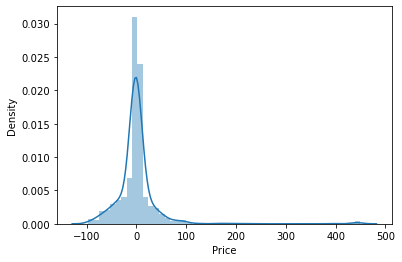

In [108]:
prediction=res3.predict(X_test)
sns.distplot(y_test-prediction)

In [109]:
#r2 score of the predicted values of training values compared to actual price:
prediction=res3.predict(X_train)
result_ontestfromtrainingset=r2_score(y_train,prediction)
abs(result_ontestfromtrainingset) 

0.010951006789990059

We have achieved an r2_score value of 1% on the training set.A glimpse of our resulting dataframe is attached below for the testing set.

In [111]:
#saving the model:
import pickle
filename='Flight.pkl'
pickle.dump(res3,open(filename,'wb'))

In [112]:
#loading the model and checking the accuracy on the test data:
import pickle
loaded_model=pickle.load(open('Flight.pkl','rb'))
result=loaded_model.score(X_test,Y_test)
print(result)

0.024913614862499767


In [113]:
# Got accuracy of 2,49% on the test data:
Conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=["Predicted","Original"])


In [114]:
#here you have a glimpse of test dataset:
Conclusion

0           1           2           3           4     \
Predicted  132.300266  130.619602  140.113384  140.113384  132.300266   
Original   130.636054  135.530671  128.860024  128.399000  132.302341   

                 5           6           7           8           9     ...  \
Predicted  140.113384  140.113384  140.113384  140.113384  130.619602  ...   
Original   130.080843  129.221176  136.000000  131.611036  138.841368  ...   

                 1166        1167        1168        1169        1170  \
Predicted  140.113384  140.113384  145.688983  132.300266  132.300266   
Original   134.937750   98.263095  142.223354  114.295295  134.088000   

                 1171        1172        1173        1174        1175  
Predicted  132.300266  140.113384  140.113384  132.300266  140.113384  
Original   139.805783  130.080843  135.416834  129.508490  138.113686  

[2 rows x 1176 columns]

Recommenting after i finished the project: the previous model is not the final one. Thus, shouldn't have saved it. My bad! So you understand the code, i am not deleting the saving part!

In [119]:
# evaluate model performance with outliers removed using isolation forest
'''from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(url, header=None)
# retrieve the array
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]'''
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
# identify outliers in the training dataset
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train)
# select all rows that are not outliers
#X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

(3149, 13) (3149,)
(3149, 13) (3149,)
MAE: 22.302


In [121]:
# evaluate model performance with outliers removed using elliptical envelope
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import mean_absolute_error
# load the dataset
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
# identify outliers in the training dataset
ee = EllipticEnvelope(contamination=0.01)
yhat = ee.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
#X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

(3149, 13) (3149,)
(3149, 13) (3149,)
MAE: 22.302


In [123]:
#LOF: Identifying Density-based Local Outliers, 2000.
# evaluate model performance with outliers removed using local outlier factor
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_absolute_error
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
#X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

(3149, 13) (3149,)
(3149, 13) (3149,)
MAE: 22.302


In [125]:
#One-Class SVM
# evaluate model performance with outliers removed using one class SVM

from sklearn.svm import OneClassSVM
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
# identify outliers in the training dataset
ee = OneClassSVM(nu=0.01)
yhat = ee.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
#X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

(3149, 13) (3149,)
(3149, 13) (3149,)
MAE: 22.302


In [177]:
#Building Machine Learning Models for target Price, checking the accuracies through different random state:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
for i in range(200,800,25):
    X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.25, random_state=i)
    lr.fit(X_train,Y_train)
    pred_train=lr.predict(X_train)
    pred_test=lr.predict(X_test)
    print(f"At random state {i}, the training accuracy is:  {r2_score(Y_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is:  {r2_score(Y_test,pred_test)}")
    print("\n")

At random state 200, the training accuracy is:  0.020429234214363934
At random state 200, the testing accuracy is:  0.024322631282278073


At random state 225, the training accuracy is:  0.029626142467019112
At random state 225, the testing accuracy is:  0.013635231010690863


At random state 250, the training accuracy is:  0.024115991298155448
At random state 250, the testing accuracy is:  0.00730426336186063


At random state 275, the training accuracy is:  0.020407142369735287
At random state 275, the testing accuracy is:  0.02725755308001554


At random state 300, the training accuracy is:  0.025256439251172047
At random state 300, the testing accuracy is:  0.0018094716759705642


At random state 325, the training accuracy is:  0.024273102315206074
At random state 325, the testing accuracy is:  0.005530702709061974


At random state 350, the training accuracy is:  0.02170811432155373
At random state 350, the testing accuracy is:  0.02100934467257287


At random state 375, the train

In [178]:
#let's do Linear regression

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(x,Y, test_size=0.25, random_state=7)
lr.fit(X_train,Y_train)

LinearRegression()

In [179]:
from sklearn.metrics import r2_score  #r2_score of linear regression
pred_test=lr.predict(X_test)
print(r2_score(Y_test,pred_test))

0.006081836971225774


In [180]:
#Cross validation of the model linear regression:
Train_accuracy=r2_score(Y_train,pred_train)
Test_accuracy=r2_score(Y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(200,1200,25):
    cv_score=cross_val_score(lr,x,Y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the CV score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("\n")

At cross fold 200 the CV score is -5.1809369648442285 and accuracy score for training is -0.015430080083067343 and accuracy for the testing is 0.006081836971225774


At cross fold 225 the CV score is -5.637652036369905 and accuracy score for training is -0.015430080083067343 and accuracy for the testing is 0.006081836971225774


At cross fold 250 the CV score is -6.150101353714544 and accuracy score for training is -0.015430080083067343 and accuracy for the testing is 0.006081836971225774


At cross fold 275 the CV score is -7.425539324551677 and accuracy score for training is -0.015430080083067343 and accuracy for the testing is 0.006081836971225774


At cross fold 300 the CV score is -7.310658373232402 and accuracy score for training is -0.015430080083067343 and accuracy for the testing is 0.006081836971225774


At cross fold 325 the CV score is -8.979498569839315 and accuracy score for training is -0.015430080083067343 and accuracy for the testing is 0.006081836971225774


At cross 

In [181]:
#Regularization: Importing the libraries:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings 
warnings.filterwarnings('ignore')

In [182]:
#we will cross validate with Lasso techniquue for TMIN
from sklearn.linear_model import Lasso
parameters={ 'alpha':[.0001,.001,.01,.1,1,10], 'random_state': list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [183]:
ls=Lasso(alpha=1,random_state=0) #LASSO REGULARITZACION with alpha 1
ls.fit(X_train,Y_train)
ls.score(X_train,Y_train)
pred_ls=ls.predict(X_test)
lss=r2_score(Y_test,pred_ls)
lss

0.013145747571633781

In [185]:
ls=Lasso(alpha=0.01,random_state=0) #-trying with alpha 0.01 eventhough i know it will have less r2_score:
ls.fit(X_train,Y_train)
ls.score(X_train,Y_train)
pred_ls=ls.predict(X_test)
lss=r2_score(Y_test,pred_ls)
lss

0.0061878701825105464

In [186]:
#best cross fold 7
cv_score=cross_val_score(ls,x,Y,cv=7)
cv_mean=cv_score.mean()
cv_mean

-0.8190791593179682

In [187]:
#doing GridSearchCV ith RF:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'log2'}


In [188]:
#checking RFR results 
rf=RandomForestRegressor(criterion="mae",max_features="log2")
rf.fit(X_train,Y_train)
rf.score(X_train,Y_train)
pred_decision=rf.predict(X_test)

rfs=r2_score(Y_test,pred_decision)
print('R2 score:',rfs*100)

rfscore=cross_val_score(rf,x,Y, cv=5)
rfc=rfscore.mean()
print('Cross Val Score:', rfc*100)

pred_test=rf.predict(X_test)
print(r2_score(Y_test,pred_test))

R2 score: -24.33287034733582
Cross Val Score: -164.8821348811448
-0.24332870347335822


In [189]:
#checking and comparing results from different models :

dt=DecisionTreeRegressor()
svr=SVR()
knn=KNeighborsRegressor()
lr=LinearRegression()

x_train, x_test, y_train, y_test=train_test_split(x,Y,test_size=0.25,random_state=42)
for i in [dt,svr,knn,lr]:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    test_score=r2_score(y_test,pred)
    train_score=r2_score(y_train,i.predict(x_train))
    if abs(train_score-test_score)<=0.3:
        print(i)
        print("R2 score is: ", r2_score(y_test,pred))
        print("R2 score for train data: ", r2_score(y_train,i.predict(x_train)))
        print("Mean absolute error is: ", mean_absolute_error(y_test, pred))
        print("Mean squared error is: ", mean_squared_error(y_test, pred))
        print("Root mean squared error is: ", (mean_squared_error(y_test,pred))) 

SVR()
R2 score is:  -0.00048495738410014866
R2 score for train data:  -9.270002734029781e-05
Mean absolute error is:  17.664367116532134
Mean squared error is:  1980.9366347285354
Root mean squared error is:  1980.9366347285354
KNeighborsRegressor()
R2 score is:  -0.279574841465267
R2 score for train data:  0.014974124065140537
Mean absolute error is:  27.47040816326531
Mean squared error is:  2533.5280272108844
Root mean squared error is:  2533.5280272108844
LinearRegression()
R2 score is:  0.020945038140180894
R2 score for train data:  0.02203941808467058
Mean absolute error is:  21.8607403032321
Mean squared error is:  1938.5057486839198
Root mean squared error is:  1938.5057486839198


In [190]:
#importing the RFR, ADBR, GBR and checking their results for TMIN target:

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

rfr=RandomForestRegressor()
adaB=AdaBoostRegressor()
gbr=GradientBoostingRegressor()


x_train, x_test, y_train, y_test=train_test_split(x,Y,test_size=0.25,random_state=42)
for i in [rfr,adaB,gbr]:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    test_score=r2_score(y_test,pred)
    train_score=r2_score(y_train,i.predict(x_train))
    if abs(train_score-test_score)<=0.3:
        print(i)
        print("R2 score is: ", r2_score(y_test,pred))
        print("R2 score for train data: ", r2_score(y_train,i.predict(x_train)))
        print("Mean absolute error is: ", mean_absolute_error(y_test, pred))
        print("Mean squared error is: ", mean_squared_error(y_test, pred))
        print("Root mean squared error is: ", (mean_squared_error(y_test,pred)))
              

GradientBoostingRegressor()
R2 score is:  -0.07102727495373773
R2 score for train data:  0.06392766900833435
Mean absolute error is:  23.16956825702475
Mean squared error is:  2120.6087608719586
Root mean squared error is:  2120.6087608719586


In [191]:
#importing the RFR, ADBR, GBR and checking their results for our target:

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

rfr=RandomForestRegressor()
adaB=AdaBoostRegressor()
gbr=GradientBoostingRegressor()


x_train, x_test, y_train, y_test=train_test_split(x,Y,test_size=0.25,random_state=42)
for i in [rfr,adaB,gbr]:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    test_score=r2_score(y_test,pred)
    train_score=r2_score(y_train,i.predict(x_train))
    if abs(train_score-test_score)<=0.3:
        print(i)
        print("R2 score is: ", r2_score(y_test,pred))
        print("R2 score for train data: ", r2_score(y_train,i.predict(x_train)))
        print("Mean absolute error is: ", mean_absolute_error(y_test, pred))
        print("Mean squared error is: ", mean_squared_error(y_test, pred))
        print("Root mean squared error is: ", (mean_squared_error(y_test,pred)))

GradientBoostingRegressor()
R2 score is:  -0.07102727495373773
R2 score for train data:  0.06392766900833435
Mean absolute error is:  23.16956825702475
Mean squared error is:  2120.6087608719586
Root mean squared error is:  2120.6087608719586


In [192]:
#checking GBR results:

gbr=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
test_score=r2_score(y_test,pred)
train_score=r2_score(y_train,gbr.predict(x_train))
if abs(train_score-test_score)<=0.3:
    print(gbr)
    print("R2 score is: ", r2_score(y_test,pred))
    print("R2 score for train data: ", r2_score(y_train,gbr.predict(x_train)))
    print("Mean absolute error is: ", mean_absolute_error(y_test, pred))
    print("Mean squared error is: ", mean_squared_error(y_test, pred))
    print("Root mean squared error is: ", (mean_squared_error(y_test,pred)))

GradientBoostingRegressor()
R2 score is:  -0.07102727495373773
R2 score for train data:  0.06392766900833435
Mean absolute error is:  23.169568257024753
Mean squared error is:  2120.6087608719586
Root mean squared error is:  2120.6087608719586


In [193]:
#we will cross validation the gbr
from sklearn.model_selection import cross_val_score
for i in range(2,9):
    cv=cross_val_score(gbr,x,Y,cv=i)
    print(gbr,cv.mean())

GradientBoostingRegressor() -9.897304570949728
GradientBoostingRegressor() -1.4731970945346173
GradientBoostingRegressor() -1.0172863281500486
GradientBoostingRegressor() -0.9604483928158153
GradientBoostingRegressor() -0.9875021471432023
GradientBoostingRegressor() -0.9489866255274355
GradientBoostingRegressor() -0.9451257050205124


In [194]:
#we will cross validation the gbr:
from sklearn.model_selection import cross_val_score  #-TMAX
for i in range(2,9):
    cv=cross_val_score(gbr,x,Y,cv=i)
    print(gbr,cv.mean())
    

GradientBoostingRegressor() -9.897315746518093
GradientBoostingRegressor() -1.47320748282057
GradientBoostingRegressor() -1.0172863281500488
GradientBoostingRegressor() -0.9604483928158156
GradientBoostingRegressor() -0.9875021471432022
GradientBoostingRegressor() -0.9489866255274352
GradientBoostingRegressor() -0.9451257050205117


In [195]:
#we will cross validation the RFR :
from sklearn.model_selection import cross_val_score
for i in range(2,9):
    cv=cross_val_score(rfr,x,Y,cv=i)
    print(rfr,cv.mean())

RandomForestRegressor() -15.144654022011569
RandomForestRegressor() -2.0482297616916205
RandomForestRegressor() -2.078161863270505
RandomForestRegressor() -1.6995343307236062
RandomForestRegressor() -1.6636555012497933
RandomForestRegressor() -1.4960825941626072
RandomForestRegressor() -1.700769219981304


In [196]:
#we will cross validation the RFR :
from sklearn.model_selection import cross_val_score   #-TMAX
for i in range(2,9):
    cv=cross_val_score(rfr,x,Y,cv=i)
    print(rfr,cv.mean())

RandomForestRegressor() -14.515585150137216
RandomForestRegressor() -2.0770844704221822
RandomForestRegressor() -1.9970002891118441
RandomForestRegressor() -1.6400780646915618
RandomForestRegressor() -1.6606652105358606
RandomForestRegressor() -1.496219796251896
RandomForestRegressor() -1.6261515125143053


In [197]:
#we will cross validation the RFR2 :

rfr2=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)#0.7874921847929397

rfr2.fit(x_train,y_train)
pred=rfr2.predict(x_test)
test_score=r2_score(y_test,pred)
train_score=r2_score(y_train,rfr2.predict(x_train))
if abs(train_score-test_score)<=0.3:
    print(rfr2)
    print(abs(train_score-test_score))
    print("R2 score is: ", r2_score(y_test,pred))
    print("R2 score for train data: ", r2_score(y_train,rfr2.predict(x_train)))
    print("Mean absolute error is: ", mean_absolute_error(y_test, pred))
    print("Mean squared error is: ", mean_squared_error(y_test, pred))
    print("Root mean squared error is: ", (mean_squared_error(y_test,pred)))

In [198]:
#we will cross validation the RFR and check results :

from sklearn.model_selection import GridSearchCV
param_grid={'n_estimators':[10,50,100,200], 'max_depth':[None,1,3], 'min_samples_split': [2,4,10]}

gcv_rfr=GridSearchCV(rfr,param_grid,cv=3)

#fitting the model:

res=gcv_rfr.fit(x_train,y_train)

res.best_params_

{'max_depth': 1, 'min_samples_split': 4, 'n_estimators': 100}

In [199]:
res.best_score_ #not the best one:

0.011628412588826778

In [200]:
#we will cross validation the RFR2 and check results for TMIN:
from sklearn.model_selection import GridSearchCV
param_grid={'n_estimators':[10,50,100,200], 'max_depth':[None,1,3], 'min_samples_split': [2,4,10]}

gcv_rfr2=GridSearchCV(rfr2,param_grid,cv=3)

#fitting the model:

res2=gcv_rfr2.fit(x_train,y_train)

res2.best_params_

{'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 200}

In [201]:
res2.best_score_  #best_rfr2_score for TMIN

0.011023291168351435

In [202]:
#we will cross validation the GBR and check results:
param_grid2={'alpha':[0.09,0.98], 'learning_rate':[0.01,0.1],'max_depth':[5,2], 'min_samples_leaf':[1,2], 'n_estimators': [10,100]}
gcv_gd=GridSearchCV(gbr,param_grid2,cv=3)
res3=gcv_gd.fit(x_train,y_train)
res3.best_params_

{'alpha': 0.09,
 'learning_rate': 0.1,
 'max_depth': 2,
 'min_samples_leaf': 1,
 'n_estimators': 10}

In [203]:
res3.best_score_ #not the best one:

0.006490781293068053

In [204]:
#creating best model of GBR:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
x_train, x_test, y_train, y_test=train_test_split(x,Y,test_size=0.25,random_state=0)


model=GradientBoostingRegressor(alpha=0.09,
                                learning_rate=0.1,
                                max_depth=2,
                                min_samples_split=2,
                                min_samples_leaf=1,
                                n_estimators=10)

model.fit(x_train,y_train)
pred=model.predict(x_test)
test_score=r2_score(y_test,pred)
train_score=r2_score(y_train,model.predict(x_train))
if abs(train_score-test_score)<=0.3:
    print(model)
    print(abs(train_score-test_score))
    print("R2 score is: ", r2_score(y_test,pred))
    print("R2 score for train data: ", r2_score(y_train,model.predict(x_train)))
    print("Mean absolute error is: ", mean_absolute_error(y_test, pred))
    print("Mean squared error is: ", mean_squared_error(y_test, pred))
    print("Root mean squared error is: ", (mean_squared_error(y_test,pred)))

GradientBoostingRegressor(alpha=0.09, max_depth=2, n_estimators=10)
0.01883086798710487
R2 score is:  0.00807267331097794
R2 score for train data:  0.02690354129808281
Mean absolute error is:  19.937760279702346
Mean squared error is:  5609.210977128447
Root mean squared error is:  5609.210977128447


<AxesSubplot:xlabel='Price', ylabel='Density'>

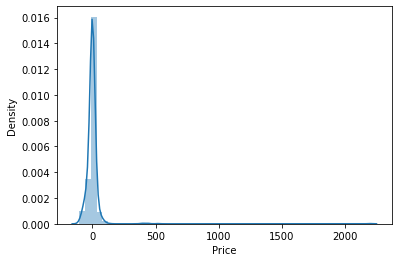

In [205]:
#Predicting through GBR :
prediction=model.predict(x_test)
sns.distplot(y_test-prediction)

In [206]:
#Score result through GBR:
result_ontestfromtrainingset=r2_score(y_test,prediction)
abs(result_ontestfromtrainingset)

0.00807267331097794

In [207]:
#saving the model:
import pickle
filename='Y_T.pkl'
pickle.dump(model,open(filename,'wb'))

In [ ]:
#loading the model for Tmin and checking the score on test data
import pickle
loaded_model=pickle.load(open('Y_T.pkl','rb'))
result=loaded_model.score(y_test,prediction)
print(result)

In [208]:
#creting dataframe sample for tmin on test data
Conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred[:]],index=["Predicted","Original"])

In [209]:
loaded_model

RandomizedSearchCV(cv=3,
                   estimator=GradientBoostingRegressor(alpha=0.098,
                                                       max_depth=5),
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [210]:
Conclusion

0           1           2           3           4     \
Predicted  128.681120  149.980067  124.069390  134.929038  146.160246   
Original   140.186726  131.164630  132.500287  140.186726  131.164630   

                 5           6           7           8           9     \
Predicted  144.712678  132.238321  131.039949  133.306042  139.004049   
Original   131.465902  140.186726  140.186726  131.164630  140.186726   

                 10          11          12          13          14    \
Predicted  140.522653  130.206987  127.598822  140.072385  112.812661   
Original   131.164630  140.186726  140.186726  140.186726  140.186726   

                 15          16          17          18          19    \
Predicted  128.258223  136.348103  120.440987  135.964677  111.254481   
Original   132.500287  140.186726  132.500287  132.500287  140.186726   

                 20          21          22          23          24    \
Predicted  128.803396  139.004049  128.151001  136.939146  133.054317   
Original   131.164630  140.186726  140.186726  140.186726  131.164630   

                 25          26          27          28          29    \
Predicted  138.559447  133.661173  131.039949  173.738427  178.034703   
Original   140.186726  140.186726  140.186726  150.983684  140.186726   

                 30          31          32          33          34    \
Predicted  154.308701  120.495949  141.730944  113.443053  149.444591   
Original   141.822408  142.740412  131.164630  140.186726  131.164630   

                 35          36          37          38         39    \
Predicted  128.714659  137.394523  125.154193  143.598180  138.65154   
Original   140.186726  132.500287  141.822408  140.186726  131.16463   

                 40          41          42          43          44    \
Predicted  146.478282  136.325015  133.661173  126.317717  138.586194   
Original   131.846288  131.164630  140.186726  132.500287  132.500287   

                 45          46          47          48          49    \
Predicted  143.032296  142.684792  157.734034  134.678830  129.978481   
Original   142.740412  131.465902  140.186726  140.186726  140.186726   

                 50          51          52          53          54    \
Predicted  127.491317  139.941967  136.118867  157.734034  134.234975   
Original   140.186726  142.740412  131.465902  140.186726  132.500287   

                 55          56          57          58          59    \
Predicted  134.926808  148.725871  136.146322  137.785521  155.432257   
Original   140.186726  131.164630  140.186726  140.186726  131.164630   

                 60          61          62          63          64    \
Predicted  153.226507  132.313529  134.470471  128.602152  140.931241   
Original   131.164630  153.537370  140.186726  140.186726  131.164630   

                 65          66          67          68          69    \
Predicted  110.885129  140.252896  139.979423  143.581688  138.597215   
Original   131.164630  140.186726  140.186726  131.164630  132.500287   

                 70          71          72          73          74    \
Predicted  131.265951  145.655940  137.502095  178.034703  130.804873   
Original   132.500287  150.983684  150.983684  140.186726  131.164630   

                 75          76          77          78          79    \
Predicted  124.848389  139.825755  120.360049  138.133390  154.739641   
Original   131.164630  142.740412  130.564596  140.186726  131.164630   

                 80          81          82          83          84    \
Predicted  129.524914  136.356883  145.009812  134.156643  135.204027   
Original   140.186726  140.186726  131.164630  140.186726  140.186726   

                 85          86          87          88          89    \
Predicted  157.734034  128.602152  145.368354  137.619195  139.603925   
Original   140.186726  140.186726  140.186726  131.164630  131.164630   

                 90          91          92          93     

In [211]:
x_train.shape

(3525, 13)

In [212]:
y_train.shape

(3525,)

In [213]:
#prediction and residual on training set:
y_train_pred = lr.predict(x_train) 
res = (y_train - y_train_pred)

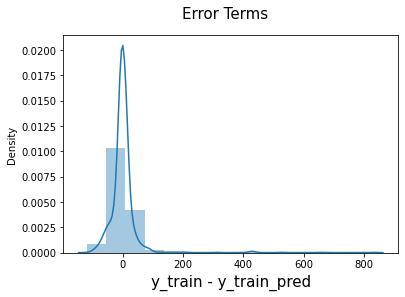

In [214]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

In [215]:
df_newPrice=pd.DataFrame({})
df_newPrice['Price']=df_new['Price']
df_new.drop(['Price'],axis=1,inplace=True)

In [216]:
df_new['Price']=df_newPrice['Price']
df_new

Airline  Time_dept  Direct  CitiesDept  Cities_Arriv  DeptDate  \
0          32         25       1           0             3         0   
1          32         29       1           1             0         0   
2          28          7       1           0             3         0   
3          28         29       1           1             0         0   
4          13         25       1           0             3         0   
...       ...        ...     ...         ...           ...       ...   
1942        5         27       1           0             2         0   
1943        6         25       1           2             0         0   
1944       31         30       1           0             2         0   
1945        6          4       1           3             0         0   
1946        2         11       1           0             2         0   

      DeptMonth  DeptYear  ArrYear  Dep_Time_Mint  Arrv_Time_Hour  \
0             0         0        0              0              13   
1             0         0        0              0               0   
2             0         0        0             10               4   
3             0         0        0              0               0   
4             0         0        0              0              13   
...         ...       ...      ...            ...             ...   
1942          1         0        0             11              14   
1943          1         0        0              0              13   
1944          1         0        0              4               1   
1945          1         0        0              5               3   
1946          1         0        0              0               6   

      Arrv_Time_Mint  Travel_hours  Price  
0                 10             1     29  
1                  9             1     34  
2                  8             1    136  
3                  9             1    136  
4                 10             1    136  
...              ...           ...    ...  
1942              11             2    136  
1943               9             1    136  
1944               6             2    164  
1945               1             1    166  
1946               0             2    165  

[4701 rows x 14 columns]

In [217]:
#Data Preprocessing:

X = df_new.iloc[:, :-1].values
y = df_new.iloc[:, -1].values


In [218]:
X

array([[32, 25,  1, ..., 13, 10,  1],
       [32, 29,  1, ...,  0,  9,  1],
       [28,  7,  1, ...,  4,  8,  1],
       ...,
       [31, 30,  1, ...,  1,  6,  2],
       [ 6,  4,  1, ...,  3,  1,  1],
       [ 2, 11,  1, ...,  6,  0,  2]])

In [219]:
y

array([ 29,  34, 136, ..., 164, 166, 165])

In [220]:
### Splitting Dataset ###

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y , test_size = 0.2, random_state = 42)

In [221]:
#Model Training
### Simple Linear Regression:

from sklearn.linear_model import LinearRegression
regressor = LinearRegression( fit_intercept = True)

regressor.fit(X_train, y_train)

LinearRegression()

In [222]:
print(f"Linear coefficients : {regressor.coef_}")
print(f"Intercept : {regressor.intercept_}")

Linear coefficients : [-1.24639421e-01  2.33915873e-01  1.57328521e+00  3.26736975e+00
  1.19939705e+00 -8.88178420e-15 -1.57801658e+01 -3.10862447e-15
  1.77635684e-15  8.82620712e-02 -2.02666337e-01 -2.15200017e-01
  2.61763564e+00]
Intercept : 133.77447047202958


In [223]:
#Model Prediction
y_pred = regressor.predict(X_test)

In [224]:
#Metrices: RMSE

from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Root Mean Squared Error: 47.58332599935789


In [225]:
# R-squared

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.025973293513137152

In [226]:
#model analysis
import statsmodels.api as sm

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     10.79
Date:                Tue, 01 Feb 2022   Prob (F-statistic):           2.38e-18
Time:                        02:13:54   Log-Likelihood:                -25646.
No. Observations:                4701   AIC:                         5.131e+04
Df Residuals:                    4690   BIC:                         5.139e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        132.9930      6.934     19.178      0.0

In [227]:
#importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn import metrics
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import cross_val_score

In [228]:
lnrg = LinearRegression()

lnrg.fit(X_train,y_train)

LinearRegression()

In [229]:
feature_cols=df_new.columns[0:13]
feature_cols

Index(['Airline', 'Time_dept', 'Direct', 'CitiesDept', 'Cities_Arriv',
       'DeptDate', 'DeptMonth', 'DeptYear', 'ArrYear', 'Dep_Time_Mint',
       'Arrv_Time_Hour', 'Arrv_Time_Mint', 'Travel_hours'],
      dtype='object')

In [230]:
print("linear regression bias or intercept   => ",lnrg.intercept_)   #intercept=bias
print("linear regression coefficient         => ",lnrg.coef_)
print("feature columns                       => ",feature_cols)

linear regression bias or intercept   =>  133.77447047202958
linear regression coefficient         =>  [-1.24639421e-01  2.33915873e-01  1.57328521e+00  3.26736975e+00
  1.19939705e+00 -8.88178420e-15 -1.57801658e+01 -3.10862447e-15
  1.77635684e-15  8.82620712e-02 -2.02666337e-01 -2.15200017e-01
  2.61763564e+00]
feature columns                       =>  Index(['Airline', 'Time_dept', 'Direct', 'CitiesDept', 'Cities_Arriv',
       'DeptDate', 'DeptMonth', 'DeptYear', 'ArrYear', 'Dep_Time_Mint',
       'Arrv_Time_Hour', 'Arrv_Time_Mint', 'Travel_hours'],
      dtype='object')


In [231]:
#prediction on test data:
y_hat = lnrg.predict(X_test)
print( np.sqrt(metrics.mean_squared_error(y_test,y_hat)) )

47.58332599935789


In [232]:
# Root Mean Square error wth few features:
score=0
for i in range(0,1000):
    feature_cols = ['Airline', 'Time_dept', 'Direct', 'CitiesDept', 'Cities_Arriv','DeptDate']   
    X=df_new[feature_cols]
    Y=df.Price
    x_train,x_test,y_train,y_test=train_test_split(X,Y)
    lnrg = LinearRegression()
    lnrg.fit(x_train,y_train)
    y_hat = lnrg.predict(x_test)
    score += np.sqrt(metrics.mean_squared_error(y_test,y_hat))
score/1000

54.4513415194105

In [233]:
score=0
for i in range(0,1000):
    feature_cols = ['Airline', 'Time_dept', 'Direct', 'CitiesDept', 'Cities_Arriv','DeptDate'] 
    X=df_new[feature_cols]
    Y=df_new.Price
    x_train,x_test,y_train,y_test=train_test_split(X,Y)
    lnrg = LinearRegression()
    lnrg.fit(x_train,y_train)
    y_hat = lnrg.predict(x_test)
    score += metrics.mean_squared_error(y_test,y_hat)
score/1000

3369.1410553532955

In [234]:
score=0
for i in range(0,1000):
    feature_cols = ['Airline', 'Time_dept', 'Direct', 'CitiesDept', 'Cities_Arriv',
       'DeptDate', 'DeptMonth', 'DeptYear', 'ArrYear', 'Dep_Time_Mint',
       'Arrv_Time_Hour', 'Arrv_Time_Mint', 'Travel_hours'] 
    X=df_new[feature_cols]
    Y=df_new.Price
    x_train,x_test,y_train,y_test=train_test_split(X,Y)
    lnrg = LinearRegression()
    lnrg.fit(x_train,y_train)
    y_hat = lnrg.predict(x_test)
    score += metrics.mean_squared_error(y_test,y_hat)
score/1000

3208.006247980111

In [235]:
#using cross validation to check best features¶
#all features
feature_cols =['Airline', 'Time_dept', 'Direct', 'CitiesDept', 'Cities_Arriv',
       'DeptDate', 'DeptMonth', 'DeptYear', 'ArrYear', 'Dep_Time_Mint',
       'Arrv_Time_Hour', 'Arrv_Time_Mint', 'Travel_hours']
X=df_new[feature_cols]
Y=df_new.Price
lnrg = LinearRegression()

scores=cross_val_score(lnrg,X,Y,cv=10,scoring='neg_mean_squared_error')
mse_scores= -scores  #cross_val_score give result in negative result so we negate it to get positive result
rmse_scores=np.sqrt(mse_scores)
print(rmse_scores.mean())

38.762658632486314


In [236]:
# with some features
feature_cols = ['Airline', 'Time_dept', 'Direct', 'CitiesDept', 'Cities_Arriv',
       'DeptDate']
X=df_new[feature_cols]
Y=df_new.Price
lnrg = LinearRegression()

scores=cross_val_score(lnrg,X,Y,cv=10,scoring='neg_mean_squared_error')
mse_scores= -scores
rmse_scores=np.sqrt(mse_scores)
print(rmse_scores.mean())

37.14226282477593


In [239]:
#fitting and checking the score:
lnrg.fit(x_train,y_train)
lnrg.score(x_train,y_train)

0.02058408539913359

In [253]:
#below dataframe of coeffiecients to help us to check easily and determine which variable carries more weight
coefficient = lm.coef_
coefficient_df = pd.DataFrame(list(zip(X.columns, lm.coef_)), columns=['features', 'coefficients'])
coefficient_df

features  coefficients
0       Airline     -0.077113
1     Time_dept     -0.151177
2        Direct      3.288214
3    CitiesDept      1.675686
4  Cities_Arriv      1.460683
5      DeptDate      0.000000

In [240]:
#prediction of linear regression:
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE
y_pred = lnrg.predict(X_test)
print('Root Mean Squared Error:', np.sqrt(MSE(y_test[0:941], y_pred)))

Root Mean Squared Error: 58.061639010705726


In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [243]:
#scaling and normalizing the data:
from sklearn.preprocessing import StandardScaler 
scale = StandardScaler()
df_new = scale.fit_transform(df_new)

In [244]:
#Training the algorithm and checking the coeficient:

from sklearn.linear_model import LinearRegression

lm = LinearRegression()                         # instantiating the model

lm.fit(X_train, y_train)                        # fitting the model with the training dataset


print(lm.coef_)

[-0.07711349 -0.15117699  3.28821372  1.67568606  1.46068307  0.        ]


In [245]:
# making predictions on the test data

y_pred = lm.predict(X_test)

# comparing actual values with predicted values
actual_vs_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
actual_vs_pred

Actual   Predicted
0       125  137.926691
1       136  134.842923
2       151  132.166941
3       136  138.787352
4       136  133.373090
..      ...         ...
936     136  138.204106
937     136  136.593760
938     107  135.035489
939     136  134.838247
940     176  137.006890

[941 rows x 2 columns]

In [247]:
coefficient = lm.coef_

#dataframe of the coeffiecients to check wat feature carries more weight


coefficient_df = pd.DataFrame(list(zip(X.columns, lm.coef_)), columns=['features', 'coefficients'])
coefficient_df

features  coefficients
0       Airline     -0.077113
1     Time_dept     -0.151177
2        Direct      3.288214
3    CitiesDept      1.675686
4  Cities_Arriv      1.460683
5      DeptDate      0.000000

In [248]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE

#chekcing RMSE:

print('Root Mean Squared Error:', np.sqrt(MSE(y_test, y_pred)))

Root Mean Squared Error: 82.0643319871705


In [255]:
X

Airline  Time_dept  Direct  CitiesDept  Cities_Arriv  DeptDate
0          32         25       1           0             3         0
1          32         29       1           1             0         0
2          28          7       1           0             3         0
3          28         29       1           1             0         0
4          13         25       1           0             3         0
...       ...        ...     ...         ...           ...       ...
1942        5         27       1           0             2         0
1943        6         25       1           2             0         0
1944       31         30       1           0             2         0
1945        6          4       1           3             0         0
1946        2         11       1           0             2         0

[4701 rows x 6 columns]

In [256]:
y

array([ 29,  34, 136, ..., 164, 166, 165])

In [257]:
#training the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [258]:
#let's check the Coefficients of linear regression 
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-0.03089345 -0.0277368   3.26498555  3.69694383  3.1729597   0.        ]


In [259]:
#so the coffecients we had for each variable
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

Coeffecient
Airline         -0.030893
Time_dept       -0.027737
Direct           3.264986
CitiesDept       3.696944
Cities_Arriv     3.172960
DeptDate         0.000000

In [260]:
#now, let's predict 
predictions = lm.predict( X_test)

In [261]:
y_pred = lm.predict(X_test)

# comparing actual values with predicted values
actual_vs_pred = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
actual_vs_pred

Actual   Predicted
0        136  140.192102
1        110  132.520847
2        154  140.130315
3        136  132.135546
4        136  138.361049
...      ...         ...
1406     144  139.292819
1407     136  135.745982
1408     143  138.453729
1409     136  138.453729
1410     136  136.572056

[1411 rows x 2 columns]

In [262]:
#checking the acurracy score
from sklearn.metrics import accuracy_score
print("accuracy_score:",lm.score(X_test, y_test))

accuracy_score: -0.006876048229225384


In [263]:
#In order to validate the model, let's see if the mean errors are less so the model is predicting with high performance
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 17.73073713137135
MSE: 1636.2702660780951
RMSE: 40.45083764371382


In [267]:
#we will cross validate with Lasso techniquue
from sklearn.linear_model import Lasso
parameters={ 'alpha':[.0001,.001,.01,.1,1,10], 'random_state': list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(X_train,Y_train[0:3290])
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [271]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(X_train,Y_train[0:3290])
ls.score(X_train,Y_train[0:3290])
pred_ls=ls.predict(X_test)
lss=r2_score(Y_test,pred_ls[0:1176])
lss

-0.0049661878558286965

In [272]:
cv_score=cross_val_score(ls,x,Y,cv=5)
cv_mean=cv_score.mean()
cv_mean

-0.7922552384087995

In [127]:
#Ensemble Technique RandomForestRegressor:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(X_train,Y_train[0:3149])
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'sqrt'}


In [ ]:
rf=RandomForestRegressor(criterion="mae",max_features="sqrt")
rf.fit(X_train,Y_train[0:3149])
rf.score(X_train,Y_train[0:3149])
pred_decision=rf.predict(X_test)

rfs=r2_score(Y_test,pred_decision[0:1176])
print('R2 score:',rfs*100)

rfscore=cross_val_score(rf,x,Y, cv=5)
rfc=rfscore.mean()
print('Cross Val Score:', rfc*100)

pred_test=rf.predict(X_test)
print(r2_score(Y_test,pred_test))

R2 score: -0.12046261054916574


In [ ]:
#In order to validate the model, let's see if the mean errors are less so the model is predicting with high performance
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [167]:
import pickle
filename='Aba.pkl'
pickle.dump(rf,open(filename,'wb'))

In [168]:
#Conslusion
import pickle
loaded_model=pickle.load(open('Aba.pkl','rb'))
result=loaded_model.score(X_test,Y_test)
print(result)

-0.03931548287893927


In [278]:
#standardrize the data 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

#split data in training and testing 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.3, random_state=0)

## Implementing Linear Regression
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(X_train,Y_train)


## Seeing the result of Linear Regression
import statsmodels.api as sm
X2 = sm.add_constant(X_train)
est = sm.OLS(Y_train,X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     10.18
Date:                Tue, 01 Feb 2022   Prob (F-statistic):           4.51e-17
Time:                        02:24:06   Log-Likelihood:                -17514.
No. Observations:                3290   AIC:                         3.505e+04
Df Residuals:                    3279   BIC:                         3.512e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        137.5770      0.867    158.666      0.0

In [280]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train

# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(Y_train,X_train_rfe).fit()   # Running the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     10.18
Date:                Tue, 01 Feb 2022   Prob (F-statistic):           4.51e-17
Time:                        02:24:08   Log-Likelihood:                -17514.
No. Observations:                3290   AIC:                         3.505e+04
Df Residuals:                    3279   BIC:                         3.512e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        137.5770      0.867    158.666      0.0

In [283]:
# Now let's use our model to make predictions on test data

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

# Making predictions
y_pred = lm.predict(X_test_new)

In [284]:
#check r2_score:
from sklearn.metrics import r2_score
r2_score(y_true = Y_test, y_pred = y_pred)

0.033384255808418195

In [120]:
#Building Linear Regression:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
for i in range(40,50):
    X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.3, random_state=i)
    lr.fit(X_train,Y_train)
    pred_train=lr.predict(X_train)
    pred_test=lr.predict(X_test)
    print(f"At random state {i}, the training accuracy is:  {r2_score(Y_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is:  {r2_score(Y_test,pred_test)}")
    print("\n")

At random state 40, the training accuracy is:  0.01973275231592231
At random state 40, the testing accuracy is:  0.021989201475433928


At random state 41, the training accuracy is:  0.031115222463630632
At random state 41, the testing accuracy is:  0.010122674043771207


At random state 42, the training accuracy is:  0.02213208552867718
At random state 42, the testing accuracy is:  0.021015818136434827


At random state 43, the training accuracy is:  0.03629042362246282
At random state 43, the testing accuracy is:  0.004917837832580818


At random state 44, the training accuracy is:  0.021556180745516462
At random state 44, the testing accuracy is:  0.021496166687617446


At random state 45, the training accuracy is:  0.018703176945294442
At random state 45, the testing accuracy is:  0.027941142669602348


At random state 46, the training accuracy is:  0.02144371478400453
At random state 46, the testing accuracy is:  0.024227185466854317


At random state 47, the training accuracy is:

In [144]:
#let's take radom state of 43

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.3, random_state=43)
lr.fit(X_train,Y_train)

LinearRegression()

In [145]:
#r2_score
from sklearn.metrics import r2_score
pred_test=lr.predict(X_test)
print(r2_score(Y_test,pred_test))

0.004917837832580818


In [146]:
#Cross validation of the model:
Train_accuracy=r2_score(Y_train,pred_train)
Test_accuracy=r2_score(Y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,15):
    cv_score=cross_val_score(lr,x,Y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the CV score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("\n")

At cross fold 2 the CV score is -7.18502615740022 and accuracy score for training is -0.03187661179649881 and accuracy for the testing is 0.004917837832580818


At cross fold 3 the CV score is -1.2525532327014157 and accuracy score for training is -0.03187661179649881 and accuracy for the testing is 0.004917837832580818


At cross fold 4 the CV score is -0.6933354188149954 and accuracy score for training is -0.03187661179649881 and accuracy for the testing is 0.004917837832580818


At cross fold 5 the CV score is -0.7924847822796295 and accuracy score for training is -0.03187661179649881 and accuracy for the testing is 0.004917837832580818


At cross fold 6 the CV score is -0.8047220113877115 and accuracy score for training is -0.03187661179649881 and accuracy for the testing is 0.004917837832580818


At cross fold 7 the CV score is -0.8213966710901691 and accuracy score for training is -0.03187661179649881 and accuracy for the testing is 0.004917837832580818


At cross fold 8 the CV s

In [147]:
#Regularization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings 
warnings.filterwarnings('ignore')

In [148]:
#we will cross validate with Lasso techniquue
from sklearn.linear_model import Lasso
parameters={ 'alpha':[.0001,.001,.01,.1,1,10], 'random_state': list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [149]:
#best cross fold is 2
cv_score=cross_val_score(clf,x,Y,cv=2)
cv_score

array([-1.27658991, -0.02384537])

In [150]:
#cross validation mean:
cv_mean=cv_score.mean()
cv_mean

-0.6502176390549934

In [151]:
#training with Lasso
ls=Lasso(alpha=1,random_state=0)
ls.fit(X_train,Y_train)
ls.score(X_train,Y_train)
pred_ls=ls.predict(X_test)
lss=r2_score(Y_test,pred_ls)
lss  

0.004614013876969247

In [152]:
# grid search hyperparameters for the Lasso algorithm
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
lasso_alphas = np.linspace(0, 0.2, 21)
lasso = Lasso()
grid = dict()
grid['alpha'] = lasso_alphas
gscv = GridSearchCV( \
    lasso, grid, scoring='neg_mean_absolute_error', \
    cv=cv, n_jobs=-1)
results = gscv.fit(X_train, Y_train)
print('MAE: %.5f' % results.best_score_)
print('Config: %s' % results.best_params_)  

MAE: -20.92527
Config: {'alpha': 0.2}


In [153]:
results.best_params_

{'alpha': 0.2}

In [154]:
#lets calculate the score of the regularization Lasso:
ls=Lasso(alpha=0.2,random_state=0)
ls.fit(X_train,Y_train)
ls.score(X_train,Y_train)
pred_ls=ls.predict(X_test)
lss=r2_score(Y_test,pred_ls)
lss

0.0051025295107789415

In [133]:
# grid search hyperparameters for the Lasso model
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet


# define model
model = Lasso()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['random_state'] = list(range(0,10))
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, Y_train)
# summarize
print('MAE:', results.best_score_)
print('Config:', results.best_params_) #this is the BEST MAE i could get in this case study. So LASSO is should be final selected model.

MAE: -17.720713072714624
Config: {'alpha': 100.0, 'random_state': 0}


In [134]:
#score of the training Lasso algorithm
ls.score(X_train,Y_train)                   #best training score till now

0.03337576980368773

In [135]:
#score of the testing Lasso algorithm
ls.score(X_test,Y_test)

0.004614013876969247

In [136]:
#till now best cross fold is 8_so let's calculate its score and calculate the mean score in order to compare:
cv_score=cross_val_score(ls,x,Y,cv=8)
cv_mean=cv_score.mean()
cv_mean

-0.5813158574453615

In [304]:
#till now best cross fold is 8
cv_score=cross_val_score(ls,X_train,Y_train,cv=8)
cv_mean=cv_score.mean()
cv_mean                             #best cv mean till now

0.026677000458969313

In [305]:
cv_score


array([0.03195186, 0.01231999, 0.03620104, 0.00343037, 0.04963728,
       0.03194605, 0.04345368, 0.00447572])

In [306]:
#Ensemble Technique:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'sqrt'}


In [307]:
#RandomForestRegressor
rf=RandomForestRegressor(criterion="mae",max_features="sqrt")
rf.fit(X_train,Y_train)
rf.score(X_train,Y_train)
pred_decision=rf.predict(X_test)

rfs=r2_score(Y_test,pred_decision)
print('R2 score:',rfs*100)

rfscore=cross_val_score(rf,x,Y, cv=5)
rfc=rfscore.mean()
print('Cross Val Score:', rfc*100)

pred_test=rf.predict(X_test)
print(r2_score(Y_test,pred_test))

R2 score: -0.10389441346811967
Cross Val Score: -15.154306841064274
-0.0010389441346811967


In [308]:
#RandomForestRegressor Training Score
rf.score(X_train,Y_train)

0.005082873370817809

In [309]:
#RandomForestRegressor Testing Score

rf.score(X_test,Y_test)

-0.0010389441346811967

In [311]:
#best cross fold is 8
cv_score=cross_val_score(clf,x,Y,cv=2)
cv_score

array([-5.34097166, -0.00905119])

In [312]:
#cross cavlidation score mean
cv_mean=cv_score.mean()
cv_mean

-2.6750114212112304

In [314]:
#best cross fold is 8
cv_score=cross_val_score(clf,X_train,Y_train,cv=3)
cv_score

array([-0.0009831 , -0.0041367 , -0.00194567])

In [315]:
cv_mean=cv_score.mean()
cv_mean

-0.002355155918335757

In [316]:
# evaluate an elastic net model on the dataset
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet

# define model
model = ElasticNet(alpha=1.0, l1_ratio=0.5)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, x, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 20.154 (2.384)


In [317]:
#we will cross validate with Elastic Net algorithm:
from sklearn.linear_model import ElasticNet
parameters={ 'alpha':[.0001,.001,.01,.1,1,10]}
en=ElasticNet()
clf_en=GridSearchCV(en,parameters)
clf_en.fit(X_train,Y_train)
print(clf_en.best_params_)

{'alpha': 0.1}


In [320]:
# make a prediction with an elastic net model on the dataset
from sklearn.linear_model import ElasticNet
# define model
model = ElasticNet(alpha=0.1, l1_ratio=0.5)
# fit model
model.fit(X_train,Y_train)

# make a prediction
yhat = model.predict(X_test)
# summarize prediction
print( yhat)

[141.25817621 161.1735276  128.72405246 ... 126.22549317 126.46064862
 128.50985797]


Next, we can look at configuring the model hyperparameters. Let's Tune Elastic Net Hyperparameters

In [321]:
# grid search hyperparameters for the elastic net
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet


# define model
model = ElasticNet()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, Y_train)
# summarize
print('MAE:', results.best_score_)
print('Config:', results.best_params_)

MAE: -17.671423815653004
Config: {'alpha': 10.0, 'l1_ratio': 0.28}


In this case, we can see that we achieved slightly better results than the default 4.150 vs. 4.132. Ignore the negative sign; the library makes the MAE negative for optimization purposes.

We can see that the model assigned an alpha weight of 1 to the penalty and focuses exclusively on the L1 penalty.

The scikit-learn library also provides a built-in version of the algorithm that automatically finds good hyperparameters via the ElasticNetCV class. To use this class, it is first fit on the dataset, then used to make a prediction. It will automatically find appropriate hyperparameters.

By default, the model will test 100 alpha values and use a default ratio. We can specify our own lists of values to test via the “l1_ratio” and “alphas” arguments, as we did with the manual grid search. Let's do it:

In [93]:
# use automatically configured elastic net algorithm
from numpy import arange
from pandas import read_csv
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import RepeatedKFold

# define model evaluation method
cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)
# define model
ratios = arange(0, 1, 0.01)
alphas = [1e-5, 0.0, 1.0, 10.0, 100.0]
model = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv=cv, n_jobs=-1)
# fit model
model.fit(X_train, Y_train)
# summarize chosen configuration
print('alpha:', model.alpha_)
print('l1_ratio_:', model.l1_ratio_)

alpha: 1e-05
l1_ratio_: 0.0


In [98]:
# make a prediction with an elastic net model on the dataset
from sklearn.linear_model import ElasticNet
# define model
model = ElasticNet(alpha=1e-05, l1_ratio=0.0)
# fit model
model.fit(X_train,Y_train)

# make a prediction
yhat = model.predict(X_test)
# summarize prediction
print( yhat)

[141.07736228 162.89251637 128.6567528  ... 125.63733793 124.83141221
 128.241148  ]


In [99]:
#model coefficients:
print('coef:', model.coef_)

coef: [-1.25520667e-01 -1.58884743e-02  3.76471172e+00  1.93011873e+00
 -1.32775064e-02  0.00000000e+00 -1.46155093e+01  0.00000000e+00
  0.00000000e+00 -7.90528790e-02  9.25443398e-02  1.27759467e-01
  3.89327230e+00]


In [100]:
#model's intercept:
model.intercept_

132.89731470682113

In [101]:
#Prediction
#Now let’s make the model prediction under normal conditions without specifying any parameters. We can see the first 10 observations of the model prediction for the train set:
model.predict(X_train)[:10]

array([139.78542889, 121.68584943, 141.6829753 , 142.18505797,
       122.9410561 , 144.13297047, 130.33913074, 128.49201481,
       128.53870316, 145.41358444])

In [102]:
#Likewise, we can see the first 10 observations of the model prediction for the test set:
model.predict(X_test)[:10]

array([141.07736228, 162.89251637, 128.6567528 , 139.65990823,
       141.70685199, 141.76580756, 125.20664634, 138.68625137,
       145.69889977, 146.51786314])

In [103]:
y_pred = model.predict(X_test)

np.sqrt(mean_squared_error(Y_test,y_pred))

74.43260726880489

Then we saved the values we predicted over the test set in a cluster named y_pred. And we found the RMSE value as 2.78559 as a result of the following calculation.



In [104]:
#checking r2 score
r2_score(Y_test,y_pred)


0.0049176864589036695

As a result, we found the R-Squared score as 0.9297. The R-squared score is the percentage of the change in the dependent variable explained by the independent variables. In our case, we can say that independent variables in ElasticNet Regression Model explain 92,97% of the change in dependent variables for this data set.

Model Tuning In this section, we will do the operations using the ElasticNetCV method to find the optimum lambda value.

In [105]:
cv_model = ElasticNetCV(cv = 10).fit(X_train,Y_train)

# without lambdas, what's the alpha?

cv_model.alpha_

#Accordingly, we find the alpha value as 0.029719762751637686. Afterward, we can find the constant of the model established with ElasticNetCV as follows:



0.029719762751637686

In [106]:
cv_model.intercept_


134.13703557785658

In [107]:
#We can find the coefficients of the variables of the model established with ElasticNetCV:
cv_model.coef_

array([ -0.11754565,  -0.01992949,   2.21360018,   1.83808769,
        -0.04525768,   0.        , -13.68388461,   0.        ,
         0.        ,  -0.07642193,   0.09473605,   0.12277104,
         3.84009611])

In [108]:
#Then we rebuild the Adjusted ElasticNet model with this optimum alpha value. Then we print the predicted values from the test set into y_pred. 
#As a result, we find the RMSE value as 74.4414930897856

# Let's create the final model according to optimum alpha.

tuned = ElasticNet(alpha = cv_model.alpha_).fit(X_train,Y_train)

# Let's now calculate the error for the test set using this final model.

y_pred = tuned.predict(X_test)

np.sqrt(mean_squared_error(Y_test,y_pred))

74.4414930897856

In [156]:
#showing the r2_score of the predicted value and compare it with Y-test:
print(r2_score(Y_test,y_pred))

0.004680084918037397


In [157]:
#saving best model: lasso
import pickle
filename='bsb.pkl'
pickle.dump(ls,open(filename,'wb'))

In [158]:
#Conclusion
import pickle
loaded_model=pickle.load(open('bsb.pkl','rb'))

In [159]:
loaded_model


Lasso(alpha=1, random_state=0)

In [160]:
result=loaded_model.score(X_test,Y_test)
print(result)

0.004614013876969247


In [163]:
Conclusion=pd.DataFrame([loaded_model.predict(X_test)[:],y_pred[:]],index=["Predicted","Original"])
Conclusion

0           1           2           3           4     \
Predicted  140.939576  158.150483  129.562397  138.266325  140.855065   
Original   140.812358  162.223424  129.122089  139.264526  141.419360   

                 5           6           7           8           9     \
Predicted  140.859398  129.717034  138.666591  143.441618  141.827631   
Original   141.409405  125.953017  138.319580  145.120816  145.871735   

                 10          11          12          13          14    \
Predicted  139.809436  145.830475  137.600059  131.231057  128.818407   
Original   141.771140  145.816088  136.985976  128.185942  128.024741   

                 15          16         17          18          19    \
Predicted  131.234312  132.747405  138.76387  140.688756  130.540500   
Original   128.968472  129.782800  138.51407  142.554275  129.105482   

                 20          21          22          23          24    \
Predicted  127.533572  130.340313  139.809436  128.935730  141.225899   
Original   123.577785  130.023017  141.771140  128.299269  143.259549   

                 25          26          27          28          29    \
Predicted  128.196471  129.266026  147.465084  139.343634  137.241964   
Original   125.957456  128.612470  148.069357  140.820420  136.515794   

                 30          31          32         33          34    \
Predicted  139.650997  140.973246  139.164586  138.76387  132.497574   
Original   138.665043  143.299234  140.585329  138.51407  129.561984   

                 35          36          37          38          39    \
Predicted  139.809436  140.683470  128.518335  130.711142  129.086978   
Original   141.771140  142.438258  124.870787  127.960611  128.377378   

                 40          41          42          43          44    \
Predicted  129.701703  141.223635  139.430136  143.345197  140.683470   
Original   128.545472  143.288879  140.792619  143.029871  142.438258   

                 45          46          47          48          49    \
Predicted  139.951425  129.128196  127.337718  137.413257  139.166850   
Original   142.766537  126.804023  124.453110  136.673941  140.555999   

                 50          51          52          53          54    \
Predicted  140.926136  138.266325  140.753344  139.659109  160.656909   
Original   140.645589  139.264526  144.461188  139.689526  164.883082   

                 55          56          57          58          59    \
Predicted  139.430136  129.665339  139.659109  136.883868  130.067945   
Original   140.792619  127.509296  139.689526  136.045611  130.307120   

                 60          61          62          63          64    \
Predicted  132.143524  130.340313  137.860876  137.323733  138.724397   
Original   129.841342  130.023017  137.261669  136.556396  141.311212   

                 65          66          67          68          69    \
Predicted  130.240736  138.355849  141.049587  140.582824  130.706809   
Original   126.491522  139.382071  143.440834  142.344891  127.970567   

                 70          71          72          73          74    \
Predicted  139.211489  129.025253  127.516766  152.299130  140.859398   
Original   139.101798  128.416815  124.688201  153.785201  139.195805   

                 75          76          77          78          79    \
Predicted  141.225899  139.455500  140.149348  142.714723  139.992643   
Original   143.259549  140.487907  141.878331  145.755726  141.193181   

                 80          81          82          83          84    \
Predicted  140.859398  158.687627  139.343634  139.898960  138.716966   
Original   141.409405  162.928698  140.820420  141.888686  139.997601   

                 85          86          87          88          89    \
Predicted  143.345197  143.455591  141.024473  140.297578  138.434251   
Original   143.029871  144.818229  141.947083  142.581993  139.523795   

                 90          91          92          93        

In [170]:
#creating model instance with best params
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
x_train, x_test, y_train, y_test=train_test_split(x,Y,test_size=0.25,random_state=0)


model=GradientBoostingRegressor(alpha=0.09,
                                learning_rate=0.1,
                                max_depth=2,
                                min_samples_split=2,
                                min_samples_leaf=1,
                                n_estimators=10)

model.fit(x_train,y_train)
pred=model.predict(x_test)
test_score=r2_score(y_test,pred)
train_score=r2_score(y_train,model.predict(x_train))
if abs(train_score-test_score)<=0.3:
    print(model)
    print(abs(train_score-test_score))
    print("R2 score is: ", r2_score(y_test,pred))
    print("R2 score for train data: ", r2_score(y_train,model.predict(x_train)))
    print("Mean absolute error is: ", mean_absolute_error(y_test, pred))
    print("Mean squared error is: ", mean_squared_error(y_test, pred))
    print("Root mean squared error is: ", (mean_squared_error(y_test,pred)))

GradientBoostingRegressor(alpha=0.09, max_depth=2, n_estimators=10)
0.01883086798710487
R2 score is:  0.00807267331097794
R2 score for train data:  0.02690354129808281
Mean absolute error is:  19.93776027970236
Mean squared error is:  5609.210977128447
Root mean squared error is:  5609.210977128447


<AxesSubplot:xlabel='Price', ylabel='Density'>

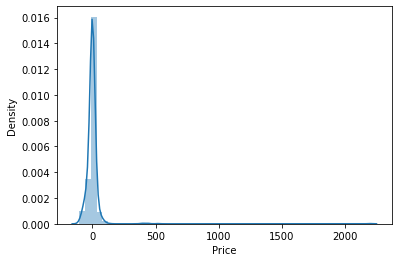

In [171]:
#Predicting through GBR again 
prediction=model.predict(x_test)
sns.distplot(y_test-prediction)

In [172]:
#Score result through GBR
result_ontestfromtrainingset=r2_score(y_test,prediction)
abs(result_ontestfromtrainingset)

0.00807267331097794

Not good results. So, let's try handling the outliers and check the results again!

In [112]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code

In [114]:
sample_outliers = detect_outliers_iqr(df_new.Price)
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [29, 29, 29, 29, 34, 34, 37, 37, 41, 41, 41, 43, 44, 44, 44, 44, 45, 45, 45, 46, 47, 47, 47, 47, 48, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 52, 52, 52, 52, 52, 52, 53, 53, 54, 54, 54, 54, 55, 55, 55, 55, 55, 56, 56, 56, 56, 56, 56, 57, 58, 58, 58, 58, 58, 59, 59, 59, 59, 60, 60, 60, 60, 60, 60, 62, 62, 63, 63, 63, 64, 64, 64, 64, 65, 65, 65, 65, 65, 65, 65, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 68, 68, 68, 69, 69, 69, 69, 69, 69, 69, 69, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 71, 71, 71, 71, 71, 71, 72, 72, 72, 72, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 75, 75, 75, 75, 75, 76, 76, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 79, 79, 79, 79, 79, 79, 79, 79, 79, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 82, 82, 82, 82, 82, 82, 82, 82, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 

In [123]:
df_new.Price

0        29
1        34
2       136
3       136
4       136
       ... 
1942    136
1943    136
1944    164
1945    166
1946    165
Name: Price, Length: 4701, dtype: int64

In [140]:
median = np.median(df_new.Price)# Replace outliers with median
for i in sample_outliers:
    c = np.where(df_new.Price==i, 14, df_new.Price)
print("Sample: ", df_new.Price)
print("New array: ",c)
# print(x.dtype)

Sample:  0        29
1        34
2       136
3       136
4       136
       ... 
1942    136
1943    136
1944    164
1945    166
1946    165
Name: Price, Length: 4701, dtype: int64
New array:  [ 29  34 136 ... 164 166 165]


Text(0.5, 0, 'Sample')

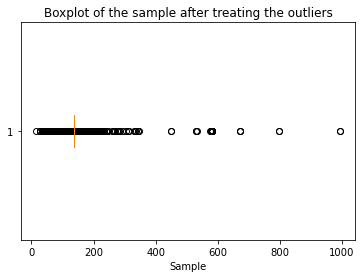

In [141]:
plt.boxplot(c, vert=False)
plt.title("Boxplot of the sample after treating the outliers")
plt.xlabel("Sample")

In [145]:
df_new["Price"] = df_new["Price"].map(lambda i: np.log(i) if i > 0 else 0) 
print(df_new['Price'].skew())
print(df_new['Price'].skew())

0.27180799346210205
0.27180799346210205


In [146]:
#Replacing Outliers with Median Values

print(df_new['Price'].quantile(0.50)) 
print(df_new['Price'].quantile(0.95)) 
df_new['Price'] = np.where(df_new['Price'] > 325, 140, df_new['Price'])
df_new.describe()

4.912654885736052
5.2094861528414205


Airline    Time_dept       Direct   CitiesDept  Cities_Arriv  \
count  4701.000000  4701.000000  4701.000000  4701.000000   4701.000000   
mean     22.608807    16.843650     0.966390     1.154010      1.258456   
std      11.236733     9.735547     0.180242     1.245289      1.346783   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%      13.000000     7.000000     1.000000     0.000000      0.000000   
50%      28.000000    19.000000     1.000000     0.000000      1.000000   
75%      31.000000    25.000000     1.000000     2.000000      3.000000   
max      40.000000    33.000000     1.000000     3.000000      3.000000   

             Price  DeptDate    DeptMonth  DeptYear  ArrYear  Dep_Time_Mint  \
count  4701.000000    4701.0  4701.000000    4701.0   4701.0    4701.000000   
mean      4.881969       0.0     0.414167       0.0      0.0       5.202297   
std       0.264615       0.0     0.492630       0.0      0.0       3.708891   
min       3.367296       0.0     0.000000       0.0      0.0       0.000000   
25%       4.912655       0.0     0.000000       0.0      0.0       1.000000   
50%       4.912655       0.0     0.000000       0.0      0.0       5.000000   
75%       4.912655       0.0     1.000000       0.0      0.0       9.000000   
max       7.754910       0.0     1.000000       0.0      0.0      11.000000   

       Arrv_Time_Hour  Arrv_Time_Mint  Travel_hours  
count     4701.000000     4701.000000   4701.000000  
mean         6.972984        6.003404      1.630504  
std          4.571642        3.455306      1.501006  
min          0.000000        0.000000      1.000000  
25%          3.000000        3.000000      1.000000  
50%          6.000000        7.000000      1.000000  
75%         11.000000        9.000000      2.000000  
max         14.000000       11.000000      8.000000

In [148]:
df_new['Price'] #we can see several datapoints are replaced by median:

0       3.367296
1       3.526361
2       4.912655
3       4.912655
4       4.912655
          ...   
1942    4.912655
1943    4.912655
1944    5.099866
1945    5.111988
1946    5.105945
Name: Price, Length: 4701, dtype: float64

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


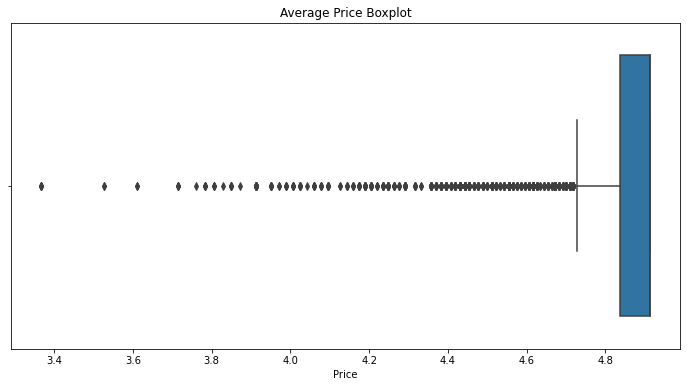

In [151]:
#trying to drop outliers if left any:
s = df_new['Price']
iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
df = df_new[(df_new['Price'] <= upper_bound)]
fig,ax = plt.subplots(figsize=(12,6))
fig = sns.boxplot(df.Price).set_title('Average Price Boxplot')
fig.figure.savefig('AP_drop.png')

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


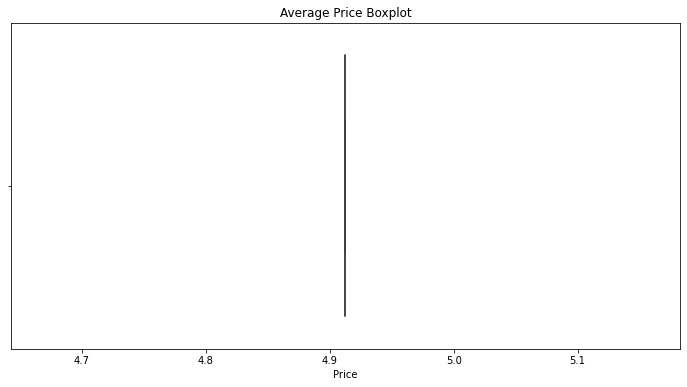

In [158]:
df_new['Price'] = df_new.Price.mask(df_new.Price > upper_bound,df_new.Price.median())
df_new['Price'] = df_new.Price.mask(df_new.Price < lower_bound,df_new.Price.median())
fig,ax = plt.subplots(figsize=(12,6))
fig = sns.boxplot(df_new.Price).set_title('Average Price Boxplot')
fig.figure.savefig('AP_AnVal.png')

In [159]:
df_new.Price #we cant have all Price as median...so let's discard this approach.

0       4.912655
1       4.912655
2       4.912655
3       4.912655
4       4.912655
          ...   
1942    4.912655
1943    4.912655
1944    4.912655
1945    4.912655
1946    4.912655
Name: Price, Length: 4701, dtype: float64

In [160]:
#Now, let's evaluate model performance with outliers removed using isolation forest:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error
'''# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(url, header=None)
# retrieve the array
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]'''
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
# identify outliers in the training dataset
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
#X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

(3149, 13) (3149,)
(3149, 13) (3149,)
MAE: 22.302


In [161]:
#Building Machine Learning model Linear Regression for the last time:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
for i in range(0,10):
    X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.25, random_state=i)
    lr.fit(X_train,Y_train)
    pred_train=lr.predict(X_train)
    pred_test=lr.predict(X_test)
    print(f"At random state {i}, the training accuracy is:  {r2_score(Y_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is:  {r2_score(Y_test,pred_test)}")
    print("\n")

At random state 0, the training accuracy is:  0.0317715113797401
At random state 0, the testing accuracy is:  0.008024993151128923


At random state 1, the training accuracy is:  0.018824193194333705
At random state 1, the testing accuracy is:  0.029856157207222456


At random state 2, the training accuracy is:  0.02318492929843785
At random state 2, the testing accuracy is:  0.005123130669723142


At random state 3, the training accuracy is:  0.031570207897615776
At random state 3, the testing accuracy is:  0.007989100466764931


At random state 4, the training accuracy is:  0.021182252826186798
At random state 4, the testing accuracy is:  0.026535275093585442


At random state 5, the training accuracy is:  0.018657738173366134
At random state 5, the testing accuracy is:  0.03127120643709047


At random state 6, the training accuracy is:  0.02347001169473495
At random state 6, the testing accuracy is:  0.011746706233870419


At random state 7, the training accuracy is:  0.023602704734

In [162]:
#let's take radom state of 5

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.25, random_state=5)
lr.fit(X_train,Y_train)

LinearRegression()

In [163]:
#checking the R2 Score for the linear regression:
from sklearn.metrics import r2_score
pred_test=lr.predict(X_test)
print(r2_score(Y_test,pred_test))

0.03127120643709047


In [164]:
# evaluate the model
yhatlr = lr.predict(X_test)
# evaluate predictions
maelr = mean_absolute_error(y_test[0:1176], yhatlr)
print('MAE: %.3f' % maelr)

MAE: 23.508


In [166]:
#Regularization imports
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings 
warnings.filterwarnings('ignore')

In [167]:
#we will cross validate with Lasso techniquue
from sklearn.linear_model import Lasso
parameters={ 'alpha':[.0001,.001,.01,.1,1,10], 'random_state': list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [168]:
#best cross fold is 2
cv_score=cross_val_score(clf,x,Y,cv=2)
cv_score

array([-1.27658991, -0.02384537])

In [169]:
cv_mean=cv_score.mean() #cv mean
cv_mean

-0.6502176390549934

In [170]:
#training with Lasso
ls=Lasso(alpha=1,random_state=0)
ls.fit(X_train,Y_train)
ls.score(X_train,Y_train)
pred_ls=ls.predict(X_test)
lss=r2_score(Y_test,pred_ls)
lss  #this is the BESTEST r2_score i could get in this case study. So LASSO is our final selected model.

0.024420237647289067

In [171]:
# grid search hyperparameters for the Lasso algorithm
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
lasso_alphas = np.linspace(0, 0.2, 21)
lasso = Lasso()
grid = dict()
grid['alpha'] = lasso_alphas
gscv = GridSearchCV( \
    lasso, grid, scoring='neg_mean_absolute_error', \
    cv=cv, n_jobs=-1)
results = gscv.fit(X_train, Y_train)
print('MAE: %.5f' % results.best_score_)
print('Config: %s' % results.best_params_)  #this is the MAE i could get.

MAE: -20.71959
Config: {'alpha': 0.2}


In [172]:
results.best_params_

{'alpha': 0.2}

In [173]:
#lets calculate the score of the regularization Lasso:
ls=Lasso(alpha=0.2,random_state=0)
ls.fit(X_train,Y_train)
ls.score(X_train,Y_train)
pred_ls=ls.predict(X_test)
lss=r2_score(Y_test,pred_ls)
lss                              #the BESTEST r2 score till now. so we will select this model as it performs better than all others.

0.030056939714088182

In [102]:
#lets calculate the score of the regularization Lasso:
from sklearn.linear_model import Lasso

ls=Lasso(alpha=0.2,random_state=0)
ls.fit(X_train,Y_train)
ls.score(X_train,Y_train)
pred_ls=ls.predict(X_test)
lss=r2_score(Y_test,pred_ls)
lss

0.030056939714088182

In [175]:
result=ls.score(X_train,Y_train)
print(result)

0.018464882796334736


In [174]:
result=ls.score(X_test,Y_test)
print(result)   #the BESTEST r2 score  ON THE TEST DATA till now. so we will select this model as it performs better than all others.

0.030056939714088182


In [103]:
# evaluate the model
yhatls = ls.predict(X_test)
# evaluate predictions
maels = mean_absolute_error(Y_test, yhatls)
print('MAE: %.3f' % maels)                 #BETTER MAE COMPARED WITH OTHERS:

MAE: 22.801


In [104]:
#In order to validate the model, let's see if the mean errors are less so the model is predicting with high performance
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test[0:1176], yhatls))
print('MSE:', metrics.mean_squared_error(y_test[0:1176], yhatls))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test[0:1176], yhatls))) #LOWEST MEAN ERRORS:

MAE: 23.26274597946242
MSE: 3173.9016145319465
RMSE: 56.33739090987394


<AxesSubplot:xlabel='Price', ylabel='Density'>

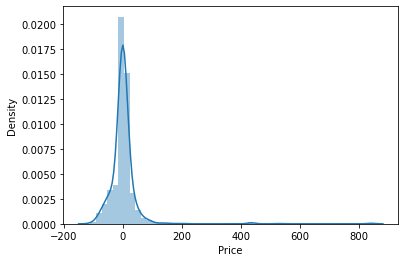

In [108]:
#prediction on the test data and check residual:
prediction=ls.predict(X_test)
sns.distplot(Y_test-prediction)

In [112]:
#r2 score of the predicted values of training values compared to actual price:
result_ontestfromtrainingset=r2_score(Y_test,prediction)
abs(result_ontestfromtrainingset)                        #BESTEST Result in this case:

0.06068094429588089

In [113]:
#saving the model: #we will FINALLY SAVE this model as the final model because we have no more time to study and improve the algorithm results through other approaches:
import pickle
filename='Flight.pkl'
pickle.dump(ls,open(filename,'wb'))

In [114]:
#loading the model and checking the accuracy on the test data:
import pickle
loaded_model=pickle.load(open('Flight.pkl','rb'))
result=loaded_model.score(X_test,Y_test)
print(result)

0.030056939714088182


In [118]:
#3% is a HIGHEST accuracy I got on the test data. Not good, but have no more time to study more and different approaches:
Conclusion=pd.DataFrame([loaded_model.predict(X_test)[:],Y_test[:]],index=["Predicted","Original"])
Conclusion

0           1           2           3           4     \
Predicted  140.461736  147.052833  128.905917  128.905807  131.921172   
Original   136.000000   78.000000  136.000000  153.000000  136.000000   

                 5           6           7           8           9     ...  \
Predicted  139.023154  142.629705  128.380433  143.481882  139.023223  ...   
Original   159.000000  135.000000  152.000000  190.000000  136.000000  ...   

                 1166        1167       1168        1169        1170  \
Predicted  126.737624  128.380316  139.02312  125.553836  128.899176   
Original   136.000000  136.000000  181.00000  136.000000  136.000000   

                 1171        1172        1173        1174       1175  
Predicted  127.297075  139.023154  139.277879  140.396797  125.55376  
Original   136.000000  136.000000  136.000000  205.000000  174.00000  

[2 rows x 1176 columns]

ok_fin _ max i got as accuracy is 3%...need to learn more on handling the outliers which are afecting the resukts and accuracy of the results. 

One last try i would have done is to drop outliers from only the columns which includes outliers. But have no more time as the deadline is tomorrow. So will finish here and start writing the documentation.

ok, need to stop here! evengthough i could have got better accuracy when dropping the outliers only from the columns including outliers.ok, need to stop here! no more time!

In [ ]:
Date was extended to Sunday, again! So trying to handle the outliers and check if we can improve the results using technique CAPPING:

In [130]:
x

Airline  Time_dept  Direct  CitiesDept  Cities_Arriv  DeptDate  \
0          32         25       1           0             3         0   
1          32         29       1           1             0         0   
2          28          7       1           0             3         0   
3          28         29       1           1             0         0   
4          13         25       1           0             3         0   
...       ...        ...     ...         ...           ...       ...   
1942        5         27       1           0             2         0   
1943        6         25       1           2             0         0   
1944       31         30       1           0             2         0   
1945        6          4       1           3             0         0   
1946        2         11       1           0             2         0   

      DeptMonth  DeptYear  ArrYear  Dep_Time_Mint  Arrv_Time_Hour  \
0             0         0        0              0              13   
1             0         0        0              0               0   
2             0         0        0             10               4   
3             0         0        0              0               0   
4             0         0        0              0              13   
...         ...       ...      ...            ...             ...   
1942          1         0        0             11              14   
1943          1         0        0              0              13   
1944          1         0        0              4               1   
1945          1         0        0              5               3   
1946          1         0        0              0               6   

      Arrv_Time_Mint  Travel_hours  
0                 10             1  
1                  9             1  
2                  8             1  
3                  9             1  
4                 10             1  
...              ...           ...  
1942              11             2  
1943               9             1  
1944               6             2  
1945               1             1  
1946               0             2  

[4701 rows x 13 columns]

In [131]:
print("Highest allowed",df_new['Airline'].mean() + 3*df_new['Airline'].std())
print("Lowest allowed",df_new['Airline'].mean() - 3*df_new['Airline'].std())

Highest allowed 56.31900573324833
Lowest allowed -11.101392459476795


In [132]:
df_new[(df_new['Airline'] > 56.31) | (df_new['Airline'] < -11.1)]

Empty DataFrame
Columns: [Airline, Time_dept, Direct, CitiesDept, Cities_Arriv, Price, DeptDate, DeptMonth, DeptYear, ArrYear, Dep_Time_Mint, Arrv_Time_Hour, Arrv_Time_Mint, Travel_hours]
Index: []

In [133]:
print("Highest allowed",df_new['Time_dept'].mean() + 3*df_new['Time_dept'].std())
print("Lowest allowed",df_new['Time_dept'].mean() - 3*df_new['Time_dept'].std())

Highest allowed 46.05029025886594
Lowest allowed -12.362989684520063


In [134]:
df_new[(df_new['Time_dept'] > 46.050) | (df_new['Time_dept'] < -12.36)]

Empty DataFrame
Columns: [Airline, Time_dept, Direct, CitiesDept, Cities_Arriv, Price, DeptDate, DeptMonth, DeptYear, ArrYear, Dep_Time_Mint, Arrv_Time_Hour, Arrv_Time_Mint, Travel_hours]
Index: []

In [135]:
print("Highest allowed",df_new['CitiesDept'].mean() + 3*df_new['CitiesDept'].std())
print("Lowest allowed",df_new['CitiesDept'].mean() - 3*df_new['CitiesDept'].std())

Highest allowed 4.8898759793921585
Lowest allowed -2.581856409087967


In [136]:
df_new[(df_new['CitiesDept'] > 4.889) | (df_new['CitiesDept'] < -2.581)]

Empty DataFrame
Columns: [Airline, Time_dept, Direct, CitiesDept, Cities_Arriv, Price, DeptDate, DeptMonth, DeptYear, ArrYear, Dep_Time_Mint, Arrv_Time_Hour, Arrv_Time_Mint, Travel_hours]
Index: []

In [137]:
print("Highest allowed",df_new['Direct'].mean() + 3*df_new['Direct'].std())
print("Lowest allowed",df_new['Direct'].mean() - 3*df_new['Direct'].std())

Highest allowed 1.5071159549081874
Lowest allowed 0.42566430461106375


In [137]:
print("Highest allowed",df_new['Cities_Arriv'].mean() + 3*df_new['Cities_Arriv'].std())
print("Lowest allowed",df_new['Cities_Arriv'].mean() - 3*df_new['Cities_Arriv'].std())

Highest allowed 5.298804997808499
Lowest allowed -2.78189370233945


In [139]:
df_new[(df_new['Cities_Arriv'] > 5.2988) | (df_new['Cities_Arriv'] < -2.7818)]

Empty DataFrame
Columns: [Airline, Time_dept, Direct, CitiesDept, Cities_Arriv, Price, DeptDate, DeptMonth, DeptYear, ArrYear, Dep_Time_Mint, Arrv_Time_Hour, Arrv_Time_Mint, Travel_hours]
Index: []

In [140]:
print("Highest allowed",df_new['DeptDate'].mean() + 3*df_new['DeptDate'].std())
print("Lowest allowed",df_new['DeptDate'].mean() - 3*df_new['DeptDate'].std())

Highest allowed 0.0
Lowest allowed 0.0


In [141]:
df_new[(df_new['DeptDate'] > 0) | (df_new['DeptDate'] < 0)]

Empty DataFrame
Columns: [Airline, Time_dept, Direct, CitiesDept, Cities_Arriv, Price, DeptDate, DeptMonth, DeptYear, ArrYear, Dep_Time_Mint, Arrv_Time_Hour, Arrv_Time_Mint, Travel_hours]
Index: []

In [142]:
print("Highest allowed",df_new['DeptMonth'].mean() + 3*df_new['DeptMonth'].std())
print("Lowest allowed",df_new['DeptMonth'].mean() - 3*df_new['DeptMonth'].std())

Highest allowed 1.8920573119401312
Lowest allowed -1.0637229150033092


In [143]:
df_new[(df_new['DeptMonth'] > 1.8920573) | (df_new['DeptMonth'] < -1.063)]

Empty DataFrame
Columns: [Airline, Time_dept, Direct, CitiesDept, Cities_Arriv, Price, DeptDate, DeptMonth, DeptYear, ArrYear, Dep_Time_Mint, Arrv_Time_Hour, Arrv_Time_Mint, Travel_hours]
Index: []

In [144]:
print("Highest allowed",df_new['Dep_Time_Mint'].mean() + 3*df_new['Dep_Time_Mint'].std())
print("Lowest allowed",df_new['Dep_Time_Mint'].mean() - 3*df_new['Dep_Time_Mint'].std())

Highest allowed 16.32897164621282
Lowest allowed -5.924376879141985


In [145]:
df_new[(df_new['Dep_Time_Mint'] > 16.328) | (df_new['Dep_Time_Mint'] < -5.92437)]

Empty DataFrame
Columns: [Airline, Time_dept, Direct, CitiesDept, Cities_Arriv, Price, DeptDate, DeptMonth, DeptYear, ArrYear, Dep_Time_Mint, Arrv_Time_Hour, Arrv_Time_Mint, Travel_hours]
Index: []

In [135]:
df_new[(df_new['Direct'] > 1.507) | (df_new['Direct'] < 0.4256)]

Airline  Time_dept  Direct  CitiesDept  Cities_Arriv  Price  DeptDate  \
177         1         29       0           1             0    136         0   
182        15          8       0           0             3    136         0   
186        23          5       0           0             3    136         0   
188        11          8       0           0             3    136         0   
192         7          5       0           0             3     79         0   
...       ...        ...     ...         ...           ...    ...       ...   
1864        4         24       0           0             1    151         0   
1866       30         17       0           0             3    153         0   
1888        1          5       0           0             3    136         0   
1890        1          8       0           0             3    159         0   
1901       30         20       0           3             0    156         0   

      DeptMonth  DeptYear  ArrYear  Dep_Time_Mint  Arrv_Time_Hour  \
177           0         0        0              0               0   
182           0         0        0              2              10   
186           0         0        0              9              10   
188           0         0        0              2              10   
192           0         0        0              9              10   
...         ...       ...      ...            ...             ...   
1864          1         0        0              7              13   
1866          1         0        0              7               8   
1888          1         0        0              9              10   
1890          1         0        0              2              10   
1901          1         0        0              1              10   

      Arrv_Time_Mint  Travel_hours  
177                9             1  
182                4             7  
186                4             8  
188                4             7  
192                4             8  
...              ...           ...  
1864               7             2  
1866               5             1  
1888               4             8  
1890               4             7  
1901               9             1  

[158 rows x 14 columns]

In [147]:
X

Airline  Time_dept  Time_arrival  Direct  Duration  CitiesDept  \
0          32         25            34       1         2           0   
1          32         29             0       1         1           1   
2          28          7            12       1         2           0   
3          28         29             0       1         1           1   
4          13         25            34       1         2           0   
...       ...        ...           ...     ...       ...         ...   
1942        5         27            36       1         3           0   
1943        6         25            33       1         1           2   
1944       31         30             3       1         5           0   
1945        6          4             8       1         0           3   
1946        2         11            14       1         3           0   

      Cities_Arriv  dateDept  dateArrv  DeptDate  ...  ArrDate  ArrMonth  \
0                3         0         1         0  ...        1         0   
1                0         0         1         0  ...        1         0   
2                3         0         1         0  ...        1         0   
3                0         0         1         0  ...        1         0   
4                3         0         1         0  ...        1         0   
...            ...       ...       ...       ...  ...      ...       ...   
1942             2         1         0         0  ...        0         1   
1943             0         1         0         0  ...        0         1   
1944             2         1         0         0  ...        0         1   
1945             0         1         0         0  ...        0         1   
1946             2         1         0         0  ...        0         1   

      ArrYear  Dep_Time_Hour  Dep_Time_Mint  Arrv_Time_Hour  Arrv_Time_Mint  \
0           0             12              0              13              10   
1           0             14              0               0               9   
2           0              3             10               4               8   
3           0             14              0               0               9   
4           0             12              0              13              10   
...       ...            ...            ...             ...             ...   
1942        0             12             11              14              11   
1943        0             12              0              13               9   
1944        0             14              4               1               6   
1945        0              2              5               3               1   
1946        0              5              0               6               0   

      Travel_hours  Travel_mints  Duration_in_minutes  
0                1            50                  110  
1                1            45                  105  
2                1            50                  110  
3                1            45                  105  
4                1            50                  110  
...            ...           ...                  ...  
1942             2             0                  120  
1943             1            45                  105  
1944             2            10                  130  
1945             1            40                  100  
1946             2             0                  120  

[4701 rows x 22 columns]

In [150]:
df_new

Airline  Time_dept  Direct  CitiesDept  Cities_Arriv  Price  DeptDate  \
0          32         25       1           0             3     29         0   
1          32         29       1           1             0     34         0   
2          28          7       1           0             3    136         0   
3          28         29       1           1             0    136         0   
4          13         25       1           0             3    136         0   
...       ...        ...     ...         ...           ...    ...       ...   
1942        5         27       1           0             2    136         0   
1943        6         25       1           2             0    136         0   
1944       31         30       1           0             2    164         0   
1945        6          4       1           3             0    166         0   
1946        2         11       1           0             2    165         0   

      DeptMonth  DeptYear  ArrYear  Dep_Time_Mint  Arrv_Time_Hour  \
0             0         0        0              0              13   
1             0         0        0              0               0   
2             0         0        0             10               4   
3             0         0        0              0               0   
4             0         0        0              0              13   
...         ...       ...      ...            ...             ...   
1942          1         0        0             11              14   
1943          1         0        0              0              13   
1944          1         0        0              4               1   
1945          1         0        0              5               3   
1946          1         0        0              0               6   

      Arrv_Time_Mint  Travel_hours  
0                 10             1  
1                  9             1  
2                  8             1  
3                  9             1  
4                 10             1  
...              ...           ...  
1942              11             2  
1943               9             1  
1944               6             2  
1945               1             1  
1946               0             2  

[4701 rows x 14 columns]

In [153]:
for col in df_new.columns:
    print(df_new[col].value_counts())

28    672
30    473
7     320
17    275
1     274
35    219
34    213
32    201
31    187
33    166
11    159
25    133
12    108
13    107
5      95
40     82
19     80
23     80
15     80
36     70
38     66
26     66
37     56
9      54
6      53
27     40
39     40
29     37
14     35
22     35
24     34
20     33
16     33
3      27
10     27
2      25
4      20
18      7
21      7
0       6
8       6
Name: Airline, dtype: int64
25    540
4     440
7     397
2     294
17    271
29    250
31    241
20    204
24    202
21    194
14    188
19    178
27    174
6     127
11    108
12     98
32     95
26     95
30     94
5      89
8      85
22     56
13     41
23     39
3      39
9      34
18     33
10     25
1      21
15     17
33     15
0       7
28      6
16      4
Name: Time_dept, dtype: int64
1    4543
0     158
Name: Direct, dtype: int64
0    2351
2    1101
3     987
1     262
Name: CitiesDept, dtype: int64
0    2350
3    1462
2     641
1     248
Name: Cities_Arriv, dtype: int64
1

In [154]:
#Now let's split the data by features (X, all except Price Column) and target outcome (Y, Price). Dropping also 'DeptDate','DeptYear','ArrYear' as these have 1 unique value:
x=df_new.drop(['Price','DeptDate','DeptYear','ArrYear'],axis=1)
Y=df_new['Price']


In [155]:
#Modeling-- OKRR
#We now proceed to the main step of our machine learning, fitting the model and predicting the outputs. We fit the data into multiple regression models to compare the performance of all models and select the best model –

#Importing libraries 

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [156]:
# evaluate model performance with outliers removed using isolation forest
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error
'''# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(url, header=None)
# retrieve the array
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]'''
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
# identify outliers in the training dataset
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
#X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

(3149, 10) (3149,)
(3149, 10) (3149,)
MAE: 22.302


In [157]:
x_train=X_train
y_train=y_train
x_test=X_test
model.fit(x_train,y_train)
pred=model.predict(x_test)
test_score=r2_score(y_test,pred)
train_score=r2_score(y_train,model.predict(x_train))
if abs(train_score-test_score)<=0.3:
    print(model)
    print(abs(train_score-test_score))
    print("R2 score is: ", r2_score(y_test,pred))
    print("R2 score for train data: ", r2_score(y_train,model.predict(x_train)))
    print("Mean absolute error is: ", mean_absolute_error(y_test, pred))
    print("Mean squared error is: ", mean_squared_error(y_test, pred))
    print("Root mean squared error is: ", (mean_squared_error(y_test,pred)))

LinearRegression()
0.005578364089640742
R2 score is:  0.02351419916815012
R2 score for train data:  0.017935835078509377
Mean absolute error is:  22.302395673754685
Mean squared error is:  3000.4058698973145
Root mean squared error is:  3000.4058698973145


In [158]:

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
#X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.25, random_state=5)
lr.fit(X_train,y_train)

LinearRegression()

In [162]:
#checking the R2 Score for the linear regression:
from sklearn.metrics import r2_score
pred_test=lr.predict(X_test)
print(r2_score(y_test,pred_test))#Cross validation of the model Linear regression:
yhat_test = lr.predict(X_test)
yhat_train = lr.predict(X_train)
Train_accuracy=r2_score(y_train,yhat_train)
Test_accuracy=r2_score(y_test,yhat_test)

from sklearn.model_selection import cross_val_score
for j in range(2,2000,200):
    cv_score=cross_val_score(lr,x,Y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the CV score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("\n")

0.02351419916815012
At cross fold 2 the CV score is -7.185026157400266 and accuracy score for training is 0.017935835078509377 and accuracy for the testing is 0.02351419916815012


At cross fold 202 the CV score is -5.43760965365512 and accuracy score for training is 0.017935835078509377 and accuracy for the testing is 0.02351419916815012


At cross fold 402 the CV score is -9.40581349285539 and accuracy score for training is 0.017935835078509377 and accuracy for the testing is 0.02351419916815012


At cross fold 602 the CV score is -134.22946202892064 and accuracy score for training is 0.017935835078509377 and accuracy for the testing is 0.02351419916815012


At cross fold 802 the CV score is -182.85593344025793 and accuracy score for training is 0.017935835078509377 and accuracy for the testing is 0.02351419916815012


At cross fold 1002 the CV score is -349.1380064962648 and accuracy score for training is 0.017935835078509377 and accuracy for the testing is 0.02351419916815012


At 

In [166]:
#Cross validation of the model Linear regression:
yhat_test = lr.predict(X_test)
yhat_train = lr.predict(X_train)
Train_accuracy=r2_score(y_train,yhat_train)
Test_accuracy=r2_score(y_test,yhat_test)

from sklearn.model_selection import cross_val_score
for j in range(2,20):
    cv_score=cross_val_score(lr,x,Y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the CV score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("\n")

At cross fold 2 the CV score is -7.185026157400266 and accuracy score for training is 0.017935835078509377 and accuracy for the testing is 0.02351419916815012


At cross fold 3 the CV score is -1.252553232701415 and accuracy score for training is 0.017935835078509377 and accuracy for the testing is 0.02351419916815012


At cross fold 4 the CV score is -0.6933354188149967 and accuracy score for training is 0.017935835078509377 and accuracy for the testing is 0.02351419916815012


At cross fold 5 the CV score is -0.7924847822796303 and accuracy score for training is 0.017935835078509377 and accuracy for the testing is 0.02351419916815012


At cross fold 6 the CV score is -0.8047220113877119 and accuracy score for training is 0.017935835078509377 and accuracy for the testing is 0.02351419916815012


At cross fold 7 the CV score is -0.8213966710901703 and accuracy score for training is 0.017935835078509377 and accuracy for the testing is 0.02351419916815012


At cross fold 8 the CV score i

In [164]:
# evaluate the model thorugh mean absolute error
yhatlr = lr.predict(X_test)
# evaluate predictions
maelr = mean_absolute_error(y_test, yhatlr)
print('MAE: %.3f' % maelr)

MAE: 22.302


In [165]:
print(lr)
print("R2 score is: ", r2_score(y_test,yhatlr))
print("R2 score for train data: ", r2_score(y_train,lr.predict(x_train)))
print("Mean absolute error is: ", mean_absolute_error(y_test, yhatlr))
print("Mean squared error is: ", mean_squared_error(y_test, yhatlr))
print("Root mean squared error is: ", (mean_squared_error(y_test,yhatlr)))

LinearRegression()
R2 score is:  0.02351419916815012
R2 score for train data:  0.017935835078509377
Mean absolute error is:  22.302395673754685
Mean squared error is:  3000.4058698973145
Root mean squared error is:  3000.4058698973145


In [169]:
#we will cross validate with Lasso techniquue
from sklearn.linear_model import Lasso
parameters={ 'alpha':[.0001,.001,.01,.1,1,10], 'random_state': list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(X_train,y_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [172]:
#checking the r2 score with Lasso technique:
ls=Lasso(alpha=1,random_state=0)
ls.fit(X_train,y_train)
ls.score(X_train,y_train)
pred_ls=ls.predict(X_test)
lss=r2_score(y_test,pred_ls)
lss

0.017532126090745503

No improvements after having handled the outliers through Capping!, no more time to develop other type of outlier handling techniue as it tried several and none of them improved the results significantly!

In [ ]:
#BMB_OK